In [1]:
import pandas as pd
import random
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
import warnings
import time
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Importing dataframes

In [2]:
from pathlib import Path
import os
data_folder = Path(os.getcwd())
final_csv_name = 'final_tracks.csv'
input_df = pd.read_csv(data_folder / final_csv_name)

In [3]:
playlists_csv_name = 'playlists.csv'
playlists_df = pd.read_csv(data_folder / playlists_csv_name)

In [6]:
playlists_df

playlist_id                                    playlist_name  \
0   4vOoROBEHUtOlMdSSBjBVF                                               ❤️   
1   5IFBsuGk1bRPqmTlWV5NT6                               Minimal Dub Techno   
2   1X7S5aP99wjqlOOynxV6ik                          IDM Ambient Electronica   
3   5A11oPDlc0yP5h1qvCsAKR     IDM - Intelligent Dance Music aka Braindance   
4   0FcartVl9q22B13K8S6MVj                             Afro Jazz/Funk/House   
5   2N2YAbGupKTGqnJTXnpRd8              Nu Disco / Disco House / Funk House   
6   6fKhnycm6NA0SzlbwXxfld                                     FUNK & house   
7   4ynzUD4CqF70F0VGA5TjiR                                         Descente   
8   6MPjENBQWVGrLL32yfjTcW                      Classic house is best house   
9   7gyX2WJ7xZVvGt7NkaErLG                  classic house music 80's & 90's   
10  3AnfS3j1H7bnSHVy13pRK7                         Berghain ∆ Techno ∆ 2020   
11  4RM93CShh3QYRKPnHmChSm                                industrial techno   
12  747o5k5RNpTxvtrmYZSnRX                                       Old-school   
13  2q7ZKRIPzBgIUAEhf4xiHl                                           Dar 🏚️   
14  2seJJsdlzNFmE9O4ar0Yb1                                    Smooth techno   
15  0ysd2uE8IyNGNqLdIm6Fh7                                          Ouuuuuh   
16  1UCDiZUJ2lnm00YU3mdoZv                                          TechMix   
17  39RNMFAxlE5dguReIHKYPB                             bass dans la tronche   
18  3mGZJUrWGNgELfXu9PvNGr                                             prog   
19  0GrjRNkSdtcyhf8g1ihgbV                                   melodic techno   
20  07xUOyXVx9v5upH7E9TW6o                                     Acid & funky   
21  0eCE8ABigQhbUKGDaFxtUF                                          Travel    
22  29158SA1fC27otRfPgScDg                                Ultimate Rave Mix   
23  5zVKq9d0BXdnBCHWKDKK8t                                          Melodic   
24  3R6ZTPjHPSlNd41k34aLQN                                            Chill   
25  5ur3QaJ7qnFjk9spouzTP7                             Top Techno - Electro   
26  1mLWfRZ6iAgh5lbeqzsmhG                                      Hard Techno   
27  3hor8kw14sQE6k8TZARyxN                     Techno Electro - Fourre tout   
28  6RWXZxYkdG0DIsUrNv9q9X                                       Chivers  ¾   
29  37i9dQZF1DX2TRYkJECvfC                                 Deep House Relax   
30  5op3BF8Wujvt4LxQWYuhAt                                            Lo-Fi   
31  3msoRy55SqCNzFQXxtgGI8                                 JGS - Industrial   
32  5aDFmjyI9styKEFnqEruyD                             JGS - Acid 🍭 House 🏠   
33  7hxPDF1ZmnITFSUKgfZP9F                                      JGS - House   
34  3iSFngkJXsDm2ccJAyY0mQ                                     JGS - Acid 🍭   
35  65Sq3Xq00SfCOCPOITjofq                            JGS - Micro / Minimal   
36  5FJo515pUvOT1XxKvHrOD0                  JGS - Funky, Groovy, Afro House   
37  1nhfUIZGpugxSamz6ExC18                              JGS - Electro House   
38  0GjxLo6j50BBb0hFV34iPY                          JGS - Progressive House   
39  2hn8P5w5tSTR35qFFS4RVW                                 JGS - Deep House   
40  6ez8FpQhZalEnx3vyDxzEe                                     JGS - Techno   
41  2ti917cIEXumwmasiOEz2B                                    JGS - Melodic   
42  3fuFNTQlLjsgCS71fLdmpR                                           curves   
43  77q2hVkFcg9Cin0cs3yNxP  Tracklist de la fin du monde, par I Hate Models   
44  37i9dQZF1DX6GJXiuZRisr                                      Night Rider   
45  2osLbr6IMfQ5TFGEatzYtH                                    Off After All   
46  6xpjsDeiJ5H0dKF8iNYDUP                                           Techno   
47  0OabBwiajrrdGKantVsJVD                                            ether   
48  3U8HJGRlsNGMCpMgDoC7sL  Deep Melodic House & Techno │ selected by Solee   
49  5MjAb9gySIQVBCewfaiPCJ                                  Night

In [5]:
input_df

playlist_id                track_id  \
0     4vOoROBEHUtOlMdSSBjBVF  7Ig2K1lkm6V7nMqWQjnS1O   
1     4vOoROBEHUtOlMdSSBjBVF  3Wk8paNQerHrJr07QtBHvm   
2     4vOoROBEHUtOlMdSSBjBVF  04JmZ56ZZacbJ1JtcSfbwE   
3     4vOoROBEHUtOlMdSSBjBVF  5b03IMKYVdoJvuhnQNKpqu   
4     4vOoROBEHUtOlMdSSBjBVF  6458Cvy1g1iUmsmIiaGK3f   
5     4vOoROBEHUtOlMdSSBjBVF  1En30sN6rjz5uMhnAtIIZv   
6     4vOoROBEHUtOlMdSSBjBVF  2hhg8E2eUlZmeKhZvNyLOA   
7     4vOoROBEHUtOlMdSSBjBVF  1kLKGEKMyhY3jP8ka87NgD   
8     4vOoROBEHUtOlMdSSBjBVF  5anXSHToDlkQEHABRo3Bso   
9     4vOoROBEHUtOlMdSSBjBVF  5gA5E7gLmAwC33ivudhdbo   
10    4vOoROBEHUtOlMdSSBjBVF  76Csg9kMXlVY4mjKtohf3e   
11    4vOoROBEHUtOlMdSSBjBVF  43RVJQd6lIv91eqYWbqr27   
12    4vOoROBEHUtOlMdSSBjBVF  2PjNhBCxTMQDe3t0voCkwR   
13    4vOoROBEHUtOlMdSSBjBVF  49euM30uapLeYvYfIFztRd   
14    4vOoROBEHUtOlMdSSBjBVF  3GPlLu4XuiWlQDm5Pv9quy   
15    4vOoROBEHUtOlMdSSBjBVF  0xMb4W2SZeHpzzyxz9rID2   
16    4vOoROBEHUtOlMdSSBjBVF  6QH8FVbFkefVgfD3QwC82H   
17    4vOoROBEHUtOlMdSSBjBVF  7MGQAcGFikg6gm0csSTgWy   
18    4vOoROBEHUtOlMdSSBjBVF  1JIWh4sM9hk6kyBsdzbQ8t   
19    4vOoROBEHUtOlMdSSBjBVF  0dbqPssLj7KzNTH81tcsrZ   
20    4vOoROBEHUtOlMdSSBjBVF  4wtyVaBlDmssq5sj1cwF9S   
21    4vOoROBEHUtOlMdSSBjBVF  3J5AcWRzmgbq4svZt91l3e   
22    4vOoROBEHUtOlMdSSBjBVF  5Uth9HTOoPqFAVxRYR0vSY   
23    4vOoROBEHUtOlMdSSBjBVF  0kvPxDde4T4NnY3YqbAF7B   
24    4vOoROBEHUtOlMdSSBjBVF  2MCedSA8vUEnBKknkdQrS8   
25    4vOoROBEHUtOlMdSSBjBVF  1K2jnklAnQDJ3DYY91LFAx   
26    4vOoROBEHUtOlMdSSBjBVF  6080hlBbZmuMCP0jnCOEn9   
27    4vOoROBEHUtOlMdSSBjBVF  6w3DXodg9feLoRbyrUhT9x   
28    4vOoROBEHUtOlMdSSBjBVF  0fbXFYtHPpq5fVNRGjxZrC   
29    4vOoROBEHUtOlMdSSBjBVF  5SB73InpxuEQ20qEWhOQFV   
...                      ...                     ...   
5385  5MjAb9gySIQVBCewfaiPCJ  4iETqt32WQpeACfWnqiEYm   
5386  5MjAb9gySIQVBCewfaiPCJ  0kJMg3hlhuoMKw7f8qj1gn   
5387  5MjAb9gySIQVBCewfaiPCJ  0eEI5ZCYJQwgwQWqGoXT3v   
5388  5MjAb9gySIQVBCewfaiPCJ  0GVQb2UqgxEUrXidPgklFj   
5389  5MjAb9gySIQVBCewfaiPCJ  4b3S6Gc2zEQqAW9TlLxZcd   
5390  5MjAb9gySIQVBCewfaiPCJ  3Q6mwJseOFYBJ10d5CXp4o   
5391  5MjAb9gySIQVBCewfaiPCJ  7EMcYcCcYFm6k87b8WrhIH   
5392  5MjAb9gySIQVBCewfaiPCJ  4RWQMRjp08W5qkkzTCQStA   
5393  5MjAb9gySIQVBCewfaiPCJ  4X9Z0TkFE81xBmNO2uaRct   
5394  5MjAb9gySIQVBCewfaiPCJ  0f74k00KQGeHSgrVKrijey   
5395  5MjAb9gySIQVBCewfaiPCJ  2cGxRwrMyEAp8dEbuZaVv6   
5396  5MjAb9gySIQVBCewfaiPCJ  5q9o521FdgonxiKsvAFIPJ   
5397  5MjAb9gySIQVBCewfaiPCJ  7pdHRc1Vc2gecBjWwV7gG5   
5398  5MjAb9gySIQVBCewfaiPCJ  6cz32tKqP3YxLQLcOAyAsQ   
5399  5MjAb9gySIQVBCewfaiPCJ  1p9fWIfC46FA4RkBiGKYVf   
5400  5MjAb9gySIQVBCewfaiPCJ  0LQ6oClfOVNgTzleG2GbHe   
5401  5MjAb9gySIQVBCewfaiPCJ  4lhUeLGLHnhQwbHv7qVNXi   
5402  5MjAb9gySIQVBCewfaiPCJ  3HvI3AB6kieUImFAOcGqGy   
5403  5MjAb9gySIQVBCewfaiPCJ  2W3EgJst61RLZtPPm3EQim   
5404  5MjAb9gySIQVBCewfaiPCJ  4IKt3sTKtbjTwsATsA9pJY   
5405  5MjAb9gySIQVBCewfaiPCJ  5Tyi10wvVbd3pu65GCHD8y   
5406  5MjAb9gySIQVBCewfaiPCJ  3Wtm09sSjyoidTrms6H4H6   
5407  5MjAb9gySIQVBCewfaiPCJ  7warZ7DWnbhwelyuJ95Tgk   
5408  5MjAb9gySIQVBCewfaiPCJ  5ZKsTw5DMU302MWEtaSHJt   
5409  5MjAb9gySIQVBCewfaiPCJ  0QNM4ne7jNcSddMaOLVF5W   
5410  5MjAb9gySIQVBCewfaiPCJ  0uIJ4arX2axu9iBo0I04eT   
5411  5MjAb9gySIQVBCewfaiPCJ  0U0ldCRmgCqhVvD6ksG63j   
5412  5MjAb9gySIQVBCewfaiPCJ  6vwlkgBmicXTVshxxfdVIn   
5413  5MjAb9gySIQVBCewfaiPCJ  1C1bcdzO0nDIHLnVbf9lZn   
5414  5MjAb9gySIQVBCewfaiPCJ  4kefmGM5gz8I8GlAqSTn0g   

                                     track_name        artist_name  \
0                             Burn - Radio Edit              KSHMR   
1          Project T - Martin Garrix Remix Edit   Sander van Doorn   
2                                         Gates       Vince The II   
3                                    Love Shine           Paradise   
4                                 It's Not Over     Nova & Galardo   
5                                        Get It             DOTcom   
6                 Rave or die vol 2 (EDM Remix)   EL3c

# Data Processing

Scaling variables

In [96]:
def pre_process(df):
    #scaling popularity, year and loudness features
    normalized_df = df.copy()
    #getting year of release
    normalized_df['release_date'] = normalized_df['release_date'].apply(lambda s: int(s[:4]))
    for feature_name in ['release_date', 'popularity', 'loudness']:
        max_value = normalized_df[feature_name].max()
        min_value = normalized_df[feature_name].min()
        normalized_df[feature_name] = (normalized_df[feature_name] - min_value) / (max_value - min_value)
    return normalized_df

In [97]:
input_df = pre_process(input_df)

In [98]:
input_df.head()

playlist_id                track_id  \
0  4vOoROBEHUtOlMdSSBjBVF  7Ig2K1lkm6V7nMqWQjnS1O   
1  4vOoROBEHUtOlMdSSBjBVF  3Wk8paNQerHrJr07QtBHvm   
2  4vOoROBEHUtOlMdSSBjBVF  04JmZ56ZZacbJ1JtcSfbwE   
3  4vOoROBEHUtOlMdSSBjBVF  5b03IMKYVdoJvuhnQNKpqu   
4  4vOoROBEHUtOlMdSSBjBVF  6458Cvy1g1iUmsmIiaGK3f   

                             track_name       artist_name  release_date  \
0                     Burn - Radio Edit             KSHMR      0.915493   
1  Project T - Martin Garrix Remix Edit  Sander van Doorn      0.901408   
2                                 Gates      Vince The II      0.929577   
3                            Love Shine          Paradise      0.929577   
4                         It's Not Over    Nova & Galardo      0.943662   

   popularity  danceability  energy  key  loudness            ...              \
0         0.0         0.678   0.953    5  0.877987            ...               
1         0.0         0.522   0.828    9  0.818329            ...               
2         0.0         0.500   0.908    1  0.780668            ...               
3         0.0         0.570   0.792    8  0.838729            ...               
4         0.0         0.696   0.844    7  0.924898            ...               

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0      0.000372           0.91000    0.3700    0.066  127.981       174375   
1      0.015100           0.79300    0.0912    0.198  127.984       187734   
2      0.007820           0.03690    0.5740    0.196  112.479       243984   
3      0.005750           0.00377    0.3890    0.265  128.079       259715   
4      0.001520           0.01460    0.0741    0.391  126.010       236200   

   playlist_name  ntracks  user_name                    user_id  
0             ❤️      518  Rayane Nt  21cjyk2jsbgxug6o3o3pqumua  
1             ❤️      518  Rayane Nt  21cjyk2jsbgxug6o3o3pqumua  
2             ❤️      518  Rayane Nt  21cjyk2jsbgxug6o3o3pqumua  
3             ❤️      518  Rayane Nt  21cjyk2jsbgxug6o3o3pqumua  
4             ❤️      518  Rayane Nt  21cjyk2jsbgxug6o3o3pqumua  

[5 rows x 22 columns]

In [99]:
def process_dataframe(df):
    #features not relevant for classification
    features_to_drop =['playlist_id','artist_name','playlist_name','user_name',
                   'user_id','ntracks', 'acousticness', 'speechiness', 'tempo', 'mode', 'duration_ms']
    df = df.drop(features_to_drop, axis=1)

    #setting track_id as index
    df = df.set_index(['track_id','track_name'])
    return df

# Creating working dataframe

In order to train our KNN we will create a dataframe containg all the songs from the seed playlist and twice the number of random songs from the rest of the input data

In [100]:
def create_working_dataframe(playlist_id, input_df=input_df):
    #Creating dataframe with songs from seed playlist
    df1 = input_df[input_df['playlist_id']==playlist_id]
    df1 = process_dataframe(df1)
    #Building dataframe with twice the number of random songs for the classification
    sample_df = input_df[input_df['playlist_id'] != playlist_id].sample(n=len(df1)*2)
    sample_df = process_dataframe(sample_df)
    #Creating classes: 1 if track belongs to seed playlist and 0 if not
    df1['class'] = 1
    sample_df['class'] = 0
    #Merge dataframes
    merged_df = pd.concat([df1,sample_df])
    return merged_df

# Content-based Filtering

### KNN Classification

In [101]:
def select_best_param_k(train, cols):
    #create a knn model
    kn0 = knn()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(2, 15)}
    #use gridsearch to test all values for n_neighbors with 10-fold cross-validation
    knn_gscv = GridSearchCV(kn0, param_grid, cv=10)
    #fit model to data
    knn_gscv.fit(train[cols], train['class'])

    #check top performing n_neighbors value
    return knn_gscv.best_params_

Selecting the best features

In [102]:
def selectk_best_features(train, k):
    features = SelectKBest(k=k)
    features.fit(train.loc[:, train.columns != 'class'], train['class'])

    cols = list(train.columns[features.get_support(1)])
    return cols

#### Maximizing AUC

Sampling the songs that do not belong to the playlist impacts the AUC

In [103]:
def to_maximize_auc(seed_playlist, n_features):
    
    area_under_curve = 0
    i = 1
    auc_limit = 0.9
    
    while (area_under_curve <= auc_limit) or (np.isnan(area_under_curve)):
        df = create_working_dataframe(seed_playlist)
        train, test = train_test_split(df, test_size=0.2)
        
        #selecting best features
        cols = selectk_best_features(train, n_features)
        
        #selecting optimal number of neighbors with 10-fold cross validation
        k_neighbors = select_best_param_k(train,cols)['n_neighbors']
        # train KNN with optimal number of neighbors
        kn = knn(n_neighbors=k_neighbors, weights='distance', p=2)
        kn.fit(train[cols], train['class'])

        #predicting test set
        predictions = kn.predict(test[cols])
        test['predict'] = predictions

        # probability that a song is 0/1
        prob = kn.predict_proba(test[cols])
        test['prob0'] = [p[0] for p in prob]
        test['prob1'] = [p[1] for p in prob]
        actual = test['class']
        predictions = test['prob1']

        false_positives, true_positives, threshold = roc_curve(actual, predictions)
        recall = recall_score(actual, predictions.apply(round))
        average_precision = average_precision_score(actual, predictions)
        area_under_curve = auc(false_positives, true_positives)

        print('Sample number', i, 'AUC of', area_under_curve, 'Threshold of', auc_limit
              , 'Recall score of', recall)
        i += 1
        auc_limit = 0.9 - int(i/10)*0.1

    # plot
    plt.plot(false_positives, true_positives, 'b', label='AUC = %0.2f'% area_under_curve)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('Found optimized model')
    return {'working_dataframe': df, 'model': kn, 'features':cols, 
            'auc': area_under_curve,'recall_score':recall, 
            'average_precision':average_precision, 'k_neighbors':k_neighbors}

#### Maximizing recall

In [104]:
def to_maximize_recall(seed_playlist, n_features):
    
    recall = 0
    i = 1
    recall_limit = 0.9
    
    while (recall <= recall_limit) or (np.isnan(recall)):
        df = create_working_dataframe(seed_playlist)
        train, test = train_test_split(df, test_size=0.2)
        
        #selecting best features
        cols = selectk_best_features(train, n_features)
        
        #selecting optimal number of neighbors with 10-fold cross validation
        k_neighbors = select_best_param_k(train,cols)['n_neighbors']
        # train KNN with optimal number of neighbors
        kn = knn(n_neighbors=k_neighbors, weights='distance', p=2)
        kn.fit(train[cols], train['class'])

        #predicting test set
        predictions = kn.predict(test[cols])
        test['predict'] = predictions

        # probability that a song is 0/1
        prob = kn.predict_proba(test[cols])
        test['prob0'] = [p[0] for p in prob]
        test['prob1'] = [p[1] for p in prob]
        actual = test['class']
        predictions = test['prob1']

        false_positives, true_positives, threshold = roc_curve(actual, predictions)
        recall = recall_score(actual, predictions.apply(round))
        average_precision = average_precision_score(actual, predictions)
        area_under_curve = auc(false_positives, true_positives)

        print('Sample number', i, 'AUC of', area_under_curve, 'Threshold of', recall_limit
              , 'Recall score of', recall)
        i += 1
        recall_limit = 0.9 - int(i/10)*0.1

    # plot
    plt.plot(false_positives, true_positives, 'b', label='AUC = %0.2f'% area_under_curve)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('Found optimized model')
    return {'working_dataframe': df, 'model': kn, 'features':cols, 
            'auc': area_under_curve,'recall_score':recall, 
            'average_precision':average_precision, 'k_neighbors':k_neighbors}

Comparing the performance of models with different number of features and selecting the best

In [105]:
def best_model(seed_playlist,metric):
    if metric == 'auc':
        models =[to_maximize_auc(seed_playlist, i) for i in range(3,8)]
        features_auc = [model['auc'] for model in models]
        max_index = features_auc.index(max(features_auc))
    elif metric == 'recall':
        models =[to_maximize_recall(seed_playlist, i) for i in range(3,8)]
        features_recall = [model['auc'] for model in models]
        max_index = features_recall.index(max(features_recall))
    
    return {'model_dict':models[max_index],'n_features':max_index+3}

Using our KNN model to classify rest of the songs from the database (songs that are not known by the selected user)

In [106]:
def create_pre_recommendation_df(input_df, seed_playlist):
    #user_id corresponding to the playlist_id
    seed_user = input_df[input_df['playlist_id']==seed_playlist]['user_id'].iloc[0]
    #we remove songs that the user already knows
    recommendation_df = process_dataframe(input_df[input_df['user_id'] != seed_user])
    
    return recommendation_df

In [107]:
def predict_cbf(recommendation_df, kn_cbf, cols):
    #classifying the new songs
    prob = kn_cbf.predict_proba(recommendation_df[cols])
    recommendation_df['prob0'] = [p[0] for p in prob]
    recommendation_df['prob1'] = [p[1] for p in prob]
    recommendation_prob_df = recommendation_df[['prob0', 'prob1']].round(3).sort_values(by='prob1', ascending=False)
    
    print('Number of potentially recommended songs', len(recommendation_prob_df[recommendation_prob_df['prob1'] >= 0.75]))
    return recommendation_prob_df

# Collaborative Filtering

For this algorithm we will treat the songs as the 'items' and the playlists as the 'users':
- The rating of a song by a playlist is whether or not it is included in it.
- The most similar playlists are going to be the ones that include the most tracks in common.

To proceed we will need to construct the playlist-song sparse matrix:
- Each row of the matrix corresponds to a playlist and each column to a song
- The content of the matrix will be "1" if the song (corresponding to a specific column) is included in the playlist (corresponding to a specific row)
The shape of the matrix will be as follows: n (number of playlists) x m (number of total songs in the playlist)

The dataframe we will use for CF will contain only the songs and playlist ids

In [109]:
def create_sparse_matrix(input_df):
    #keep only playlists and their tracks
    df_cf = input_df[['playlist_id', 'track_id']]
    #r is the unary rating=1 means the song is in the playlist
    df_cf['r'] = 1
    cf_matrix = df_cf.pivot_table(index='playlist_id',columns='track_id',values='r').fillna(0)
    
    
    cf_matrix = cf_matrix.reset_index(drop=True)
    cf_matrix = cf_matrix.T.reset_index(drop=True).T
    
    
    return cf_matrix

Creating the index for the song/number matching

In [110]:
def create_index(input_df):
    df_cf = input_df[['playlist_id', 'track_id']]
    #r is the rating=1 means the song is in the playlist
    df_cf['r'] = 1
    cf_matrix = df_cf.pivot_table(index='playlist_id',columns='track_id',values='r').fillna(0)
    #match index with playlist and track ids
    index_dict = {'playlist':cf_matrix.index.values.tolist(), 'tracks': cf_matrix.columns.values.tolist()}
    return index_dict

In [111]:
cf_matrix = create_sparse_matrix(input_df)

In [112]:
cf_matrix.head()

0     1     2     3     4     5     6     7     8     9     ...   4506  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...    0.0   

   4507  4508  4509  4510  4511  4512  4513  4514  4515  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 4516 columns]

We obtain a 50x4516 sparse-matrix meaning there's 4516 unique songs for 50 playlists 

In [113]:
common_songs = cf_matrix.sum()

In [114]:
common_songs[common_songs > 1].count()

628

628 songs appear in more than one playlist

In [115]:
playlist_index_dict = create_index(input_df)

In [116]:
playlist_index_dict

{'playlist': ['07xUOyXVx9v5upH7E9TW6o',
  '0FcartVl9q22B13K8S6MVj',
  '0GjxLo6j50BBb0hFV34iPY',
  '0GrjRNkSdtcyhf8g1ihgbV',
  '0OabBwiajrrdGKantVsJVD',
  '0eCE8ABigQhbUKGDaFxtUF',
  '0ysd2uE8IyNGNqLdIm6Fh7',
  '1UCDiZUJ2lnm00YU3mdoZv',
  '1X7S5aP99wjqlOOynxV6ik',
  '1mLWfRZ6iAgh5lbeqzsmhG',
  '1nhfUIZGpugxSamz6ExC18',
  '29158SA1fC27otRfPgScDg',
  '2N2YAbGupKTGqnJTXnpRd8',
  '2hn8P5w5tSTR35qFFS4RVW',
  '2osLbr6IMfQ5TFGEatzYtH',
  '2q7ZKRIPzBgIUAEhf4xiHl',
  '2seJJsdlzNFmE9O4ar0Yb1',
  '2ti917cIEXumwmasiOEz2B',
  '37i9dQZF1DX2TRYkJECvfC',
  '37i9dQZF1DX6GJXiuZRisr',
  '39RNMFAxlE5dguReIHKYPB',
  '3AnfS3j1H7bnSHVy13pRK7',
  '3R6ZTPjHPSlNd41k34aLQN',
  '3U8HJGRlsNGMCpMgDoC7sL',
  '3fuFNTQlLjsgCS71fLdmpR',
  '3hor8kw14sQE6k8TZARyxN',
  '3iSFngkJXsDm2ccJAyY0mQ',
  '3mGZJUrWGNgELfXu9PvNGr',
  '3msoRy55SqCNzFQXxtgGI8',
  '4RM93CShh3QYRKPnHmChSm',
  '4vOoROBEHUtOlMdSSBjBVF',
  '4ynzUD4CqF70F0VGA5TjiR',
  '5A11oPDlc0yP5h1qvCsAKR',
  '5FJo515pUvOT1XxKvHrOD0',
  '5IFBsuGk1bRPqmTlWV5NT6',
  '5MjAb

## Playlist-based filtering

Here we will compute the similarity between the playlists

#### Cosine Similarity

In [117]:
def cosine(cf_matrix):
    # Calculate cosine similarity of each playlist with every other playlist in the dataset.
    cosine_similarities_arr = cosine_similarity(cf_matrix)
    
    # Replace the diagonal with 0
    np.fill_diagonal(cosine_similarities_arr, 0 )
    cosine_similarities_df = pd.DataFrame(cosine_similarities_arr)
    
    return cosine_similarities_df

In [118]:
cosine_similarities_df = cosine(cf_matrix)

In [119]:
cosine_similarities_df.max()

0     0.090075
1     0.025416
2     0.090997
3     0.275445
4     0.159962
5     0.168550
6     0.106600
7     0.142759
8     0.282138
9     0.209653
10    0.033826
11    0.141397
12    0.038104
13    0.081786
14    0.275445
15    0.662122
16    0.106600
17    0.154046
18    0.033450
19    0.021041
20    0.012956
21    0.095127
22    0.518188
23    0.049653
24    0.040738
25    0.222328
26    0.073030
27    0.029111
28    0.057735
29    0.016779
30    0.095127
31    0.084667
32    0.282138
33    0.055556
34    0.011442
35    0.052705
36    0.090075
37    0.021507
38    0.222328
39    0.518188
40    0.072526
41    0.102323
42    0.038499
43    0.200914
44    0.039126
45    0.034149
46    0.000000
47    0.000000
48    0.102323
49    0.662122
dtype: float64

#### Pearson Correlation

In [120]:
def pearson(cf_matrix):
    #we transpose the matrix to get the correlation between playlists
    pearson_correlation_df = cf_matrix.T.corr(method='pearson',min_periods=1)
    #Replace the diagonal with 0
    np.fill_diagonal(pearson_correlation_df.values, 0)
    return pearson_correlation_df

In [121]:
pearson_correlation_df = pearson(cf_matrix)

#### Find most similar playlists

In [122]:
def kmost_similar_playlists(playlist_nb, k, metric):
    if metric == 'pearson':
        #find k largest cosine similarities with seed playlist
        klargest = pearson_correlation_df.nlargest(k,playlist_nb)
        print('Most similar playlists:', klargest[playlist_nb])
        
        #return list of similar playlists numbers
        return  klargest.index.values.tolist()
    
    elif metric == 'cosine':
        #find k largest cosine similarities with seed playlist
        klargest = cosine_similarities_df.nlargest(k,playlist_nb)
        print('Most similar playlists:', klargest[playlist_nb])
        
        #return list of similar playlists numbers
        return  klargest.index.values.tolist()
    
    else:
        print('Please enter similarity metric')

### Additional tools

In [125]:
def playlist_name(playlist_id):
    return playlists_df[playlists_df['playlist_id'] == playlist_id].iloc[0,1]

In [126]:
def user_name(user_id):
    return playlists_df[playlists_df['user_id'] == user_id].iloc[0,3]

In [127]:
def playlist_user(playlist_id):
    return playlists_df[playlists_df['playlist_id'] == playlist_id].iloc[0,3]

In [128]:
def song_name(track_id):
    full_name = input_df[input_df['track_id'] == track_id].iloc[0,3] + ' - ' + input_df[input_df['track_id'] == track_id].iloc[0,2]
    return full_name

In [129]:
def playlist_number(playlist_id):
    return playlists_df[playlists_df['playlist_id'] == playlist_id].iloc[0,1]

In [130]:
def playlist_nb_tracks(playlist_id):
    return input_df[input_df['playlist_id'] == playlist_id].iloc[0,19]

## Hybrid Recommender

In [131]:
def create_recommendation_df(seed_playlist, nth_similar_playlist_id, input_df):
    pre_recommendation_df = input_df[(input_df['playlist_id'].isin([seed_playlist,nth_similar_playlist_id]))]
    #Deleting songs the user knows
    pre_recommendation_df = pre_recommendation_df.drop_duplicates(subset=['track_id'], keep=False)
    recommendation_df = process_dataframe(pre_recommendation_df[pre_recommendation_df['playlist_id'] == nth_similar_playlist_id])
    return recommendation_df

In [132]:
def hybrid_recommender(seed_playlist, metric, input_df=input_df):
    print('Recommending songs based on playlist', playlist_name(seed_playlist))
    recommended_song_ids = []
    n = 1
    
    # We first use CF to determine the most similar playlists to the seed playlist
    print('Creating sparse matrix')
    cf_matrix = create_sparse_matrix(input_df)
    print('Computing cosine similarities between playlists')
    cosine_similarities_df = cosine(cf_matrix)
    
    #matching playlist_id with the index
    index_dict = create_index(input_df)
    playlist_nb = index_dict['playlist'].index(seed_playlist)
    
    #if there is no similar playlist (Cold-start problem) we use only CBF
    if kmost_similar_playlists(playlist_nb, n, 'cosine') == [0]:
        print('No similar playlist found')
        print('---Run CBF model---')
        
        # We train our model on the seed playlist
        print('Training model on seed playlist')
        best_selected_model = best_model(seed_playlist,metric)
        n_features = best_selected_model['n_features']
        model_dict = best_selected_model['model_dict']
        print('Classifying on', n_features, 'features')
        cbf_model = model_dict['model']
        cols = model_dict['features']
        
        print('Classifying new songs')
        # We exclude the seed playlist
        recommendation_df = create_pre_recommendation_df(input_df, seed_playlist)
        # We predict the class of new songs
        recommendation_prob_df = predict_cbf(recommendation_df, cbf_model,cols)
        # We keep the songs that the model positively classified
        recommended_songs_df = recommendation_prob_df[recommendation_prob_df['prob1'] == 1]
        to_recommend = recommended_songs_df.index.get_level_values(0).values.tolist()
        #We select 25 random songs
        if len(to_recommend) <= 25 :
            recommended_song_ids = to_recommend
        else:    
            recommended_song_ids = random.sample(to_recommend, 25)
        
    #if there are similar playlists
    else:
        # We first train CBF to classify the songs in the similar playlists
        # to find the songs that correspond the most to the ones in the seed playlist
        print('---Train CBF model---')
        # We train our model on the seed playlist
        # We train our model on the seed playlist
        print('Training model on seed playlist')
        best_selected_model = best_model(seed_playlist,metric)
        n_features = best_selected_model['n_features']
        model_dict = best_selected_model['model_dict']
        print('Classifying on', n_features, 'features')
        cbf_model = model_dict['model']
        cols = model_dict['features']
        
        while (len(recommended_song_ids) < 25) and (n <= 10):
            print('---Run CF model---')
            # We select the nth most similar until we have our total number of recommended songs
            print('Most similar playlist number', n)
            nth_similar_playlist_nb = kmost_similar_playlists(playlist_nb, n, 'cosine')[n-1]
            nth_similar_playlist_id = index_dict['playlist'][nth_similar_playlist_nb]
            print('---Run CBF model---')
            print('Classifying new songs')
            # We select only new songs of the similar playlist
            recommendation_df = create_recommendation_df(seed_playlist, nth_similar_playlist_id, input_df)
            if len(recommendation_df) != 0:
                # We predict the class of songs in the nth most similar playlist
                recommendation_prob_df = predict_cbf(recommendation_df, cbf_model,cols)
                # We keep the songs that the model positively classified
                recommended_songs_df = recommendation_prob_df[recommendation_prob_df['prob1'] >= 0.75]

                #We want the final recommendation list to contain 25 songs
                k = 25-len(recommended_song_ids)
                print('Similar playlist contains', len(recommended_songs_df), 'potentially recommendable songs')
                # We add all the positively classified songs if we have only enough
                if len(recommended_songs_df) <= k:
                    added_recommendations = recommended_songs_df.index.get_level_values(0).values.tolist()
                    print(len(recommended_song_ids)+len(added_recommendations), 'recommended songs')
                    print('Processing the next most similar playlist')
                # Or else we randomly select the remaining ones to complete the recommendations
                else:
                    to_recommend = recommended_songs_df.index.get_level_values(0).values.tolist()
                    added_recommendations = random.sample(to_recommend, k=k)
                    print('---Recommendation complete---')

                # We add the new songs
                recommended_song_ids += added_recommendations
                recommended_song_ids = list(dict.fromkeys(recommended_song_ids))

                n+=1
            #if the recommendation df contains no songs skip to the next similar playlist
            else:
                print('No song recommended')
                n+=1
    print(len(recommended_song_ids), 'recommended songs')
    print('----------------------Recommendation complete------------------------')
    return {'recommended_songs':[song_name(track_id) for track_id in recommended_song_ids],
            'AUC':model_dict['auc'], 'recall_score':model_dict['recall_score'],
            'k_neighbors':model_dict['k_neighbors'],'average_precision':model_dict['average_precision'],
            'n_features': n_features}

#### Recommending songs for all playlists

Total of playlists belonging to 10 users

In [133]:
user_playlist_dict = {'user': [{'id':'21cjyk2jsbgxug6o3o3pqumua', 'name':'Rayane Nt', 'playlist_index':['4vOoROBEHUtOlMdSSBjBVF']},
                               {'id':'21q4ch5scgjqomk2njitw5ntq', 'name':'Imane Msd', 'playlist_index':['4ynzUD4CqF70F0VGA5TjiR']},
                               {'id':'21obw6t4ejsfwujjwqhdgya7i', 'name':'Reds Off', 'playlist_index':['2osLbr6IMfQ5TFGEatzYtH']},
                               {'id':'11156421146', 'name':'Omar OC', 'playlist_index':['747o5k5RNpTxvtrmYZSnRX','2q7ZKRIPzBgIUAEhf4xiHl','5op3BF8Wujvt4LxQWYuhAt']},
                               {'id':'1161973766', 'name':'Julie Boulin', 'playlist_index':['6xpjsDeiJ5H0dKF8iNYDUP','2seJJsdlzNFmE9O4ar0Yb1','0ysd2uE8IyNGNqLdIm6Fh7']},
                               {'id':'llux0r', 'name':'llux0r', 'playlist_index':['1UCDiZUJ2lnm00YU3mdoZv']},
                               {'id':'nicolas.revel-au', 'name':'nicolas.revel-au', 'playlist_index':['39RNMFAxlE5dguReIHKYPB','3mGZJUrWGNgELfXu9PvNGr','0GrjRNkSdtcyhf8g1ihgbV','07xUOyXVx9v5upH7E9TW6o','0eCE8ABigQhbUKGDaFxtUF']},
                               {'id':'11154174175', 'name':'Guillaume Helme-Guizon', 'playlist_index':['29158SA1fC27otRfPgScDg']},
                               {'id':'1194015632', 'name':'Antoine Lin', 'playlist_index':['5zVKq9d0BXdnBCHWKDKK8t','3R6ZTPjHPSlNd41k34aLQN','5ur3QaJ7qnFjk9spouzTP7','1mLWfRZ6iAgh5lbeqzsmhG','3hor8kw14sQE6k8TZARyxN']},
                               {'id':'1169355927', 'name':'Mehdi Ellaouni', 'playlist_index':['0OabBwiajrrdGKantVsJVD']}
                               ]}

In [134]:
def create_recommendation_lists(user_playlist_dict,metric):
    start = time.time()
    recommendation_dict = {'user':[]}
    for user in user_playlist_dict['user']:
        playlists = user['playlist_index']
        for playlist_id in playlists:
            recommendation_dict['user'].append({'name': user['name'], 'playlist': playlist_name(playlist_id), 
                                                'recommendations': hybrid_recommender(playlist_id,metric)})
    end = time.time()
    print('Execution time', (end - start))
    return recommendation_dict

# Results

Below are the results if we take AUC as our scoring metric

Recommending songs based on playlist ❤️
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 21    0.095127
Name: 30, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.593162744024813 Threshold of 0.9 Recall score of 0.3611111111111111
Sample number 2 AUC of 0.655717427157779 Threshold of 0.9 Recall score of 0.40186915887850466
Sample number 3 AUC of 0.6111603808812547 Threshold of 0.9 Recall score of 0.2912621359223301
Sample number 4 AUC of 0.5968175388967468 Threshold of 0.9 Recall score of 0.38613861386138615
Sample number 5 AUC of 0.6576086956521741 Threshold of 0.9 Recall score of 0.40384615384615385
Sample number 6 AUC of 0.5516849850122627 Threshold of 0.9 Recall score of 0.3394495412844037
Sample number 7 AUC of 0.5831042654028435 Threshold of 0.9 Recall score of 0.43
Sample number 8 AUC of 0.5981124844303919 Threshold of 0.9 Recall score of 0.4489795918367347
Sample number 9 AUC of 0.5950842

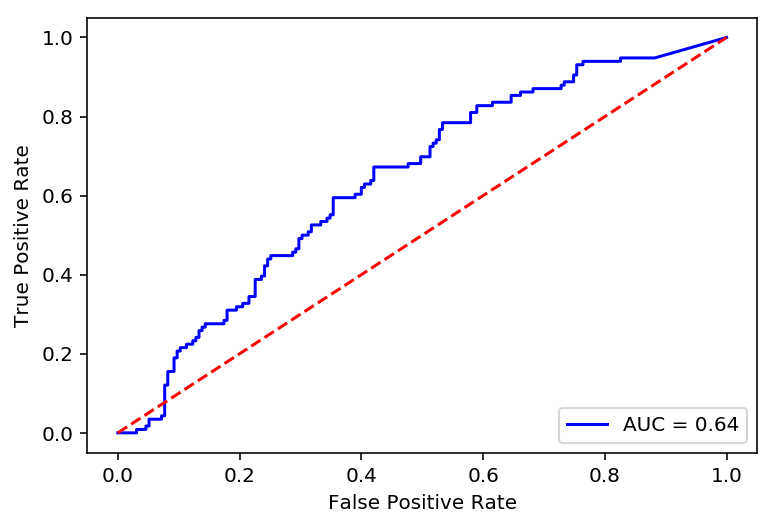

Found optimized model
Sample number 1 AUC of 0.5879172648959081 Threshold of 0.9 Recall score of 0.3125
Sample number 2 AUC of 0.5661913479140572 Threshold of 0.9 Recall score of 0.3402061855670103
Sample number 3 AUC of 0.5470260901295385 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 4 AUC of 0.5831926071864153 Threshold of 0.9 Recall score of 0.30392156862745096
Sample number 5 AUC of 0.6278721278721279 Threshold of 0.9 Recall score of 0.34065934065934067
Sample number 6 AUC of 0.5932227488151659 Threshold of 0.9 Recall score of 0.3
Sample number 7 AUC of 0.5547424711511398 Threshold of 0.9 Recall score of 0.2549019607843137
Sample number 8 AUC of 0.5586491784914115 Threshold of 0.9 Recall score of 0.27184466019417475
Sample number 9 AUC of 0.5753569033247101 Threshold of 0.9 Recall score of 0.32653061224489793
Sample number 10 AUC of 0.5790040315191497 Threshold of 0.8 Recall score of 0.24299065420560748
Sample number 11 AUC of 0.6155945999602939 Threshold of 0.

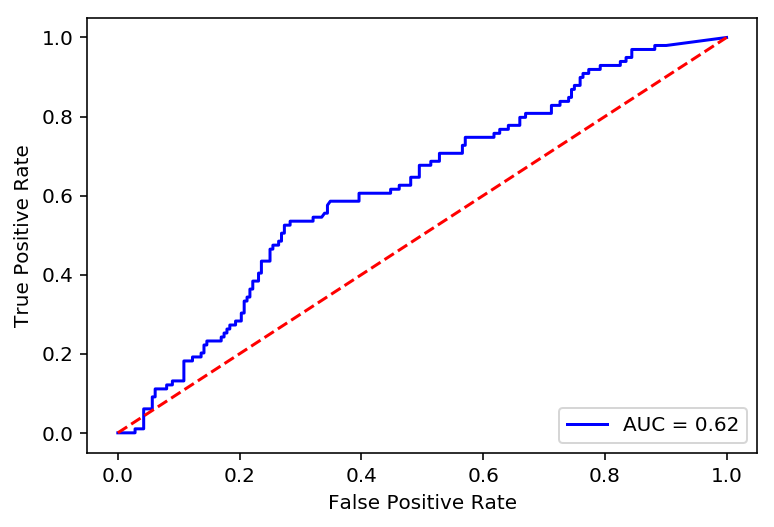

Found optimized model
Sample number 1 AUC of 0.5853490929081913 Threshold of 0.9 Recall score of 0.2523364485981308
Sample number 2 AUC of 0.6331211692597831 Threshold of 0.9 Recall score of 0.27722772277227725
Sample number 3 AUC of 0.6087851750171585 Threshold of 0.9 Recall score of 0.32978723404255317
Sample number 4 AUC of 0.5548489278752436 Threshold of 0.9 Recall score of 0.21052631578947367
Sample number 5 AUC of 0.5928495902722707 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 6 AUC of 0.5613207547169812 Threshold of 0.9 Recall score of 0.22641509433962265
Sample number 7 AUC of 0.5870126705653022 Threshold of 0.9 Recall score of 0.3473684210526316
Sample number 8 AUC of 0.5866407437203898 Threshold of 0.9 Recall score of 0.26548672566371684
Sample number 9 AUC of 0.5706987775953294 Threshold of 0.9 Recall score of 0.2962962962962963
Sample number 10 AUC of 0.5550161812297735 Threshold of 0.8 Recall score of 0.19047619047619047
Sample number 11 AUC of 0.62332

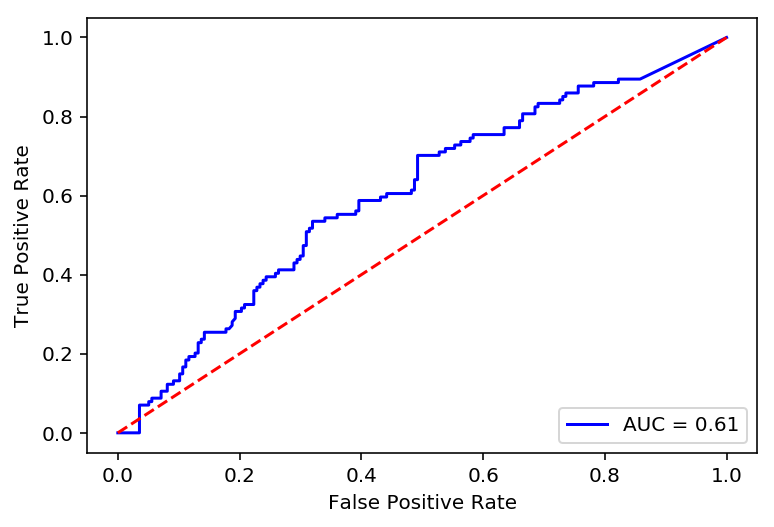

Found optimized model
Sample number 1 AUC of 0.5996242412563831 Threshold of 0.9 Recall score of 0.20618556701030927
Sample number 2 AUC of 0.5696811434854315 Threshold of 0.9 Recall score of 0.17757009345794392
Sample number 3 AUC of 0.5817538896746818 Threshold of 0.9 Recall score of 0.25742574257425743
Sample number 4 AUC of 0.5774168822458561 Threshold of 0.9 Recall score of 0.2755102040816326
Sample number 5 AUC of 0.551741027696144 Threshold of 0.9 Recall score of 0.10526315789473684
Sample number 6 AUC of 0.5870230700976042 Threshold of 0.9 Recall score of 0.14782608695652175
Sample number 7 AUC of 0.5374549549549549 Threshold of 0.9 Recall score of 0.16216216216216217
Sample number 8 AUC of 0.5989428231089935 Threshold of 0.9 Recall score of 0.25
Sample number 9 AUC of 0.4782726644963993 Threshold of 0.9 Recall score of 0.25806451612903225
Sample number 10 AUC of 0.6627372627372627 Threshold of 0.8 Recall score of 0.3076923076923077
Sample number 11 AUC of 0.6188625592417062 Th

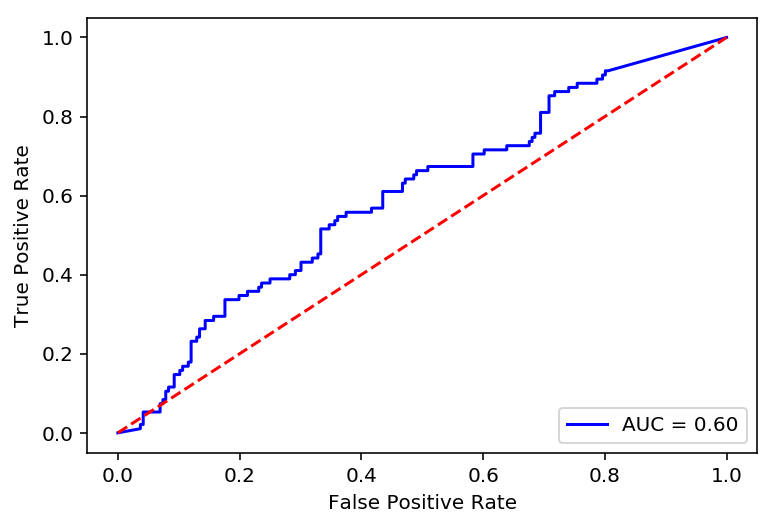

Found optimized model
Sample number 1 AUC of 0.527219093590775 Threshold of 0.9 Recall score of 0.08849557522123894
Sample number 2 AUC of 0.4965334792921 Threshold of 0.9 Recall score of 0.18518518518518517
Sample number 3 AUC of 0.5715315315315316 Threshold of 0.9 Recall score of 0.2072072072072072
Sample number 4 AUC of 0.5199739873652917 Threshold of 0.9 Recall score of 0.15384615384615385
Sample number 5 AUC of 0.5757191201353639 Threshold of 0.9 Recall score of 0.39473684210526316
Sample number 6 AUC of 0.5555555555555556 Threshold of 0.9 Recall score of 0.25252525252525254
Sample number 7 AUC of 0.5564608347627216 Threshold of 0.9 Recall score of 0.2828282828282828
Sample number 8 AUC of 0.5515487328549369 Threshold of 0.9 Recall score of 0.12844036697247707
Sample number 9 AUC of 0.5505610472882715 Threshold of 0.9 Recall score of 0.24561403508771928
Sample number 10 AUC of 0.47199052132701425 Threshold of 0.8 Recall score of 0.12
Sample number 11 AUC of 0.5358769379844961 Thre

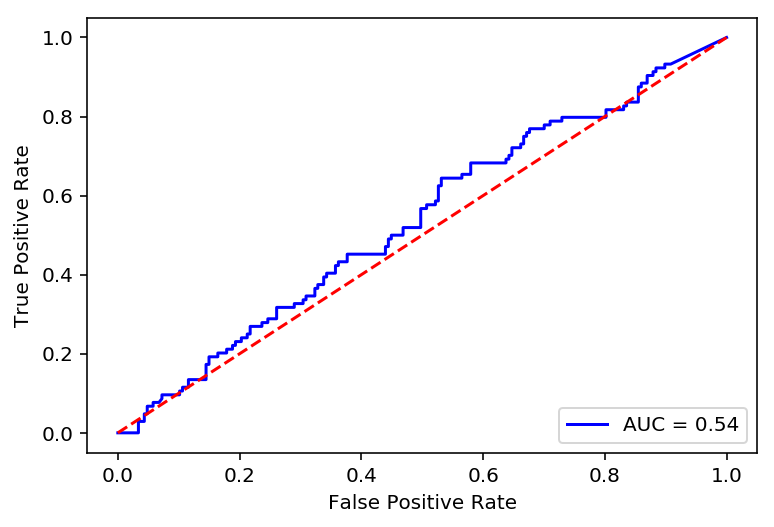

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 21    0.095127
Name: 30, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 21    0.095127
4     0.062793
Name: 30, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 4 potentially recommendable songs
6 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 21    0.095127
4     0.062793
17    0.057990
Name: 30, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
8 recomme

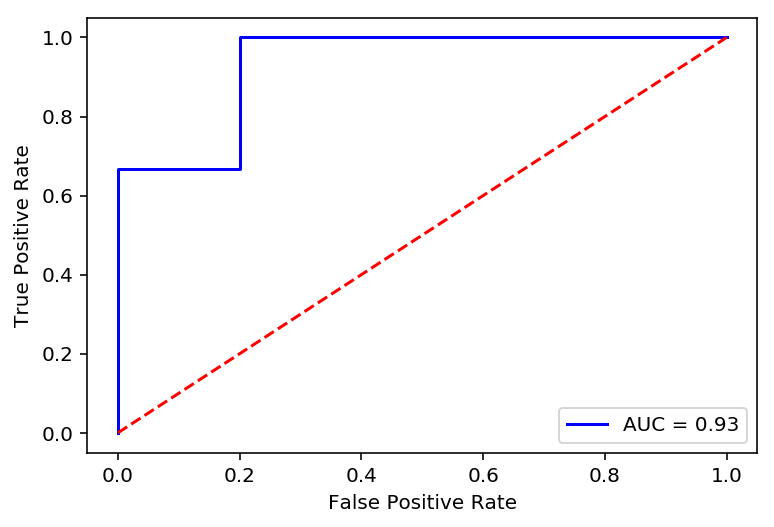

Found optimized model
Sample number 1 AUC of 0.8571428571428572 Threshold of 0.9 Recall score of 1.0
Sample number 2 AUC of 0.5833333333333334 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.8666666666666667 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 4 AUC of 0.39999999999999997 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.39999999999999997 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.39999999999999997 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 7 AUC of 0.5833333333333334 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.49999999999999994 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 10 AUC of 0.5 Threshold of 0.8 Recall score of 1.0
Sample number 11 AUC of 0.5714285714285714 Threshold of 0.8 Recall score of 1.0
Sample number 12 AUC of 0.375 Threshold of 0.8 Recall score of 0.25
Sampl

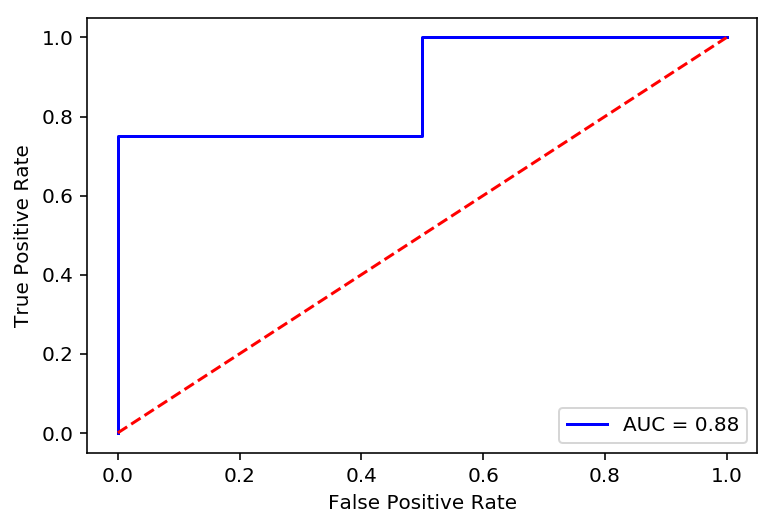

Found optimized model
Sample number 1 AUC of 0.6666666666666666 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.9333333333333333 Threshold of 0.9 Recall score of 1.0


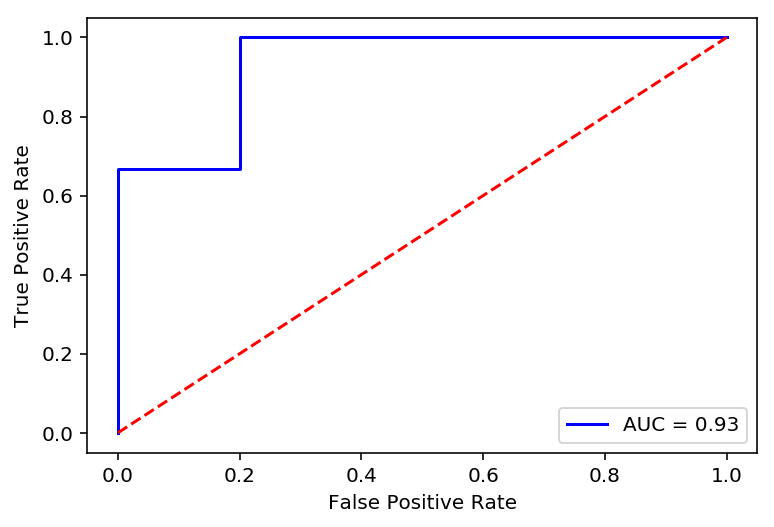

Found optimized model
Sample number 1 AUC of 0.5 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.0625 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.5 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.8 Threshold of 0.9 Recall score of 1.0
Sample number 5 AUC of 0.75 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.8 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of nan Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.5333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.33333333333333337 Threshold of 0.9 Recall score of 0.5
Sample number 10 AUC of 1.0 Threshold of 0.8 Recall score of 0.3333333333333333


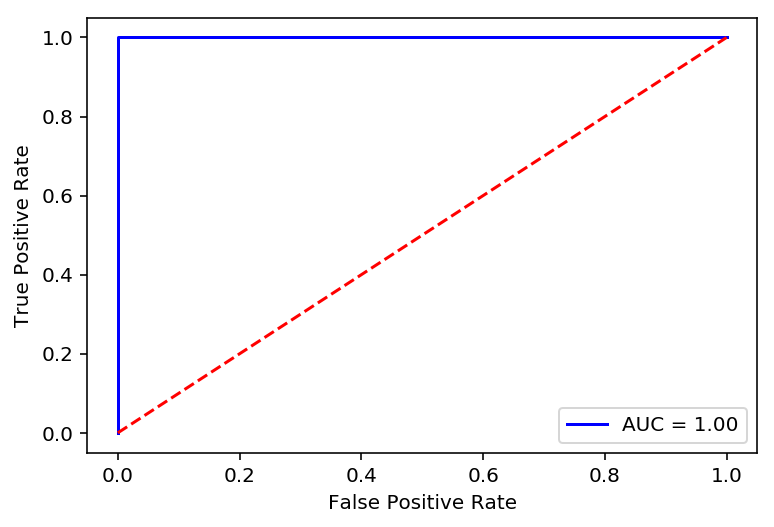

Found optimized model
Sample number 1 AUC of 0.75 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.8666666666666667 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


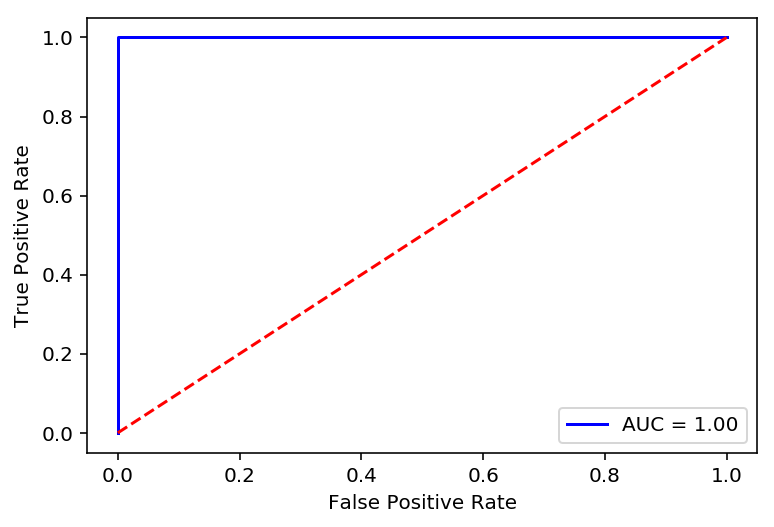

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 17    0.084667
Name: 31, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 7 potentially recommendable songs
7 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 17    0.084667
38    0.080064
Name: 31, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
7 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 17    0.084667
38    0.080064
25    0.053401
Name: 31, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 10 potentially recommendable songs
17 recom

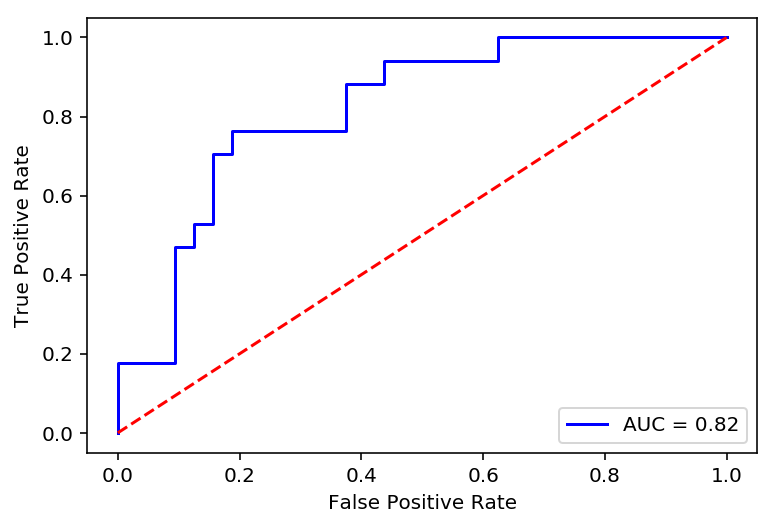

Found optimized model
Sample number 1 AUC of 0.6599264705882353 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 2 AUC of 0.5992822966507177 Threshold of 0.9 Recall score of 0.36363636363636365
Sample number 3 AUC of 0.791360294117647 Threshold of 0.9 Recall score of 0.5882352941176471
Sample number 4 AUC of 0.6751700680272108 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 5 AUC of 0.7884615384615385 Threshold of 0.9 Recall score of 0.391304347826087
Sample number 6 AUC of 0.6559139784946236 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.6136363636363636 Threshold of 0.9 Recall score of 0.4375
Sample number 8 AUC of 0.8156862745098039 Threshold of 0.9 Recall score of 0.6
Sample number 9 AUC of 0.7026315789473684 Threshold of 0.9 Recall score of 0.3157894736842105
Sample number 10 AUC of 0.6702508960573477 Threshold of 0.8 Recall score of 0.4444444444444444
Sample number 11 AUC of 0.7072072072072072 Threshold of 0.8 Recall score of 0.

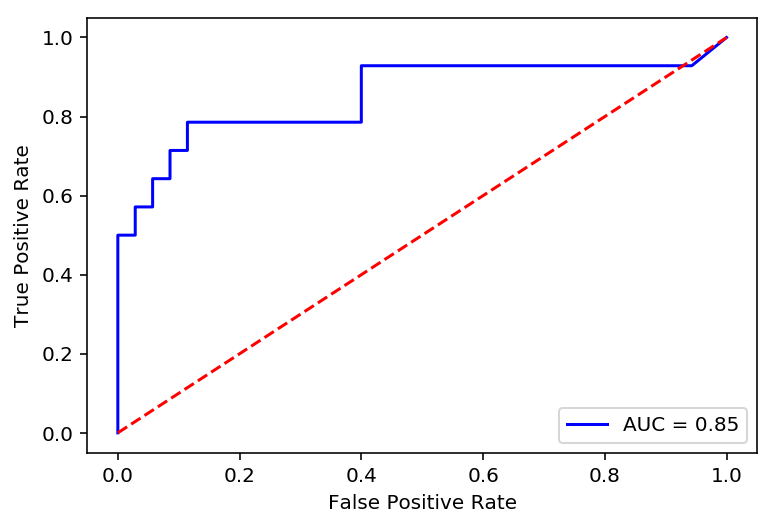

Found optimized model
Sample number 1 AUC of 0.7333333333333334 Threshold of 0.9 Recall score of 0.42105263157894735
Sample number 2 AUC of 0.7736842105263158 Threshold of 0.9 Recall score of 0.47368421052631576
Sample number 3 AUC of 0.7656249999999999 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 4 AUC of 0.6894736842105262 Threshold of 0.9 Recall score of 0.3684210526315789
Sample number 5 AUC of 0.6576576576576577 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 6 AUC of 0.5723905723905723 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 7 AUC of 0.7254273504273505 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 8 AUC of 0.7087719298245614 Threshold of 0.9 Recall score of 0.5789473684210527
Sample number 9 AUC of 0.846590909090909 Threshold of 0.9 Recall score of 0.5625


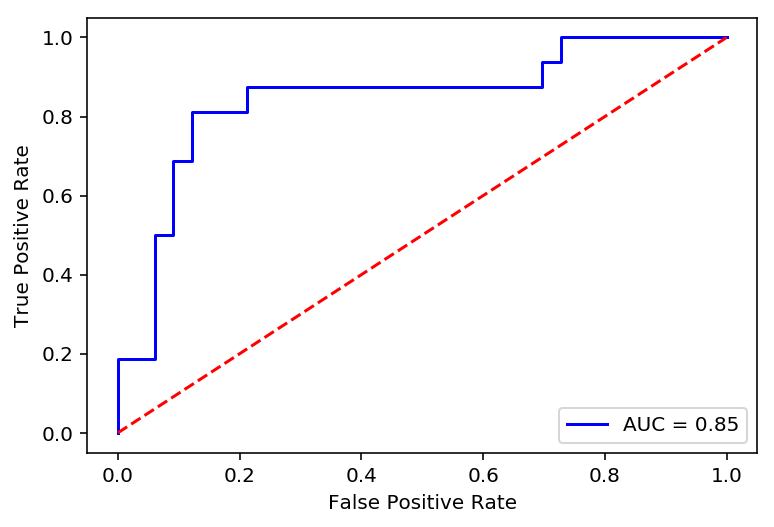

Found optimized model
Sample number 1 AUC of 0.8136200716845878 Threshold of 0.9 Recall score of 0.6111111111111112
Sample number 2 AUC of 0.6335227272727273 Threshold of 0.9 Recall score of 0.5625
Sample number 3 AUC of 0.7547348484848485 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.6819852941176471 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 5 AUC of 0.8918367346938776 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.7168560606060606 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.724910394265233 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 8 AUC of 0.6742424242424243 Threshold of 0.9 Recall score of 0.4375
Sample number 9 AUC of 0.7666666666666667 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 10 AUC of 0.6473684210526316 Threshold of 0.8 Recall score of 0.3157894736842105
Sample number 11 AUC of 0.6514336917562724 Threshold of 0.8 Recall score of 0.5555555555555556
Sample numbe

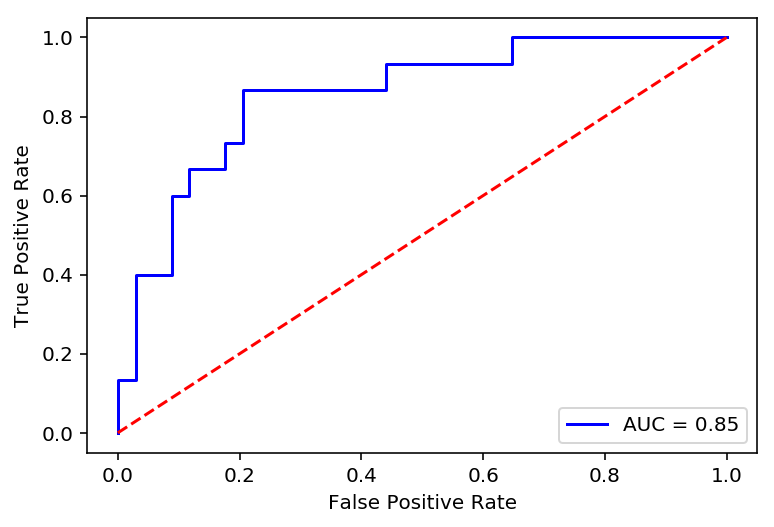

Found optimized model
Sample number 1 AUC of 0.7518382352941178 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 2 AUC of 0.7857142857142857 Threshold of 0.9 Recall score of 0.47619047619047616
Sample number 3 AUC of 0.8409090909090908 Threshold of 0.9 Recall score of 0.625
Sample number 4 AUC of 0.610215053763441 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 5 AUC of 0.8333333333333334 Threshold of 0.9 Recall score of 0.7692307692307693
Sample number 6 AUC of 0.7275985663082436 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 7 AUC of 0.6911764705882353 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 8 AUC of 0.7254901960784315 Threshold of 0.9 Recall score of 0.5333333333333333
Sample number 9 AUC of 0.8686274509803922 Threshold of 0.9 Recall score of 0.4666666666666667


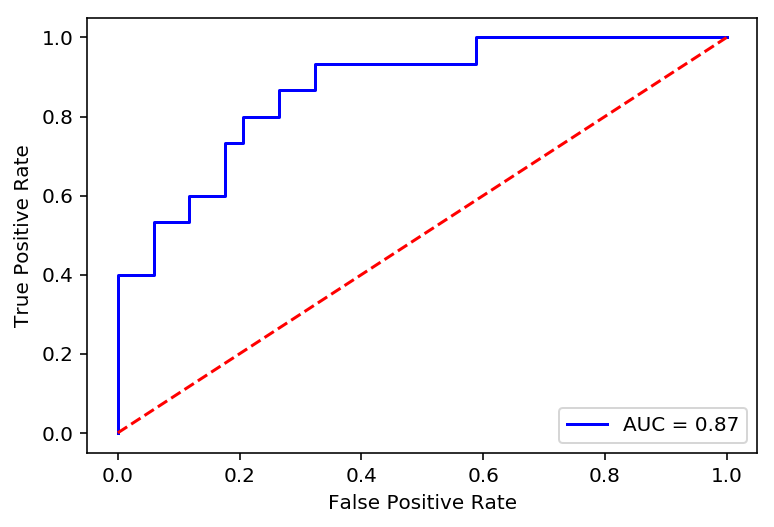

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 3    0.275445
Name: 14, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 11 potentially recommendable songs
11 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 3    0.275445
5    0.117851
Name: 14, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
13 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 3     0.275445
5     0.117851
16    0.089791
Name: 14, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 3 potentially recommendable songs
15 recomm

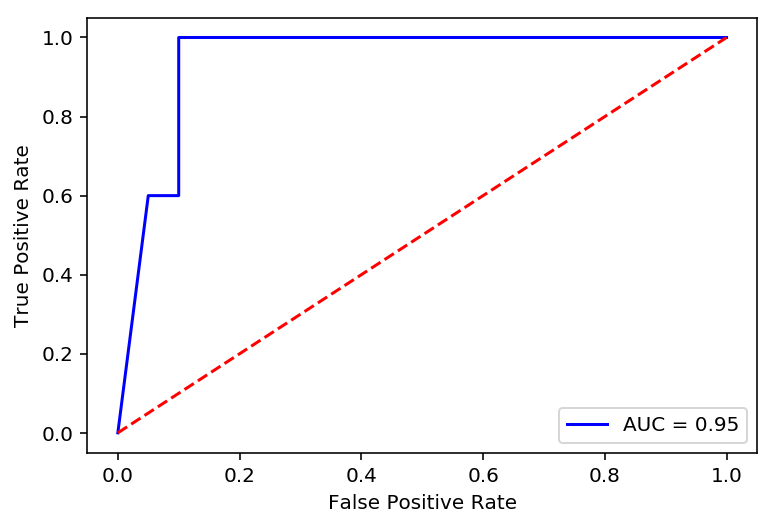

Found optimized model
Sample number 1 AUC of 0.9545454545454546 Threshold of 0.9 Recall score of 1.0


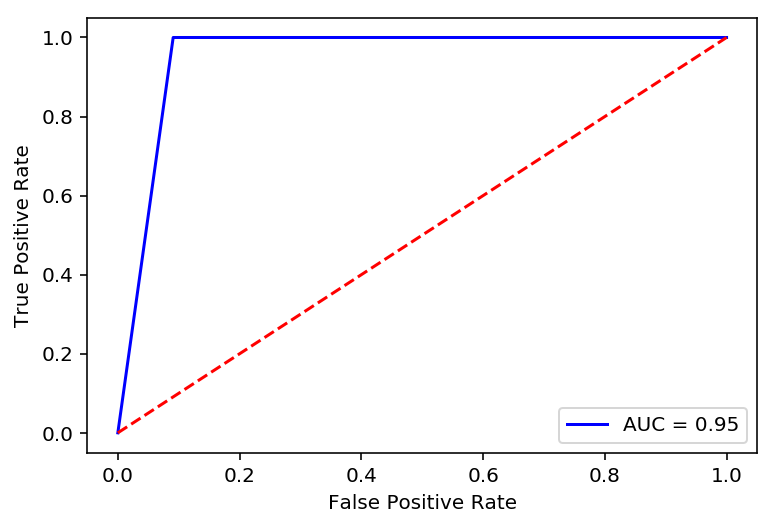

Found optimized model
Sample number 1 AUC of 0.9625000000000001 Threshold of 0.9 Recall score of 0.9


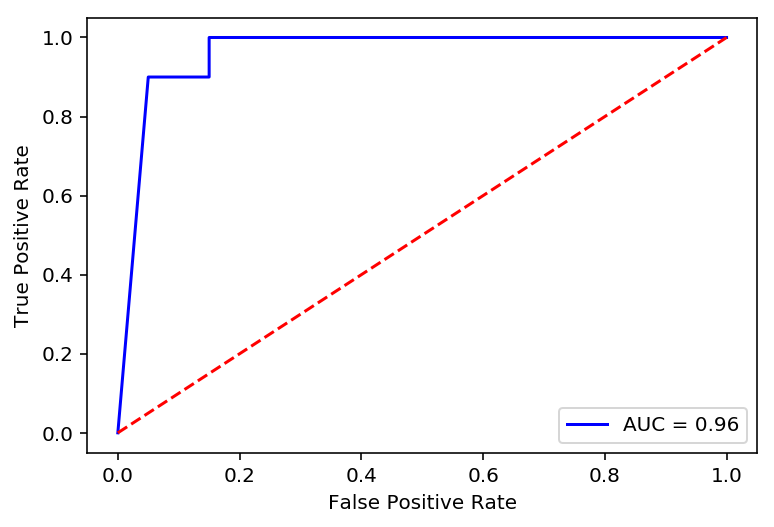

Found optimized model
Sample number 1 AUC of 0.9708994708994709 Threshold of 0.9 Recall score of 1.0


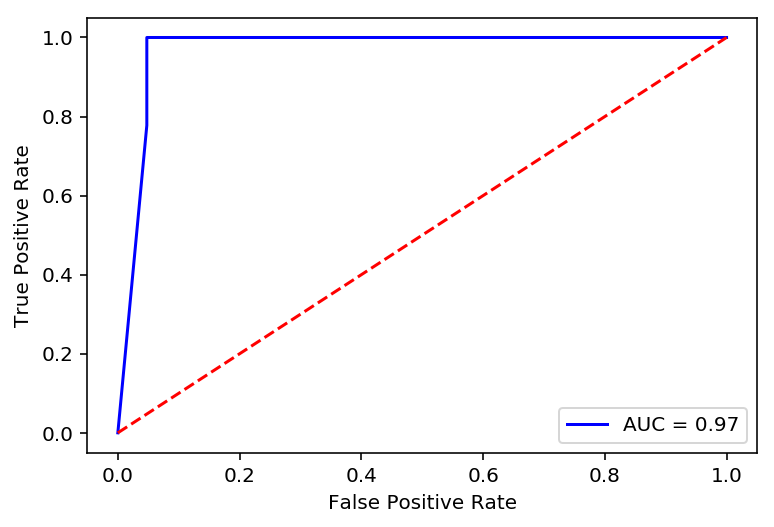

Found optimized model
Sample number 1 AUC of 0.9904306220095693 Threshold of 0.9 Recall score of 1.0


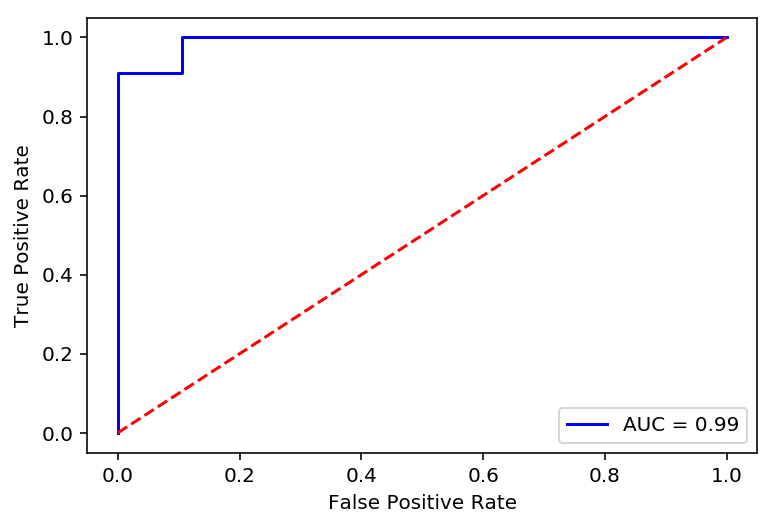

Found optimized model
Classifying on 7 features
Classifying new songs
Number of potentially recommended songs 79
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Dar 🏚️
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 49    0.662122
Name: 15, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.4270833333333333 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 2 AUC of 0.7264957264957265 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 0.5299145299145298 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 4 AUC of 0.8705882352941177 Threshold of 0.9 Recall score of 1.0
Sample number 5 AUC of 0.5641025641025641 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 6 AUC of 0.671875 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 7 AUC of 

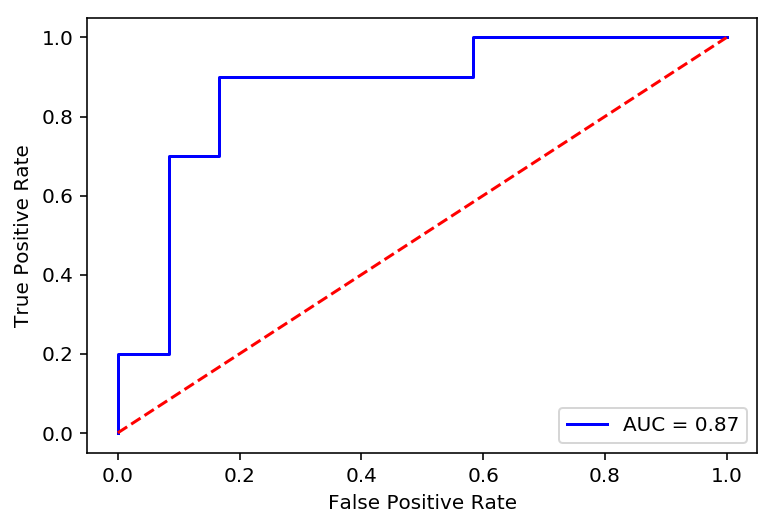

Found optimized model
Sample number 1 AUC of 0.4196428571428571 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 0.6458333333333333 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.7291666666666666 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.638095238095238 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 5 AUC of 0.8854166666666667 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 6 AUC of 0.6696428571428572 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.5982905982905983 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 8 AUC of 0.5811965811965812 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.5142857142857142 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 10 AUC of 0.6071428571428571 Threshold of 0.8 Recall score of 0.375
Sample number 11 AUC of 0.7476190476190476 Threshold of 0.8 Recall score of 0.5714285714285714

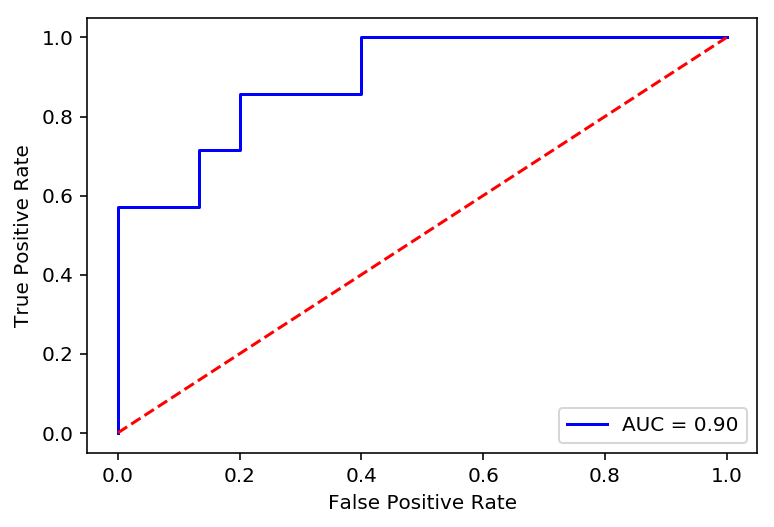

Found optimized model
Sample number 1 AUC of 0.5571428571428572 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 2 AUC of 0.53125 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.5809523809523809 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 4 AUC of 0.7619047619047619 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 5 AUC of 0.5882352941176471 Threshold of 0.9 Recall score of 0.2
Sample number 6 AUC of 0.6153846153846153 Threshold of 0.9 Recall score of 0.1111111111111111
Sample number 7 AUC of 0.6979166666666666 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 8 AUC of 0.6823529411764706 Threshold of 0.9 Recall score of 0.0
Sample number 9 AUC of 0.8632478632478633 Threshold of 0.9 Recall score of 0.7777777777777778


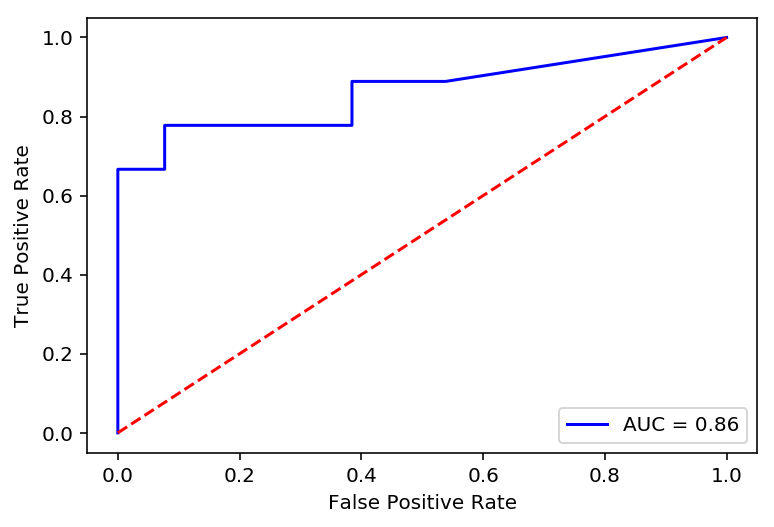

Found optimized model
Sample number 1 AUC of 0.5803571428571428 Threshold of 0.9 Recall score of 0.375
Sample number 2 AUC of 0.823529411764706 Threshold of 0.9 Recall score of 0.2
Sample number 3 AUC of 0.811965811965812 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.49572649572649574 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.47008547008547014 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 6 AUC of 0.5223214285714286 Threshold of 0.9 Recall score of 0.125
Sample number 7 AUC of 0.6071428571428571 Threshold of 0.9 Recall score of 0.375
Sample number 8 AUC of 0.4958677685950413 Threshold of 0.9 Recall score of 0.09090909090909091
Sample number 9 AUC of 0.6324786324786325 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 10 AUC of 0.4210526315789474 Threshold of 0.8 Recall score of 0.0
Sample number 11 AUC of 0.5416666666666667 Threshold of 0.8 Recall score of 0.25
Sample number 12 AUC of 0.7321428571428

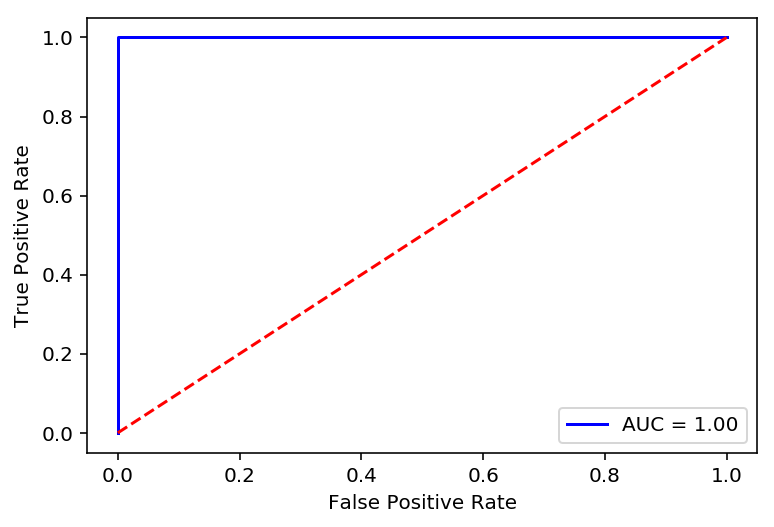

Found optimized model
Sample number 1 AUC of 0.6611570247933884 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 2 AUC of 0.825 Threshold of 0.9 Recall score of 0.3
Sample number 3 AUC of 0.6111111111111112 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.6929824561403508 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 5 AUC of 0.7053571428571428 Threshold of 0.9 Recall score of 0.375
Sample number 6 AUC of 0.5380952380952381 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 7 AUC of 0.6302083333333334 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.5529411764705882 Threshold of 0.9 Recall score of 0.4
Sample number 9 AUC of 0.7714285714285715 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 10 AUC of 0.47767857142857145 Threshold of 0.8 Recall score of 0.0
Sample number 11 AUC of 0.6666666666666666 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 12 AUC of 0.9658119658119

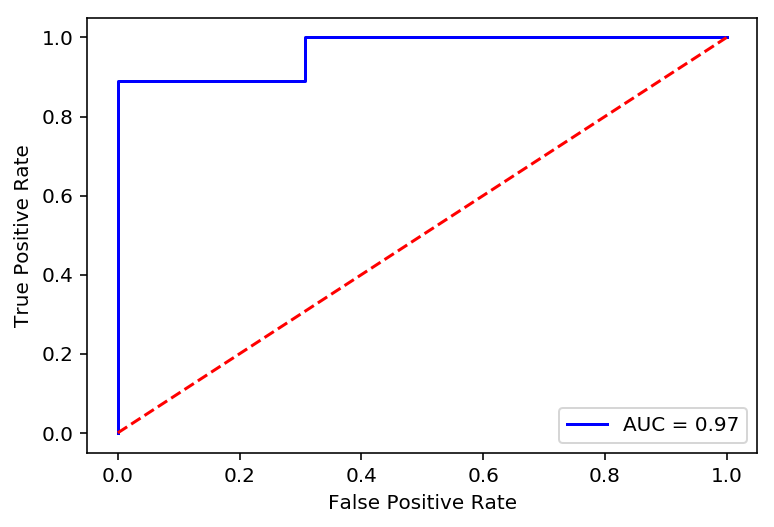

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 49    0.662122
Name: 15, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 3
Similar playlist contains 4 potentially recommendable songs
4 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 49    0.662122
13    0.073721
Name: 15, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 8
Similar playlist contains 10 potentially recommendable songs
14 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 49    0.662122
13    0.073721
33    0.055556
Name: 15, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 9
Similar playlist contains 10 potentially recommendable songs
24 rec

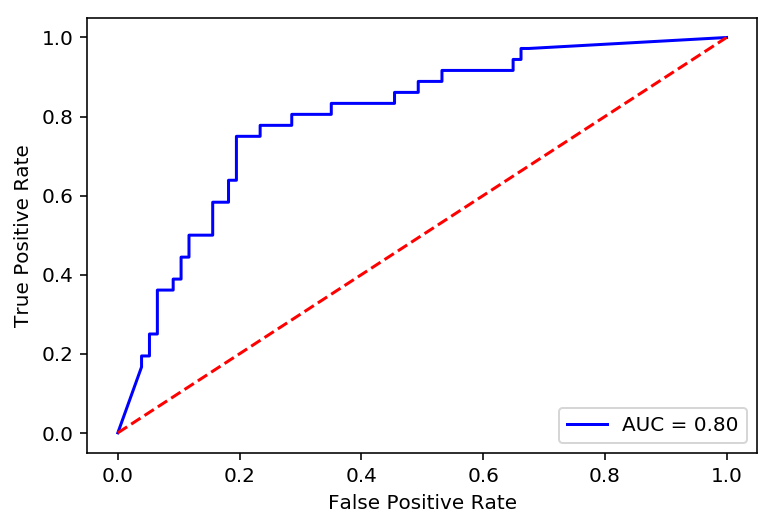

Found optimized model
Sample number 1 AUC of 0.8501016260162602 Threshold of 0.9 Recall score of 0.5609756097560976
Sample number 2 AUC of 0.7904761904761903 Threshold of 0.9 Recall score of 0.5142857142857142
Sample number 3 AUC of 0.8617886178861789 Threshold of 0.9 Recall score of 0.6585365853658537
Sample number 4 AUC of 0.8551628551628552 Threshold of 0.9 Recall score of 0.717948717948718
Sample number 5 AUC of 0.8662470495672699 Threshold of 0.9 Recall score of 0.7096774193548387
Sample number 6 AUC of 0.8158369408369408 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 7 AUC of 0.7561327561327562 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 8 AUC of 0.8403271692745378 Threshold of 0.9 Recall score of 0.5945945945945946
Sample number 9 AUC of 0.8457983193277312 Threshold of 0.9 Recall score of 0.7857142857142857


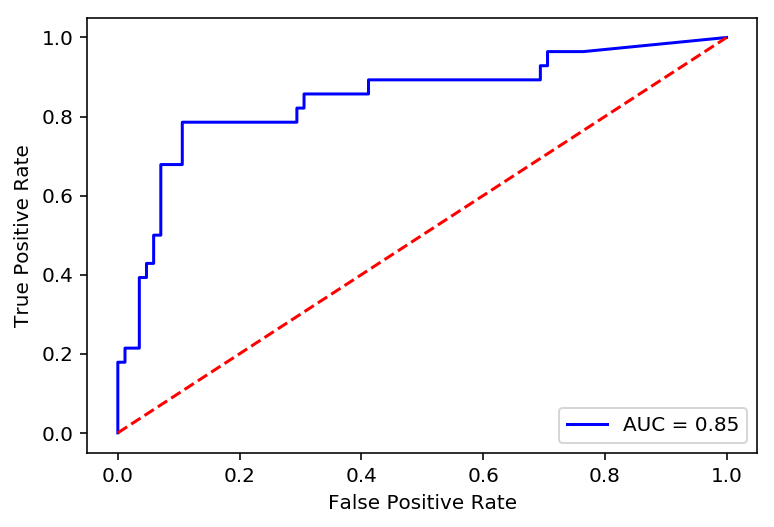

Found optimized model
Sample number 1 AUC of 0.8473684210526315 Threshold of 0.9 Recall score of 0.631578947368421
Sample number 2 AUC of 0.8147226173541964 Threshold of 0.9 Recall score of 0.6486486486486487
Sample number 3 AUC of 0.8631323631323631 Threshold of 0.9 Recall score of 0.717948717948718
Sample number 4 AUC of 0.8161129568106313 Threshold of 0.9 Recall score of 0.6511627906976745
Sample number 5 AUC of 0.8743859649122807 Threshold of 0.9 Recall score of 0.7368421052631579
Sample number 6 AUC of 0.7800925925925926 Threshold of 0.9 Recall score of 0.53125
Sample number 7 AUC of 0.847719298245614 Threshold of 0.9 Recall score of 0.631578947368421
Sample number 8 AUC of 0.8591228070175438 Threshold of 0.9 Recall score of 0.5526315789473685
Sample number 9 AUC of 0.8687766714082504 Threshold of 0.9 Recall score of 0.7027027027027027


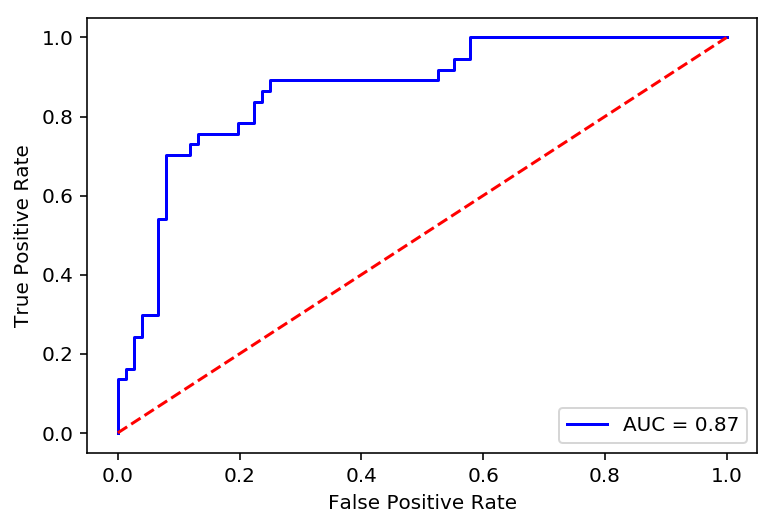

Found optimized model
Sample number 1 AUC of 0.8278805120910384 Threshold of 0.9 Recall score of 0.7837837837837838
Sample number 2 AUC of 0.800513698630137 Threshold of 0.9 Recall score of 0.65
Sample number 3 AUC of 0.8263698630136986 Threshold of 0.9 Recall score of 0.575
Sample number 4 AUC of 0.8481507823613087 Threshold of 0.9 Recall score of 0.5675675675675675
Sample number 5 AUC of 0.8227237654320987 Threshold of 0.9 Recall score of 0.65625
Sample number 6 AUC of 0.8696947133283692 Threshold of 0.9 Recall score of 0.7058823529411765
Sample number 7 AUC of 0.8091575091575092 Threshold of 0.9 Recall score of 0.6
Sample number 8 AUC of 0.9119843527738265 Threshold of 0.9 Recall score of 0.8378378378378378


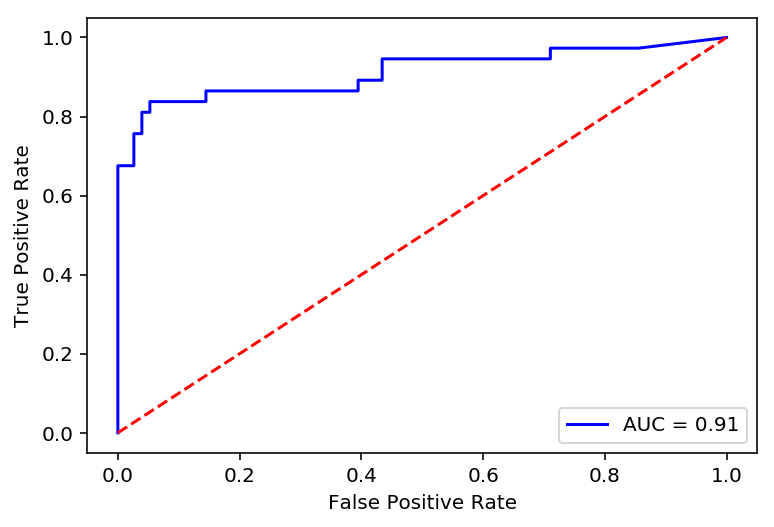

Found optimized model
Sample number 1 AUC of 0.7872299382716049 Threshold of 0.9 Recall score of 0.59375
Sample number 2 AUC of 0.8442171518489378 Threshold of 0.9 Recall score of 0.7419354838709677
Sample number 3 AUC of 0.877371273712737 Threshold of 0.9 Recall score of 0.6585365853658537
Sample number 4 AUC of 0.8446969696969696 Threshold of 0.9 Recall score of 0.6590909090909091
Sample number 5 AUC of 0.8609530583214794 Threshold of 0.9 Recall score of 0.7297297297297297
Sample number 6 AUC of 0.7655935613682092 Threshold of 0.9 Recall score of 0.5476190476190477
Sample number 7 AUC of 0.8007474429583005 Threshold of 0.9 Recall score of 0.6774193548387096
Sample number 8 AUC of 0.8021594684385382 Threshold of 0.9 Recall score of 0.627906976744186
Sample number 9 AUC of 0.845679012345679 Threshold of 0.9 Recall score of 0.625


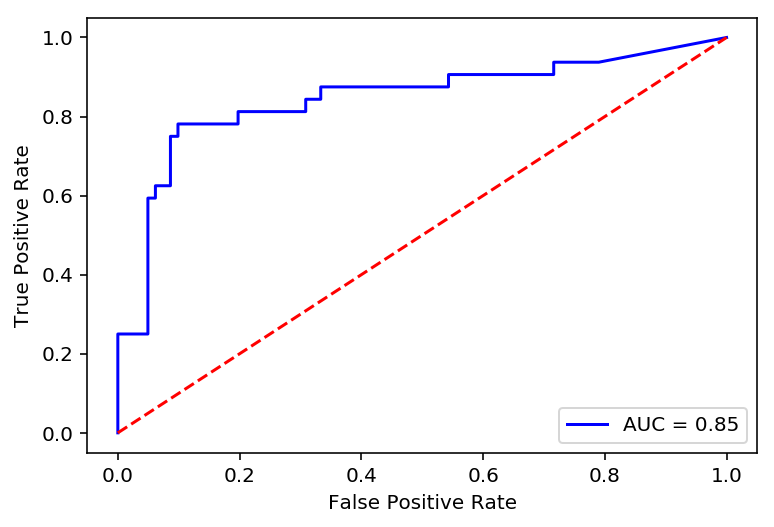

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 13    0.021507
Name: 37, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 1 potentially recommendable songs
1 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 13    0.021507
4     0.013595
Name: 37, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 15 potentially recommendable songs
16 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 13    0.021507
4     0.013595
15    0.012155
Name: 37, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
18 reco

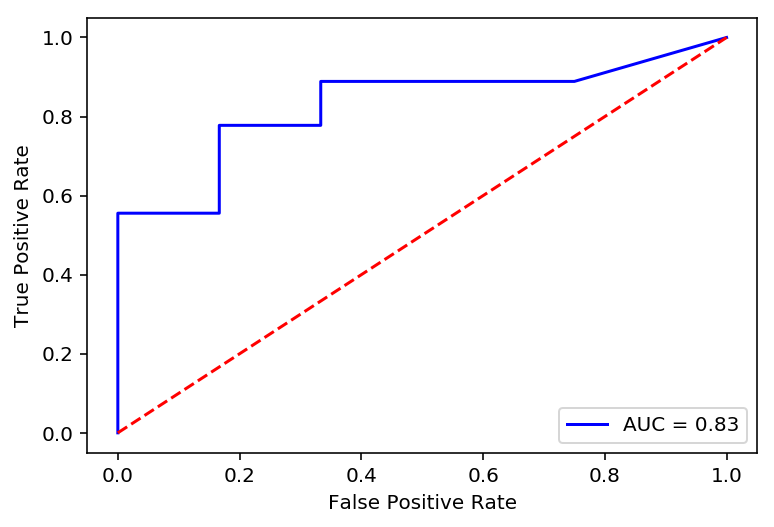

Found optimized model
Sample number 1 AUC of 0.7692307692307693 Threshold of 0.9 Recall score of 0.75
Sample number 2 AUC of 0.5918367346938775 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 3 AUC of 0.7647058823529411 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.5625 Threshold of 0.9 Recall score of 0.6
Sample number 5 AUC of 0.7272727272727273 Threshold of 0.9 Recall score of 0.4
Sample number 6 AUC of 0.6323529411764706 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.5816326530612246 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 8 AUC of 0.7980769230769231 Threshold of 0.9 Recall score of 0.75
Sample number 9 AUC of 0.9444444444444445 Threshold of 0.9 Recall score of 0.8333333333333334


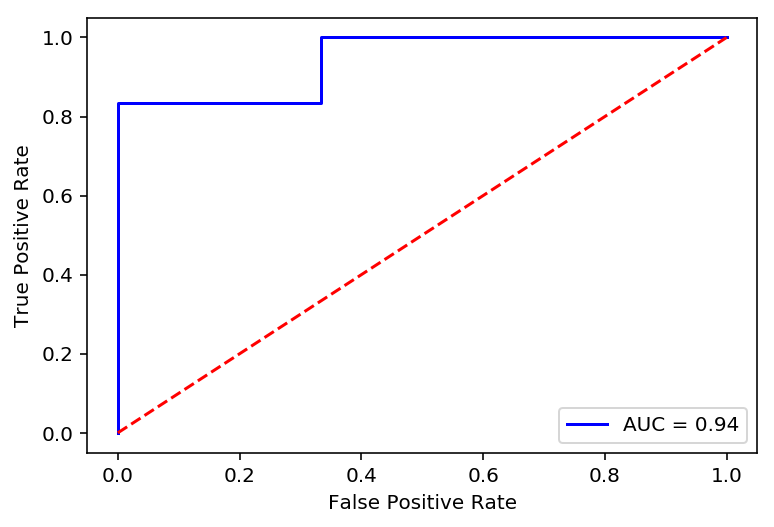

Found optimized model
Sample number 1 AUC of 0.6105769230769231 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.787037037037037 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 3 AUC of 0.8 Threshold of 0.9 Recall score of 0.6
Sample number 4 AUC of 0.7037037037037036 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 5 AUC of 0.9375 Threshold of 0.9 Recall score of 0.8


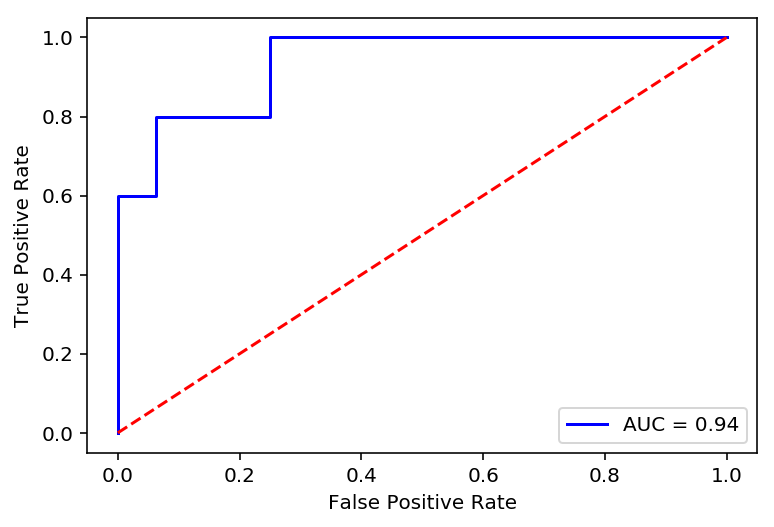

Found optimized model
Sample number 1 AUC of 0.8388888888888889 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 2 AUC of 0.6481481481481481 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 3 AUC of 0.7727272727272727 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 4 AUC of 0.4907407407407407 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 5 AUC of 0.7857142857142857 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 6 AUC of 0.7222222222222223 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 7 AUC of 0.6759259259259259 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 8 AUC of 0.7875 Threshold of 0.9 Recall score of 0.2
Sample number 9 AUC of 0.85 Threshold of 0.9 Recall score of 0.6


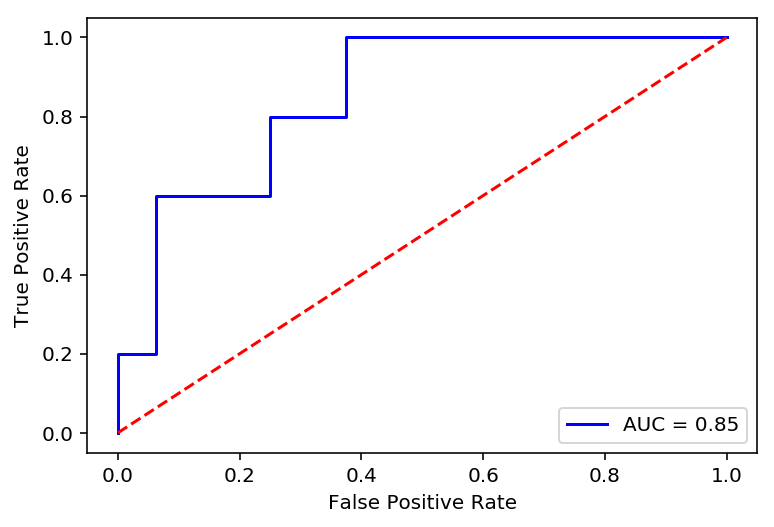

Found optimized model
Sample number 1 AUC of 0.7 Threshold of 0.9 Recall score of 1.0
Sample number 2 AUC of 0.6000000000000001 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.8703703703703703 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.5408163265306123 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 5 AUC of 0.7407407407407407 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 6 AUC of 0.8555555555555556 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 7 AUC of 0.5918367346938775 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 8 AUC of 0.38888888888888884 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.576923076923077 Threshold of 0.9 Recall score of 0.375
Sample number 10 AUC of 0.6377551020408163 Threshold of 0.8 Recall score of 0.7142857142857143
Sample number 11 AUC of 0.7040816326530612 Threshold of 0.8 Recall score of 0.7142857142857143

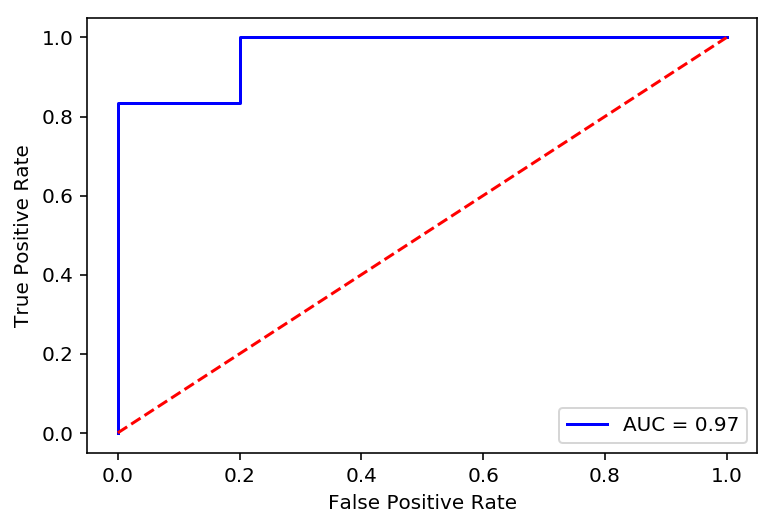

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 16    0.034149
Name: 45, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 8 potentially recommendable songs
8 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 16    0.034149
40    0.031388
Name: 45, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
10 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 16    0.034149
40    0.031388
23    0.027695
Name: 45, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 21 potentially recommendable songs
---Reco

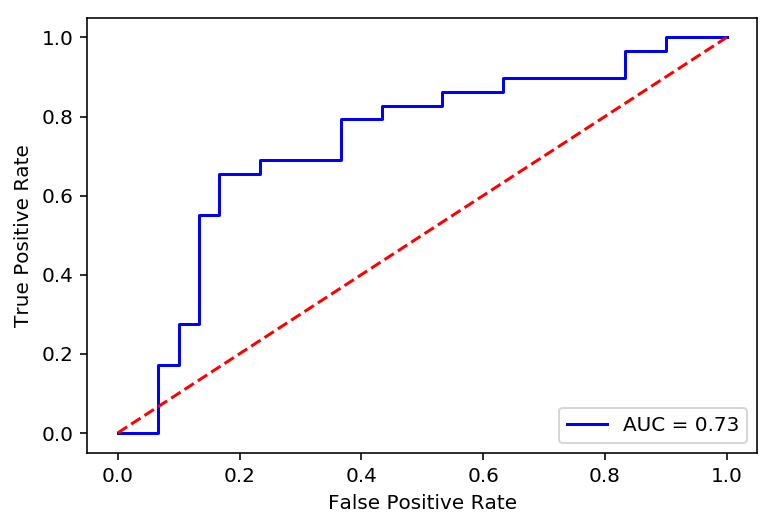

Found optimized model
Sample number 1 AUC of 0.6707317073170731 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 2 AUC of 0.6121794871794872 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.6092436974789915 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 4 AUC of 0.5572368421052631 Threshold of 0.9 Recall score of 0.42105263157894735
Sample number 5 AUC of 0.5952380952380952 Threshold of 0.9 Recall score of 0.23809523809523808
Sample number 6 AUC of 0.6361842105263158 Threshold of 0.9 Recall score of 0.21052631578947367
Sample number 7 AUC of 0.6352657004830918 Threshold of 0.9 Recall score of 0.4782608695652174
Sample number 8 AUC of 0.8321220930232558 Threshold of 0.9 Recall score of 0.75
Sample number 9 AUC of 0.6498771498771498 Threshold of 0.9 Recall score of 0.5454545454545454
Sample number 10 AUC of 0.6211764705882352 Threshold of 0.8 Recall score of 0.4
Sample number 11 AUC of 0.8032051282051282 Threshold of 0.8 Recall score of 0.

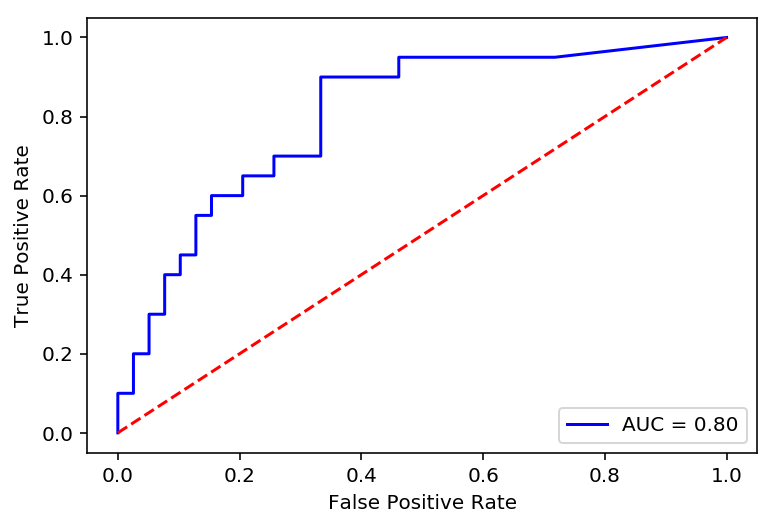

Found optimized model
Sample number 1 AUC of 0.7364498644986449 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 2 AUC of 0.6442577030812325 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 3 AUC of 0.6659663865546218 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 4 AUC of 0.7130325814536341 Threshold of 0.9 Recall score of 0.47619047619047616
Sample number 5 AUC of 0.625 Threshold of 0.9 Recall score of 0.3
Sample number 6 AUC of 0.6632791327913279 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 7 AUC of 0.65406162464986 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 8 AUC of 0.7537878787878788 Threshold of 0.9 Recall score of 0.6
Sample number 9 AUC of 0.8319327731092437 Threshold of 0.9 Recall score of 0.5882352941176471


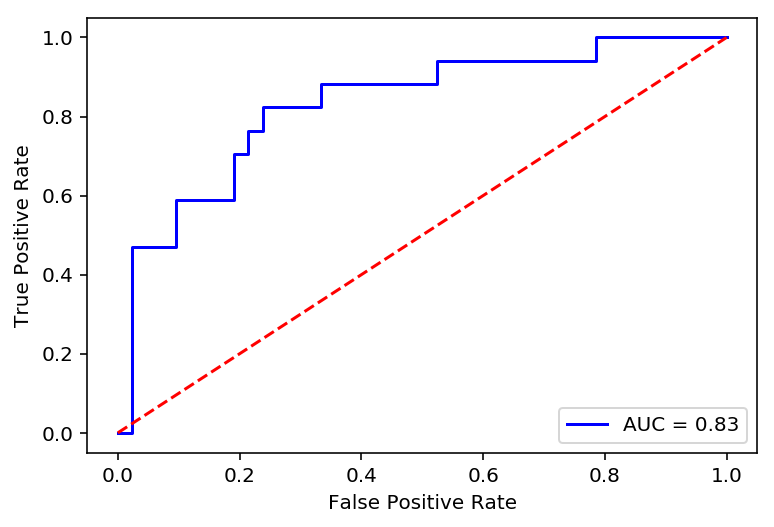

Found optimized model
Sample number 1 AUC of 0.6923558897243107 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.6246498599439776 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 3 AUC of 0.5618421052631578 Threshold of 0.9 Recall score of 0.2631578947368421
Sample number 4 AUC of 0.8102564102564103 Threshold of 0.9 Recall score of 0.7
Sample number 5 AUC of 0.5845410628019323 Threshold of 0.9 Recall score of 0.5217391304347826
Sample number 6 AUC of 0.7131449631449631 Threshold of 0.9 Recall score of 0.5454545454545454
Sample number 7 AUC of 0.7397435897435898 Threshold of 0.9 Recall score of 0.35
Sample number 8 AUC of 0.6368421052631579 Threshold of 0.9 Recall score of 0.47368421052631576
Sample number 9 AUC of 0.5712209302325582 Threshold of 0.9 Recall score of 0.4375
Sample number 10 AUC of 0.5883458646616542 Threshold of 0.8 Recall score of 0.38095238095238093
Sample number 11 AUC of 0.7264492753623188 Threshold of 0.8 Recall score of

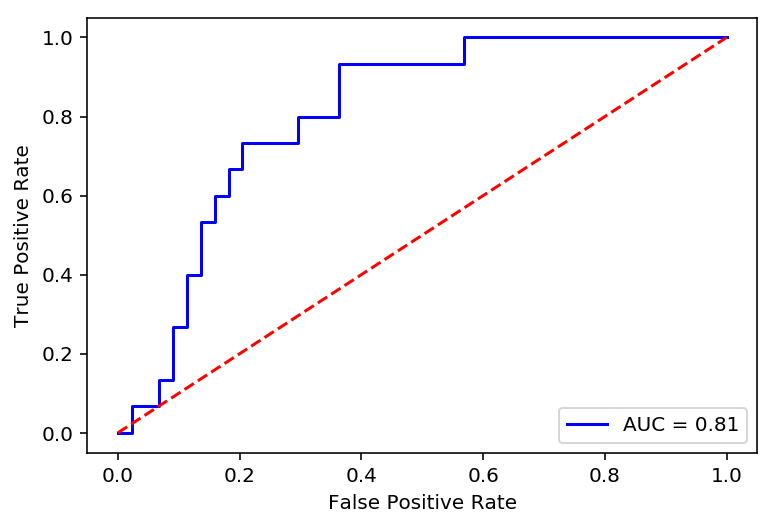

Found optimized model
Sample number 1 AUC of 0.6318181818181818 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.6355263157894737 Threshold of 0.9 Recall score of 0.42105263157894735
Sample number 3 AUC of 0.5457393483709273 Threshold of 0.9 Recall score of 0.47619047619047616
Sample number 4 AUC of 0.6589743589743591 Threshold of 0.9 Recall score of 0.45
Sample number 5 AUC of 0.5322128851540616 Threshold of 0.9 Recall score of 0.35294117647058826
Sample number 6 AUC of 0.7834302325581396 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.5984126984126985 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.6629072681704261 Threshold of 0.9 Recall score of 0.47619047619047616
Sample number 9 AUC of 0.6773182957393483 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 10 AUC of 0.7288461538461539 Threshold of 0.8 Recall score of 0.4
Sample number 11 AUC of 0.5910364145658263 Threshold of 0.8 Recall score of 0.23529411764705

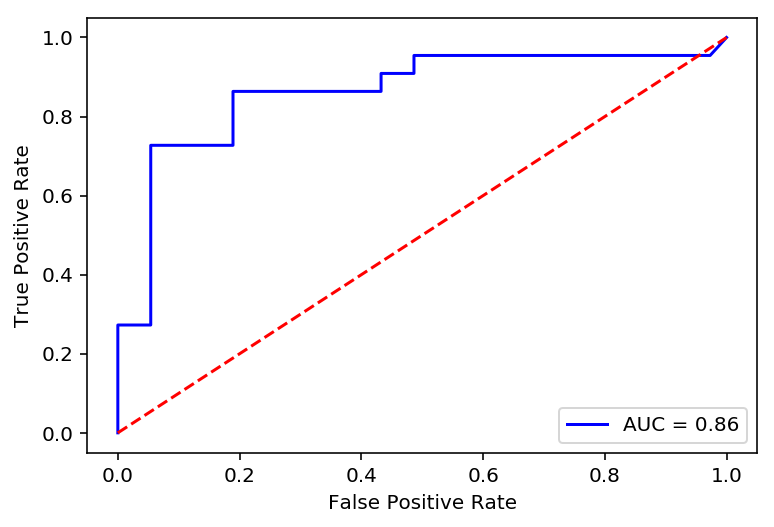

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 6    0.1066
Name: 16, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 3 potentially recommendable songs
3 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 6     0.106600
14    0.089791
Name: 16, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 1 potentially recommendable songs
4 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 6     0.106600
14    0.089791
17    0.088882
Name: 16, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 4 potentially recommendable songs
8 recommende

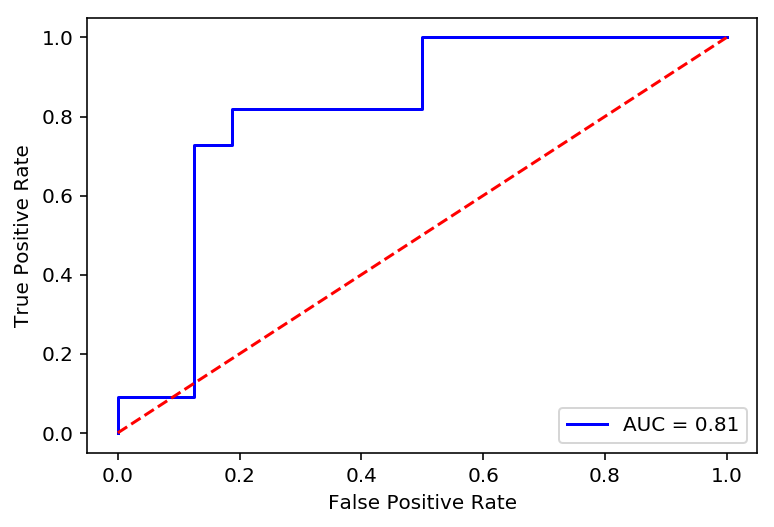

Found optimized model
Sample number 1 AUC of 0.9285714285714286 Threshold of 0.9 Recall score of 0.8461538461538461


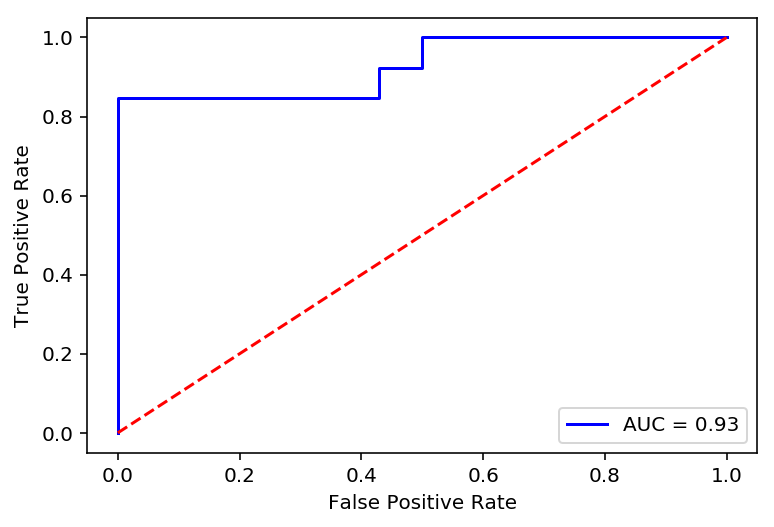

Found optimized model
Sample number 1 AUC of 0.8579545454545454 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.9444444444444444 Threshold of 0.9 Recall score of 0.6666666666666666


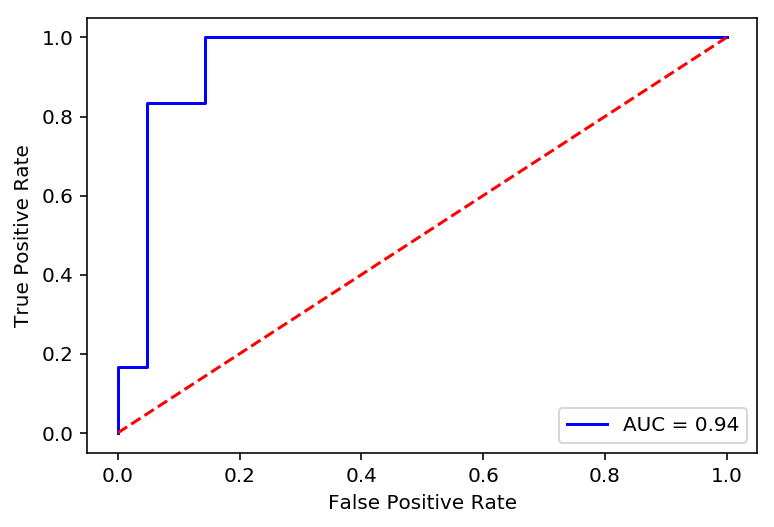

Found optimized model
Sample number 1 AUC of 0.8928571428571428 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 2 AUC of 0.7697368421052633 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.5 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.7470588235294118 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.8928571428571429 Threshold of 0.9 Recall score of 0.8571428571428571
Sample number 6 AUC of 0.8558823529411764 Threshold of 0.9 Recall score of 0.8
Sample number 7 AUC of 0.7928571428571428 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 8 AUC of 0.7993421052631579 Threshold of 0.9 Recall score of 0.5
Sample number 9 AUC of 0.8705882352941176 Threshold of 0.9 Recall score of 0.7


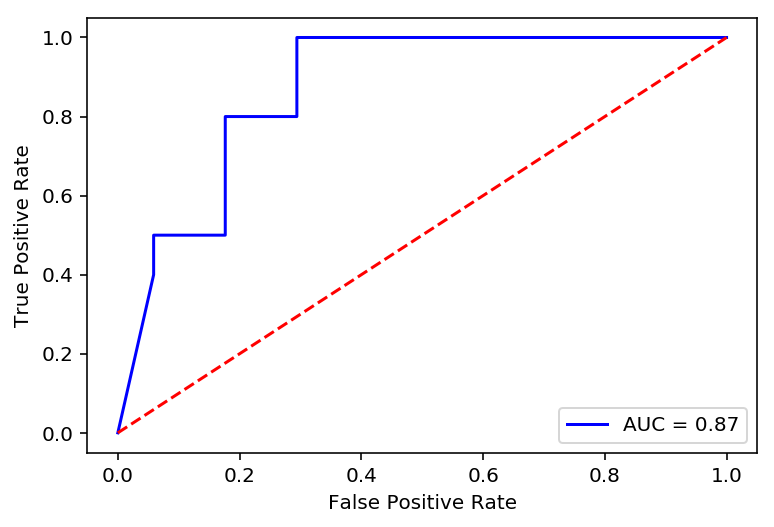

Found optimized model
Sample number 1 AUC of 0.7345679012345678 Threshold of 0.9 Recall score of 0.1111111111111111
Sample number 2 AUC of 0.6647058823529413 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.7588235294117647 Threshold of 0.9 Recall score of 0.4
Sample number 4 AUC of 0.9071428571428571 Threshold of 0.9 Recall score of 0.7142857142857143


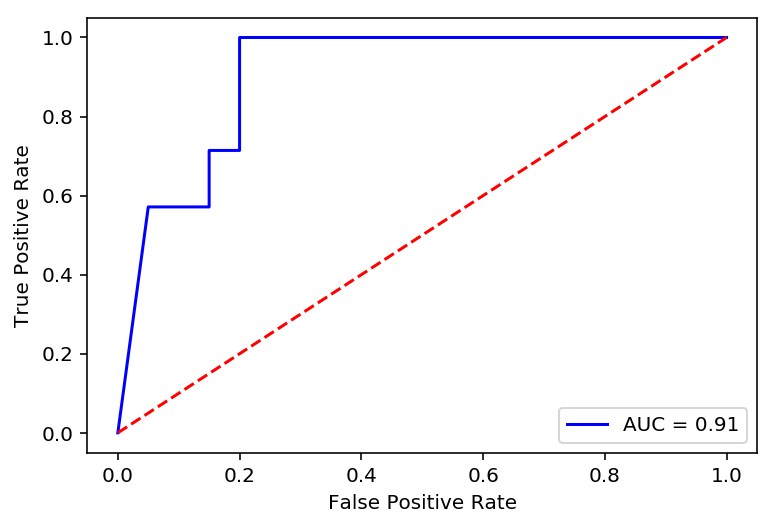

Found optimized model
Classifying on 5 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 16    0.1066
Name: 6, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 12 potentially recommendable songs
12 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 16    0.106600
3     0.086244
Name: 6, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 2
Similar playlist contains 24 potentially recommendable songs
---Recommendation complete---
---Run CF model---
Most similar playlist number 3
Most similar playlists: 16    0.106600
3     0.086244
4     0.074940
Name: 6, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 38 potentially recommendable songs
---Recommendation complete---
25 recommend

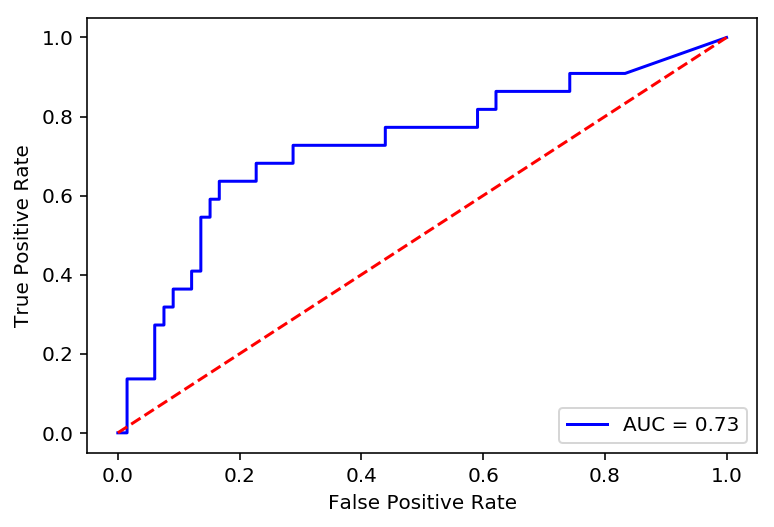

Found optimized model
Sample number 1 AUC of 0.7850041425020713 Threshold of 0.9 Recall score of 0.8235294117647058
Sample number 2 AUC of 0.6402550091074681 Threshold of 0.9 Recall score of 0.5185185185185185
Sample number 3 AUC of 0.5095238095238095 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 4 AUC of 0.6389578163771712 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 5 AUC of 0.6060783167738165 Threshold of 0.9 Recall score of 0.4482758620689655
Sample number 6 AUC of 0.5305263157894737 Threshold of 0.9 Recall score of 0.34210526315789475
Sample number 7 AUC of 0.6055461233729486 Threshold of 0.9 Recall score of 0.4838709677419355
Sample number 8 AUC of 0.7402376910016978 Threshold of 0.9 Recall score of 0.45161290322580644
Sample number 9 AUC of 0.696029776674938 Threshold of 0.9 Recall score of 0.5
Sample number 10 AUC of 0.6908482142857143 Threshold of 0.8 Recall score of 0.46875
Sample number 11 AUC of 0.6119791666666667 Threshold of 0.8 Re

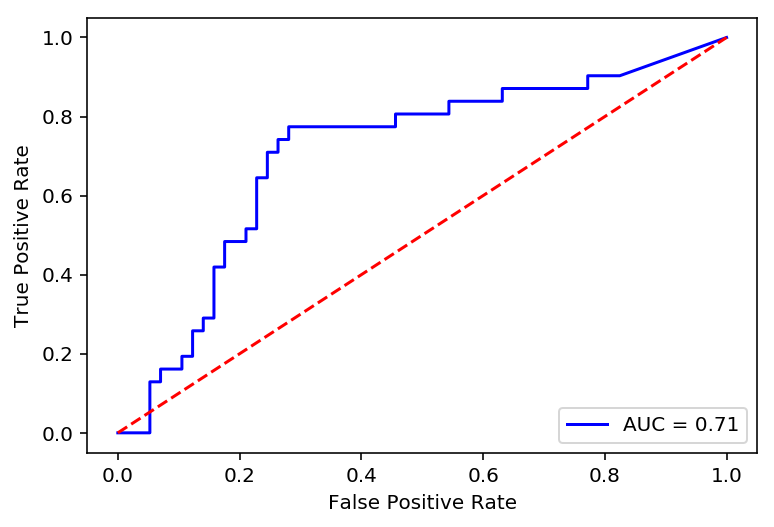

Found optimized model
Sample number 1 AUC of 0.7853736089030207 Threshold of 0.9 Recall score of 0.4864864864864865
Sample number 2 AUC of 0.6782738095238096 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.5405172413793102 Threshold of 0.9 Recall score of 0.4
Sample number 4 AUC of 0.6810897435897436 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.6553719008264464 Threshold of 0.9 Recall score of 0.48484848484848486
Sample number 6 AUC of 0.6844934917940011 Threshold of 0.9 Recall score of 0.41935483870967744
Sample number 7 AUC of 0.5655691964285714 Threshold of 0.9 Recall score of 0.46875
Sample number 8 AUC of 0.6836120401337793 Threshold of 0.9 Recall score of 0.391304347826087
Sample number 9 AUC of 0.6231303418803419 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 10 AUC of 0.72739651416122 Threshold of 0.8 Recall score of 0.5882352941176471
Sample number 11 AUC of 0.5505747126436782 Threshold of 0.8 Recall score of 0.3666666666666666

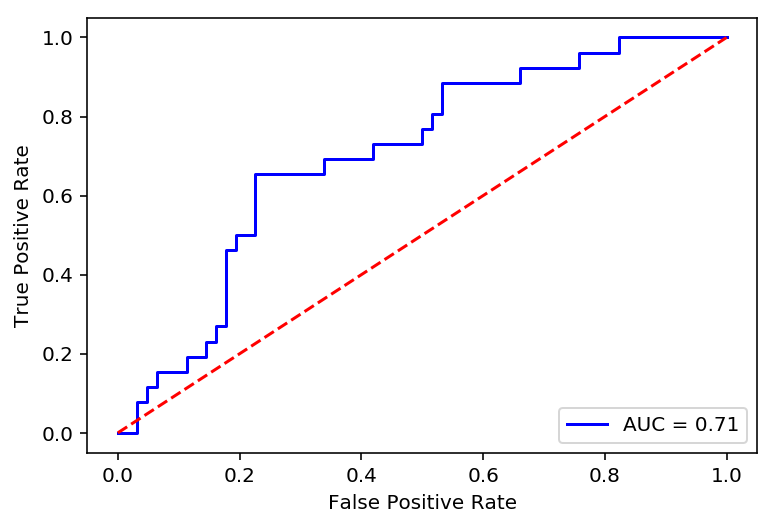

Found optimized model
Sample number 1 AUC of 0.6819172113289761 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.6210916799152093 Threshold of 0.9 Recall score of 0.4864864864864865
Sample number 3 AUC of 0.6595317725752508 Threshold of 0.9 Recall score of 0.5217391304347826
Sample number 4 AUC of 0.734375 Threshold of 0.9 Recall score of 0.625
Sample number 5 AUC of 0.7314453125 Threshold of 0.9 Recall score of 0.4583333333333333
Sample number 6 AUC of 0.6107700892857143 Threshold of 0.9 Recall score of 0.28125
Sample number 7 AUC of 0.6958333333333333 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.666015625 Threshold of 0.9 Recall score of 0.4583333333333333
Sample number 9 AUC of 0.8345424107142857 Threshold of 0.9 Recall score of 0.5


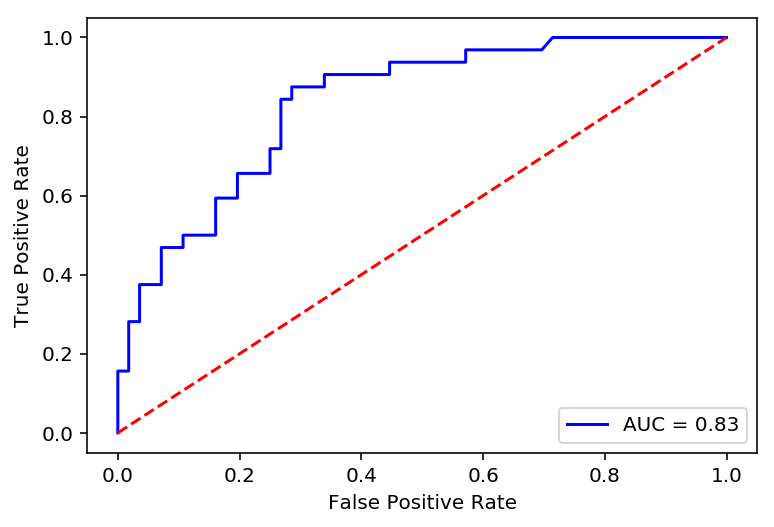

Found optimized model
Sample number 1 AUC of 0.7642679900744417 Threshold of 0.9 Recall score of 0.7692307692307693
Sample number 2 AUC of 0.6870066788099575 Threshold of 0.9 Recall score of 0.48148148148148145
Sample number 3 AUC of 0.7110119047619048 Threshold of 0.9 Recall score of 0.5357142857142857
Sample number 4 AUC of 0.670405982905983 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.7026143790849674 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 6 AUC of 0.7006688963210702 Threshold of 0.9 Recall score of 0.5652173913043478
Sample number 7 AUC of 0.6083333333333334 Threshold of 0.9 Recall score of 0.36666666666666664
Sample number 8 AUC of 0.7235534774985388 Threshold of 0.9 Recall score of 0.5517241379310345
Sample number 9 AUC of 0.7716253443526171 Threshold of 0.9 Recall score of 0.5757575757575758
Sample number 10 AUC of 0.7184095860566448 Threshold of 0.8 Recall score of 0.6764705882352942
Sample number 11 AUC of 0.5481041312959819 Threshol

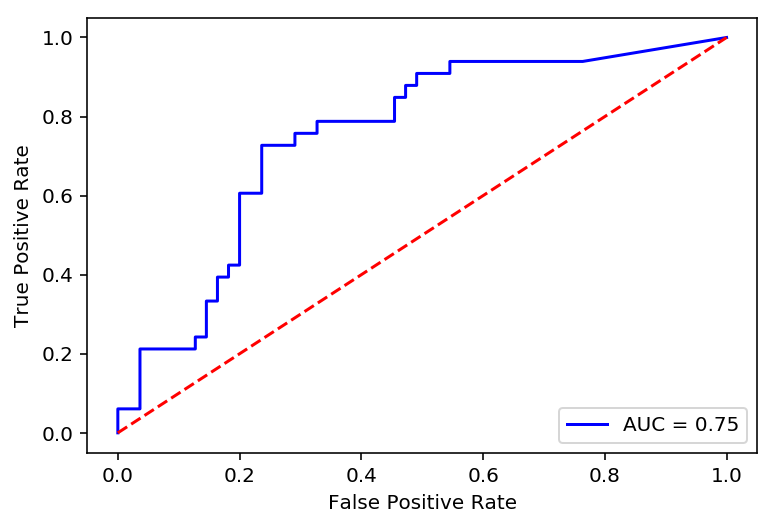

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 43    0.142759
Name: 7, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 8 potentially recommendable songs
8 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 43    0.142759
25    0.096961
Name: 7, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 6 potentially recommendable songs
14 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 43    0.142759
25    0.096961
2     0.090997
Name: 7, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
16 recommen

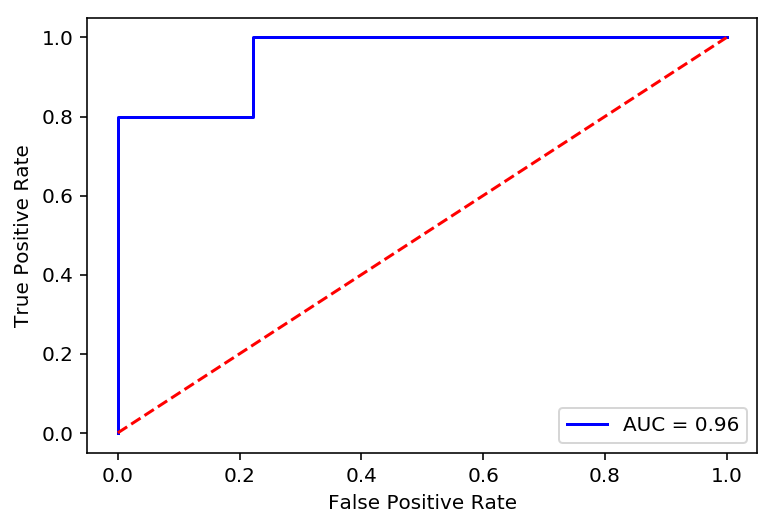

Found optimized model
Sample number 1 AUC of 0.7222222222222222 Threshold of 0.9 Recall score of 0.8
Sample number 2 AUC of 0.7244897959183674 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 3 AUC of 0.8333333333333333 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.8444444444444444 Threshold of 0.9 Recall score of 0.2
Sample number 5 AUC of 0.8125000000000001 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.7604166666666667 Threshold of 0.9 Recall score of 0.125
Sample number 7 AUC of 0.653061224489796 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 8 AUC of 0.49999999999999994 Threshold of 0.9 Recall score of 0.5
Sample number 9 AUC of 0.8500000000000001 Threshold of 0.9 Recall score of 0.75


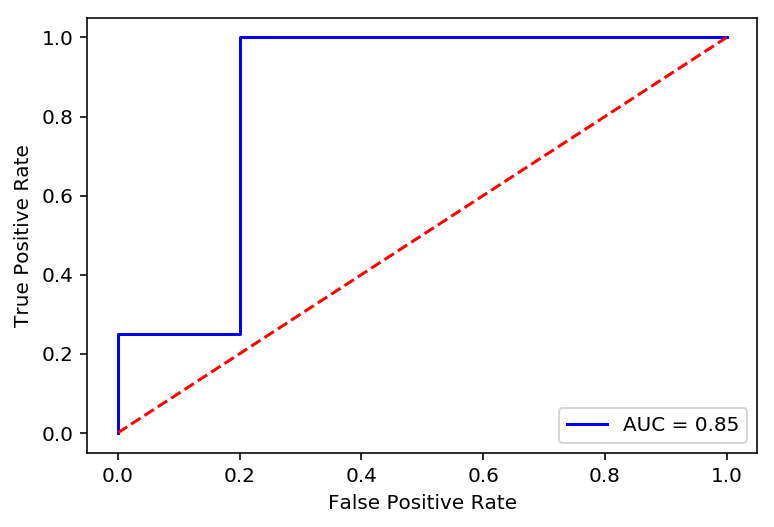

Found optimized model
Sample number 1 AUC of 0.75 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 0.9166666666666667 Threshold of 0.9 Recall score of 1.0


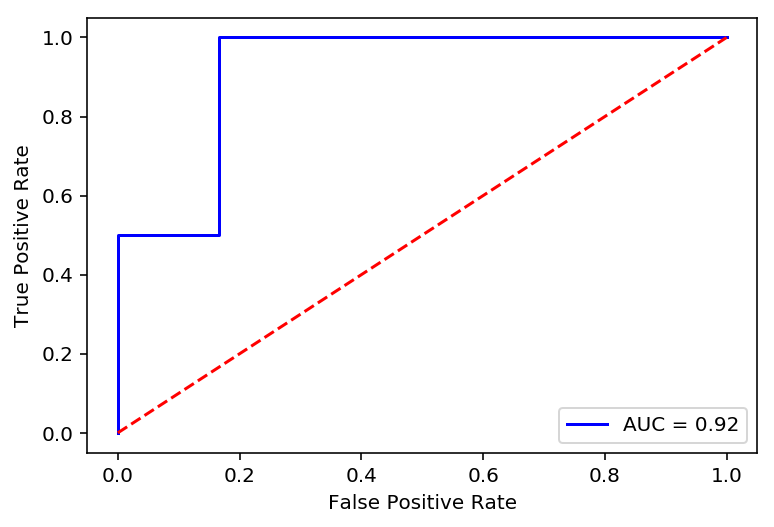

Found optimized model
Sample number 1 AUC of 0.846938775510204 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 2 AUC of 0.8958333333333333 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 3 AUC of 0.8461538461538461 Threshold of 0.9 Recall score of 1.0
Sample number 4 AUC of 1.0 Threshold of 0.9 Recall score of 0.75


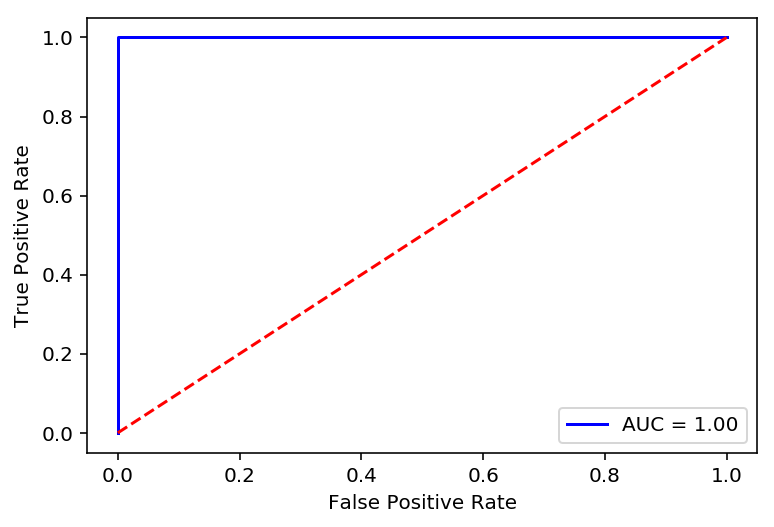

Found optimized model
Sample number 1 AUC of 0.6212121212121211 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 2 AUC of 0.7333333333333334 Threshold of 0.9 Recall score of 0.6
Sample number 3 AUC of 0.725 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.7916666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


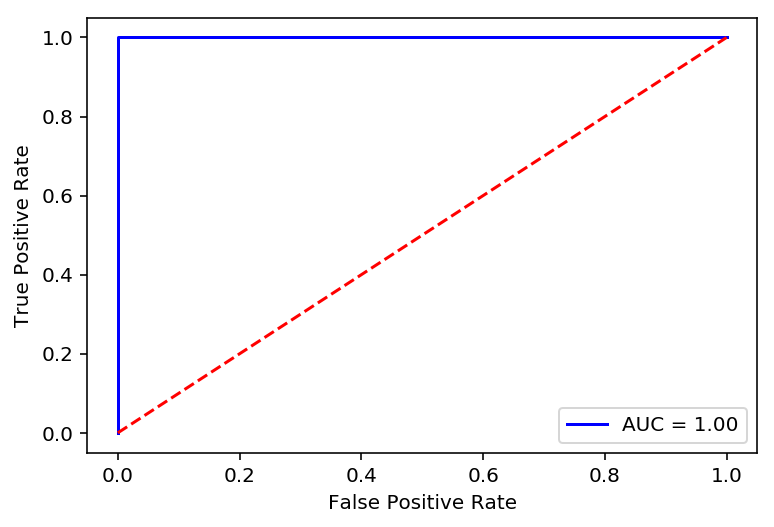

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 4    0.012956
Name: 20, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 6 potentially recommendable songs
6 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 4    0.012956
0    0.000000
Name: 20, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
6 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 4    0.012956
0    0.000000
1    0.000000
Name: 20, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
6 recommended s

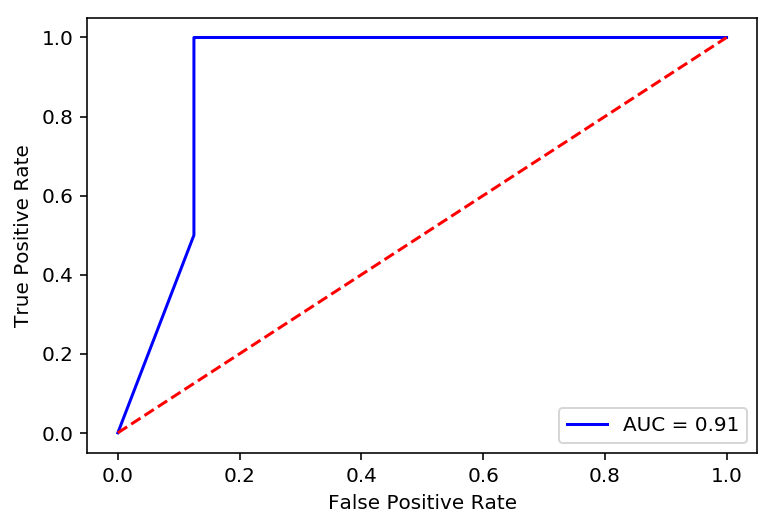

Found optimized model
Sample number 1 AUC of 0.875 Threshold of 0.9 Recall score of 1.0
Sample number 2 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


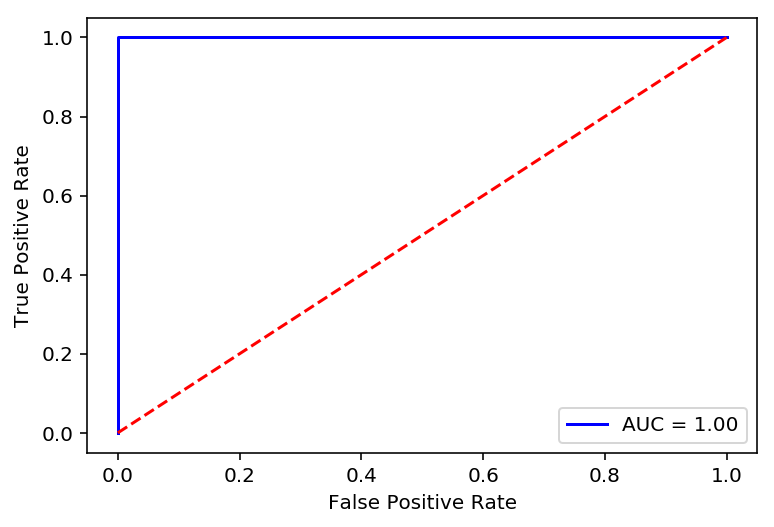

Found optimized model
Sample number 1 AUC of 0.9714285714285715 Threshold of 0.9 Recall score of 0.8


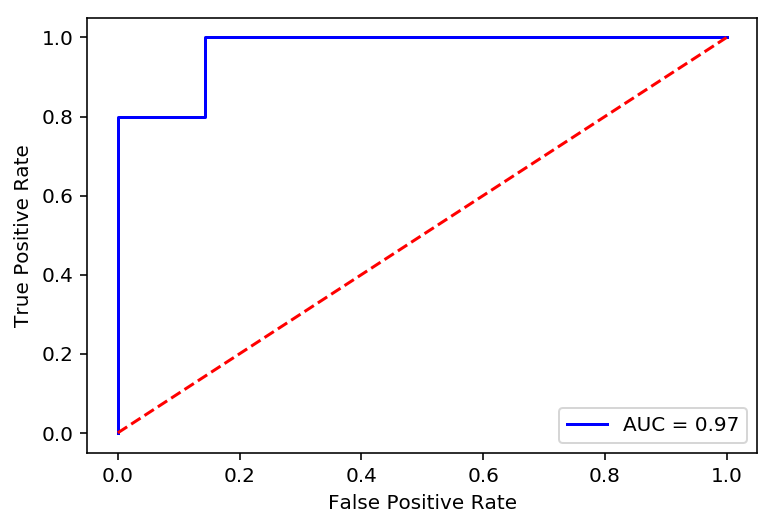

Found optimized model
Sample number 1 AUC of 1.0 Threshold of 0.9 Recall score of 0.7142857142857143


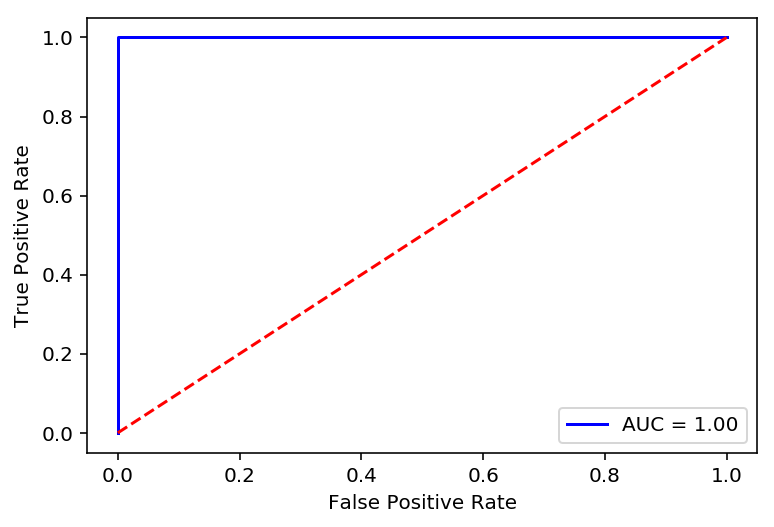

Found optimized model
Sample number 1 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


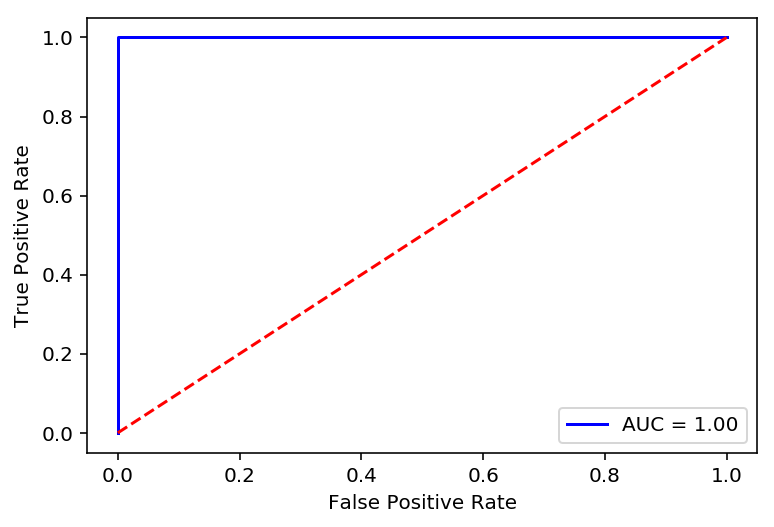

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 11    0.029111
Name: 27, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 2 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 11    0.029111
0     0.000000
Name: 27, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
3 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 11    0.029111
0     0.000000
1     0.000000
Name: 27, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
4 recomme

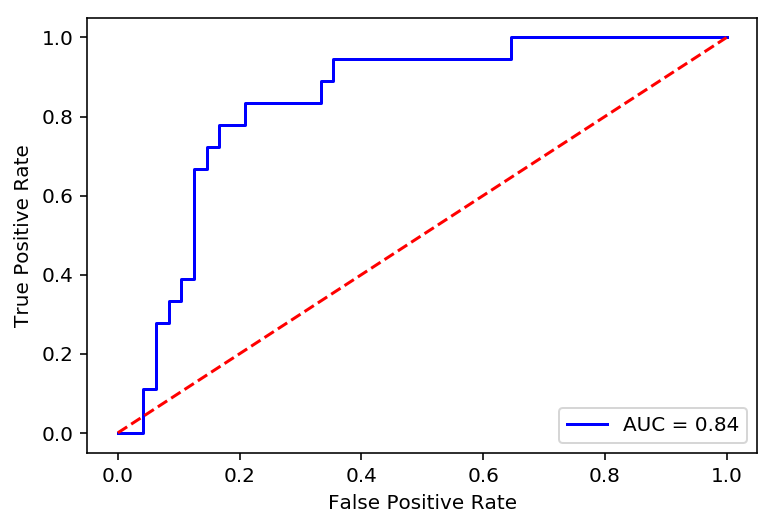

Found optimized model
Sample number 1 AUC of 0.7108190091001012 Threshold of 0.9 Recall score of 0.5652173913043478
Sample number 2 AUC of 0.7264678471575022 Threshold of 0.9 Recall score of 0.3793103448275862
Sample number 3 AUC of 0.8100664767331434 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 4 AUC of 0.683695652173913 Threshold of 0.9 Recall score of 0.4
Sample number 5 AUC of 0.8163461538461539 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 6 AUC of 0.7032608695652174 Threshold of 0.9 Recall score of 0.6
Sample number 7 AUC of 0.749301025163094 Threshold of 0.9 Recall score of 0.5517241379310345
Sample number 8 AUC of 0.6463293650793651 Threshold of 0.9 Recall score of 0.5
Sample number 9 AUC of 0.683090705487122 Threshold of 0.9 Recall score of 0.5789473684210527
Sample number 10 AUC of 0.72508398656215 Threshold of 0.8 Recall score of 0.5263157894736842
Sample number 11 AUC of 0.6695156695156695 Threshold of 0.8 Recall score of 0.444444444

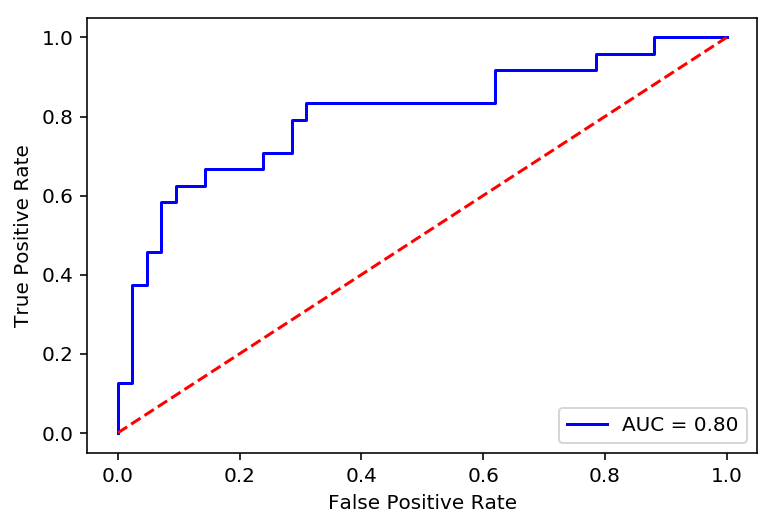

Found optimized model
Sample number 1 AUC of 0.6759615384615385 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 2 AUC of 0.6649038461538462 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 3 AUC of 0.769375 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.6525345622119817 Threshold of 0.9 Recall score of 0.3548387096774194
Sample number 5 AUC of 0.5682507583417593 Threshold of 0.9 Recall score of 0.391304347826087
Sample number 6 AUC of 0.6641304347826087 Threshold of 0.9 Recall score of 0.4
Sample number 7 AUC of 0.6556383970177073 Threshold of 0.9 Recall score of 0.4482758620689655
Sample number 8 AUC of 0.6942307692307692 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 9 AUC of 0.6513429752066116 Threshold of 0.9 Recall score of 0.5454545454545454
Sample number 10 AUC of 0.706845238095238 Threshold of 0.8 Recall score of 0.375
Sample number 11 AUC of 0.7065527065527065 Threshold of 0.8 Recall score of 0.48148148148

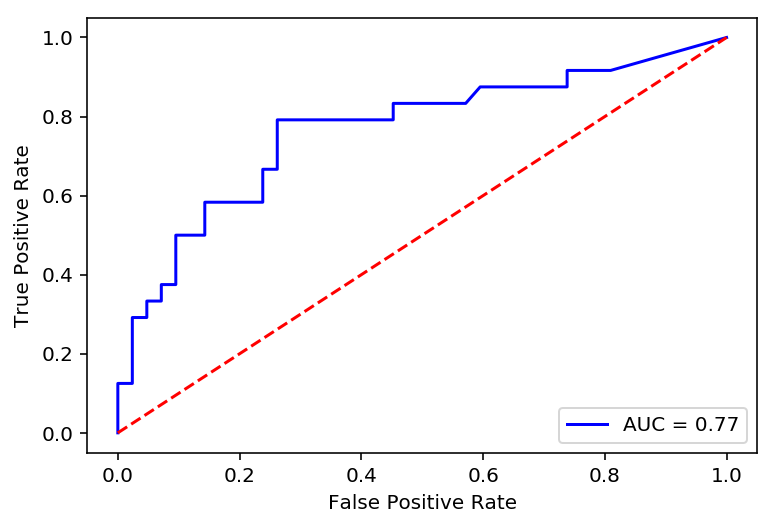

Found optimized model
Sample number 1 AUC of 0.5327380952380952 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 2 AUC of 0.7427884615384615 Threshold of 0.9 Recall score of 0.5769230769230769
Sample number 3 AUC of 0.6921296296296297 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 4 AUC of 0.7098078867542973 Threshold of 0.9 Recall score of 0.6521739130434783
Sample number 5 AUC of 0.6618287373004355 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 6 AUC of 0.8065217391304348 Threshold of 0.9 Recall score of 0.7
Sample number 7 AUC of 0.701086956521739 Threshold of 0.9 Recall score of 0.55
Sample number 8 AUC of 0.7891809908998988 Threshold of 0.9 Recall score of 0.8260869565217391
Sample number 9 AUC of 0.7728260869565218 Threshold of 0.9 Recall score of 0.55
Sample number 10 AUC of 0.5307950727883538 Threshold of 0.8 Recall score of 0.47368421052631576
Sample number 11 AUC of 0.6656746031746031 Threshold of 0.8 Recall score of 0.45

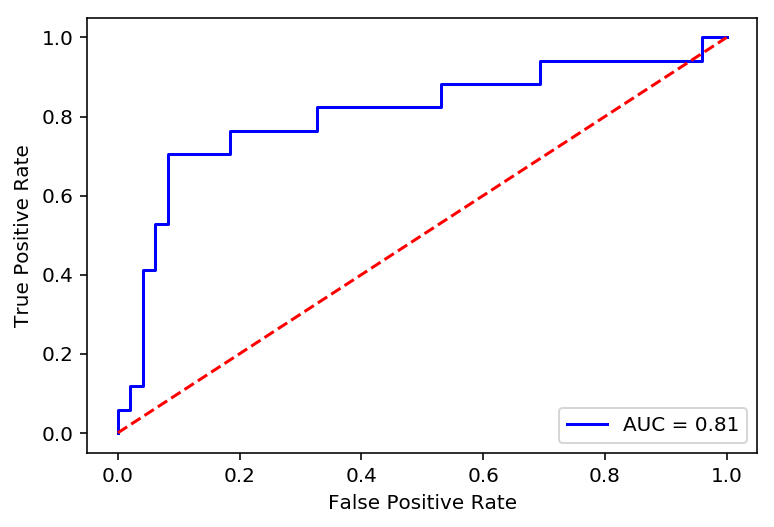

Found optimized model
Sample number 1 AUC of 0.6576086956521738 Threshold of 0.9 Recall score of 0.55
Sample number 2 AUC of 0.564484126984127 Threshold of 0.9 Recall score of 0.375
Sample number 3 AUC of 0.6512896825396827 Threshold of 0.9 Recall score of 0.375
Sample number 4 AUC of 0.7711776859504132 Threshold of 0.9 Recall score of 0.6363636363636364
Sample number 5 AUC of 0.726923076923077 Threshold of 0.9 Recall score of 0.4230769230769231
Sample number 6 AUC of 0.6656746031746033 Threshold of 0.9 Recall score of 0.4583333333333333
Sample number 7 AUC of 0.5526315789473684 Threshold of 0.9 Recall score of 0.32142857142857145
Sample number 8 AUC of 0.716931216931217 Threshold of 0.9 Recall score of 0.6190476190476191
Sample number 9 AUC of 0.5182002022244692 Threshold of 0.9 Recall score of 0.30434782608695654
Sample number 10 AUC of 0.526829268292683 Threshold of 0.8 Recall score of 0.32
Sample number 11 AUC of 0.795753286147624 Threshold of 0.8 Recall score of 0.6521739130434783

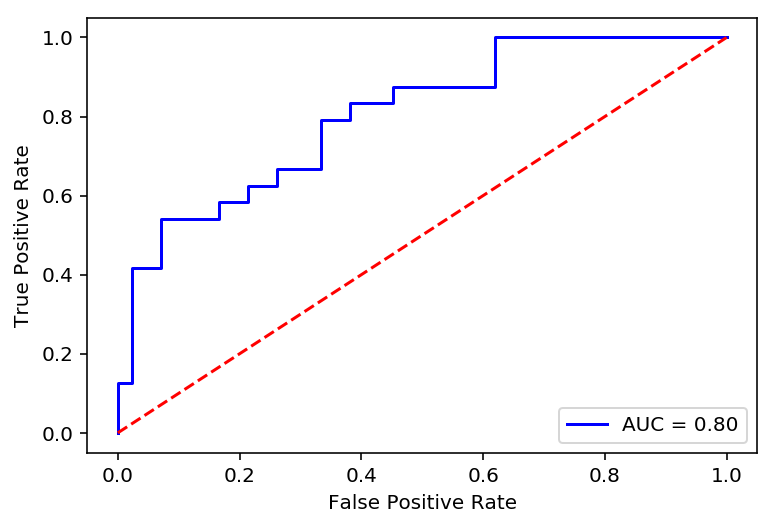

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 14    0.275445
Name: 3, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 14 potentially recommendable songs
14 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 14    0.275445
5     0.168550
Name: 3, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 5 potentially recommendable songs
19 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 14    0.275445
5     0.168550
4     0.159962
Name: 3, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 42 potentially recommendable songs
---Recom

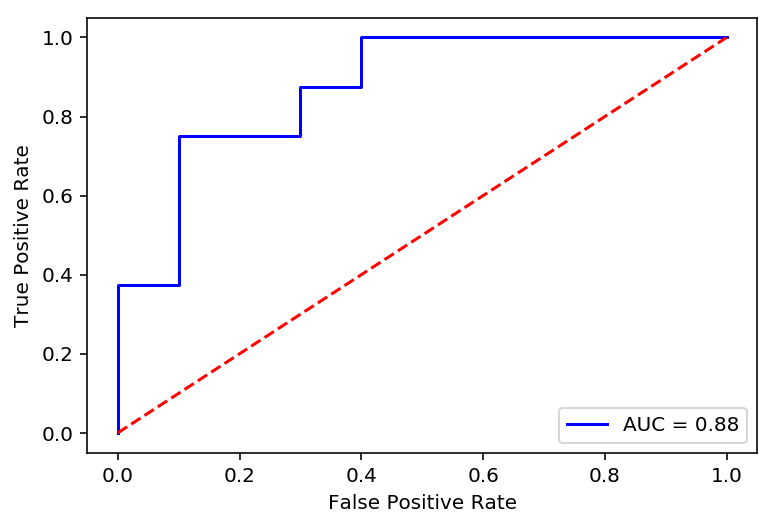

Found optimized model
Sample number 1 AUC of 0.825 Threshold of 0.9 Recall score of 0.625
Sample number 2 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.47692307692307695 Threshold of 0.9 Recall score of 0.2
Sample number 4 AUC of 0.6307692307692307 Threshold of 0.9 Recall score of 0.2
Sample number 5 AUC of 0.4675324675324676 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 6 AUC of 0.6805555555555556 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.5999999999999999 Threshold of 0.9 Recall score of 0.2
Sample number 8 AUC of 0.525 Threshold of 0.9 Recall score of 0.25
Sample number 9 AUC of 0.8666666666666667 Threshold of 0.9 Recall score of 0.6666666666666666


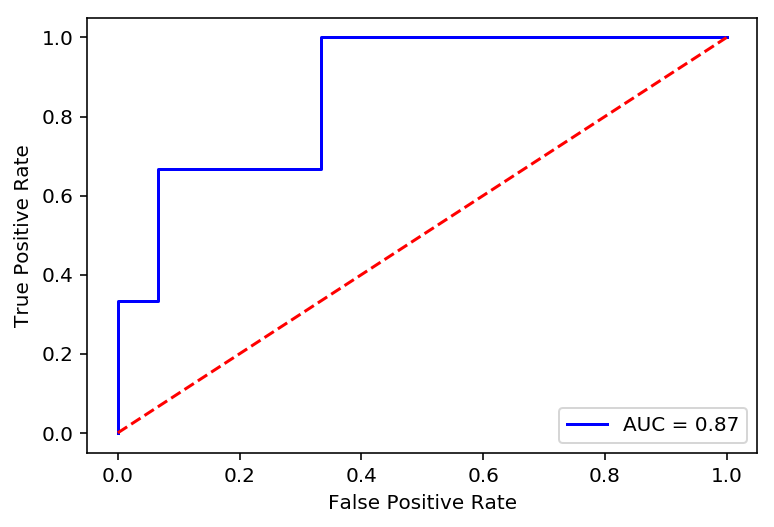

Found optimized model
Sample number 1 AUC of 0.4285714285714286 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.8271604938271605 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 3 AUC of 0.5882352941176471 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.5615384615384615 Threshold of 0.9 Recall score of 0.2
Sample number 5 AUC of 0.36363636363636365 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.4464285714285714 Threshold of 0.9 Recall score of 0.25
Sample number 7 AUC of 0.46753246753246747 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 8 AUC of 0.5454545454545454 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 9 AUC of 0.5138888888888888 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 10 AUC of 0.6615384615384615 Threshold of 0.8 Recall score of 0.4
Sample number 11 AUC of 0.2923076923076923 Threshold of 0.8 Recall score of 0.2
Sample number 12 AUC of 0.1948051948051948

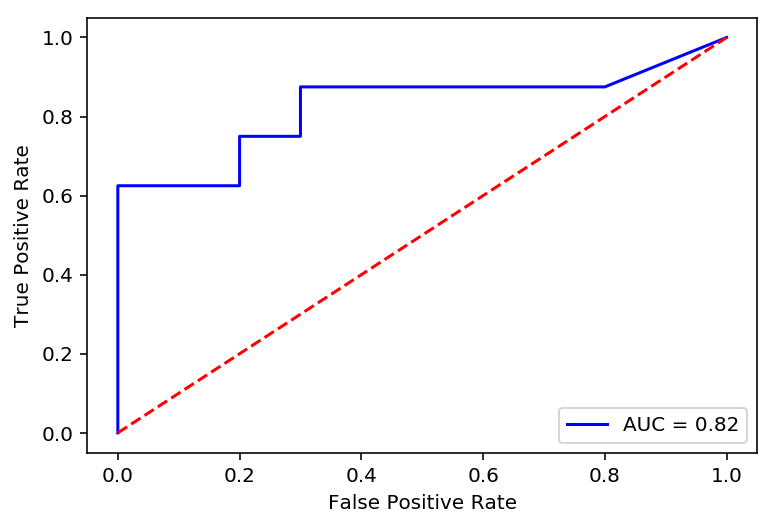

Found optimized model
Sample number 1 AUC of 0.4027777777777778 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.1875 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.5555555555555556 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 4 AUC of 0.564935064935065 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.8769230769230769 Threshold of 0.9 Recall score of 0.8
Sample number 6 AUC of 0.6753246753246753 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.3303571428571428 Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.5194805194805194 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 9 AUC of 0.3055555555555556 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 10 AUC of 0.46753246753246747 Threshold of 0.8 Recall score of 0.2857142857142857
Sample number 11 AUC of 0.37499999999999994 Threshold of 0.8 Recall score of 0.25
Sample number 12 AUC of 0.83076923076923

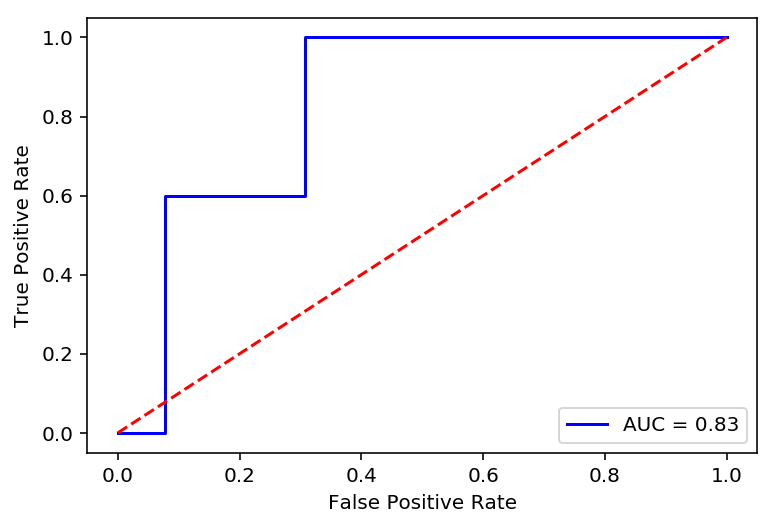

Found optimized model
Sample number 1 AUC of 0.6607142857142857 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.5493827160493827 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.49350649350649345 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 4 AUC of 0.5584415584415584 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.44155844155844154 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 6 AUC of 0.5185185185185186 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.6000000000000001 Threshold of 0.9 Recall score of 0.4
Sample number 8 AUC of 0.75 Threshold of 0.9 Recall score of 0.25
Sample number 9 AUC of 0.55 Threshold of 0.9 Recall score of 0.5
Sample number 10 AUC of 0.4461538461538461 Threshold of 0.8 Recall score of 0.2
Sample number 11 AUC of 0.5538461538461539 Threshold of 0.8 Recall score of 0.2
Sample number 12 AUC of 0.6319444444444444 Threshold of 0.8 Recall score of 0.16666666666666666
Sampl

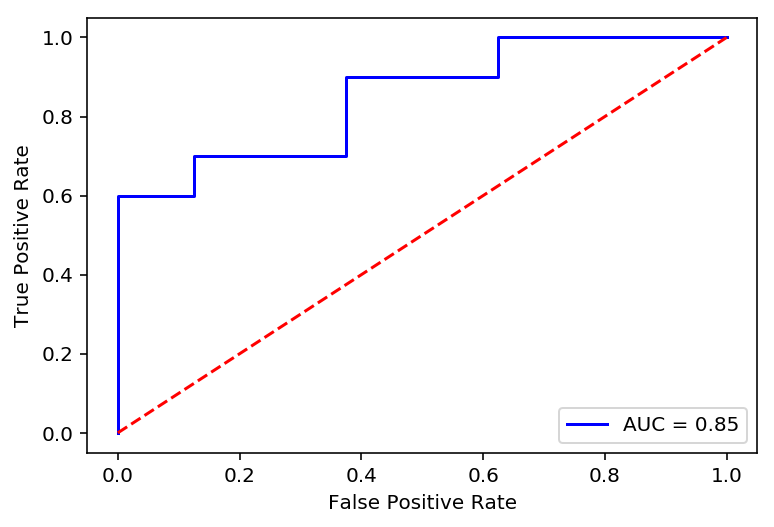

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 36    0.090075
Name: 0, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 1 potentially recommendable songs
1 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 36    0.090075
3     0.053116
Name: 0, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
3 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 36    0.090075
3     0.053116
49    0.044710
Name: 0, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 3 potentially recommendable songs
6 recommende

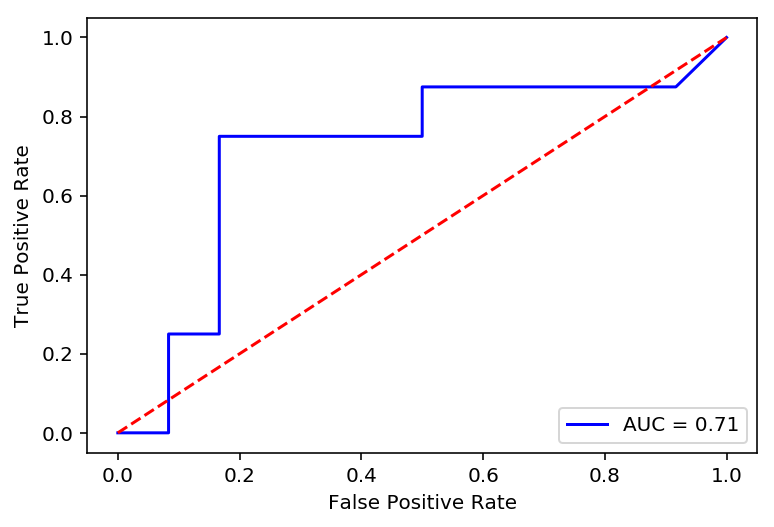

Found optimized model
Sample number 1 AUC of 0.546875 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 0.71875 Threshold of 0.9 Recall score of 0.375
Sample number 3 AUC of 0.7976190476190476 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.9066666666666667 Threshold of 0.9 Recall score of 0.8


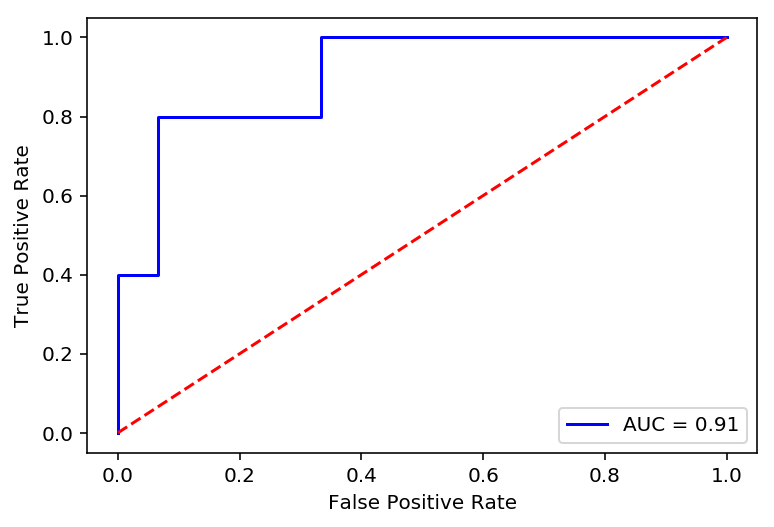

Found optimized model
Sample number 1 AUC of 0.8125 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.7474747474747474 Threshold of 0.9 Recall score of 0.7777777777777778
Sample number 3 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 4 AUC of 0.78125 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.6354166666666666 Threshold of 0.9 Recall score of 0.375
Sample number 6 AUC of 0.92 Threshold of 0.9 Recall score of 0.4


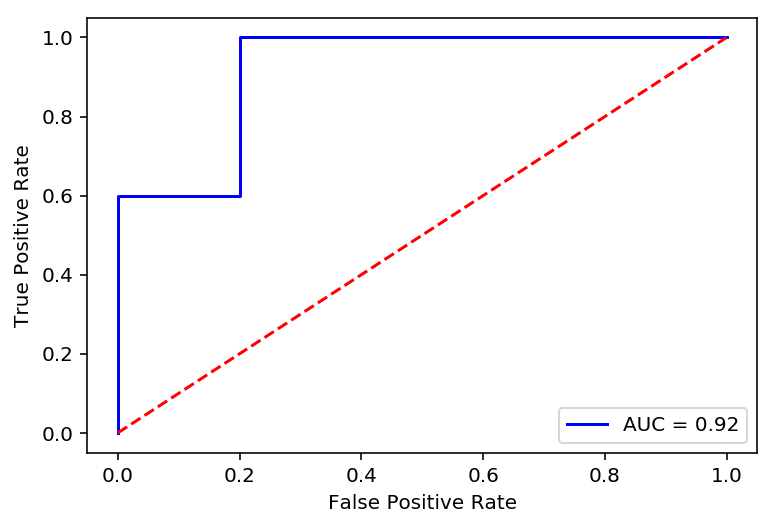

Found optimized model
Sample number 1 AUC of 0.8229166666666667 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 0.8809523809523809 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 3 AUC of 0.7252747252747253 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 4 AUC of 0.8828125 Threshold of 0.9 Recall score of 1.0
Sample number 5 AUC of 0.6904761904761905 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.967032967032967 Threshold of 0.9 Recall score of 0.7142857142857143


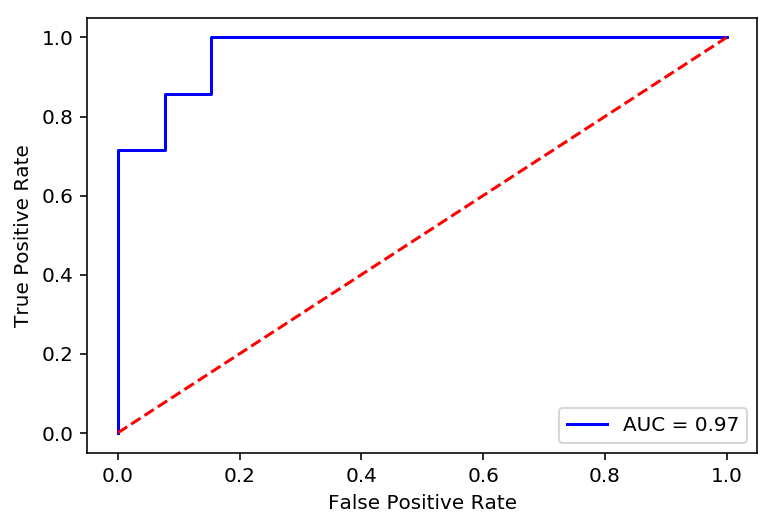

Found optimized model
Sample number 1 AUC of 0.8452380952380952 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.9285714285714286 Threshold of 0.9 Recall score of 0.6666666666666666


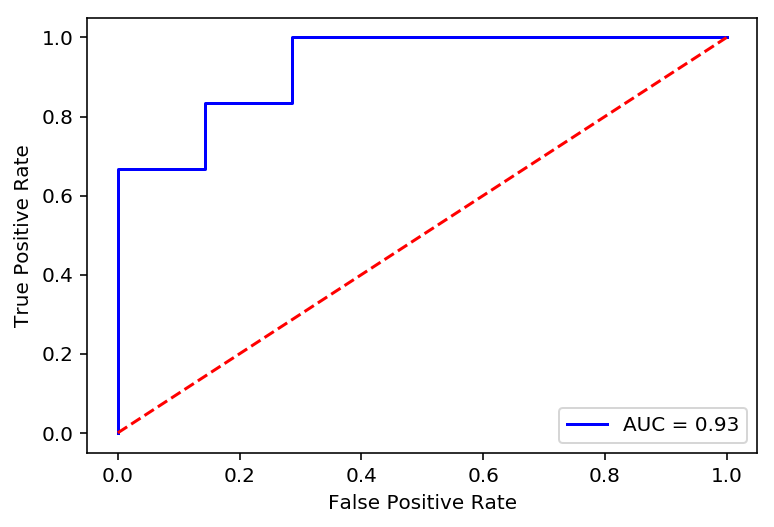

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 3    0.16855
Name: 5, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 26 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Ultimate Rave Mix
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 43    0.141397
Name: 11, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.6270903010033445 Threshold of 0.9 Recall score of 0.3076923076923077
Sample number 2 AUC of 0.6269230769230769 Threshold of 0.9 Recall score of 0.3
Sample number 3 AUC of 0.7054545454545454 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 4 AUC of 0.4634615384615385 Threshold of 0.9 Recal

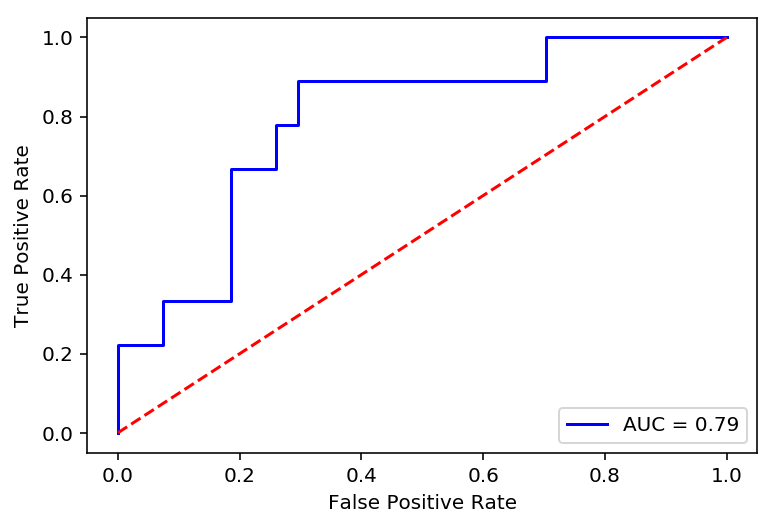

Found optimized model
Sample number 1 AUC of 0.5590277777777778 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 2 AUC of 0.5468227424749164 Threshold of 0.9 Recall score of 0.15384615384615385
Sample number 3 AUC of 0.3423076923076923 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.7333333333333333 Threshold of 0.9 Recall score of 0.06666666666666667
Sample number 5 AUC of 0.49454545454545457 Threshold of 0.9 Recall score of 0.18181818181818182
Sample number 6 AUC of 0.4945454545454545 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 7 AUC of 0.578125 Threshold of 0.9 Recall score of 0.25
Sample number 8 AUC of 0.5451388888888888 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.5807692307692308 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.5260416666666666 Threshold of 0.8 Recall score of 0.08333333333333333
Sample number 11 AUC of 0.7448559670781894 Threshold of 0.8 Recall score of 0.66666666

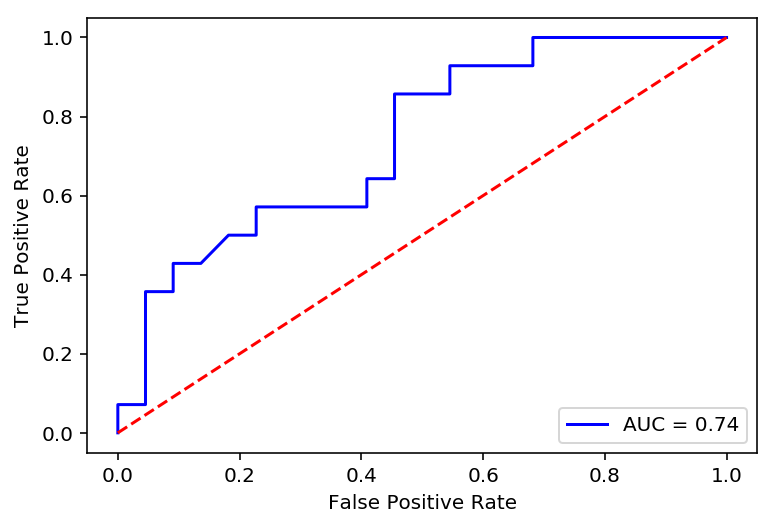

Found optimized model
Sample number 1 AUC of 0.7160493827160493 Threshold of 0.9 Recall score of 0.1111111111111111
Sample number 2 AUC of 0.6384615384615384 Threshold of 0.9 Recall score of 0.6
Sample number 3 AUC of 0.4921875 Threshold of 0.9 Recall score of 0.125
Sample number 4 AUC of 0.4571428571428572 Threshold of 0.9 Recall score of 0.06666666666666667
Sample number 5 AUC of 0.3368055555555555 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 6 AUC of 0.5250836120401339 Threshold of 0.9 Recall score of 0.3076923076923077
Sample number 7 AUC of 0.6158730158730159 Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.6266233766233766 Threshold of 0.9 Recall score of 0.07142857142857142
Sample number 9 AUC of 0.6555183946488294 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 10 AUC of 0.6090534979423868 Threshold of 0.8 Recall score of 0.4444444444444444
Sample number 11 AUC of 0.7291666666666666 Threshold of 0.8 Recall score of 0.4166666

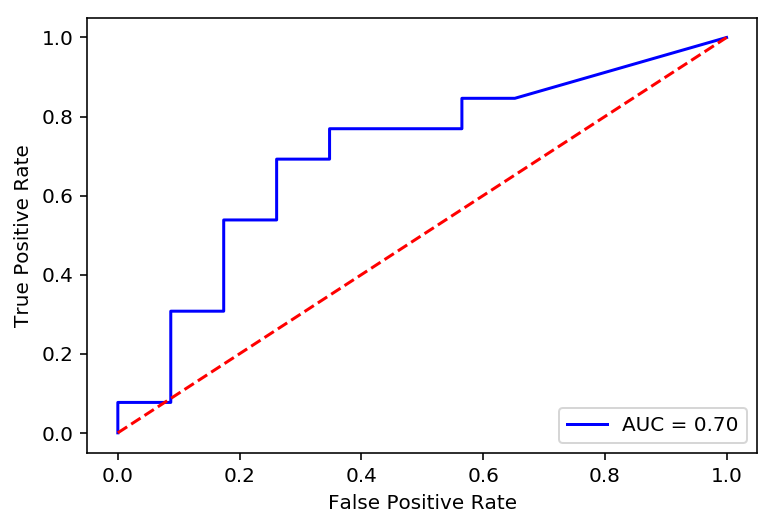

Found optimized model
Sample number 1 AUC of 0.5714285714285715 Threshold of 0.9 Recall score of 0.125
Sample number 2 AUC of 0.384375 Threshold of 0.9 Recall score of 0.0625
Sample number 3 AUC of 0.5819397993311037 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 4 AUC of 0.5451505016722409 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 5 AUC of 0.49025974025974023 Threshold of 0.9 Recall score of 0.07142857142857142
Sample number 6 AUC of 0.41769547325102885 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 7 AUC of 0.4882943143812709 Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.49206349206349215 Threshold of 0.9 Recall score of 0.26666666666666666
Sample number 9 AUC of 0.5317725752508362 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 10 AUC of 0.390625 Threshold of 0.8 Recall score of 0.4166666666666667
Sample number 11 AUC of 0.7093596059113301 Threshold of 0.8 Recall score of 0.28571428571

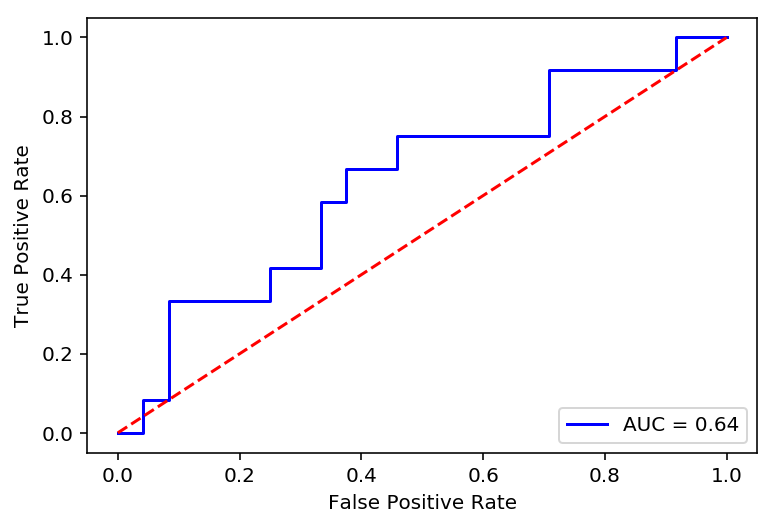

Found optimized model
Sample number 1 AUC of 0.5345454545454545 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 2 AUC of 0.6068111455108359 Threshold of 0.9 Recall score of 0.058823529411764705
Sample number 3 AUC of 0.573076923076923 Threshold of 0.9 Recall score of 0.2
Sample number 4 AUC of 0.46590909090909094 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 5 AUC of 0.5384615384615384 Threshold of 0.9 Recall score of 0.3
Sample number 6 AUC of 0.4884615384615385 Threshold of 0.9 Recall score of 0.3
Sample number 7 AUC of 0.3380952380952381 Threshold of 0.9 Recall score of 0.06666666666666667
Sample number 8 AUC of 0.545138888888889 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 9 AUC of 0.6233766233766234 Threshold of 0.9 Recall score of 0.07142857142857142
Sample number 10 AUC of 0.4930555555555556 Threshold of 0.8 Recall score of 0.16666666666666666
Sample number 11 AUC of 0.7448559670781894 Threshold of 0.8 Recall score of 

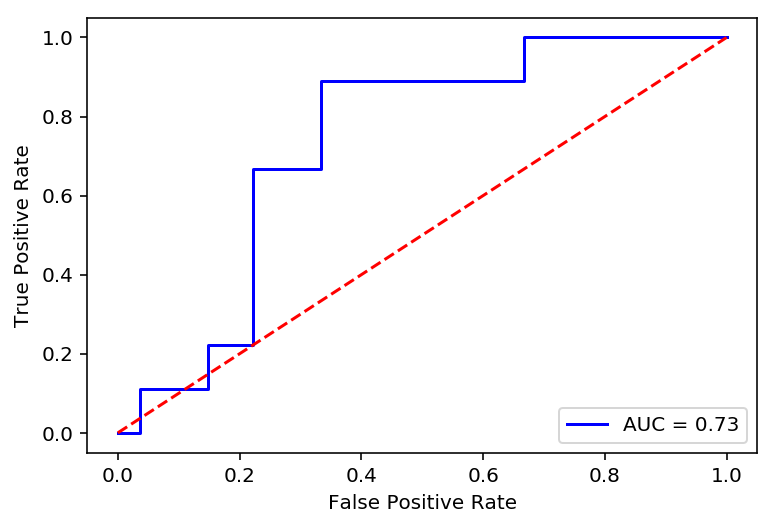

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 43    0.141397
Name: 11, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 29 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Melodic
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 22    0.518188
Name: 39, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.5578125 Threshold of 0.9 Recall score of 0.1875
Sample number 2 AUC of 0.576923076923077 Threshold of 0.9 Recall score of 0.6153846153846154
Sample number 3 AUC of 0.6892361111111112 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.5454545454545454 Threshold of 0.9 Recall score of 0.181818181818181

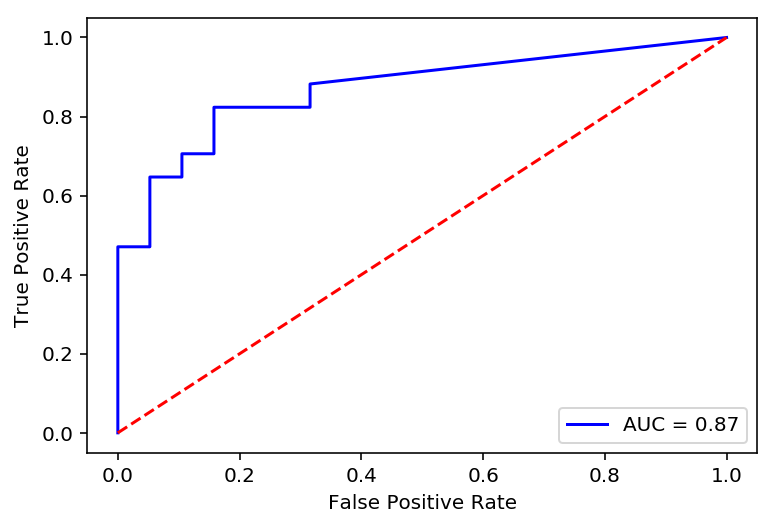

Found optimized model
Sample number 1 AUC of 0.7326388888888888 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.6054545454545455 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 3 AUC of 0.7395833333333334 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 4 AUC of 0.6049382716049383 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 5 AUC of 0.7118055555555556 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 6 AUC of 0.577922077922078 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 7 AUC of 0.6201298701298701 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 8 AUC of 0.5967078189300412 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.42361111111111105 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 10 AUC of 0.6346153846153846 Threshold of 0.8 Recall score of 0.5
Sample number 11 AUC of 0.724025974025974 Threshold of 0.8 Recal

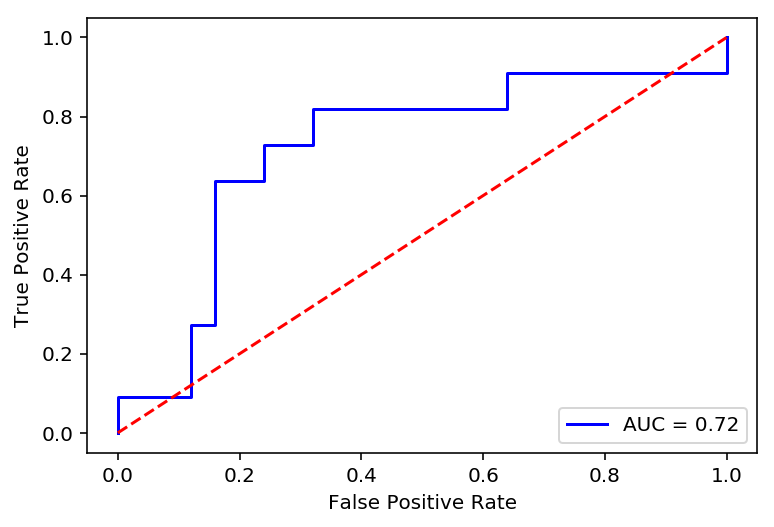

Found optimized model
Sample number 1 AUC of 0.757201646090535 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.629090909090909 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 3 AUC of 0.7192118226600985 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 4 AUC of 0.6875 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 5 AUC of 0.7743055555555556 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 6 AUC of 0.3015873015873016 Threshold of 0.9 Recall score of 0.13333333333333333
Sample number 7 AUC of 0.65 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.6220735785953178 Threshold of 0.9 Recall score of 0.38461538461538464
Sample number 9 AUC of 0.6041666666666667 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 10 AUC of 0.48263888888888895 Threshold of 0.8 Recall score of 0.25
Sample number 11 AUC of 0.5129870129870129 Threshold of 0.8 Recall score of 0.428571428571

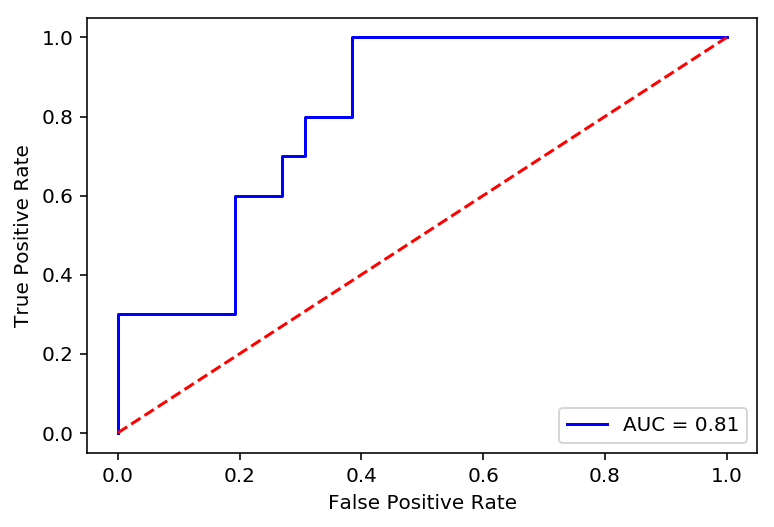

Found optimized model
Sample number 1 AUC of 0.603125 Threshold of 0.9 Recall score of 0.4375
Sample number 2 AUC of 0.5272727272727273 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 3 AUC of 0.6749226006191951 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 4 AUC of 0.6948051948051948 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.6571428571428571 Threshold of 0.9 Recall score of 0.5333333333333333
Sample number 6 AUC of 0.748263888888889 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 7 AUC of 0.6072727272727272 Threshold of 0.9 Recall score of 0.36363636363636365
Sample number 8 AUC of 0.5111111111111112 Threshold of 0.9 Recall score of 0.2
Sample number 9 AUC of 0.6836363636363636 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 10 AUC of 0.5072727272727272 Threshold of 0.8 Recall score of 0.36363636363636365
Sample number 11 AUC of 0.5422077922077921 Threshold of 0.8 Recall score of 0.428571428

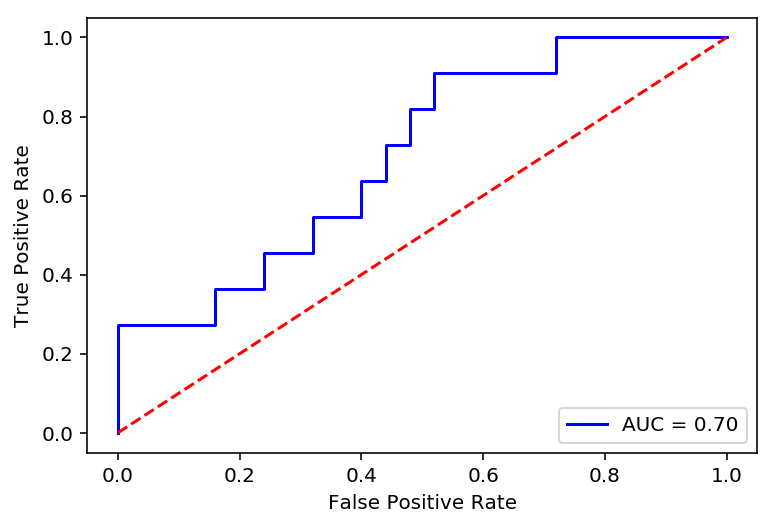

Found optimized model
Sample number 1 AUC of 0.7477678571428571 Threshold of 0.9 Recall score of 0.75
Sample number 2 AUC of 0.6120401337792643 Threshold of 0.9 Recall score of 0.38461538461538464
Sample number 3 AUC of 0.6631944444444445 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.35 Threshold of 0.9 Recall score of 0.1875
Sample number 5 AUC of 0.7629870129870129 Threshold of 0.9 Recall score of 0.6428571428571429
Sample number 6 AUC of 0.7224080267558528 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 7 AUC of 0.6588628762541806 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 8 AUC of 0.7954545454545454 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 9 AUC of 0.607638888888889 Threshold of 0.9 Recall score of 0.25
Sample number 10 AUC of 0.7333333333333335 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 11 AUC of 0.2909090909090909 Threshold of 0.8 Recall score of 0.09090909090909091
Sample nu

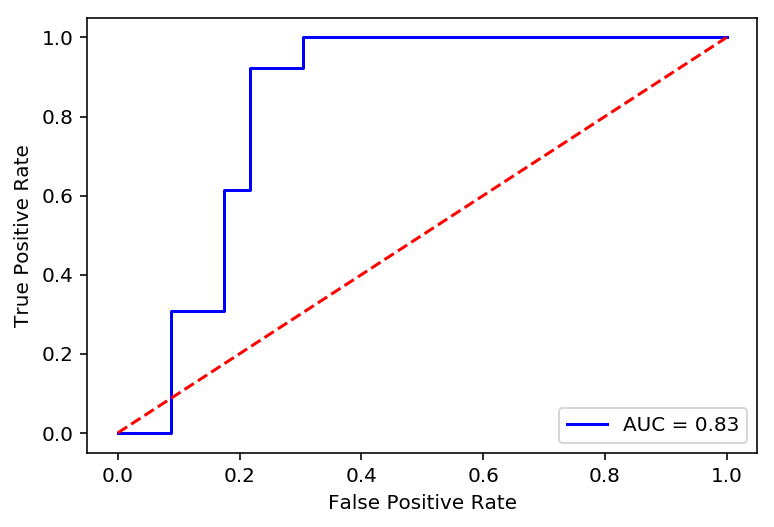

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 22    0.518188
Name: 39, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 6
Similar playlist contains 6 potentially recommendable songs
6 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 22    0.518188
17    0.154046
Name: 39, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 10
Similar playlist contains 17 potentially recommendable songs
23 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 22    0.518188
17    0.154046
25    0.145741
Name: 39, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 28
Similar playlist contains 40 potentially recommendable songs
---R

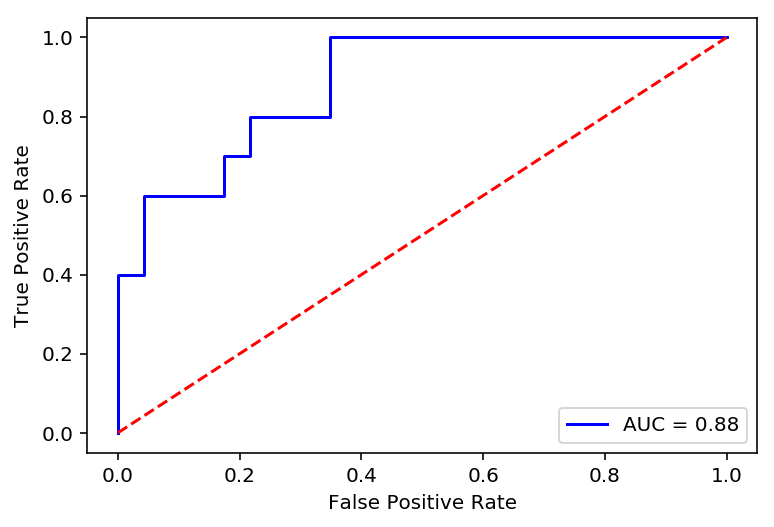

Found optimized model
Sample number 1 AUC of 0.6692307692307692 Threshold of 0.9 Recall score of 0.38461538461538464
Sample number 2 AUC of 0.5092592592592593 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 3 AUC of 0.36309523809523814 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 4 AUC of 0.6983471074380165 Threshold of 0.9 Recall score of 0.5454545454545454
Sample number 5 AUC of 0.5185185185185185 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 6 AUC of 0.6825396825396826 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 7 AUC of 0.77 Threshold of 0.9 Recall score of 0.625
Sample number 8 AUC of 0.5654761904761905 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 9 AUC of 0.6635338345864662 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 10 AUC of 0.5873015873015873 Threshold of 0.8 Recall score of 0.4166666666666667
Sample number 11 AUC of 0.5413223140495868 Threshold of 0.8 

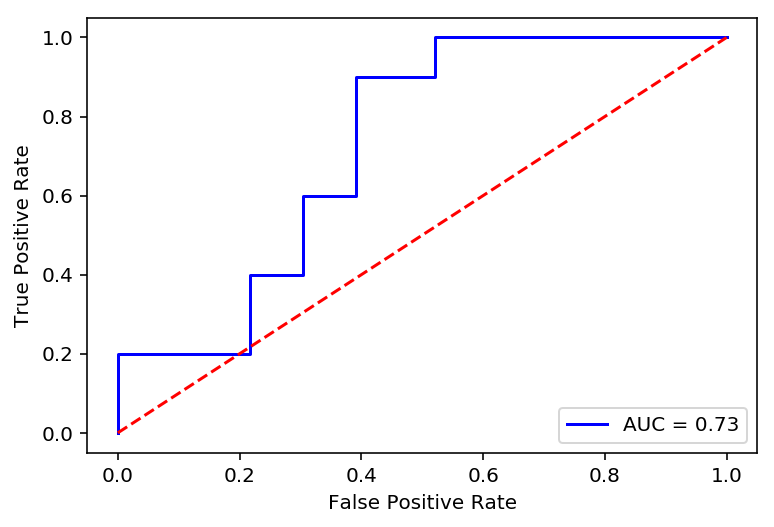

Found optimized model
Sample number 1 AUC of 0.5846153846153846 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 2 AUC of 0.5 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 0.4692307692307692 Threshold of 0.9 Recall score of 0.3076923076923077
Sample number 4 AUC of 0.5173913043478261 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.5601503759398496 Threshold of 0.9 Recall score of 0.21428571428571427
Sample number 6 AUC of 0.6296296296296297 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 7 AUC of 0.52 Threshold of 0.9 Recall score of 0.25
Sample number 8 AUC of 0.40909090909090906 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 9 AUC of 0.7130434782608696 Threshold of 0.9 Recall score of 0.2
Sample number 10 AUC of 0.5912698412698413 Threshold of 0.8 Recall score of 0.4166666666666667
Sample number 11 AUC of 0.6917293233082706 Threshold of 0.8 Recall score of 0.42857142857142855
Sample numb

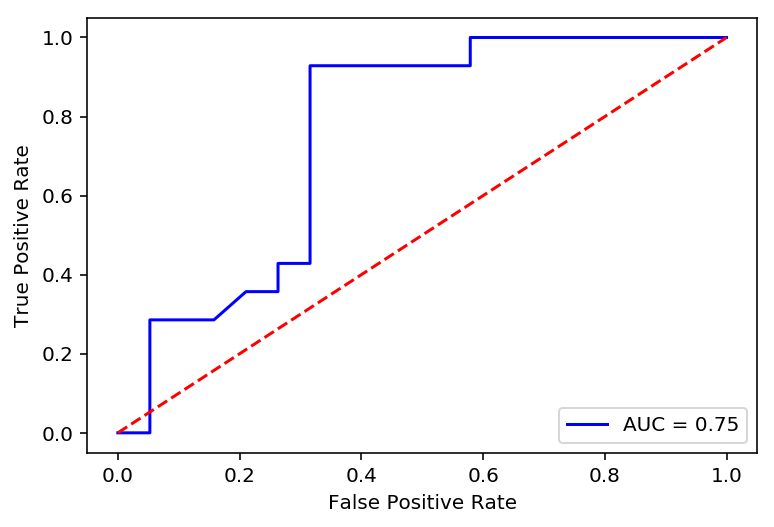

Found optimized model
Sample number 1 AUC of 0.6570247933884298 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 2 AUC of 0.6091269841269842 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 3 AUC of 0.49586776859504134 Threshold of 0.9 Recall score of 0.5454545454545454
Sample number 4 AUC of 0.5018382352941176 Threshold of 0.9 Recall score of 0.125
Sample number 5 AUC of 0.554945054945055 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 6 AUC of 0.3869565217391304 Threshold of 0.9 Recall score of 0.2
Sample number 7 AUC of 0.5674603174603174 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 8 AUC of 0.5634920634920635 Threshold of 0.9 Recall score of 0.25
Sample number 9 AUC of 0.48478260869565215 Threshold of 0.9 Recall score of 0.3
Sample number 10 AUC of 0.7107438016528925 Threshold of 0.8 Recall score of 0.2727272727272727
Sample number 11 AUC of 0.7527472527472527 Threshold of 0.8 Recall score of 0.0
Sample numbe

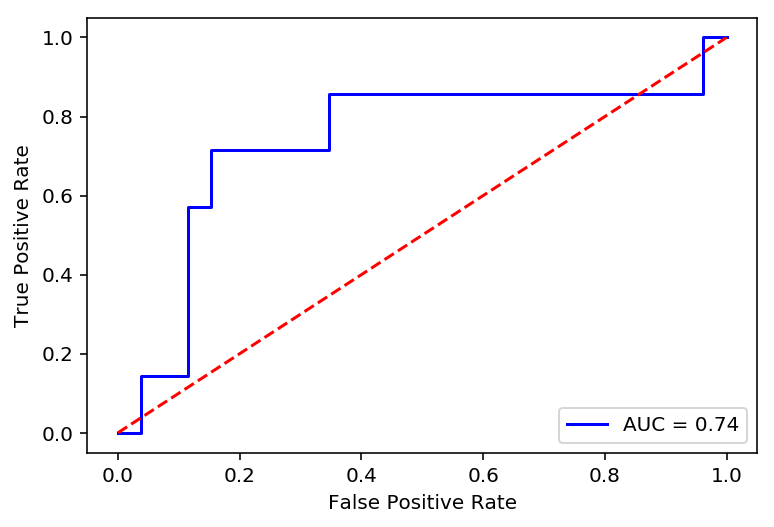

Found optimized model
Sample number 1 AUC of 0.46280991735537186 Threshold of 0.9 Recall score of 0.36363636363636365
Sample number 2 AUC of 0.6322314049586777 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 3 AUC of 0.2160493827160494 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 4 AUC of 0.7098765432098765 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.34782608695652173 Threshold of 0.9 Recall score of 0.1
Sample number 6 AUC of 0.5425 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.4801587301587301 Threshold of 0.9 Recall score of 0.08333333333333333
Sample number 8 AUC of 0.5950413223140496 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 9 AUC of 0.7057692307692308 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 10 AUC of 0.6115702479338843 Threshold of 0.8 Recall score of 0.2727272727272727
Sample number 11 AUC of 0.45867768595041325 Threshold of 0.8 Recall score of 0.27272727

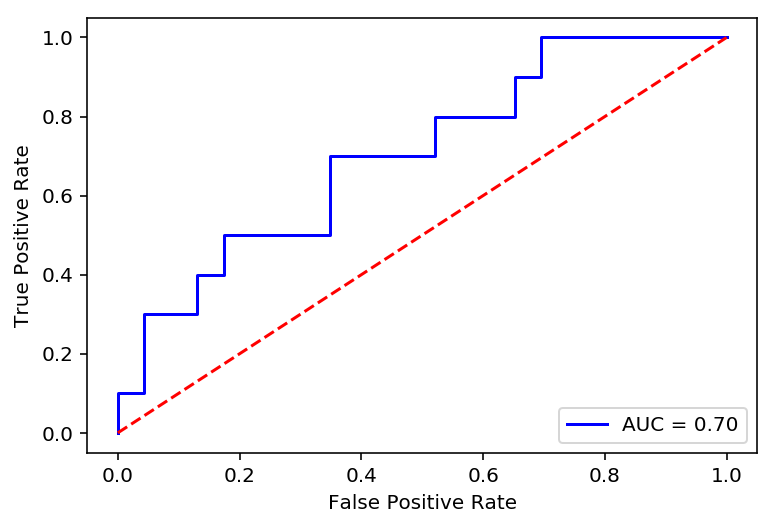

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 39    0.518188
Name: 22, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 1 potentially recommendable songs
1 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 39    0.518188
38    0.113228
Name: 22, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
3 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 39    0.518188
38    0.113228
25    0.109086
Name: 22, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 14 potentially recommendable songs
17 recom

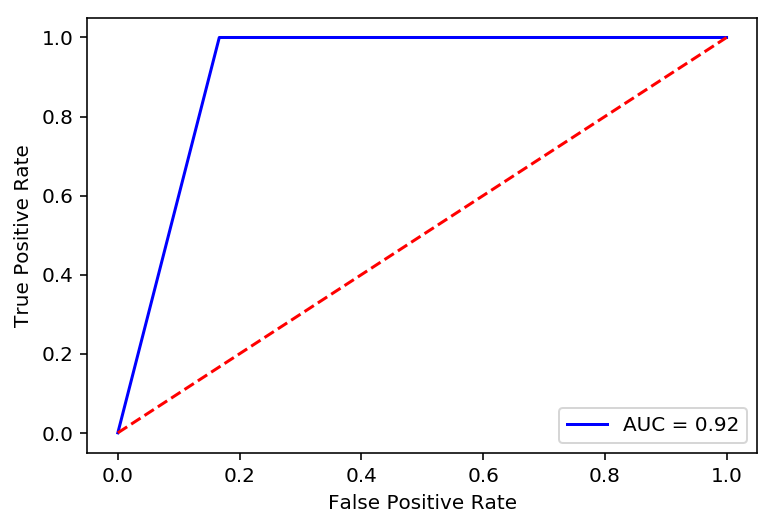

Found optimized model
Sample number 1 AUC of 0.39999999999999997 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.16666666666666663 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.3333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 4 AUC of 0.3333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 5 AUC of 0.0 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.6875 Threshold of 0.9 Recall score of 0.25
Sample number 7 AUC of 0.125 Threshold of 0.9 Recall score of 0.25
Sample number 8 AUC of 0.7333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.7333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 10 AUC of 0.25 Threshold of 0.8 Recall score of 0.0
Sample number 11 AUC of 0.0 Threshold of 0.8 Recall score of 0.0
Sample number 12 AUC of 0.5714285714285714 Threshold of 0.8 Recall score of 0.0
Sample number 13 

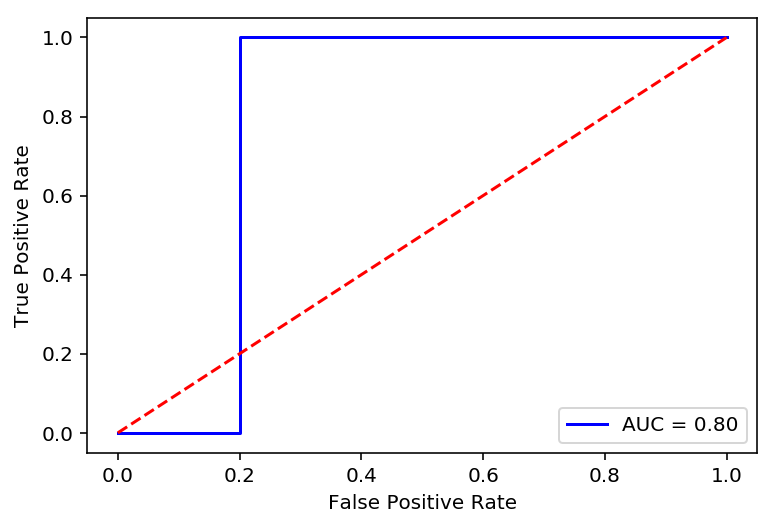

Found optimized model
Sample number 1 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.75 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.8571428571428572 Threshold of 0.9 Recall score of 1.0
Sample number 4 AUC of 0.7500000000000001 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.8 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.07142857142857145 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.6875 Threshold of 0.9 Recall score of 0.25
Sample number 9 AUC of 0.4 Threshold of 0.9 Recall score of 0.0
Sample number 10 AUC of 0.8571428571428572 Threshold of 0.8 Recall score of 1.0


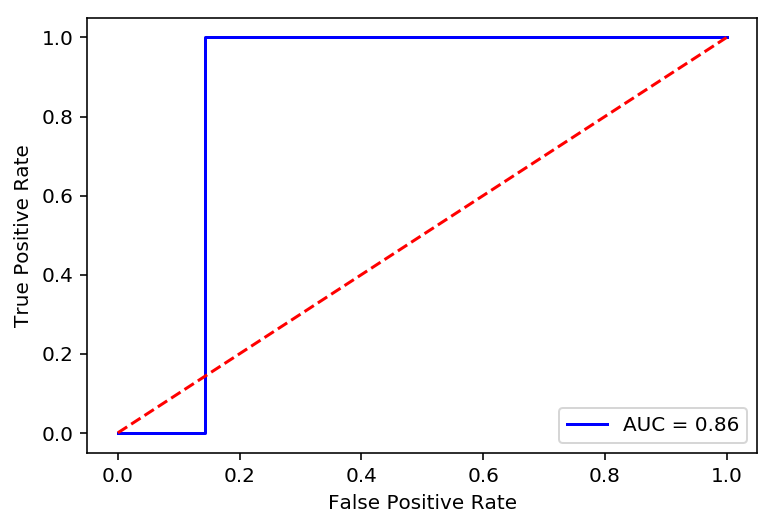

Found optimized model
Sample number 1 AUC of 0.8571428571428572 Threshold of 0.9 Recall score of 1.0
Sample number 2 AUC of 0.9285714285714286 Threshold of 0.9 Recall score of 1.0


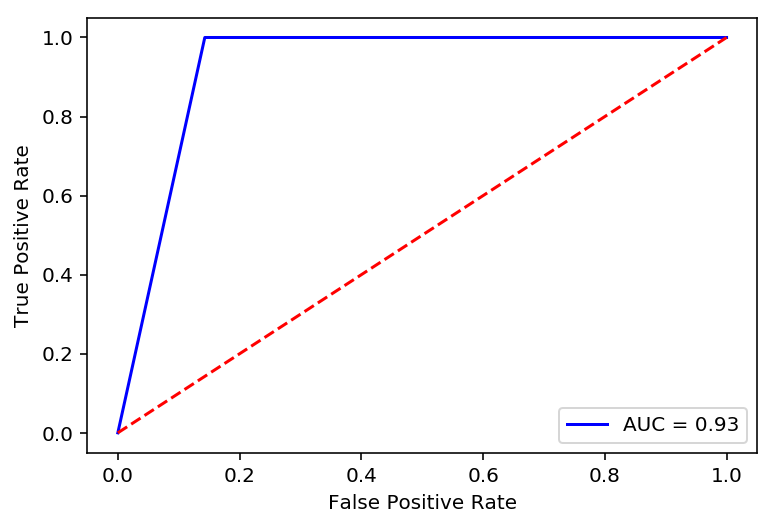

Found optimized model
Sample number 1 AUC of 0.25 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.7333333333333334 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.75 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of nan Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.4285714285714286 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.39999999999999997 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 7 AUC of 0.4166666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.8666666666666667 Threshold of 0.9 Recall score of 0.4
Sample number 9 AUC of 0.4666666666666666 Threshold of 0.9 Recall score of 0.0
Sample number 10 AUC of 0.2 Threshold of 0.8 Recall score of 0.2
Sample number 11 AUC of 0.4166666666666667 Threshold of 0.8 Recall score of 0.0
Sample number 12 AUC of 0.4 Threshold of 0.8 Recall score of 0.4
Sample number 13 AUC of 0.8333333333333334 Threshold of 0.8 Recall score of 0.5


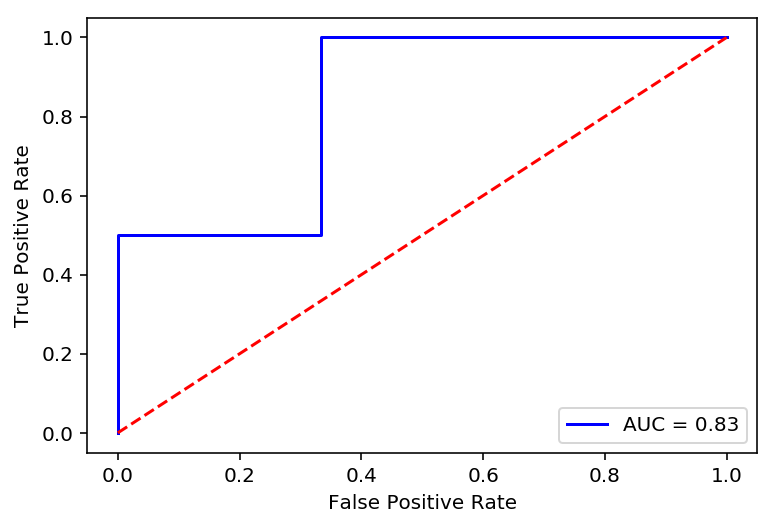

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 25    0.222328
Name: 38, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 88
Similar playlist contains 94 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Hard Techno
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 25    0.209653
Name: 9, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.7592592592592593 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.8035714285714286 Threshold of 0.9 Recall score of 0.8571428571428571
Sample number 3 AUC of 0.78 Threshold of 0.9 Recall score of 0.8
Sample number 4 AUC of 0.7857142857142856 Threshold of 0.9 Recall score of 0.5714285714285714
Sa

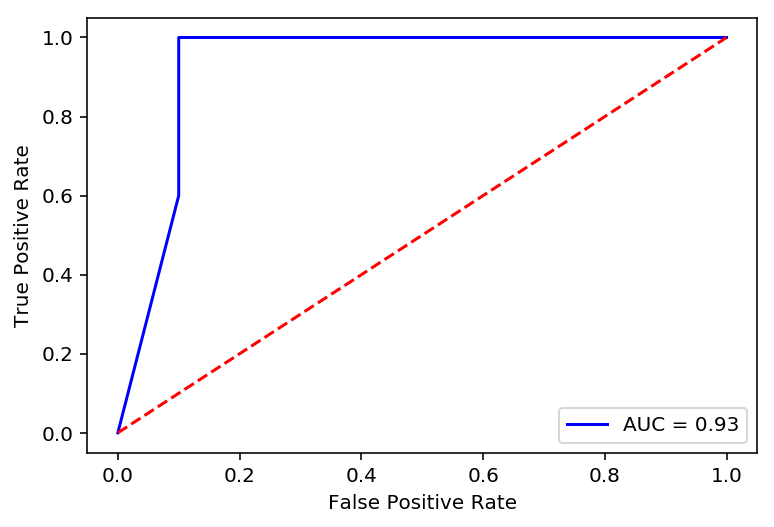

Found optimized model
Sample number 1 AUC of 0.7777777777777779 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 2 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


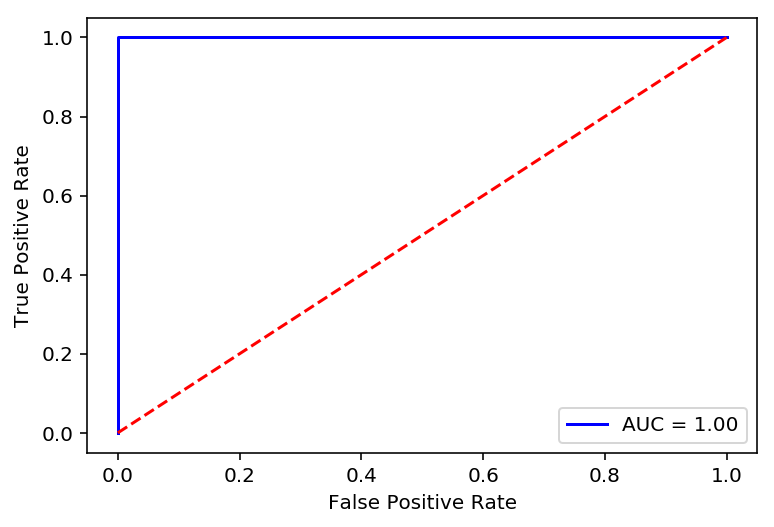

Found optimized model
Sample number 1 AUC of 0.8 Threshold of 0.9 Recall score of 0.8
Sample number 2 AUC of 0.4722222222222222 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 0.9285714285714285 Threshold of 0.9 Recall score of 0.5714285714285714


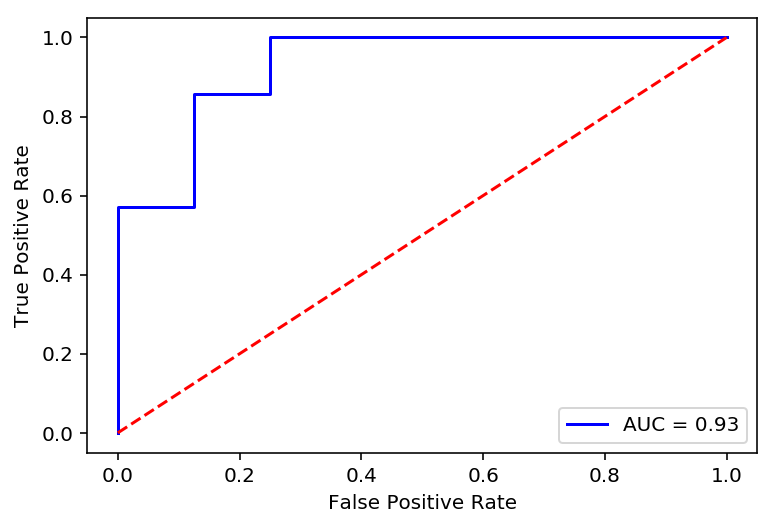

Found optimized model
Sample number 1 AUC of 0.75 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.86 Threshold of 0.9 Recall score of 0.6
Sample number 3 AUC of 0.6666666666666666 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.7999999999999999 Threshold of 0.9 Recall score of 0.4
Sample number 5 AUC of 0.8425925925925927 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 6 AUC of 0.7222222222222223 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 7 AUC of 0.8303571428571429 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.6071428571428572 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 9 AUC of 0.851851851851852 Threshold of 0.9 Recall score of 0.6666666666666666


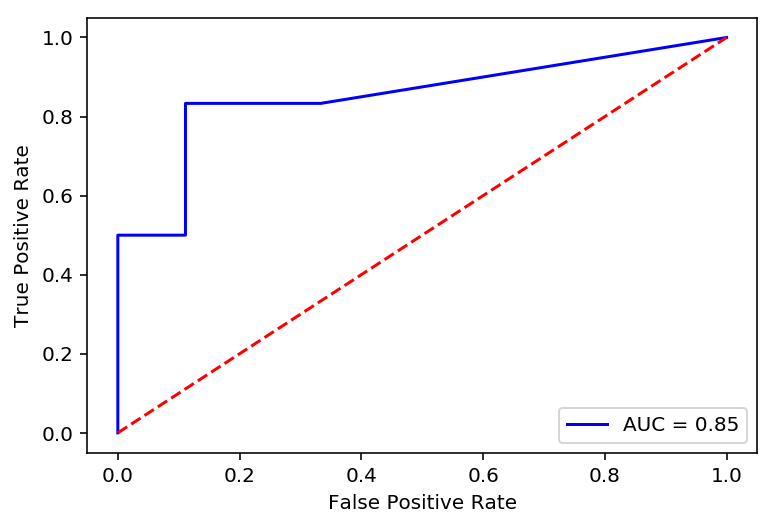

Found optimized model
Sample number 1 AUC of 0.7407407407407407 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 2 AUC of 0.6851851851851851 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 0.8928571428571428 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 4 AUC of 0.6388888888888888 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 5 AUC of 0.6851851851851851 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 6 AUC of 0.8333333333333334 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 7 AUC of 0.9285714285714286 Threshold of 0.9 Recall score of 0.625


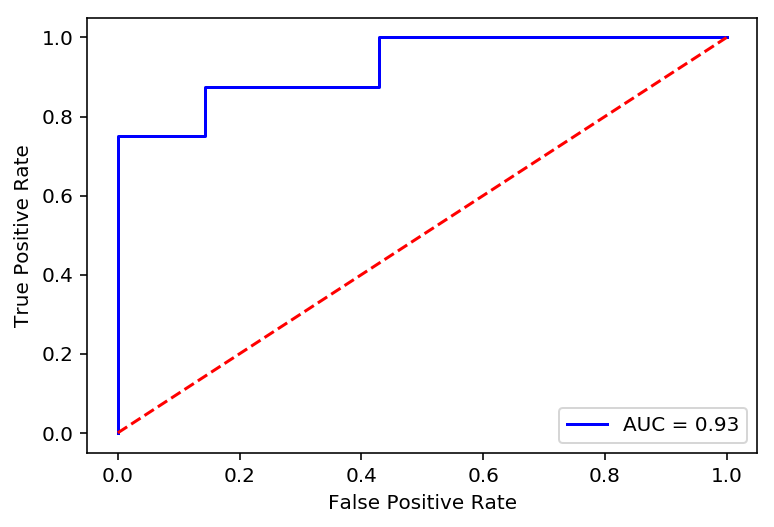

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 25    0.209653
Name: 9, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 31
Similar playlist contains 35 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Techno Electro - Fourre tout
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 38    0.222328
Name: 25, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.6231060606060607 Threshold of 0.9 Recall score of 0.375
Sample number 2 AUC of 0.5887931034482758 Threshold of 0.9 Recall score of 0.4827586206896552
Sample number 3 AUC of 0.6546526867627783 Threshold of 0.9 Recall score of 0.3673469387755102
Sample number 4 AUC of 0.6204523107177975 Thresh

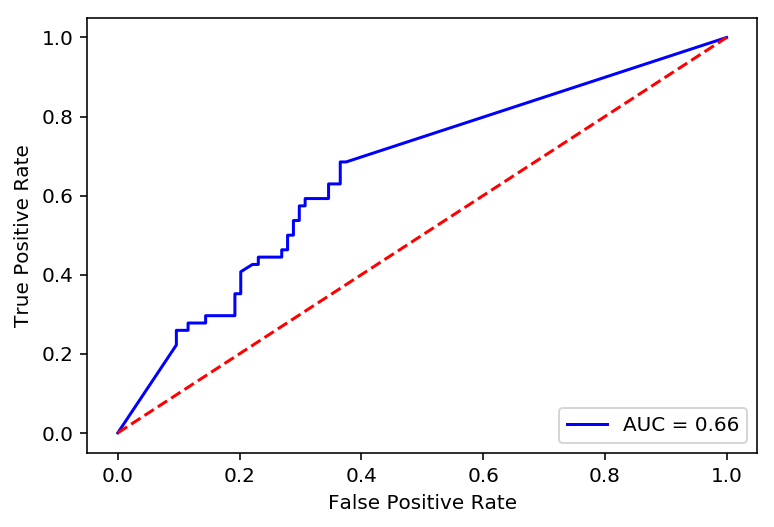

Found optimized model
Sample number 1 AUC of 0.5197829131652661 Threshold of 0.9 Recall score of 0.26785714285714285
Sample number 2 AUC of 0.5888793103448275 Threshold of 0.9 Recall score of 0.3275862068965517
Sample number 3 AUC of 0.509829619921363 Threshold of 0.9 Recall score of 0.2653061224489796
Sample number 4 AUC of 0.5903388878487174 Threshold of 0.9 Recall score of 0.40816326530612246
Sample number 5 AUC of 0.5643564356435643 Threshold of 0.9 Recall score of 0.3157894736842105
Sample number 6 AUC of 0.6238945578231293 Threshold of 0.9 Recall score of 0.36666666666666664
Sample number 7 AUC of 0.5636792452830189 Threshold of 0.9 Recall score of 0.3269230769230769
Sample number 8 AUC of 0.5762577228596646 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 9 AUC of 0.5816207184628237 Threshold of 0.9 Recall score of 0.31746031746031744
Sample number 10 AUC of 0.6040067403108033 Threshold of 0.8 Recall score of 0.3673469387755102
Sample number 11 AUC of 0.57875816

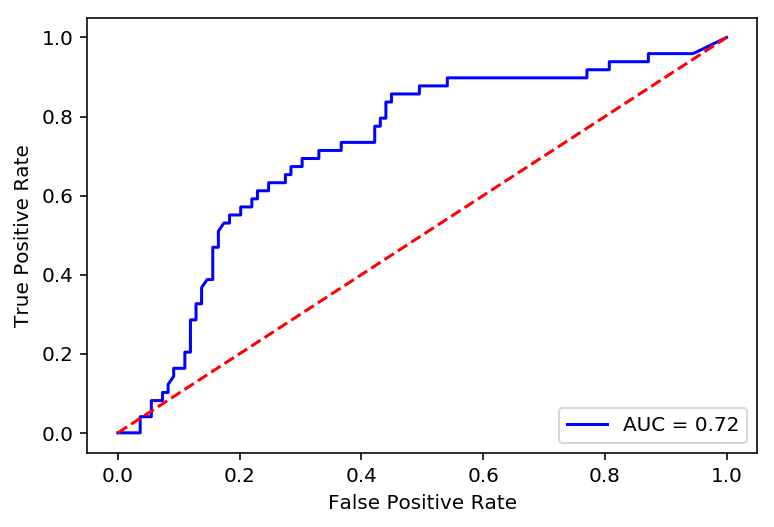

Found optimized model
Sample number 1 AUC of 0.555982025837858 Threshold of 0.9 Recall score of 0.3877551020408163
Sample number 2 AUC of 0.6677448337825697 Threshold of 0.9 Recall score of 0.39622641509433965
Sample number 3 AUC of 0.5992124636192433 Threshold of 0.9 Recall score of 0.3728813559322034
Sample number 4 AUC of 0.6100838897449066 Threshold of 0.9 Recall score of 0.3728813559322034
Sample number 5 AUC of 0.4943027210884353 Threshold of 0.9 Recall score of 0.3
Sample number 6 AUC of 0.5859152421652423 Threshold of 0.9 Recall score of 0.35185185185185186
Sample number 7 AUC of 0.6706896551724137 Threshold of 0.9 Recall score of 0.3275862068965517
Sample number 8 AUC of 0.5703442188879082 Threshold of 0.9 Recall score of 0.3090909090909091
Sample number 9 AUC of 0.618387262455059 Threshold of 0.9 Recall score of 0.3389830508474576
Sample number 10 AUC of 0.5504587155963303 Threshold of 0.8 Recall score of 0.40816326530612246
Sample number 11 AUC of 0.6619946091644204 Threshol

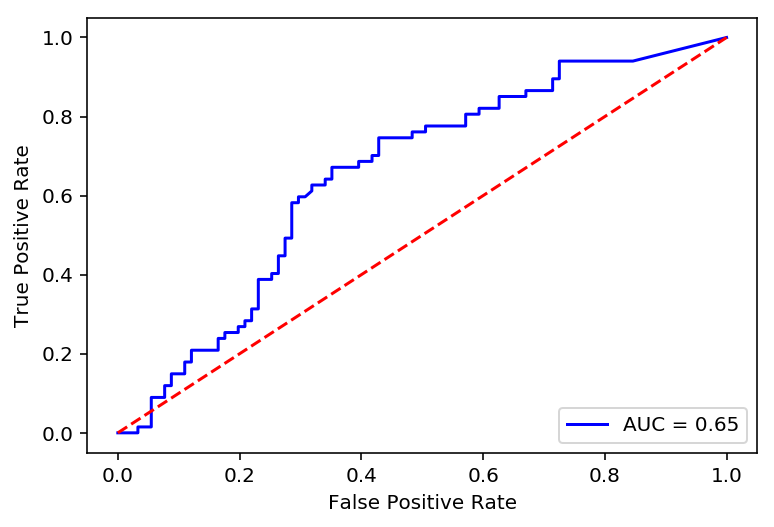

Found optimized model
Sample number 1 AUC of 0.6578703703703704 Threshold of 0.9 Recall score of 0.44
Sample number 2 AUC of 0.46509070918086864 Threshold of 0.9 Recall score of 0.27450980392156865
Sample number 3 AUC of 0.5239477503628447 Threshold of 0.9 Recall score of 0.28846153846153844
Sample number 4 AUC of 0.5421006178287732 Threshold of 0.9 Recall score of 0.34545454545454546
Sample number 5 AUC of 0.5657873310535744 Threshold of 0.9 Recall score of 0.18840579710144928
Sample number 6 AUC of 0.5514204545454546 Threshold of 0.9 Recall score of 0.2708333333333333
Sample number 7 AUC of 0.5304510666015307 Threshold of 0.9 Recall score of 0.2463768115942029
Sample number 8 AUC of 0.6231060606060607 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 9 AUC of 0.574932614555256 Threshold of 0.9 Recall score of 0.32075471698113206
Sample number 10 AUC of 0.6256232193732194 Threshold of 0.8 Recall score of 0.4074074074074074
Sample number 11 AUC of 0.6684472934472935 Thr

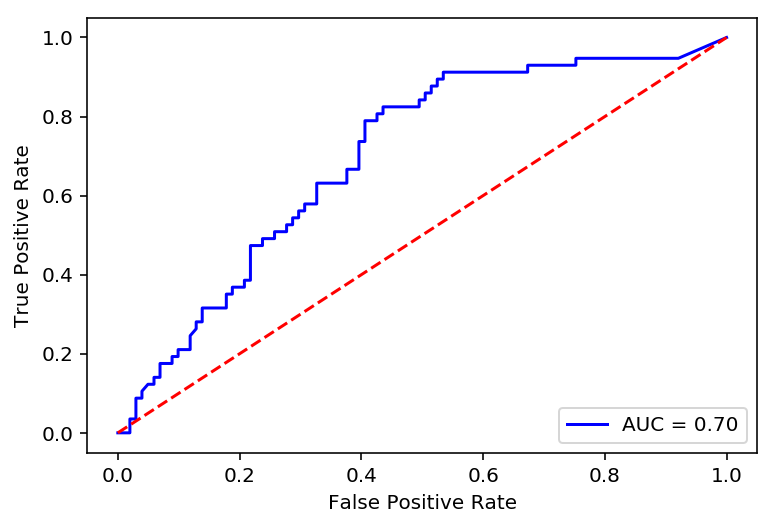

Found optimized model
Sample number 1 AUC of 0.6099531005732153 Threshold of 0.9 Recall score of 0.2631578947368421
Sample number 2 AUC of 0.688169868554095 Threshold of 0.9 Recall score of 0.5116279069767442
Sample number 3 AUC of 0.704766107678729 Threshold of 0.9 Recall score of 0.5272727272727272
Sample number 4 AUC of 0.5735185185185185 Threshold of 0.9 Recall score of 0.38
Sample number 5 AUC of 0.5312446498887177 Threshold of 0.9 Recall score of 0.423728813559322
Sample number 6 AUC of 0.5692618806875631 Threshold of 0.9 Recall score of 0.46511627906976744
Sample number 7 AUC of 0.5727272727272726 Threshold of 0.9 Recall score of 0.38181818181818183
Sample number 8 AUC of 0.7222423802612482 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 9 AUC of 0.5832899079381623 Threshold of 0.9 Recall score of 0.3684210526315789
Sample number 10 AUC of 0.7121128825361921 Threshold of 0.8 Recall score of 0.43137254901960786
Sample number 11 AUC of 0.6372222222222222 Threshol

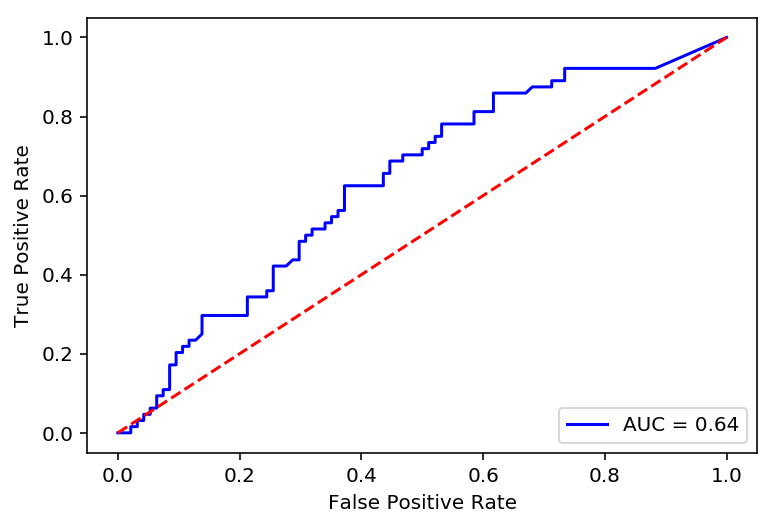

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 38    0.222328
Name: 25, dtype: float64
---Run CBF model---
Classifying new songs
No song recommended
---Run CF model---
Most similar playlist number 2
Most similar playlists: 38    0.222328
9     0.209653
Name: 25, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
0 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 38    0.222328
9     0.209653
43    0.200914
Name: 25, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 6 potentially recommendable songs
6 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 4
Most similar playlists: 38    0.222328
9 

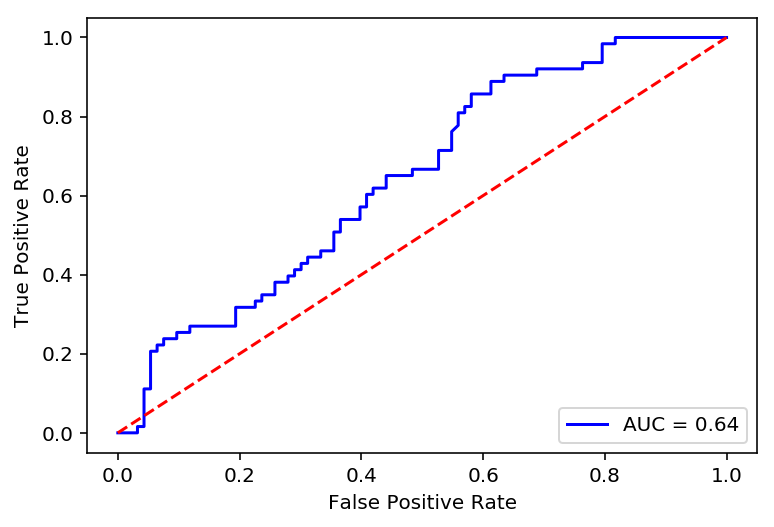

Found optimized model
Sample number 1 AUC of 0.6763615069295336 Threshold of 0.9 Recall score of 0.3829787234042553
Sample number 2 AUC of 0.6285133136094674 Threshold of 0.9 Recall score of 0.34615384615384615
Sample number 3 AUC of 0.6128851540616247 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 4 AUC of 0.6018728133360773 Threshold of 0.9 Recall score of 0.32558139534883723
Sample number 5 AUC of 0.6338338338338338 Threshold of 0.9 Recall score of 0.28888888888888886
Sample number 6 AUC of 0.620161857846587 Threshold of 0.9 Recall score of 0.29310344827586204
Sample number 7 AUC of 0.6471256334090513 Threshold of 0.9 Recall score of 0.288135593220339
Sample number 8 AUC of 0.5951794510907812 Threshold of 0.9 Recall score of 0.3103448275862069
Sample number 9 AUC of 0.6167857142857143 Threshold of 0.9 Recall score of 0.375
Sample number 10 AUC of 0.6333333333333333 Threshold of 0.8 Recall score of 0.3111111111111111
Sample number 11 AUC of 0.6722641509433962 Thres

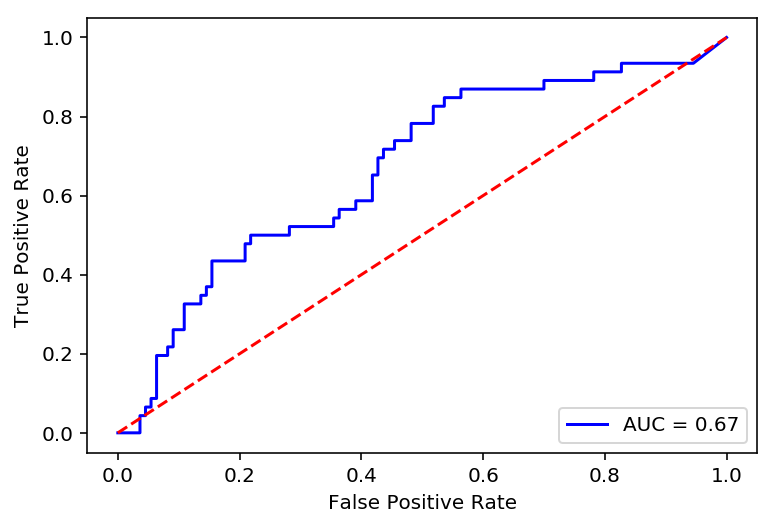

Found optimized model
Sample number 1 AUC of 0.6267942583732057 Threshold of 0.9 Recall score of 0.2807017543859649
Sample number 2 AUC of 0.6536612426035503 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 3 AUC of 0.7217085798816567 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.68641421042358 Threshold of 0.9 Recall score of 0.40425531914893614
Sample number 5 AUC of 0.6948983297022513 Threshold of 0.9 Recall score of 0.48148148148148145
Sample number 6 AUC of 0.572320905719305 Threshold of 0.9 Recall score of 0.3191489361702128
Sample number 7 AUC of 0.6283757716049383 Threshold of 0.9 Recall score of 0.2708333333333333
Sample number 8 AUC of 0.5718100324241847 Threshold of 0.9 Recall score of 0.30612244897959184
Sample number 9 AUC of 0.5926811979443558 Threshold of 0.9 Recall score of 0.2982456140350877
Sample number 10 AUC of 0.6813258636788049 Threshold of 0.8 Recall score of 0.39215686274509803
Sample number 11 AUC of 0.6658221212650708 Threshol

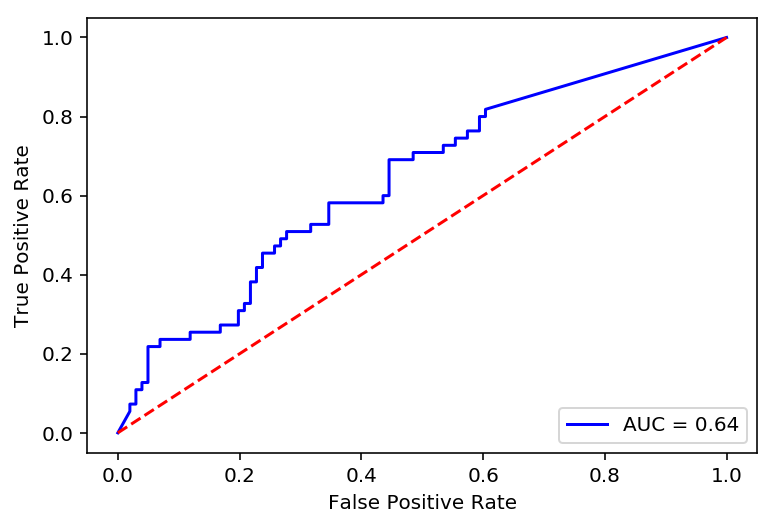

Found optimized model
Sample number 1 AUC of 0.5936558568137515 Threshold of 0.9 Recall score of 0.2982456140350877
Sample number 2 AUC of 0.6806191610185016 Threshold of 0.9 Recall score of 0.4339622641509434
Sample number 3 AUC of 0.669561157796452 Threshold of 0.9 Recall score of 0.39215686274509803
Sample number 4 AUC of 0.5441448857789669 Threshold of 0.9 Recall score of 0.20930232558139536
Sample number 5 AUC of 0.6449056603773585 Threshold of 0.9 Recall score of 0.58
Sample number 6 AUC of 0.6384350036310821 Threshold of 0.9 Recall score of 0.37037037037037035
Sample number 7 AUC of 0.6680555555555556 Threshold of 0.9 Recall score of 0.43333333333333335
Sample number 8 AUC of 0.595949594959496 Threshold of 0.9 Recall score of 0.3090909090909091
Sample number 9 AUC of 0.6319811320754717 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.7090595340811044 Threshold of 0.8 Recall score of 0.3114754098360656
Sample number 11 AUC of 0.6298270138039491 Threshold of 0.8 Reca

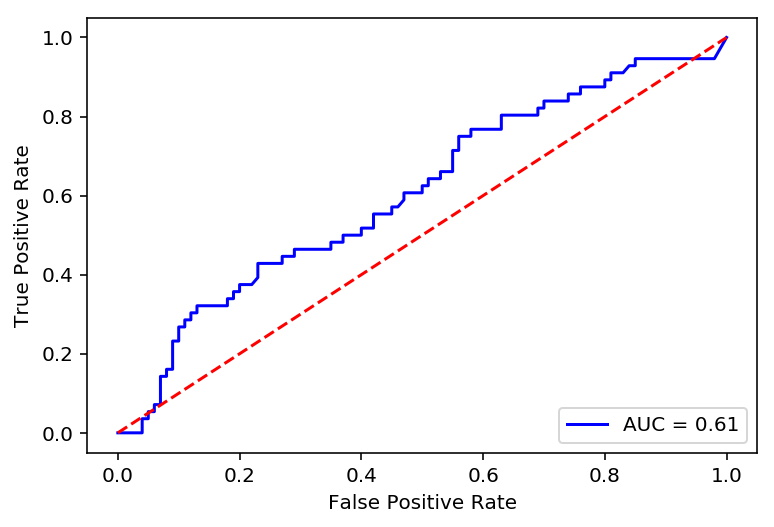

Found optimized model
Sample number 1 AUC of 0.6438577586206895 Threshold of 0.9 Recall score of 0.325
Sample number 2 AUC of 0.5814192343604109 Threshold of 0.9 Recall score of 0.35294117647058826
Sample number 3 AUC of 0.7554621848739497 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 4 AUC of 0.5958498023715415 Threshold of 0.9 Recall score of 0.34782608695652173
Sample number 5 AUC of 0.6521815622800845 Threshold of 0.9 Recall score of 0.39655172413793105
Sample number 6 AUC of 0.6365612648221343 Threshold of 0.9 Recall score of 0.41304347826086957
Sample number 7 AUC of 0.6442307692307692 Threshold of 0.9 Recall score of 0.3269230769230769
Sample number 8 AUC of 0.609896544993168 Threshold of 0.9 Recall score of 0.425531914893617
Sample number 9 AUC of 0.5864707952146376 Threshold of 0.9 Recall score of 0.3620689655172414
Sample number 10 AUC of 0.6615264493460862 Threshold of 0.8 Recall score of 0.3191489361702128
Sample number 11 AUC of 0.6488715277777777 Thre

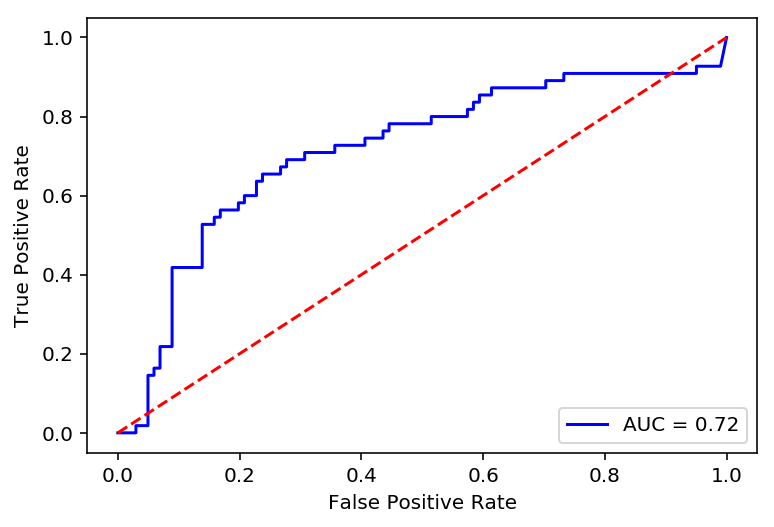

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 3    0.159962
Name: 4, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 2 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 3     0.159962
14    0.075945
Name: 4, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 1 potentially recommendable songs
3 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 3     0.159962
14    0.075945
16    0.075321
Name: 4, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
3 recommended

In [167]:
auc_recommendation_dict = create_recommendation_lists(user_playlist_dict, 'auc')

In [168]:
auc_recommendation_dict

{'user': [{'name': 'Rayane Nt',
   'playlist': '❤️',
   'recommendations': {'recommended_songs': ['Tim Tama - Tension III',
     'Tim Tama - The Wars Of The Roses',
     'Mandragora - Special Treatment',
     'Myd - Bingo',
     'ANNA - Artha',
     'Ross from Friends - Romeo, Romeo',
     'Kenneth Bager - Drums Of Steel',
     'Adana Twins - C3PO',
     'Cutoff:Sky - Celebration of Death',
     'T78 - Spikor',
     'Kaiserdisco - Styx',
     'Kurt Leon - Treibjagd - T78 Remix',
     'Kazy Lambist - Shutdown',
     'Marcel Dettmann - Dawning',
     'iO (Mulen) - Airflow',
     'Stream - Greece 2000 - Radio Edit',
     'I Hate Models - Heartbreaker',
     'The Blaze - Territory',
     'Diplo - Wish (feat. Trippie Redd)',
     'Tame Impala - Lost In Yesterday',
     'Kill The Noise - I Do Coke',
     'Asquith - Time & Space',
     'Legowelt - Its Midnite & You Are Lost',
     'David Vunk - Troubles Tonight',
     'Boris Brejcha - Purple Noise'],
    'AUC': 0.6399646330680813,
    'recall

These are the results if we take recall as our scoring metric

Recommending songs based on playlist ❤️
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 21    0.095127
Name: 30, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.5858490566037735 Threshold of 0.9 Recall score of 0.4339622641509434
Sample number 2 AUC of 0.6054905239687848 Threshold of 0.9 Recall score of 0.33653846153846156
Sample number 3 AUC of 0.6544946526640332 Threshold of 0.9 Recall score of 0.36082474226804123
Sample number 4 AUC of 0.6389317830865655 Threshold of 0.9 Recall score of 0.3119266055045872
Sample number 5 AUC of 0.6458989845938375 Threshold of 0.9 Recall score of 0.3949579831932773
Sample number 6 AUC of 0.5944059177068886 Threshold of 0.9 Recall score of 0.4
Sample number 7 AUC of 0.5976373680576108 Threshold of 0.9 Recall score of 0.3978494623655914
Sample number 8 AUC of 0.6466944059177069 Threshold of 0.9 Recall score of 0.3904761904761905
Sample number 9 AUC of 0.5995839

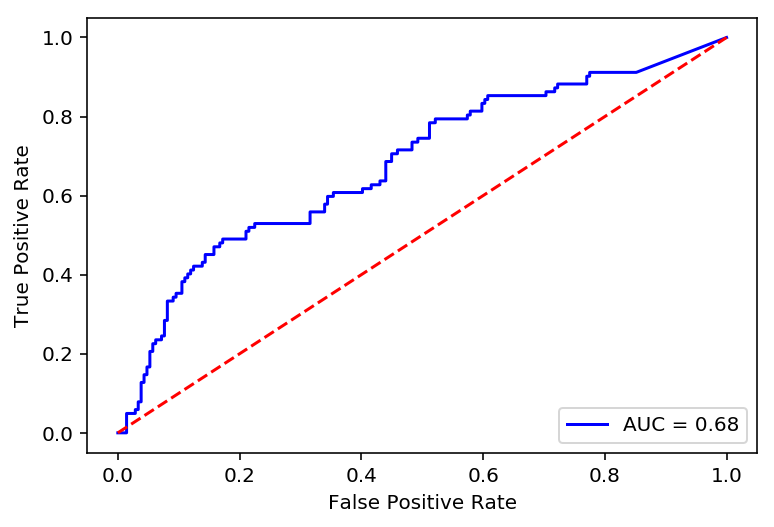

Found optimized model
Sample number 1 AUC of 0.6084474885844748 Threshold of 0.9 Recall score of 0.40217391304347827
Sample number 2 AUC of 0.5512162162162162 Threshold of 0.9 Recall score of 0.25225225225225223
Sample number 3 AUC of 0.6099717114568601 Threshold of 0.9 Recall score of 0.25742574257425743
Sample number 4 AUC of 0.610981308411215 Threshold of 0.9 Recall score of 0.18691588785046728
Sample number 5 AUC of 0.6107493540051679 Threshold of 0.9 Recall score of 0.32558139534883723
Sample number 6 AUC of 0.6328502415458938 Threshold of 0.9 Recall score of 0.22115384615384615
Sample number 7 AUC of 0.5800504107542943 Threshold of 0.9 Recall score of 0.27184466019417475
Sample number 8 AUC of 0.6235367892976589 Threshold of 0.9 Recall score of 0.4230769230769231
Sample number 9 AUC of 0.567132701421801 Threshold of 0.9 Recall score of 0.26
Sample number 10 AUC of 0.6073485693050911 Threshold of 0.8 Recall score of 0.2403846153846154
Sample number 11 AUC of 0.617944841487997 Thre

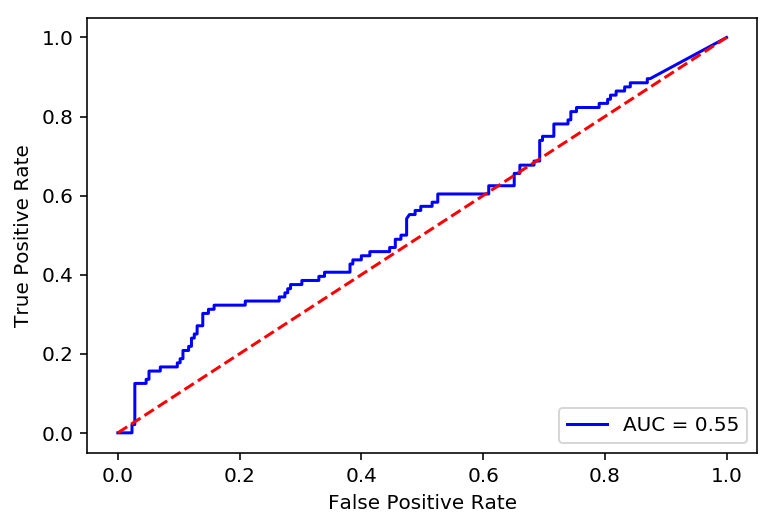

Found optimized model
Sample number 1 AUC of 0.6303804294538681 Threshold of 0.9 Recall score of 0.2978723404255319
Sample number 2 AUC of 0.5958056872037915 Threshold of 0.9 Recall score of 0.25
Sample number 3 AUC of 0.606298837430913 Threshold of 0.9 Recall score of 0.30303030303030304
Sample number 4 AUC of 0.5986125831004914 Threshold of 0.9 Recall score of 0.41237113402061853
Sample number 5 AUC of 0.5189632170764247 Threshold of 0.9 Recall score of 0.24242424242424243
Sample number 6 AUC of 0.5903067301965456 Threshold of 0.9 Recall score of 0.31521739130434784
Sample number 7 AUC of 0.6349806201550388 Threshold of 0.9 Recall score of 0.2916666666666667
Sample number 8 AUC of 0.6022840343735866 Threshold of 0.9 Recall score of 0.24545454545454545
Sample number 9 AUC of 0.5599401748734468 Threshold of 0.9 Recall score of 0.36792452830188677
Sample number 10 AUC of 0.4786306460834763 Threshold of 0.8 Recall score of 0.20202020202020202
Sample number 11 AUC of 0.6396384361920029 Th

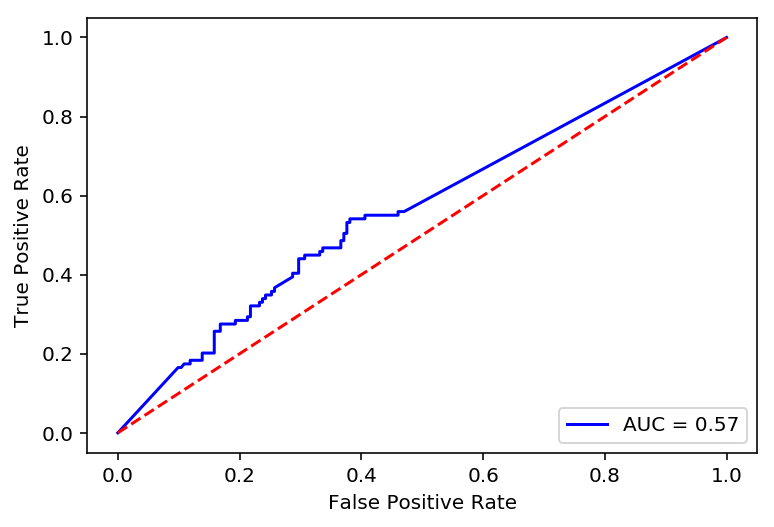

Found optimized model
Sample number 1 AUC of 0.5205043072505384 Threshold of 0.9 Recall score of 0.375
Sample number 2 AUC of 0.6337576614804339 Threshold of 0.9 Recall score of 0.33663366336633666
Sample number 3 AUC of 0.5827109783420463 Threshold of 0.9 Recall score of 0.23300970873786409
Sample number 4 AUC of 0.6046411580119445 Threshold of 0.9 Recall score of 0.24719101123595505
Sample number 5 AUC of 0.610648102755172 Threshold of 0.9 Recall score of 0.1702127659574468
Sample number 6 AUC of 0.49068536130993234 Threshold of 0.9 Recall score of 0.22340425531914893
Sample number 7 AUC of 0.591593992248062 Threshold of 0.9 Recall score of 0.3229166666666667
Sample number 8 AUC of 0.5491216216216216 Threshold of 0.9 Recall score of 0.2072072072072072
Sample number 9 AUC of 0.6054976303317535 Threshold of 0.9 Recall score of 0.26
Sample number 10 AUC of 0.5800027250431465 Threshold of 0.8 Recall score of 0.1926605504587156
Sample number 11 AUC of 0.5706626783248965 Threshold of 0.8 R

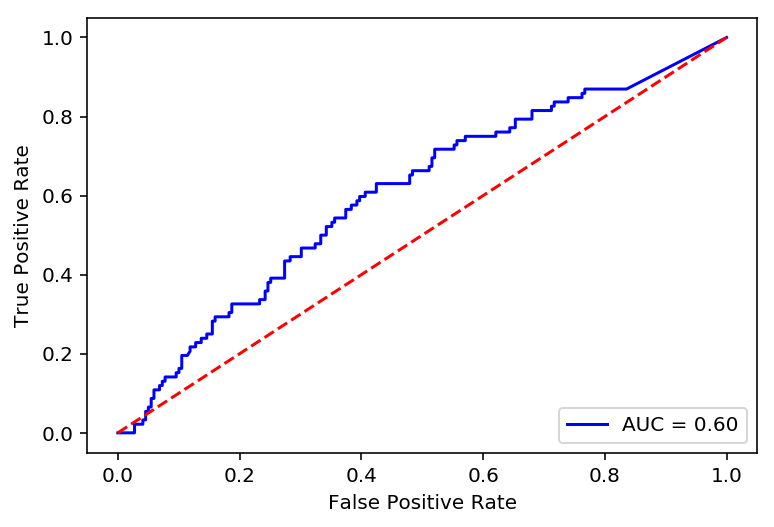

Found optimized model
Sample number 1 AUC of 0.6129741616272677 Threshold of 0.9 Recall score of 0.18691588785046728
Sample number 2 AUC of 0.4817679301374954 Threshold of 0.9 Recall score of 0.08653846153846154
Sample number 3 AUC of 0.5658887317303158 Threshold of 0.9 Recall score of 0.18811881188118812
Sample number 4 AUC of 0.6183293108071869 Threshold of 0.9 Recall score of 0.26548672566371684
Sample number 5 AUC of 0.5251658767772511 Threshold of 0.9 Recall score of 0.13
Sample number 6 AUC of 0.5553828828828828 Threshold of 0.9 Recall score of 0.27927927927927926
Sample number 7 AUC of 0.4826968411126827 Threshold of 0.9 Recall score of 0.1188118811881188
Sample number 8 AUC of 0.5337221775274873 Threshold of 0.9 Recall score of 0.21238938053097345
Sample number 9 AUC of 0.524048505768008 Threshold of 0.9 Recall score of 0.23853211009174313
Sample number 10 AUC of 0.5356609410007468 Threshold of 0.8 Recall score of 0.14563106796116504
Sample number 11 AUC of 0.5376216001588248 T

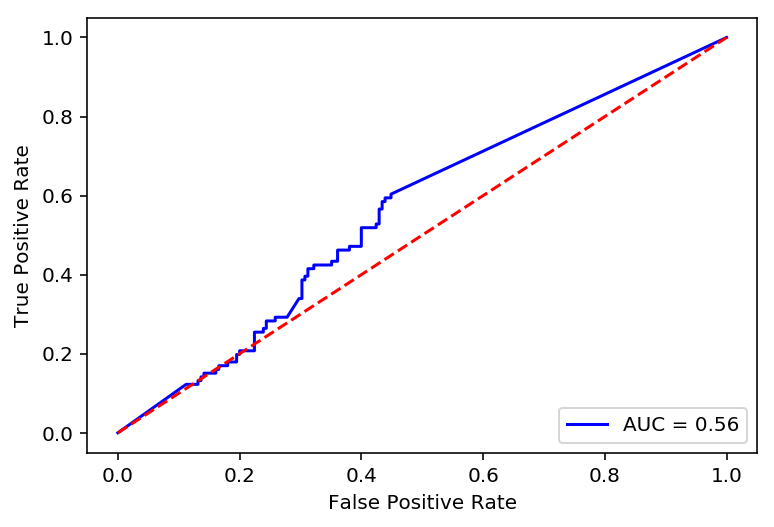

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 21    0.095127
Name: 30, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 2
Similar playlist contains 2 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 21    0.095127
4     0.062793
Name: 30, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 21    0.095127
4     0.062793
17    0.057990
Name: 30, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 2
Similar playlist contains 2 potentially recommendable songs
4 recomme

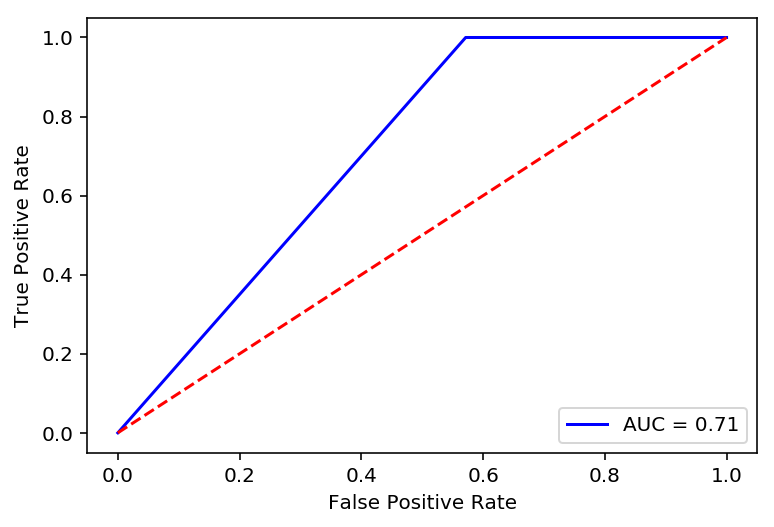

Found optimized model
Sample number 1 AUC of 0.5833333333333334 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.4666666666666666 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.6 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 4 AUC of 0.8666666666666667 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 5 AUC of 0.875 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.6666666666666666 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 7 AUC of 0.875 Threshold of 0.9 Recall score of 1.0


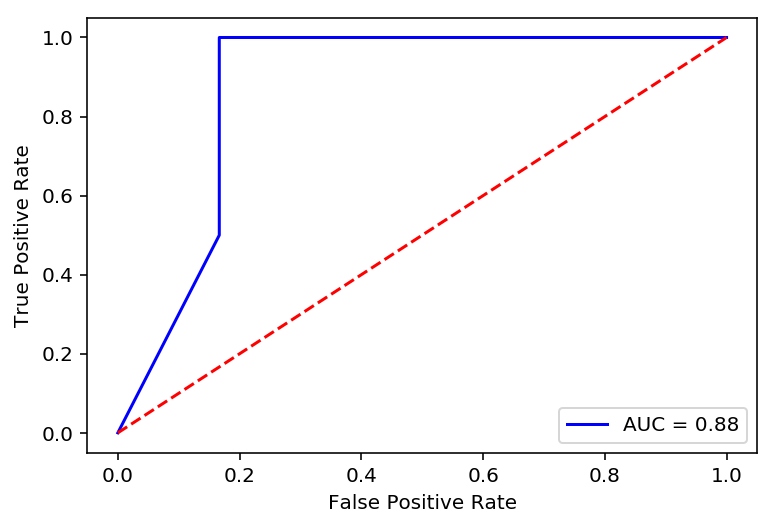

Found optimized model
Sample number 1 AUC of 0.5333333333333334 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.5333333333333333 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.8 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.875 Threshold of 0.9 Recall score of 0.25
Sample number 5 AUC of 0.75 Threshold of 0.9 Recall score of 1.0


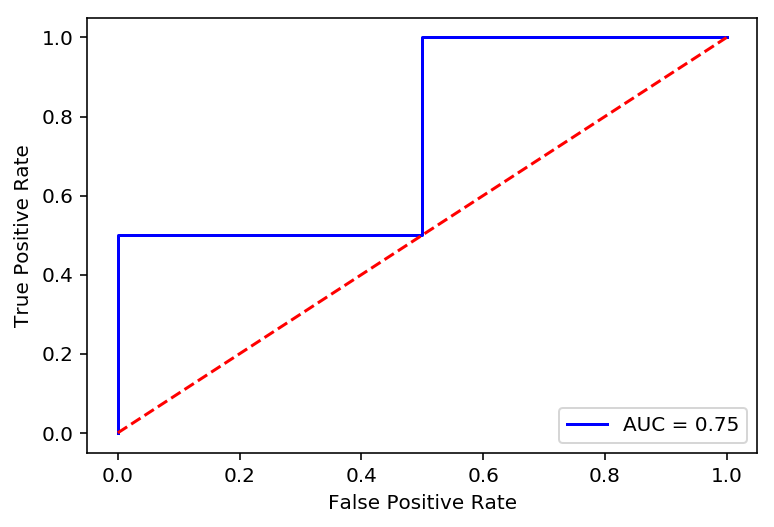

Found optimized model
Sample number 1 AUC of 0.9375 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


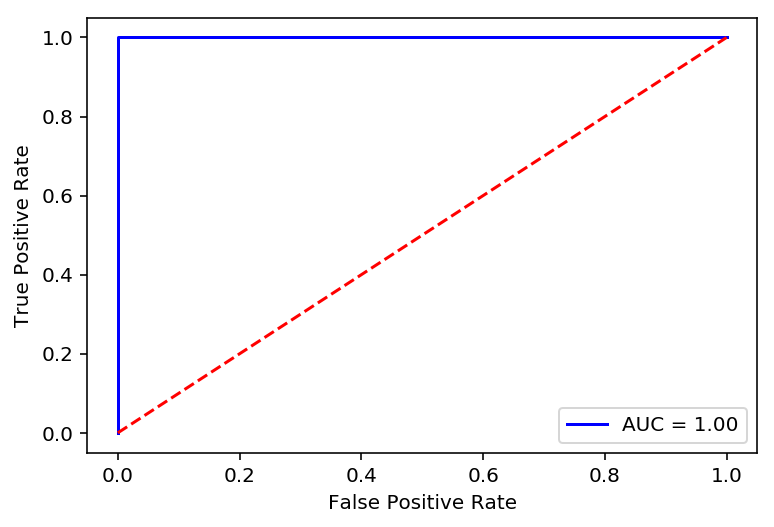

Found optimized model
Sample number 1 AUC of 0.375 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 0.625 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.9285714285714285 Threshold of 0.9 Recall score of 1.0


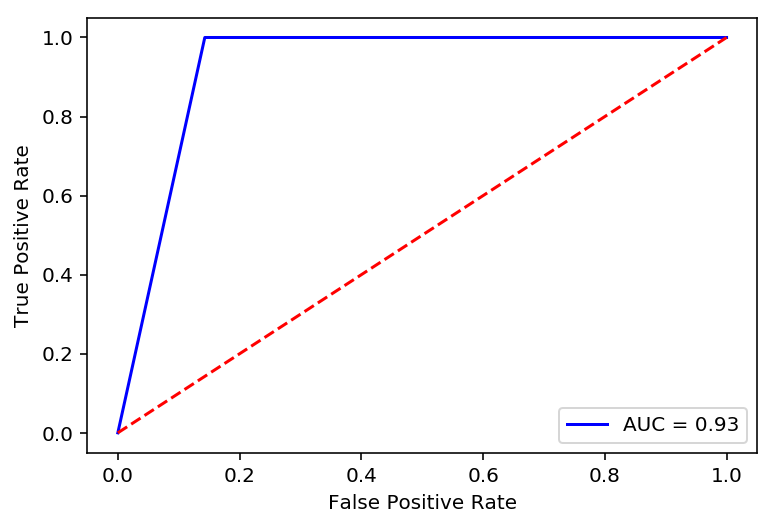

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 17    0.084667
Name: 31, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 38
Similar playlist contains 38 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Off After All
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 3    0.275445
Name: 14, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.6210526315789474 Threshold of 0.9 Recall score of 0.47368421052631576
Sample number 2 AUC of 0.6912878787878789 Threshold of 0.9 Recall score of 0.375
Sample number 3 AUC of 0.7156862745098039 Threshold of 0.9 Recall score of 0.5333333333333333
Sample number 4 AUC of 0.7186274509803922 Threshold of 0.9 Rec

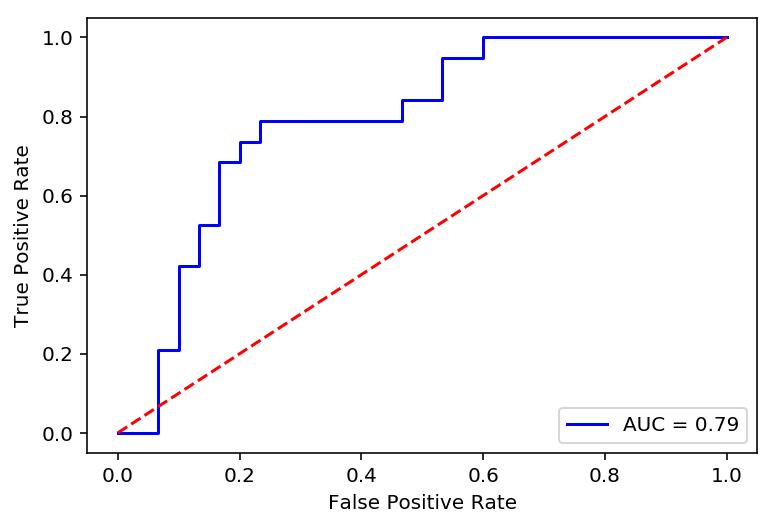

Found optimized model
Sample number 1 AUC of 0.670940170940171 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 2 AUC of 0.6950757575757576 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.7379310344827587 Threshold of 0.9 Recall score of 0.65
Sample number 4 AUC of 0.6801801801801801 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 5 AUC of 0.6966911764705882 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 6 AUC of 0.8040540540540541 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.7 Threshold of 0.9 Recall score of 0.47368421052631576
Sample number 8 AUC of 0.7708333333333333 Threshold of 0.9 Recall score of 0.5625
Sample number 9 AUC of 0.673469387755102 Threshold of 0.9 Recall score of 0.5
Sample number 10 AUC of 0.7472222222222222 Threshold of 0.8 Recall score of 0.4444444444444444
Sample number 11 AUC of 0.7859848484848485 Threshold of 0.8 Recall score of 0.625
Sample number 12 AUC of 0.799242424242424

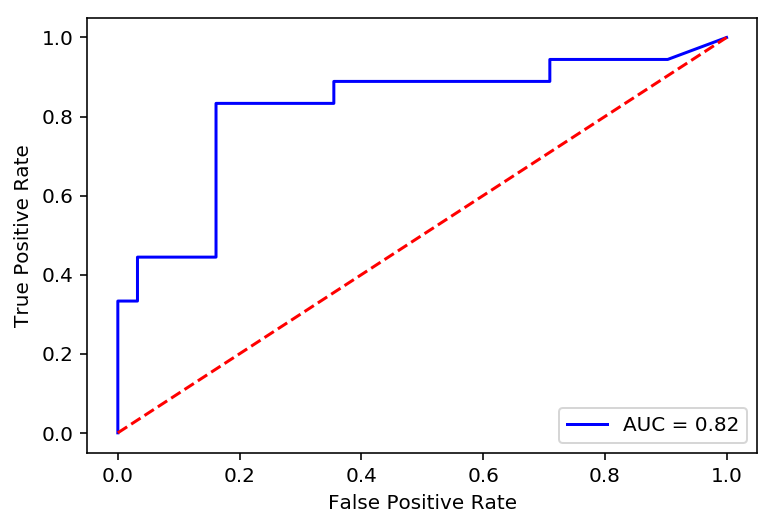

Found optimized model
Sample number 1 AUC of 0.5490196078431373 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.6982758620689655 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.6531531531531531 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.7840073529411764 Threshold of 0.9 Recall score of 0.35294117647058826
Sample number 5 AUC of 0.7086397058823529 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 6 AUC of 0.7012867647058822 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 7 AUC of 0.7150735294117647 Threshold of 0.9 Recall score of 0.47058823529411764
Sample number 8 AUC of 0.7925170068027211 Threshold of 0.9 Recall score of 0.47619047619047616
Sample number 9 AUC of 0.8066239316239316 Threshold of 0.9 Recall score of 0.7692307692307693
Sample number 10 AUC of 0.7346938775510203 Threshold of 0.8 Recall score of 0.5714285714285714
Sample number 11 AUC of 0.6807017543859648 Threshold of 0.8 Re

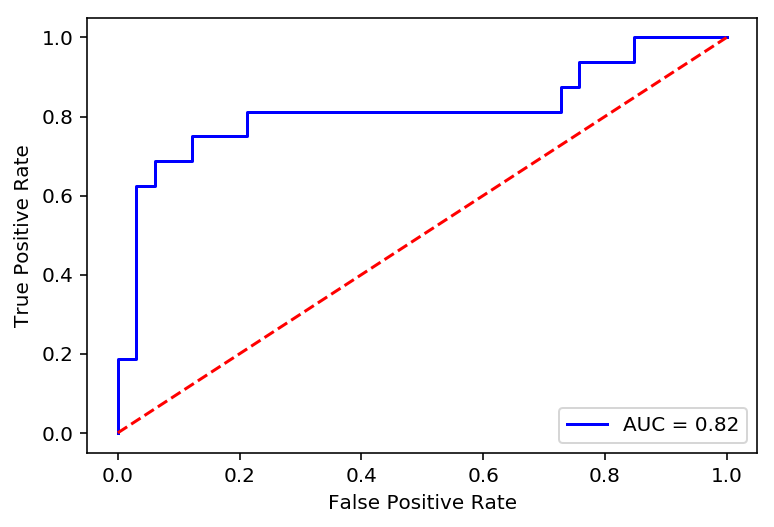

Found optimized model
Sample number 1 AUC of 0.789795918367347 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.7316176470588235 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 3 AUC of 0.6596491228070175 Threshold of 0.9 Recall score of 0.42105263157894735
Sample number 4 AUC of 0.6974137931034482 Threshold of 0.9 Recall score of 0.2
Sample number 5 AUC of 0.8198198198198198 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 6 AUC of 0.8373161764705883 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 7 AUC of 0.865530303030303 Threshold of 0.9 Recall score of 0.625
Sample number 8 AUC of 0.586734693877551 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.7462121212121212 Threshold of 0.9 Recall score of 0.3125
Sample number 10 AUC of 0.6514336917562724 Threshold of 0.8 Recall score of 0.3888888888888889
Sample number 11 AUC of 0.7979591836734693 Threshold of 0.8 Recall score of 0.5
Sample number 

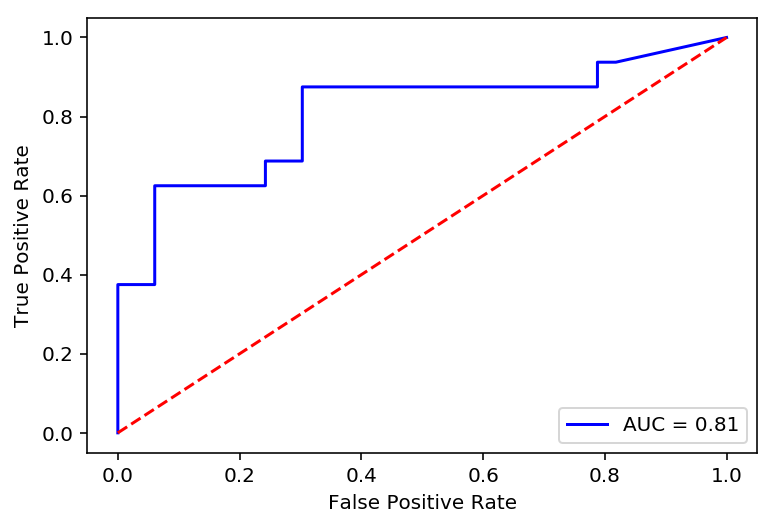

Found optimized model
Sample number 1 AUC of 0.7017543859649122 Threshold of 0.9 Recall score of 0.47368421052631576
Sample number 2 AUC of 0.6415441176470589 Threshold of 0.9 Recall score of 0.35294117647058826
Sample number 3 AUC of 0.6102941176470589 Threshold of 0.9 Recall score of 0.29411764705882354
Sample number 4 AUC of 0.7824561403508772 Threshold of 0.9 Recall score of 0.3157894736842105
Sample number 5 AUC of 0.7992424242424243 Threshold of 0.9 Recall score of 0.625
Sample number 6 AUC of 0.7183673469387755 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.7827586206896552 Threshold of 0.9 Recall score of 0.6
Sample number 8 AUC of 0.7039215686274509 Threshold of 0.9 Recall score of 0.4666666666666667
Sample number 9 AUC of 0.7470588235294118 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.7108333333333334 Threshold of 0.8 Recall score of 0.5416666666666666
Sample number 11 AUC of 0.5634469696969697 Threshold of 0.8 Recall score of 0.375
Sample num

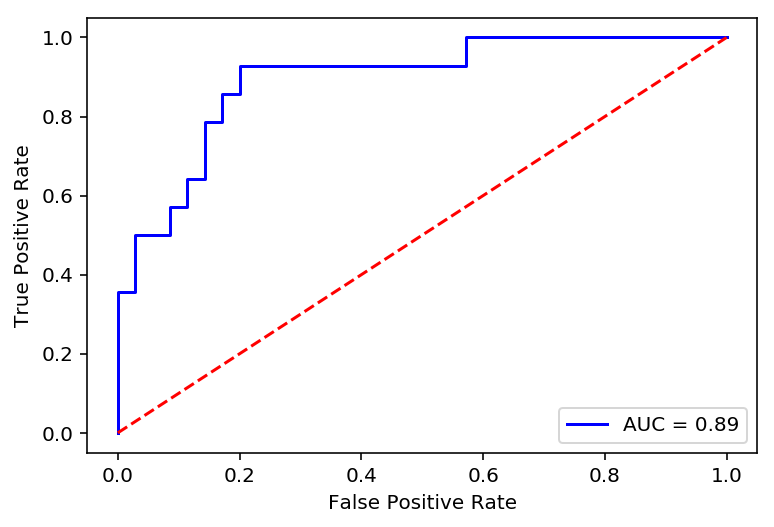

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 3    0.275445
Name: 14, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 8
Similar playlist contains 8 potentially recommendable songs
8 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 3    0.275445
5    0.117851
Name: 14, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
9 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 3     0.275445
5     0.117851
16    0.089791
Name: 14, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 3
Similar playlist contains 3 potentially recommendable songs
12 recommend

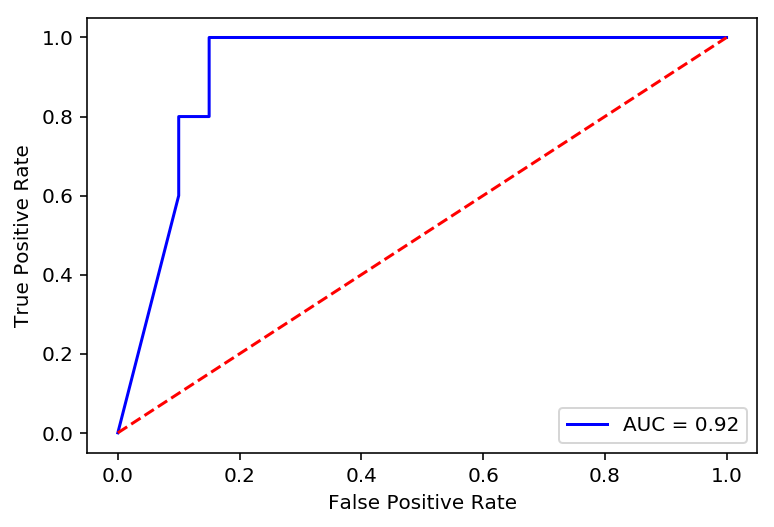

Found optimized model
Sample number 1 AUC of 0.9140271493212668 Threshold of 0.9 Recall score of 0.8461538461538461
Sample number 2 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


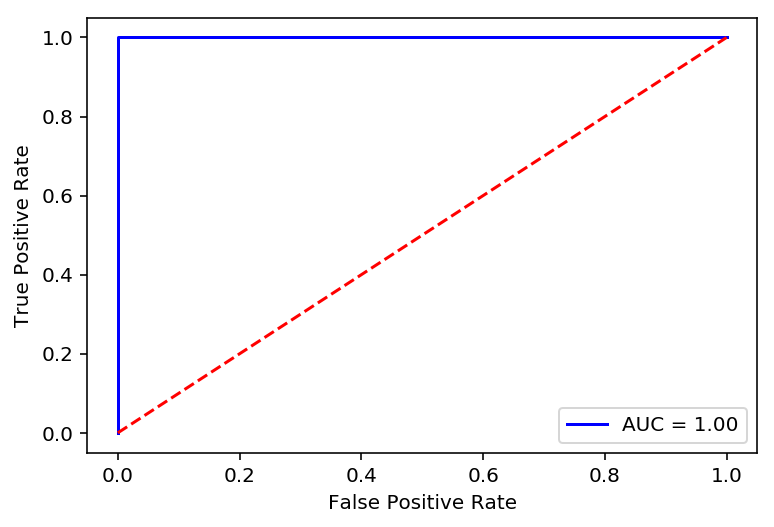

Found optimized model
Sample number 1 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


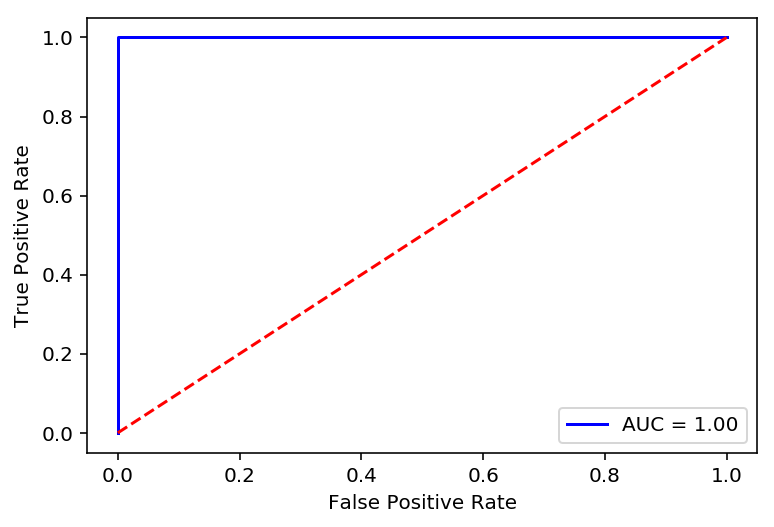

Found optimized model
Sample number 1 AUC of 0.9952153110047847 Threshold of 0.9 Recall score of 1.0


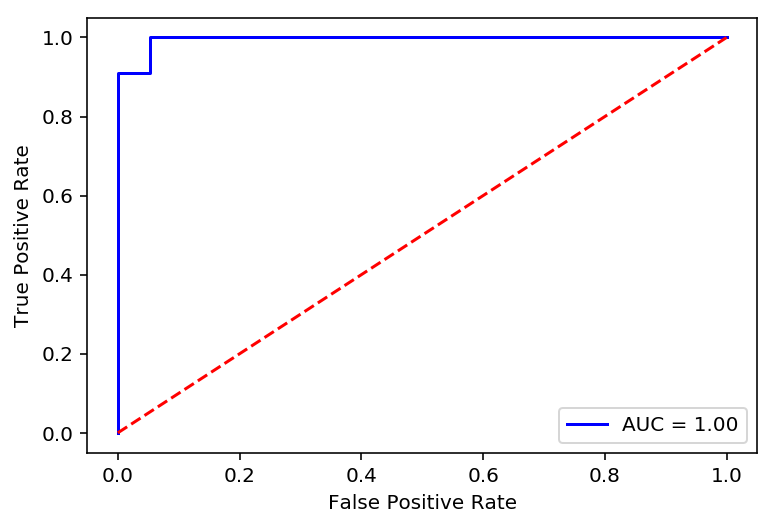

Found optimized model
Sample number 1 AUC of 0.9955357142857143 Threshold of 0.9 Recall score of 0.9285714285714286


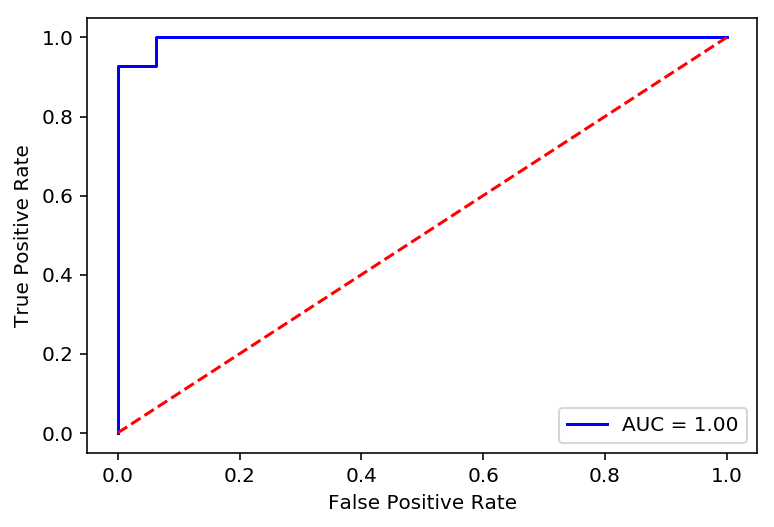

Found optimized model
Classifying on 4 features
Classifying new songs
Number of potentially recommended songs 192
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Dar 🏚️
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 49    0.662122
Name: 15, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.6495726495726495 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 2 AUC of 0.5352941176470588 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.5803571428571428 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.4027777777777778 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.6666666666666666 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.5683760683760684 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 7 AUC of 0.6875 Threshold of 0.9 Recall sco

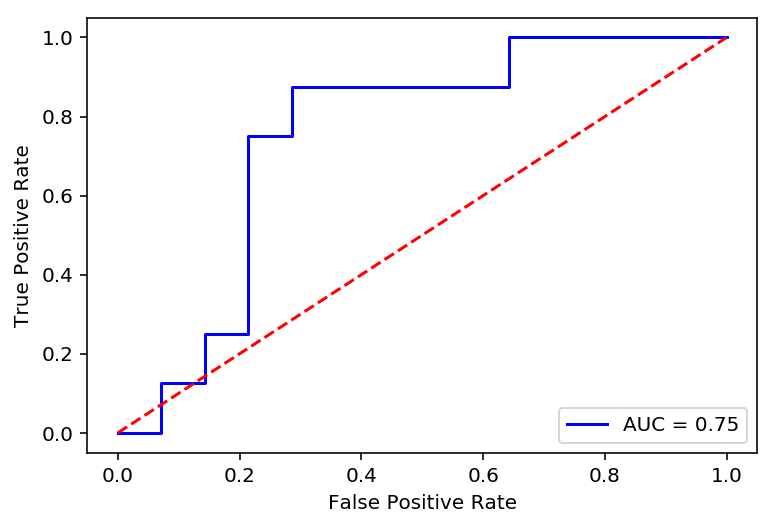

Found optimized model
Sample number 1 AUC of 0.8072916666666667 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 2 AUC of 0.6857142857142857 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 3 AUC of 0.5764705882352942 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.42708333333333337 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.8470588235294118 Threshold of 0.9 Recall score of 0.2
Sample number 6 AUC of 0.7523809523809524 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 7 AUC of 0.6785714285714286 Threshold of 0.9 Recall score of 0.75
Sample number 8 AUC of 0.6741071428571428 Threshold of 0.9 Recall score of 0.375
Sample number 9 AUC of 0.6041666666666666 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 10 AUC of 0.6822916666666666 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 11 AUC of 0.47058823529411764 Threshold of 0.8 Recall score of 0.4
Sample number 12 AUC of 0.

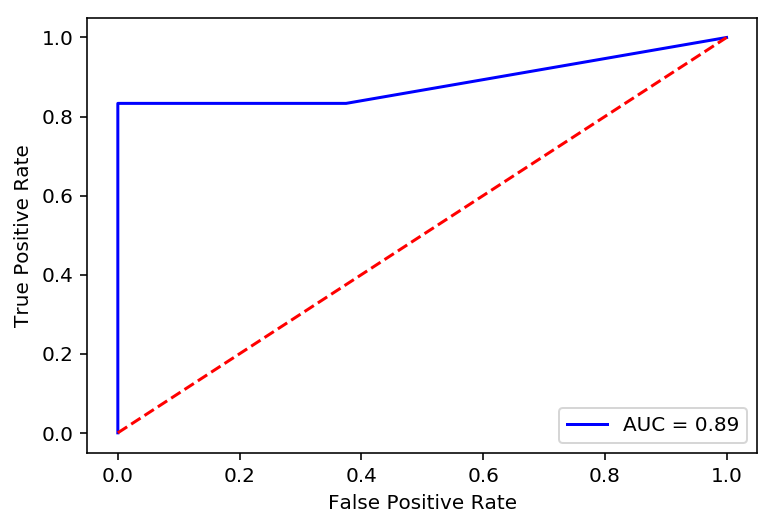

Found optimized model
Sample number 1 AUC of 0.5089285714285714 Threshold of 0.9 Recall score of 0.375
Sample number 2 AUC of 0.4176470588235294 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.78125 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 4 AUC of 0.5583333333333333 Threshold of 0.9 Recall score of 0.3
Sample number 5 AUC of 0.8 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.49999999999999994 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 7 AUC of 0.4583333333333333 Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.6614583333333333 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 9 AUC of 0.328125 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 10 AUC of 0.8162393162393162 Threshold of 0.8 Recall score of 0.6666666666666666
Sample number 11 AUC of 0.7053571428571428 Threshold of 0.8 Recall score of 0.375
Sample number 12 AUC of 0.7428571428571429 Threshold of 0.8 R

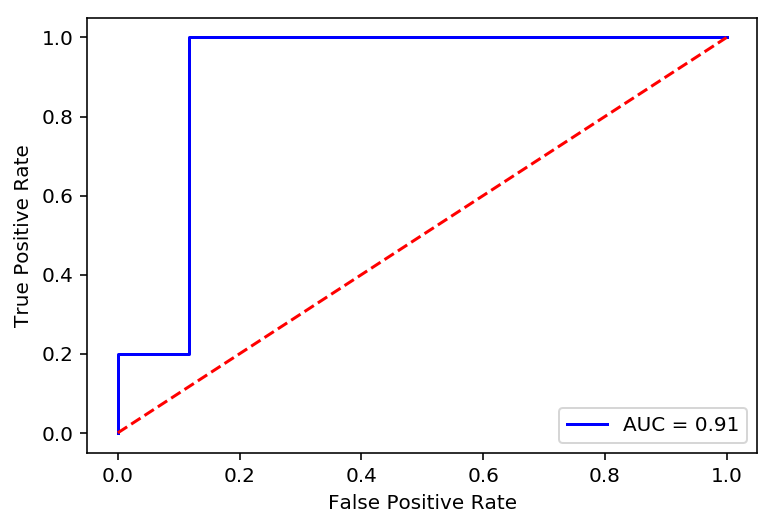

Found optimized model
Sample number 1 AUC of 0.6153846153846154 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.6339285714285714 Threshold of 0.9 Recall score of 0.125
Sample number 3 AUC of 0.5833333333333333 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.7529411764705882 Threshold of 0.9 Recall score of 0.4
Sample number 5 AUC of 0.5916666666666667 Threshold of 0.9 Recall score of 0.1
Sample number 6 AUC of 0.7142857142857143 Threshold of 0.9 Recall score of 0.35714285714285715
Sample number 7 AUC of 0.6473214285714286 Threshold of 0.9 Recall score of 0.25
Sample number 8 AUC of 0.788235294117647 Threshold of 0.9 Recall score of 0.6
Sample number 9 AUC of 0.47619047619047616 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 10 AUC of 0.5885416666666666 Threshold of 0.8 Recall score of 0.16666666666666666
Sample number 11 AUC of 0.5833333333333334 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 12 AUC of 0.7

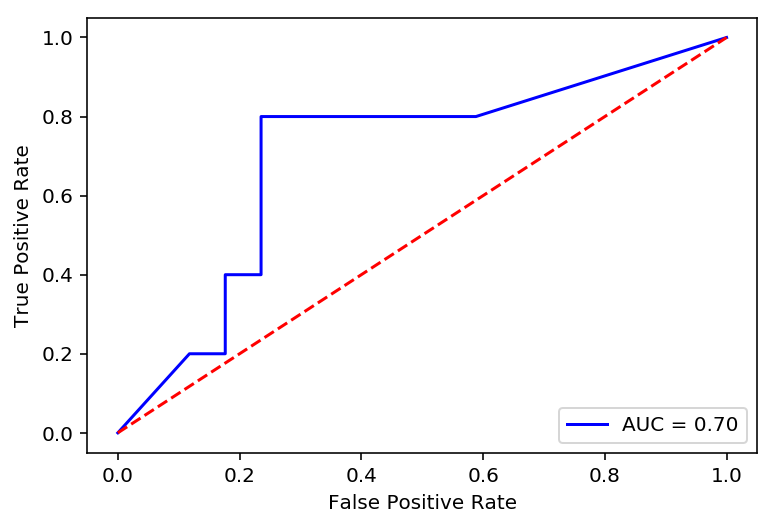

Found optimized model
Sample number 1 AUC of 0.5291666666666666 Threshold of 0.9 Recall score of 0.2
Sample number 2 AUC of 0.5416666666666667 Threshold of 0.9 Recall score of 0.25
Sample number 3 AUC of 0.5 Threshold of 0.9 Recall score of 0.2
Sample number 4 AUC of 0.48611111111111116 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.5598290598290598 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 6 AUC of 0.5089285714285714 Threshold of 0.9 Recall score of 0.375
Sample number 7 AUC of 0.6651785714285714 Threshold of 0.9 Recall score of 0.125
Sample number 8 AUC of 0.5267857142857142 Threshold of 0.9 Recall score of 0.25
Sample number 9 AUC of 0.796875 Threshold of 0.9 Recall score of 0.8333333333333334


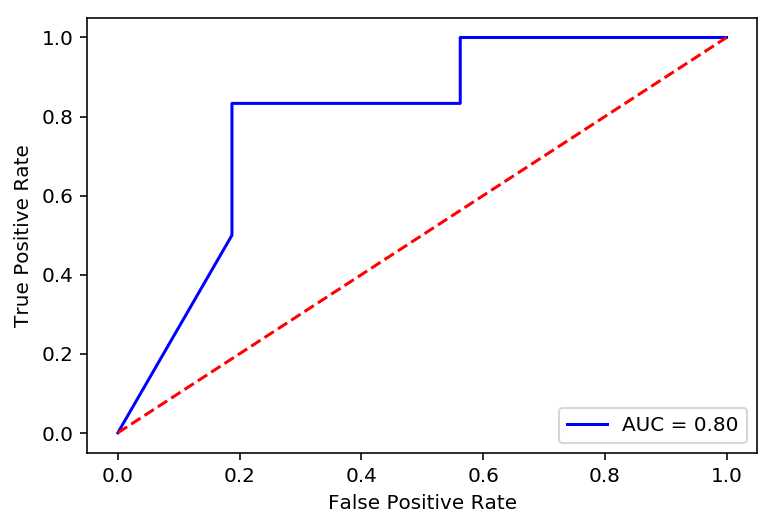

Found optimized model
Classifying on 5 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 49    0.662122
Name: 15, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 11
Similar playlist contains 11 potentially recommendable songs
11 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 49    0.662122
13    0.073721
Name: 15, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 4 potentially recommendable songs
15 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 49    0.662122
13    0.073721
33    0.055556
Name: 15, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 6
Similar playlist contains 6 potentially recommendable songs
21 re

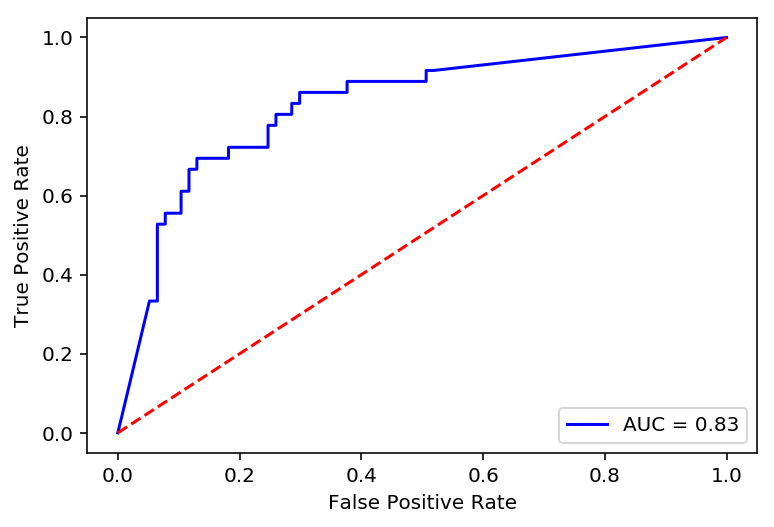

Found optimized model
Sample number 1 AUC of 0.8197802197802198 Threshold of 0.9 Recall score of 0.6571428571428571
Sample number 2 AUC of 0.7688644688644689 Threshold of 0.9 Recall score of 0.6857142857142857
Sample number 3 AUC of 0.8650793650793651 Threshold of 0.9 Recall score of 0.75
Sample number 4 AUC of 0.8619402985074627 Threshold of 0.9 Recall score of 0.7391304347826086
Sample number 5 AUC of 0.8436842105263158 Threshold of 0.9 Recall score of 0.7631578947368421
Sample number 6 AUC of 0.8537808641975309 Threshold of 0.9 Recall score of 0.6875
Sample number 7 AUC of 0.8202054794520548 Threshold of 0.9 Recall score of 0.625
Sample number 8 AUC of 0.7820178704393149 Threshold of 0.9 Recall score of 0.5882352941176471
Sample number 9 AUC of 0.8239726027397262 Threshold of 0.9 Recall score of 0.675
Sample number 10 AUC of 0.8883720930232558 Threshold of 0.8 Recall score of 0.6511627906976745
Sample number 11 AUC of 0.8316566063044937 Threshold of 0.8 Recall score of 0.57142857142

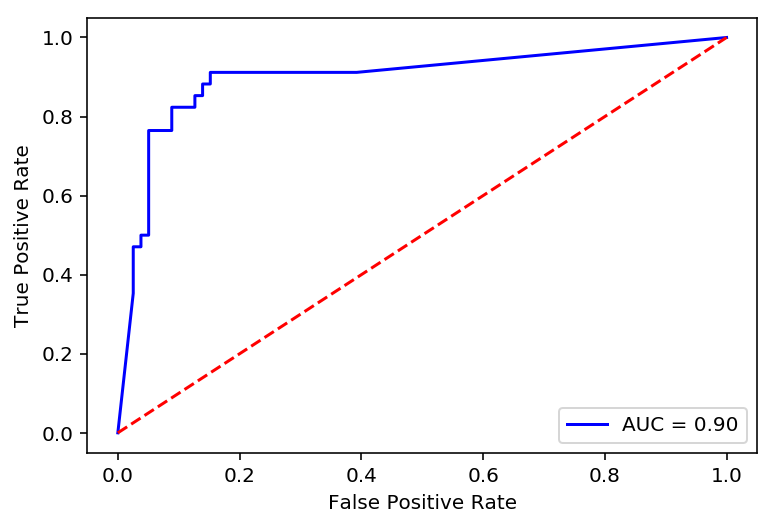

Found optimized model
Sample number 1 AUC of 0.7842105263157895 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.8714483714483714 Threshold of 0.9 Recall score of 0.7435897435897436
Sample number 3 AUC of 0.8242424242424242 Threshold of 0.9 Recall score of 0.5757575757575758
Sample number 4 AUC of 0.8022727272727272 Threshold of 0.9 Recall score of 0.6363636363636364
Sample number 5 AUC of 0.8349802371541502 Threshold of 0.9 Recall score of 0.6818181818181818
Sample number 6 AUC of 0.8256302521008403 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 7 AUC of 0.8442105263157895 Threshold of 0.9 Recall score of 0.6842105263157895
Sample number 8 AUC of 0.8093770279039585 Threshold of 0.9 Recall score of 0.5217391304347826
Sample number 9 AUC of 0.7876893939393941 Threshold of 0.9 Recall score of 0.5757575757575758
Sample number 10 AUC of 0.869122807017544 Threshold of 0.8 Recall score of 0.7894736842105263
Sample number 11 AUC of 0.8950924608819345 Threshold 

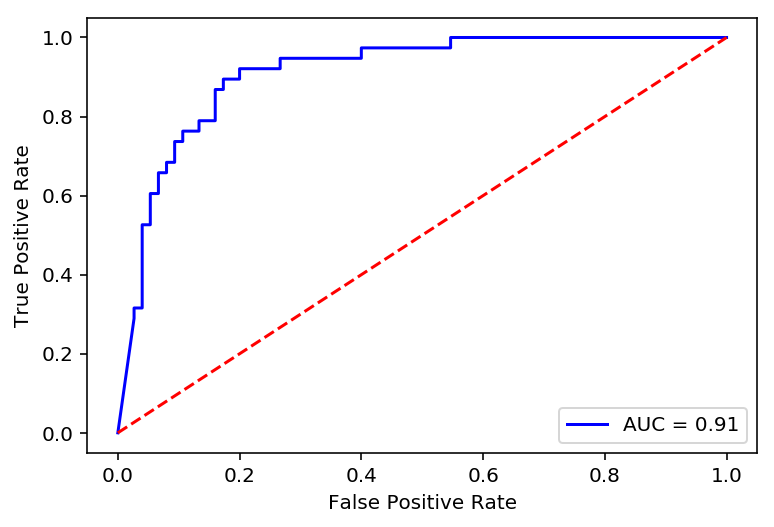

Found optimized model
Sample number 1 AUC of 0.8111664295874823 Threshold of 0.9 Recall score of 0.5945945945945946
Sample number 2 AUC of 0.8152631578947369 Threshold of 0.9 Recall score of 0.6578947368421053
Sample number 3 AUC of 0.8384210526315787 Threshold of 0.9 Recall score of 0.6578947368421053
Sample number 4 AUC of 0.8906976744186046 Threshold of 0.9 Recall score of 0.7441860465116279
Sample number 5 AUC of 0.7592803030303031 Threshold of 0.9 Recall score of 0.5151515151515151
Sample number 6 AUC of 0.7848915989159891 Threshold of 0.9 Recall score of 0.5853658536585366
Sample number 7 AUC of 0.8444170771756978 Threshold of 0.9 Recall score of 0.6896551724137931
Sample number 8 AUC of 0.8884268884268884 Threshold of 0.9 Recall score of 0.6153846153846154
Sample number 9 AUC of 0.8278947368421053 Threshold of 0.9 Recall score of 0.5789473684210527
Sample number 10 AUC of 0.8472222222222222 Threshold of 0.8 Recall score of 0.71875
Sample number 11 AUC of 0.8694879089615932 Thres

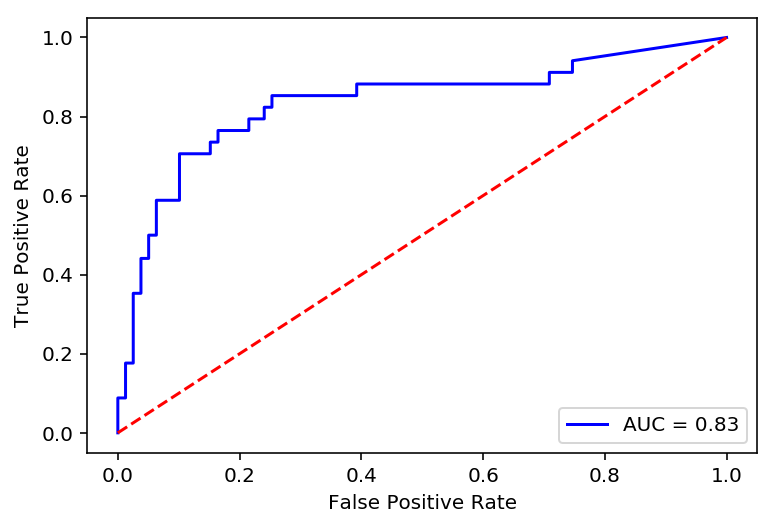

Found optimized model
Sample number 1 AUC of 0.8819806403574088 Threshold of 0.9 Recall score of 0.6176470588235294
Sample number 2 AUC of 0.8693181818181819 Threshold of 0.9 Recall score of 0.7575757575757576
Sample number 3 AUC of 0.701280227596017 Threshold of 0.9 Recall score of 0.5135135135135135
Sample number 4 AUC of 0.891025641025641 Threshold of 0.9 Recall score of 0.7428571428571429
Sample number 5 AUC of 0.9092140921409214 Threshold of 0.9 Recall score of 0.7560975609756098
Sample number 6 AUC of 0.7957875457875458 Threshold of 0.9 Recall score of 0.6285714285714286
Sample number 7 AUC of 0.8532571032571032 Threshold of 0.9 Recall score of 0.6153846153846154
Sample number 8 AUC of 0.8743150684931507 Threshold of 0.9 Recall score of 0.775
Sample number 9 AUC of 0.8804794520547945 Threshold of 0.9 Recall score of 0.7
Sample number 10 AUC of 0.8693493150684931 Threshold of 0.8 Recall score of 0.7
Sample number 11 AUC of 0.8787878787878788 Threshold of 0.8 Recall score of 0.6388

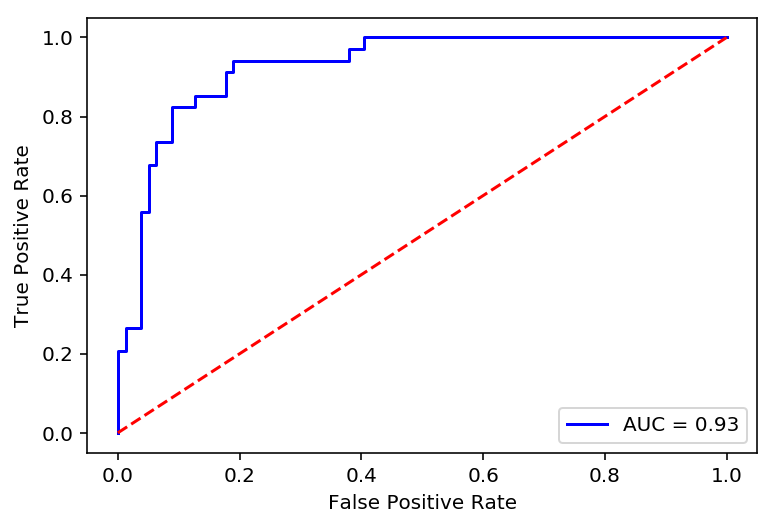

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 13    0.021507
Name: 37, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
1 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 13    0.021507
4     0.013595
Name: 37, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 11
Similar playlist contains 11 potentially recommendable songs
12 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 13    0.021507
4     0.013595
15    0.012155
Name: 37, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
12 rec

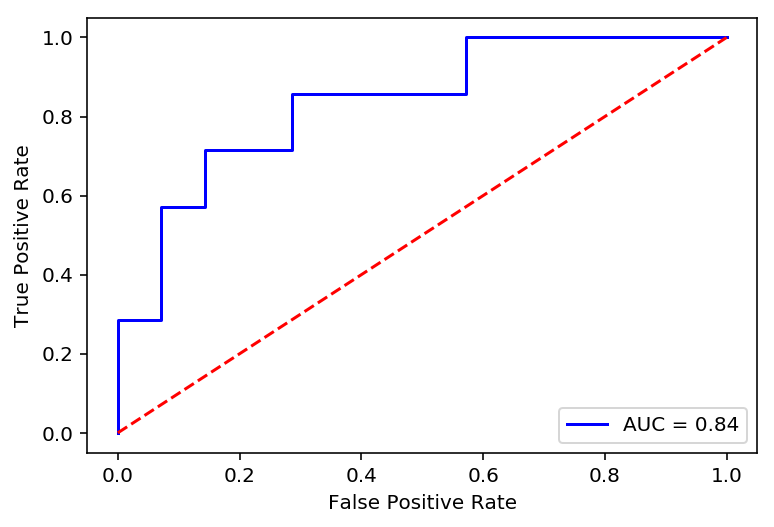

Found optimized model
Sample number 1 AUC of 0.6428571428571429 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 2 AUC of 0.8727272727272728 Threshold of 0.9 Recall score of 0.9090909090909091


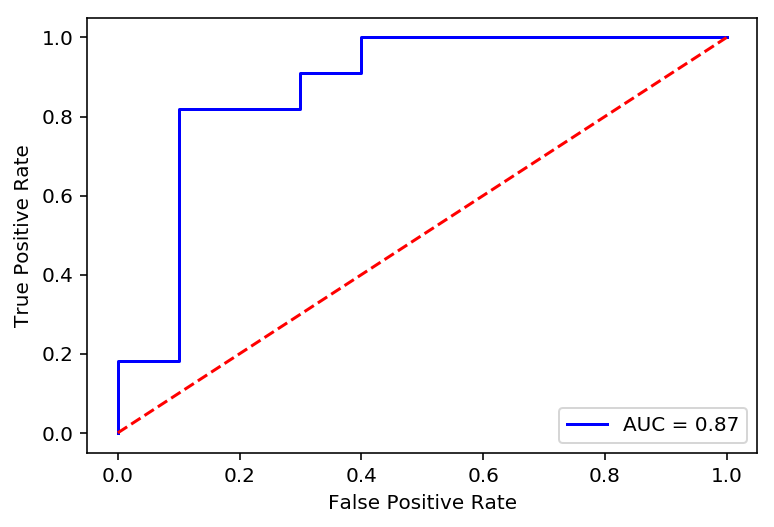

Found optimized model
Sample number 1 AUC of 0.75 Threshold of 0.9 Recall score of 0.4
Sample number 2 AUC of 0.825 Threshold of 0.9 Recall score of 0.8
Sample number 3 AUC of 0.6442307692307692 Threshold of 0.9 Recall score of 0.625
Sample number 4 AUC of 0.7653061224489796 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 5 AUC of 0.5816326530612245 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 6 AUC of 0.53125 Threshold of 0.9 Recall score of 0.2
Sample number 7 AUC of 0.8942307692307693 Threshold of 0.9 Recall score of 0.875
Sample number 8 AUC of 0.7222222222222222 Threshold of 0.9 Recall score of 0.5
Sample number 9 AUC of 0.8240740740740741 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 10 AUC of 0.338235294117647 Threshold of 0.8 Recall score of 0.25
Sample number 11 AUC of 0.625 Threshold of 0.8 Recall score of 0.75
Sample number 12 AUC of 0.6634615384615384 Threshold of 0.8 Recall score of 0.375
Sample number 13 AUC of 0

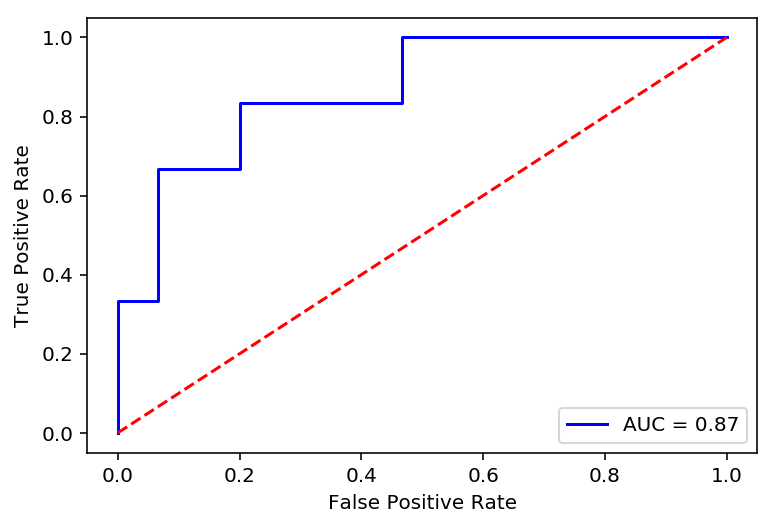

Found optimized model
Sample number 1 AUC of 0.7333333333333334 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 2 AUC of 0.7959183673469387 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 3 AUC of 0.6777777777777778 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.5576923076923077 Threshold of 0.9 Recall score of 0.25
Sample number 5 AUC of 0.6538461538461539 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.8375 Threshold of 0.9 Recall score of 0.8
Sample number 7 AUC of 0.6470588235294117 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.8090909090909092 Threshold of 0.9 Recall score of 0.4
Sample number 9 AUC of 0.7000000000000001 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 10 AUC of 0.7090909090909091 Threshold of 0.8 Recall score of 0.4
Sample number 11 AUC of 0.8148148148148148 Threshold of 0.8 Recall score of 0.5
Sample number 12 AUC of 0.5480769230769231 Threshold of 0.8 Recall score 

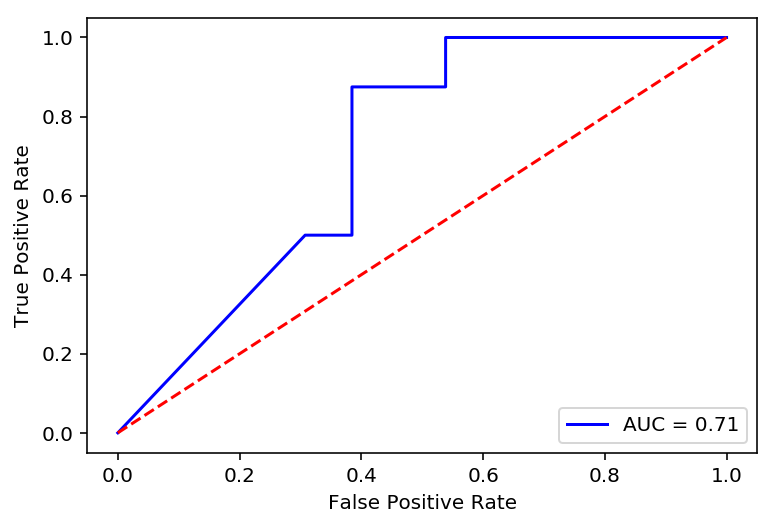

Found optimized model
Sample number 1 AUC of 0.70625 Threshold of 0.9 Recall score of 0.6
Sample number 2 AUC of 0.7040816326530612 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 3 AUC of 0.9081632653061225 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 4 AUC of 0.4423076923076923 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.6 Threshold of 0.9 Recall score of 0.4
Sample number 6 AUC of 0.6777777777777778 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.4555555555555556 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 8 AUC of 0.861111111111111 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 9 AUC of 0.7 Threshold of 0.9 Recall score of 0.18181818181818182
Sample number 10 AUC of 0.4387755102040816 Threshold of 0.8 Recall score of 0.14285714285714285
Sample number 11 AUC of 0.5769230769230769 Threshold of 0.8 Recall score of 0.5
Sample number 12 AUC of 0.9125 Threshold of 0.8 Recall 

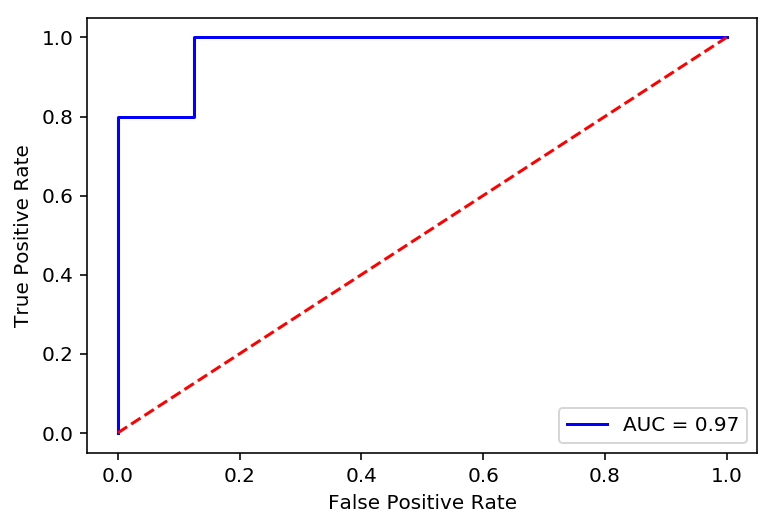

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 16    0.034149
Name: 45, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 2
Similar playlist contains 2 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 16    0.034149
40    0.031388
Name: 45, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 6
Similar playlist contains 6 potentially recommendable songs
8 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 16    0.034149
40    0.031388
23    0.027695
Name: 45, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 10
Similar playlist contains 10 potentially recommendable songs
18 reco

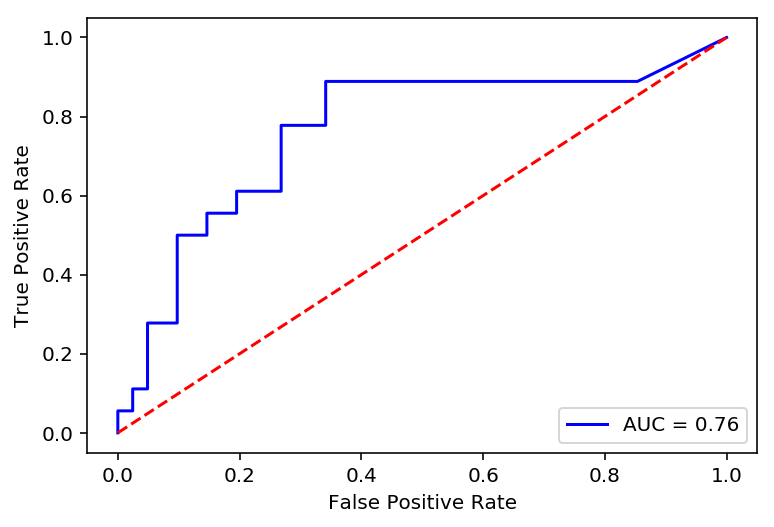

Found optimized model
Sample number 1 AUC of 0.7346437346437347 Threshold of 0.9 Recall score of 0.7272727272727273
Sample number 2 AUC of 0.7571428571428571 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 3 AUC of 0.7451690821256038 Threshold of 0.9 Recall score of 0.5217391304347826
Sample number 4 AUC of 0.8442307692307692 Threshold of 0.9 Recall score of 0.55
Sample number 5 AUC of 0.6890756302521008 Threshold of 0.9 Recall score of 0.5882352941176471
Sample number 6 AUC of 0.6684210526315789 Threshold of 0.9 Recall score of 0.3157894736842105
Sample number 7 AUC of 0.717948717948718 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.7730769230769231 Threshold of 0.9 Recall score of 0.7
Sample number 9 AUC of 0.621764705882353 Threshold of 0.9 Recall score of 0.36
Sample number 10 AUC of 0.7776315789473683 Threshold of 0.8 Recall score of 0.5263157894736842
Sample number 11 AUC of 0.7258454106280193 Threshold of 0.8 Recall score of 0.5217391304347826
Sa

Found optimized model
Sample number 1 AUC of 0.5446969696969698 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.6402616279069767 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.7303523035230353 Threshold of 0.9 Recall score of 0.7222222222222222
Sample number 4 AUC of 0.6684782608695652 Threshold of 0.9 Recall score of 0.6086956521739131
Sample number 5 AUC of 0.6696428571428571 Threshold of 0.9 Recall score of 0.375
Sample number 6 AUC of 0.7018970189701896 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 7 AUC of 0.8039473684210526 Threshold of 0.9 Recall score of 0.5789473684210527
Sample number 8 AUC of 0.7543604651162792 Threshold of 0.9 Recall score of 0.625
Sample number 9 AUC of 0.6727272727272727 Threshold of 0.9 Recall score of 0.5333333333333333
Sample number 10 AUC of 0.6584766584766585 Threshold of 0.8 Recall score of 0.5909090909090909
Sample number 11 AUC of 0.8179487179487179 Threshold of 0.8 Recall score of 0.

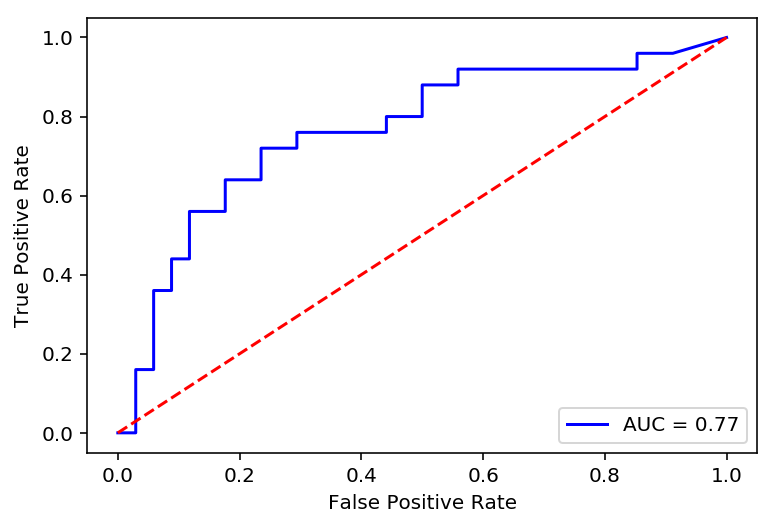

Found optimized model
Sample number 1 AUC of 0.6505952380952382 Threshold of 0.9 Recall score of 0.375
Sample number 2 AUC of 0.6841269841269841 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 3 AUC of 0.5909090909090909 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 4 AUC of 0.6339066339066339 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 5 AUC of 0.6788617886178862 Threshold of 0.9 Recall score of 0.6111111111111112
Sample number 6 AUC of 0.6952380952380952 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 7 AUC of 0.6294117647058823 Threshold of 0.9 Recall score of 0.32
Sample number 8 AUC of 0.7126984126984127 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 9 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.47619047619047616
Sample number 10 AUC of 0.7409420289855072 Threshold of 0.8 Recall score of 0.4782608695652174
Sample number 11 AUC of 0.6050135501355014 Threshold of 0.8 Re

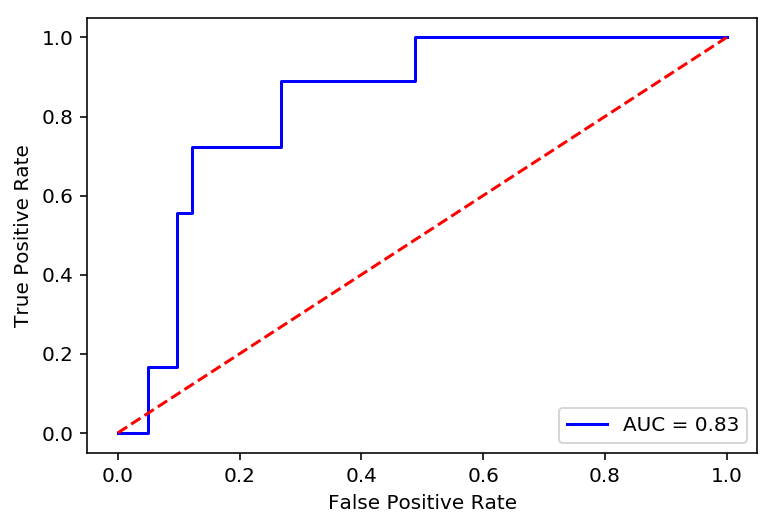

Found optimized model
Sample number 1 AUC of 0.5861344537815126 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 2 AUC of 0.6858974358974359 Threshold of 0.9 Recall score of 0.4
Sample number 3 AUC of 0.6384615384615385 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.7195121951219512 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.7113022113022113 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 6 AUC of 0.7554347826086956 Threshold of 0.9 Recall score of 0.5652173913043478
Sample number 7 AUC of 0.5334302325581395 Threshold of 0.9 Recall score of 0.25
Sample number 8 AUC of 0.5331978319783197 Threshold of 0.9 Recall score of 0.3888888888888889
Sample number 9 AUC of 0.6655092592592592 Threshold of 0.9 Recall score of 0.6296296296296297
Sample number 10 AUC of 0.7725563909774436 Threshold of 0.8 Recall score of 0.6190476190476191
Sample number 11 AUC of 0.5436507936507937 Threshold of 0.8 Recall score of 0.3571428571428571

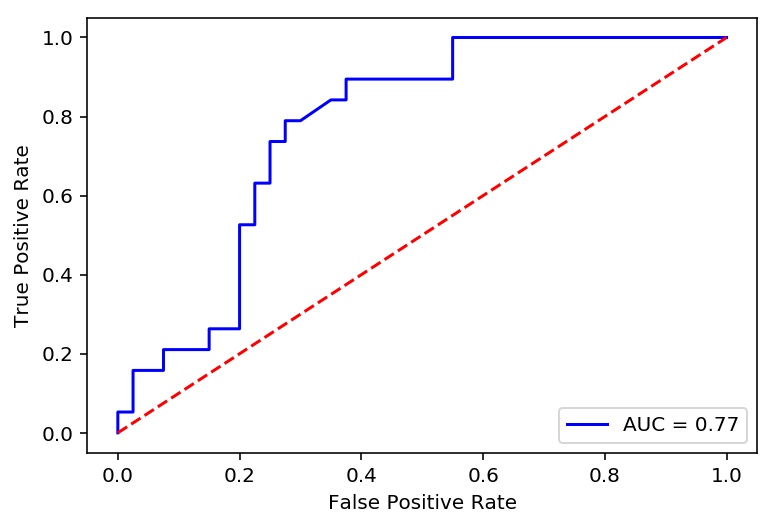

Found optimized model
Classifying on 6 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 6    0.1066
Name: 16, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 4 potentially recommendable songs
4 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 6     0.106600
14    0.089791
Name: 16, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 5
Similar playlist contains 5 potentially recommendable songs
9 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 6     0.106600
14    0.089791
17    0.088882
Name: 16, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 8
Similar playlist contains 8 potentially recommendable songs
16 recommend

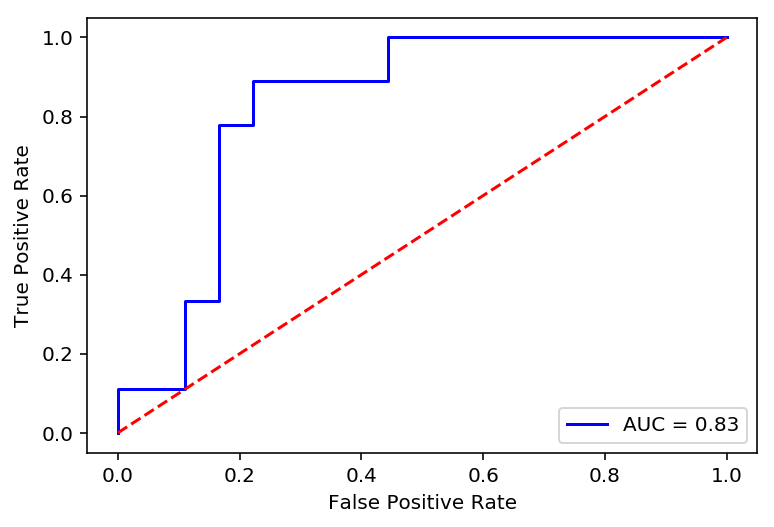

Found optimized model
Sample number 1 AUC of 0.8352941176470589 Threshold of 0.9 Recall score of 0.7
Sample number 2 AUC of 0.8641975308641975 Threshold of 0.9 Recall score of 1.0


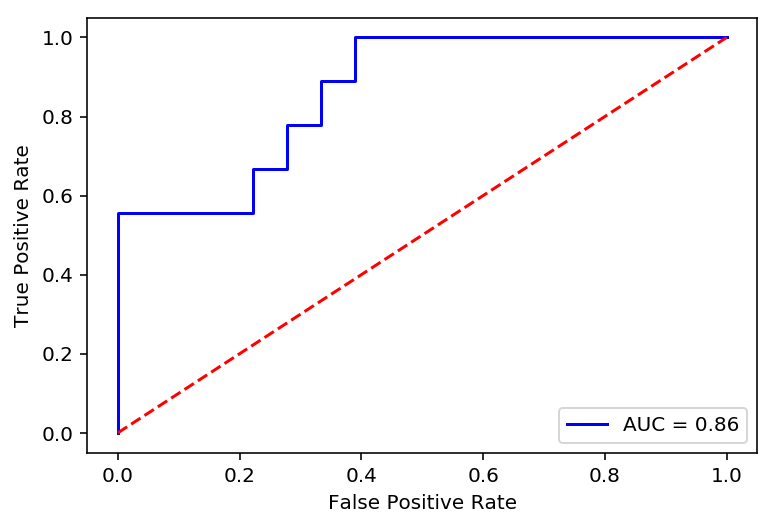

Found optimized model
Sample number 1 AUC of 0.7777777777777778 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.8058823529411765 Threshold of 0.9 Recall score of 0.6
Sample number 3 AUC of 0.8277777777777777 Threshold of 0.9 Recall score of 0.75
Sample number 4 AUC of 0.9841269841269842 Threshold of 0.9 Recall score of 1.0


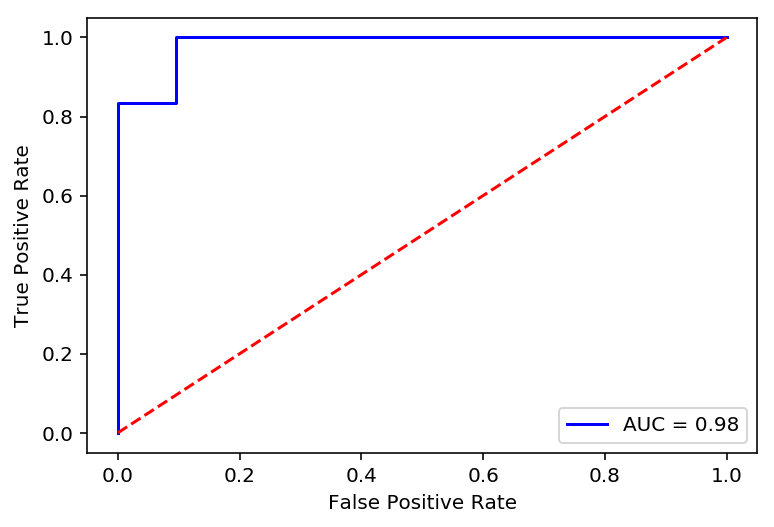

Found optimized model
Sample number 1 AUC of 0.8579545454545455 Threshold of 0.9 Recall score of 0.6363636363636364
Sample number 2 AUC of 0.7833333333333333 Threshold of 0.9 Recall score of 0.75
Sample number 3 AUC of 0.7098765432098764 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 4 AUC of 0.759090909090909 Threshold of 0.9 Recall score of 0.6
Sample number 5 AUC of 0.7730263157894737 Threshold of 0.9 Recall score of 0.375
Sample number 6 AUC of 0.7598684210526316 Threshold of 0.9 Recall score of 0.75
Sample number 7 AUC of 0.9013157894736842 Threshold of 0.9 Recall score of 0.75
Sample number 8 AUC of 0.7107142857142859 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 9 AUC of 0.8351648351648351 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 10 AUC of 0.868421052631579 Threshold of 0.8 Recall score of 0.75
Sample number 11 AUC of 0.9407894736842105 Threshold of 0.8 Recall score of 0.625
Sample number 12 AUC of 0.95294117647058

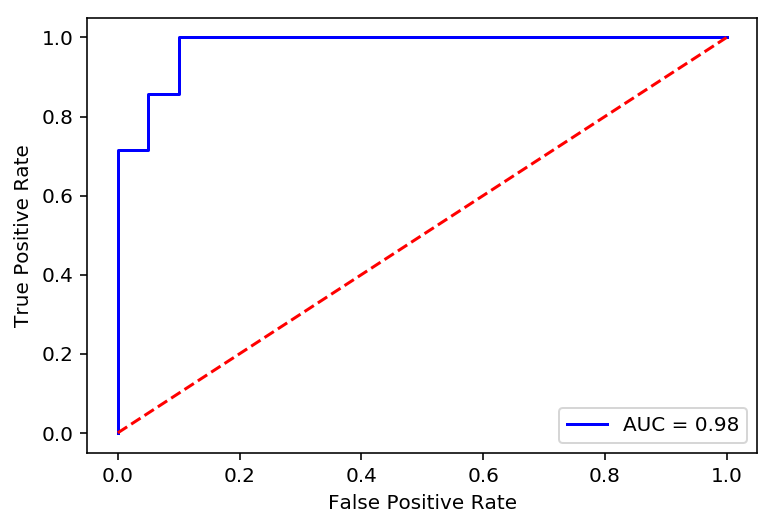

Found optimized model
Sample number 1 AUC of 0.8125 Threshold of 0.9 Recall score of 0.7272727272727273
Sample number 2 AUC of 0.7368421052631579 Threshold of 0.9 Recall score of 0.375
Sample number 3 AUC of 0.5246913580246914 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 4 AUC of 0.9285714285714285 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 5 AUC of 0.6970588235294117 Threshold of 0.9 Recall score of 0.6
Sample number 6 AUC of 0.728021978021978 Threshold of 0.9 Recall score of 0.38461538461538464
Sample number 7 AUC of 0.9388888888888889 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 8 AUC of 0.7302631578947368 Threshold of 0.9 Recall score of 0.5
Sample number 9 AUC of 0.8029411764705882 Threshold of 0.9 Recall score of 0.7
Sample number 10 AUC of 0.7214285714285715 Threshold of 0.8 Recall score of 0.5714285714285714
Sample number 11 AUC of 0.6392857142857142 Threshold of 0.8 Recall score of 0.42857142857142855
Sample numb

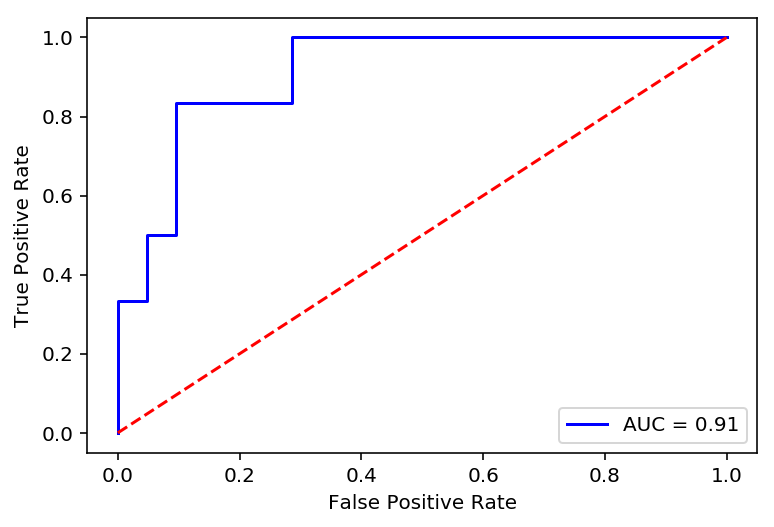

Found optimized model
Classifying on 5 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 16    0.1066
Name: 6, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 15
Similar playlist contains 15 potentially recommendable songs
15 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 16    0.106600
3     0.086244
Name: 6, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 26
Similar playlist contains 26 potentially recommendable songs
---Recommendation complete---
---Run CF model---
Most similar playlist number 3
Most similar playlists: 16    0.106600
3     0.086244
4     0.074940
Name: 6, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 44
Similar playlist contains 44 potentially recommendable songs
---Recommendation complete---
---Run CF

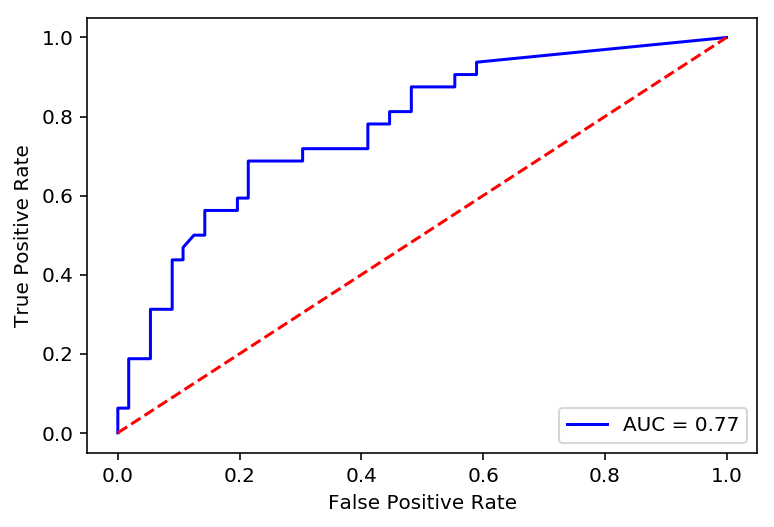

Found optimized model
Sample number 1 AUC of 0.5695203400121434 Threshold of 0.9 Recall score of 0.4074074074074074
Sample number 2 AUC of 0.6709030100334448 Threshold of 0.9 Recall score of 0.43478260869565216
Sample number 3 AUC of 0.7367816091954023 Threshold of 0.9 Recall score of 0.5333333333333333
Sample number 4 AUC of 0.6388077147866744 Threshold of 0.9 Recall score of 0.3448275862068966
Sample number 5 AUC of 0.6501116071428571 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.6809895833333334 Threshold of 0.9 Recall score of 0.5416666666666666
Sample number 7 AUC of 0.6774193548387096 Threshold of 0.9 Recall score of 0.6153846153846154
Sample number 8 AUC of 0.7452380952380953 Threshold of 0.9 Recall score of 0.6428571428571429
Sample number 9 AUC of 0.6726579520697169 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 10 AUC of 0.6730769230769231 Threshold of 0.8 Recall score of 0.4444444444444444
Sample number 11 AUC of 0.7653419053185272 Threshol

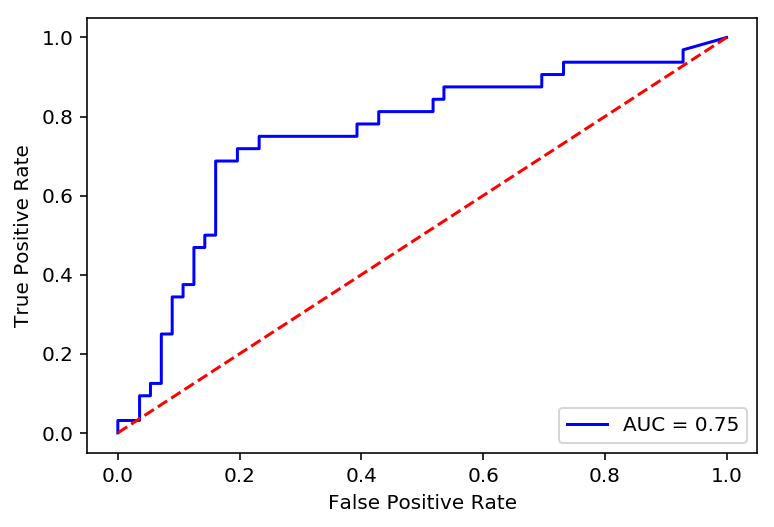

Found optimized model
Sample number 1 AUC of 0.6682942708333334 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 2 AUC of 0.6825068870523416 Threshold of 0.9 Recall score of 0.6363636363636364
Sample number 3 AUC of 0.7165400350672121 Threshold of 0.9 Recall score of 0.4482758620689655
Sample number 4 AUC of 0.6268610421836228 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 5 AUC of 0.7521222410865874 Threshold of 0.9 Recall score of 0.6774193548387096
Sample number 6 AUC of 0.6797385620915033 Threshold of 0.9 Recall score of 0.35294117647058826
Sample number 7 AUC of 0.6290224650880388 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 8 AUC of 0.6774553571428572 Threshold of 0.9 Recall score of 0.40625
Sample number 9 AUC of 0.6612723214285714 Threshold of 0.9 Recall score of 0.4375
Sample number 10 AUC of 0.6980758347481607 Threshold of 0.8 Recall score of 0.6774193548387096
Sample number 11 AUC of 0.5964959568733154 Threshold of 0.8

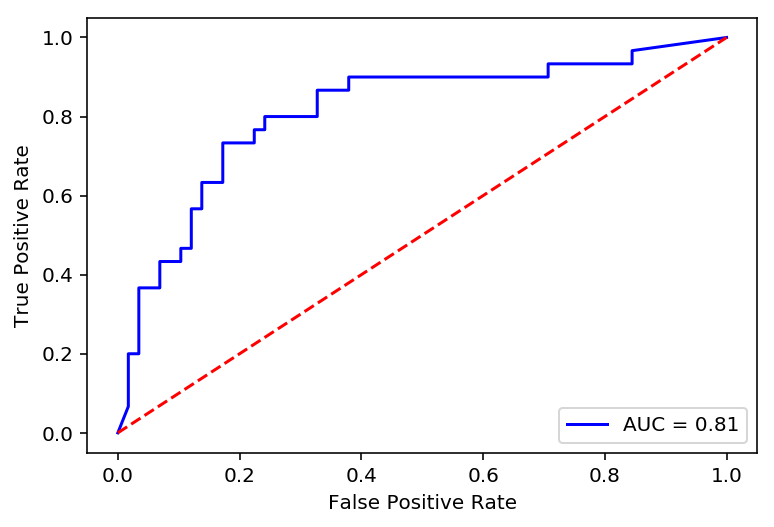

Found optimized model
Sample number 1 AUC of 0.7244301578024547 Threshold of 0.9 Recall score of 0.4482758620689655
Sample number 2 AUC of 0.6790633608815426 Threshold of 0.9 Recall score of 0.5151515151515151
Sample number 3 AUC of 0.7193452380952381 Threshold of 0.9 Recall score of 0.4642857142857143
Sample number 4 AUC of 0.5561002178649237 Threshold of 0.9 Recall score of 0.3235294117647059
Sample number 5 AUC of 0.8077147866744593 Threshold of 0.9 Recall score of 0.6896551724137931
Sample number 6 AUC of 0.7530997304582211 Threshold of 0.9 Recall score of 0.5142857142857142
Sample number 7 AUC of 0.6490358126721764 Threshold of 0.9 Recall score of 0.42424242424242425
Sample number 8 AUC of 0.7304597701149427 Threshold of 0.9 Recall score of 0.4666666666666667
Sample number 9 AUC of 0.7321428571428572 Threshold of 0.9 Recall score of 0.5
Sample number 10 AUC of 0.7232612507305669 Threshold of 0.8 Recall score of 0.6896551724137931
Sample number 11 AUC of 0.6259765625000001 Threshol

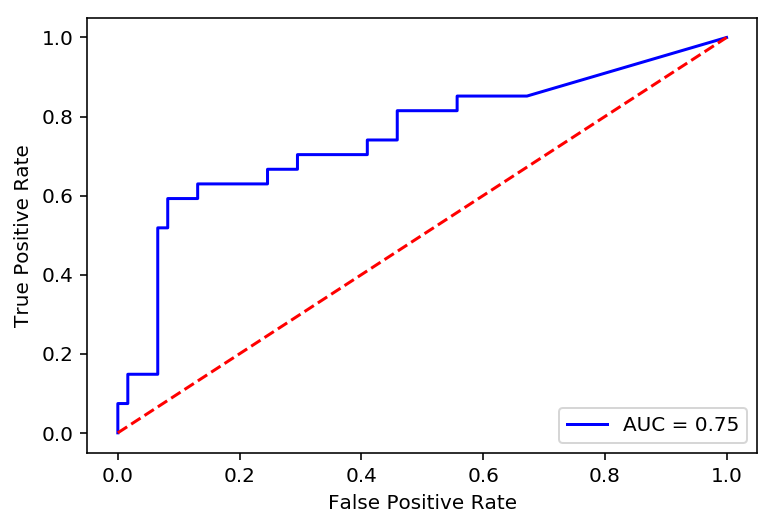

Found optimized model
Sample number 1 AUC of 0.6542105263157895 Threshold of 0.9 Recall score of 0.3157894736842105
Sample number 2 AUC of 0.640818858560794 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 3 AUC of 0.6615732880588568 Threshold of 0.9 Recall score of 0.4838709677419355
Sample number 4 AUC of 0.656547619047619 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 5 AUC of 0.677136389360498 Threshold of 0.9 Recall score of 0.4838709677419355
Sample number 6 AUC of 0.6414827391058291 Threshold of 0.9 Recall score of 0.4838709677419355
Sample number 7 AUC of 0.5781609195402299 Threshold of 0.9 Recall score of 0.4
Sample number 8 AUC of 0.6718362282878412 Threshold of 0.9 Recall score of 0.5769230769230769
Sample number 9 AUC of 0.5659041394335511 Threshold of 0.9 Recall score of 0.35294117647058826
Sample number 10 AUC of 0.552734375 Threshold of 0.8 Recall score of 0.4166666666666667
Sample number 11 AUC of 0.643250688705234 Threshold of 0.8 

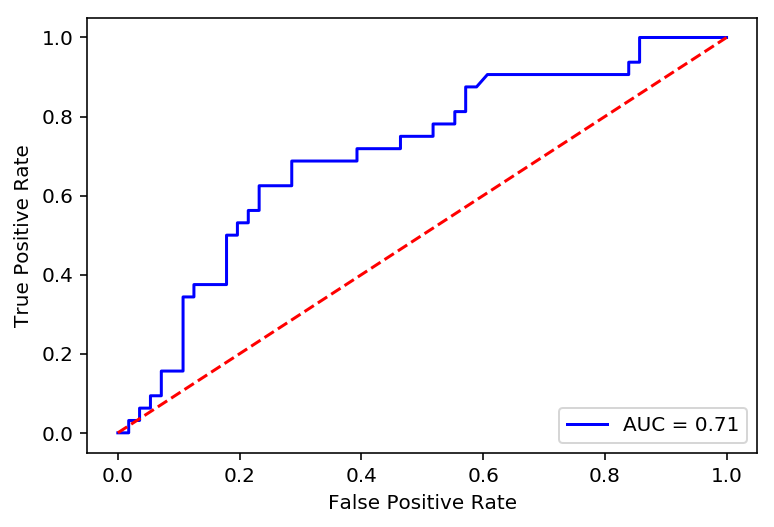

Found optimized model
Classifying on 5 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 43    0.142759
Name: 7, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 21
Similar playlist contains 21 potentially recommendable songs
21 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 43    0.142759
25    0.096961
Name: 7, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 16
Similar playlist contains 16 potentially recommendable songs
---Recommendation complete---
---Run CF model---
Most similar playlist number 3
Most similar playlists: 43    0.142759
25    0.096961
2     0.090997
Name: 7, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 6
Similar playlist contains 6 potentially recommendable songs
---Recommendation complete---
25 recomm

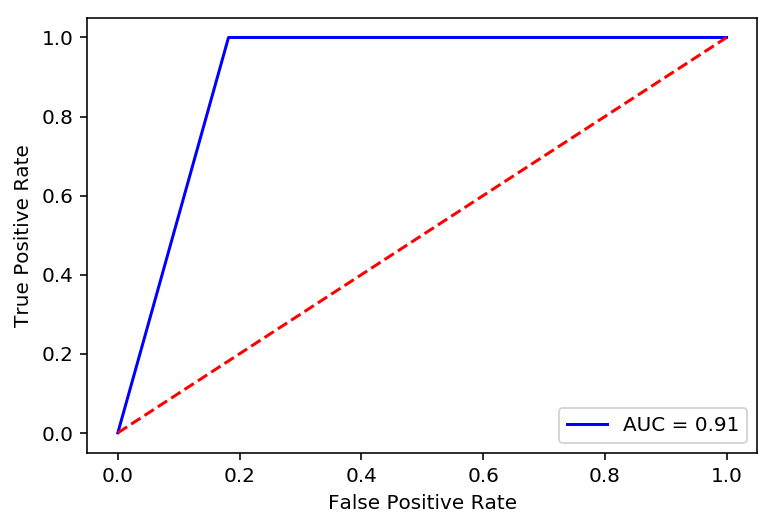

Found optimized model
Sample number 1 AUC of 0.7555555555555555 Threshold of 0.9 Recall score of 0.2
Sample number 2 AUC of 0.5416666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.7666666666666667 Threshold of 0.9 Recall score of 0.8
Sample number 4 AUC of 0.7424242424242422 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.7083333333333334 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


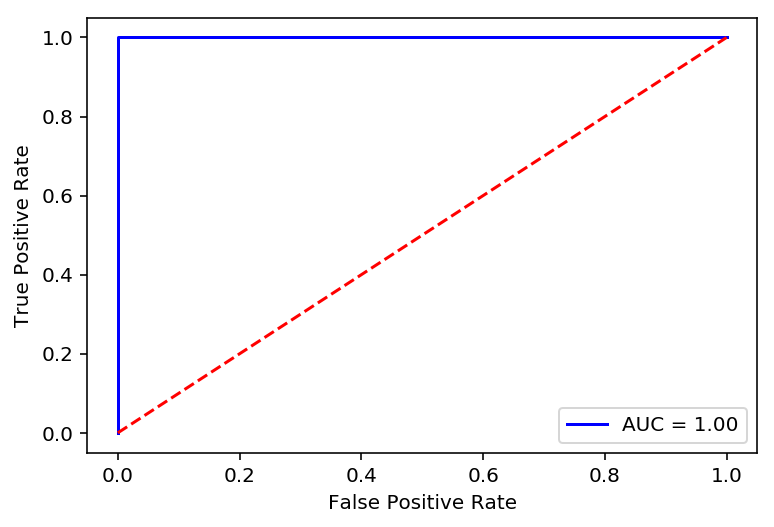

Found optimized model
Sample number 1 AUC of 0.7875 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 0.7708333333333333 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.696969696969697 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 4 AUC of 0.775 Threshold of 0.9 Recall score of 0.75
Sample number 5 AUC of 0.7250000000000001 Threshold of 0.9 Recall score of 0.75
Sample number 6 AUC of 0.7777777777777778 Threshold of 0.9 Recall score of 0.6
Sample number 7 AUC of 1.0 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 8 AUC of 0.7575757575757576 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 9 AUC of 0.4791666666666667 Threshold of 0.9 Recall score of 0.0
Sample number 10 AUC of 1.0 Threshold of 0.8 Recall score of 1.0


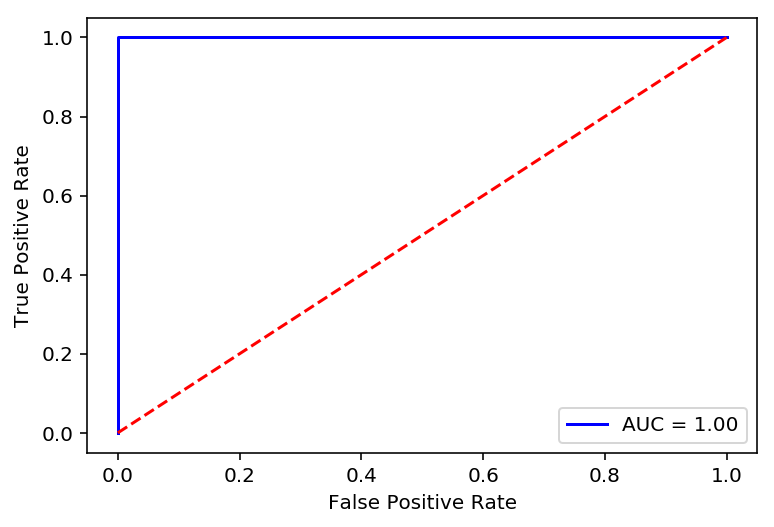

Found optimized model
Sample number 1 AUC of 0.8787878787878788 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.8787878787878788 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 3 AUC of 0.7000000000000001 Threshold of 0.9 Recall score of 0.6
Sample number 4 AUC of 0.75 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.925 Threshold of 0.9 Recall score of 1.0


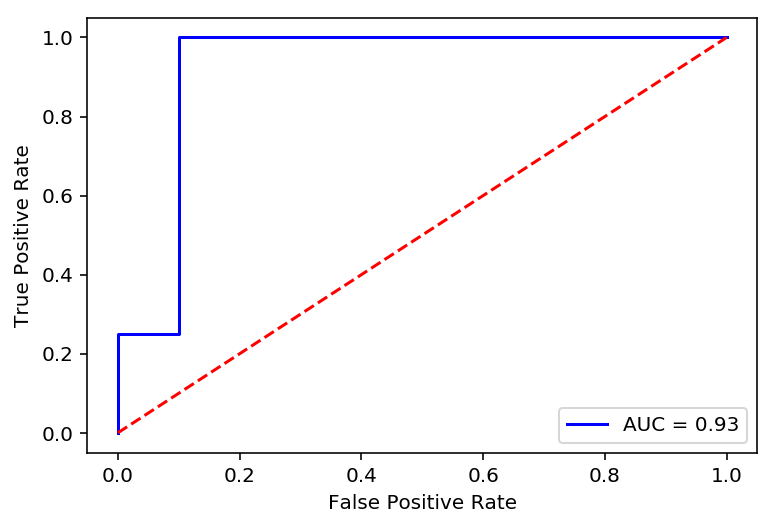

Found optimized model
Sample number 1 AUC of 0.5757575757575758 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.8125 Threshold of 0.9 Recall score of 0.75
Sample number 3 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


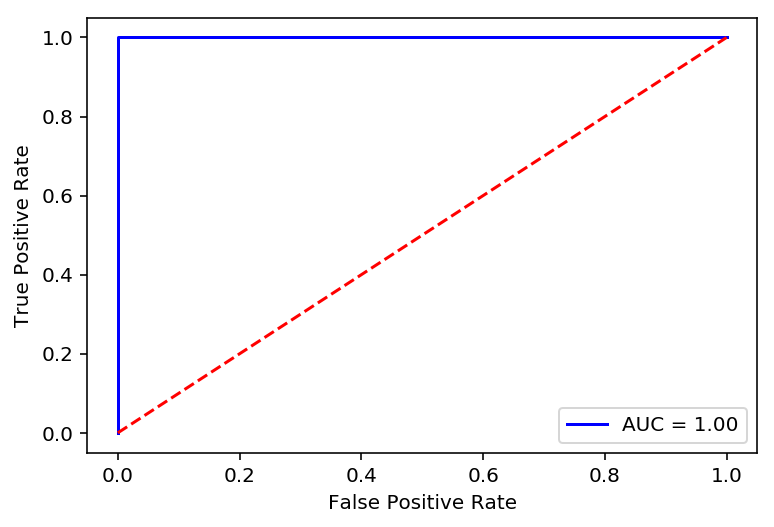

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 4    0.012956
Name: 20, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 32
Similar playlist contains 32 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist prog
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 11    0.029111
Name: 27, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.9444444444444444 Threshold of 0.9 Recall score of 1.0


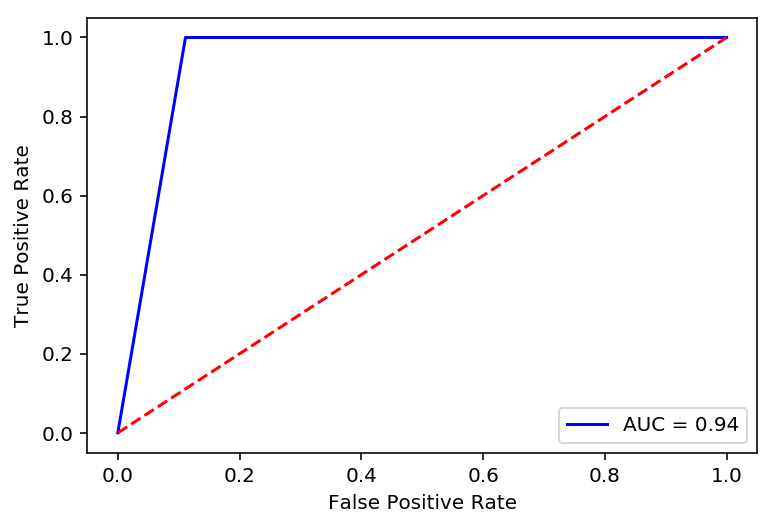

Found optimized model
Sample number 1 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


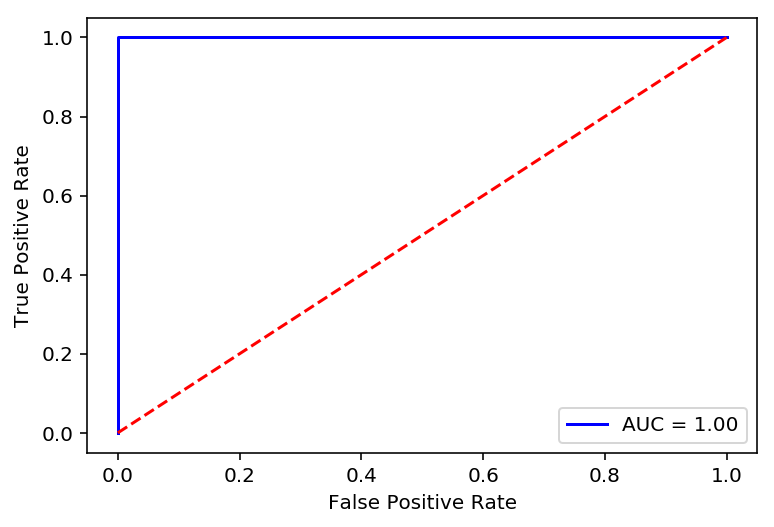

Found optimized model
Sample number 1 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


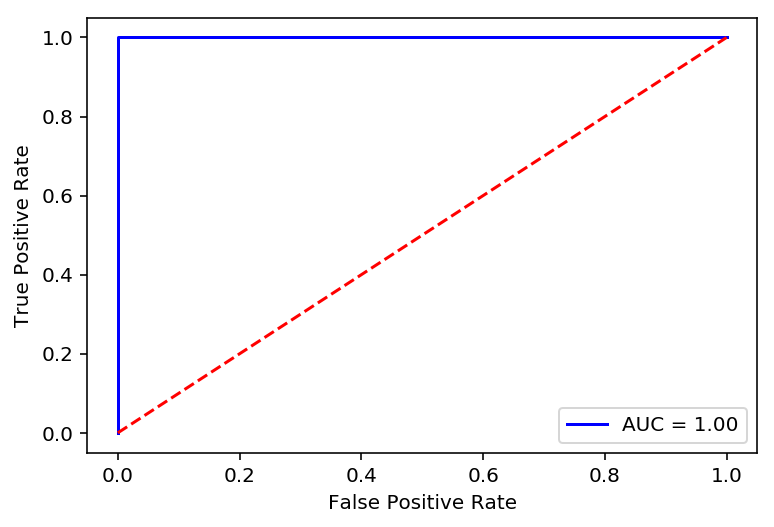

Found optimized model
Sample number 1 AUC of 0.9142857142857144 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 2 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


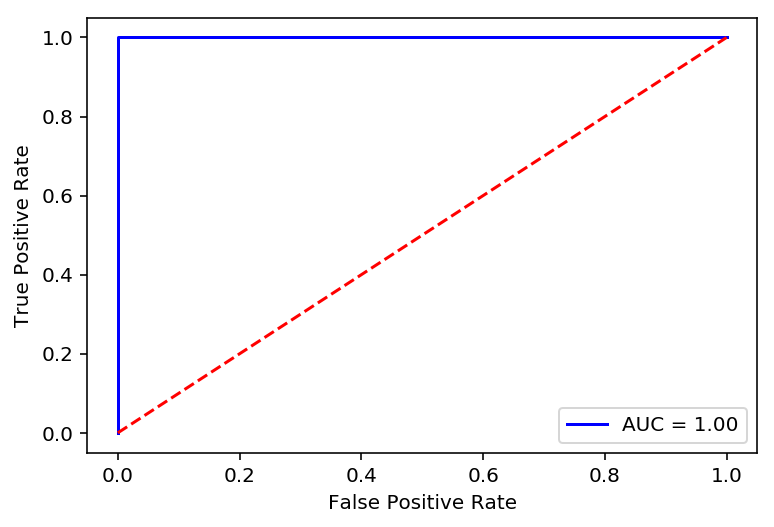

Found optimized model
Sample number 1 AUC of 0.8285714285714285 Threshold of 0.9 Recall score of 0.6
Sample number 2 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


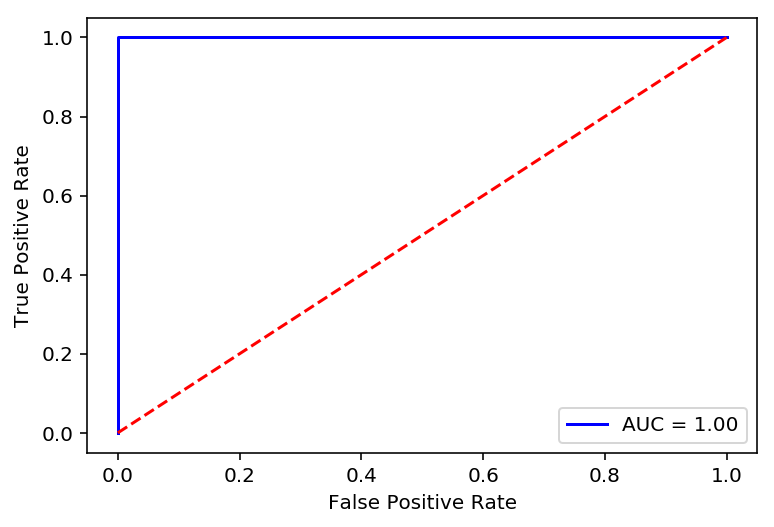

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 11    0.029111
Name: 27, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 2
Similar playlist contains 2 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 11    0.029111
0     0.000000
Name: 27, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
3 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 11    0.029111
0     0.000000
1     0.000000
Name: 27, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 4 potentially recommendable songs
7 recomme

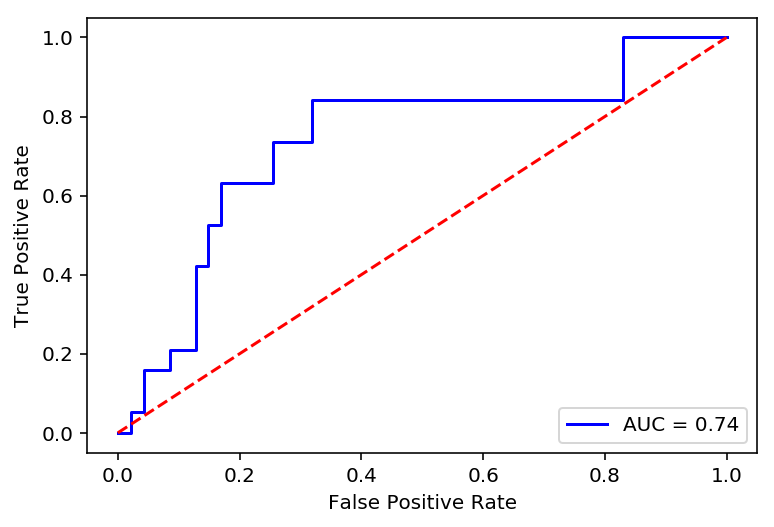

Found optimized model
Sample number 1 AUC of 0.6696428571428571 Threshold of 0.9 Recall score of 0.375
Sample number 2 AUC of 0.7226970560303893 Threshold of 0.9 Recall score of 0.7037037037037037
Sample number 3 AUC of 0.7382518796992481 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 4 AUC of 0.5712962962962963 Threshold of 0.9 Recall score of 0.5333333333333333
Sample number 5 AUC of 0.6931690929451286 Threshold of 0.9 Recall score of 0.5789473684210527
Sample number 6 AUC of 0.78125 Threshold of 0.9 Recall score of 0.8461538461538461
Sample number 7 AUC of 0.6619047619047619 Threshold of 0.9 Recall score of 0.47619047619047616
Sample number 8 AUC of 0.8149038461538461 Threshold of 0.9 Recall score of 0.6538461538461539
Sample number 9 AUC of 0.7644675925925926 Threshold of 0.9 Recall score of 0.7222222222222222
Sample number 10 AUC of 0.6383101851851851 Threshold of 0.8 Recall score of 0.4444444444444444
Sample number 11 AUC of 0.6943150046598322 Threshold of 0.8 

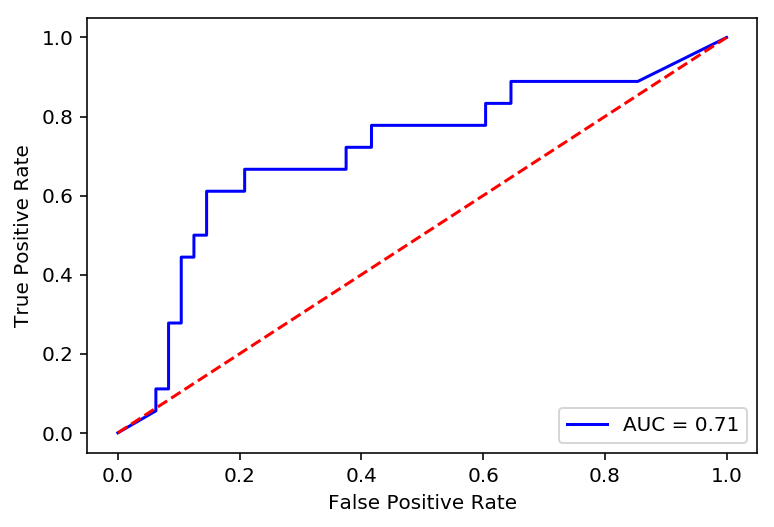

Found optimized model
Sample number 1 AUC of 0.6794717887154862 Threshold of 0.9 Recall score of 0.5882352941176471
Sample number 2 AUC of 0.6504629629629629 Threshold of 0.9 Recall score of 0.5555555555555556
Sample number 3 AUC of 0.7086776859504131 Threshold of 0.9 Recall score of 0.6818181818181818
Sample number 4 AUC of 0.6398559423769508 Threshold of 0.9 Recall score of 0.5294117647058824
Sample number 5 AUC of 0.6466965285554311 Threshold of 0.9 Recall score of 0.6842105263157895
Sample number 6 AUC of 0.717896865520728 Threshold of 0.9 Recall score of 0.6521739130434783
Sample number 7 AUC of 0.7010078387458007 Threshold of 0.9 Recall score of 0.5263157894736842
Sample number 8 AUC of 0.6936507936507936 Threshold of 0.9 Recall score of 0.5238095238095238
Sample number 9 AUC of 0.7569444444444444 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 10 AUC of 0.7248677248677249 Threshold of 0.8 Recall score of 0.5714285714285714
Sample number 11 AUC of 0.611729019211

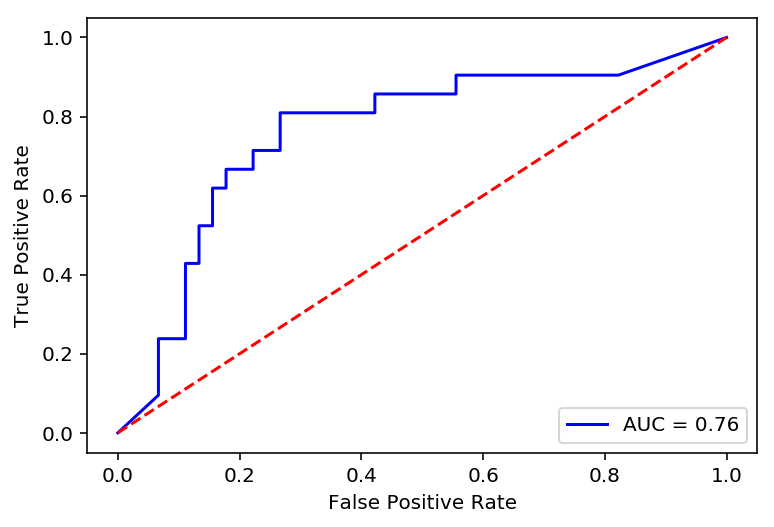

Found optimized model
Sample number 1 AUC of 0.5783068783068783 Threshold of 0.9 Recall score of 0.38095238095238093
Sample number 2 AUC of 0.7084656084656085 Threshold of 0.9 Recall score of 0.6190476190476191
Sample number 3 AUC of 0.4932692307692308 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 4 AUC of 0.6629339305711086 Threshold of 0.9 Recall score of 0.3684210526315789
Sample number 5 AUC of 0.6209406494960806 Threshold of 0.9 Recall score of 0.42105263157894735
Sample number 6 AUC of 0.7202881152460985 Threshold of 0.9 Recall score of 0.5882352941176471
Sample number 7 AUC of 0.6170634920634921 Threshold of 0.9 Recall score of 0.4583333333333333
Sample number 8 AUC of 0.6945652173913044 Threshold of 0.9 Recall score of 0.6
Sample number 9 AUC of 0.6962809917355373 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 10 AUC of 0.7661375661375661 Threshold of 0.8 Recall score of 0.5238095238095238
Sample number 11 AUC of 0.6513227513227513 Thres

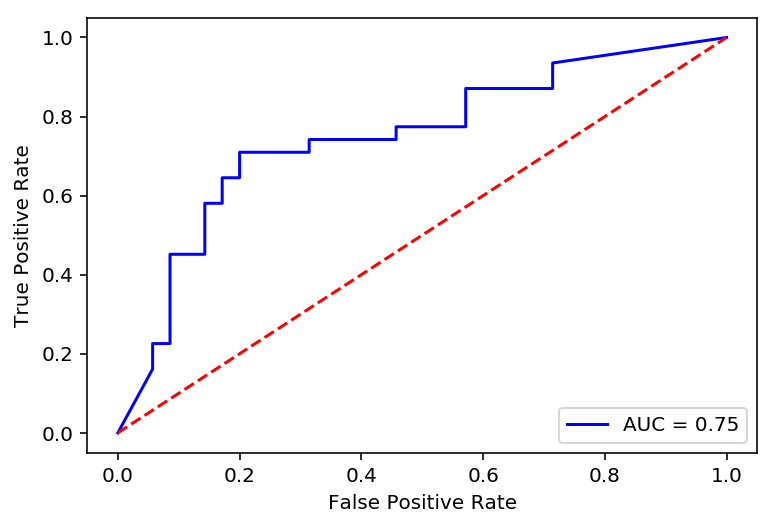

Found optimized model
Sample number 1 AUC of 0.722718253968254 Threshold of 0.9 Recall score of 0.2916666666666667
Sample number 2 AUC of 0.5844287158746208 Threshold of 0.9 Recall score of 0.5217391304347826
Sample number 3 AUC of 0.651875 Threshold of 0.9 Recall score of 0.375
Sample number 4 AUC of 0.7504807692307692 Threshold of 0.9 Recall score of 0.38461538461538464
Sample number 5 AUC of 0.621031746031746 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 6 AUC of 0.6215277777777778 Threshold of 0.9 Recall score of 0.375
Sample number 7 AUC of 0.7717391304347826 Threshold of 0.9 Recall score of 0.2
Sample number 8 AUC of 0.7604166666666667 Threshold of 0.9 Recall score of 0.5416666666666666
Sample number 9 AUC of 0.6435793731041456 Threshold of 0.9 Recall score of 0.5217391304347826
Sample number 10 AUC of 0.5907407407407408 Threshold of 0.8 Recall score of 0.3
Sample number 11 AUC of 0.6521739130434784 Threshold of 0.8 Recall score of 0.5
Sample number 12 AUC of 

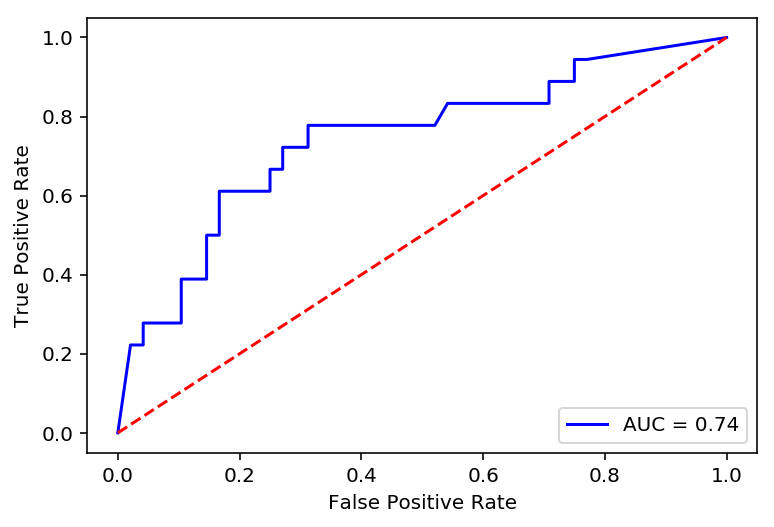

Found optimized model
Classifying on 5 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 14    0.275445
Name: 3, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 21
Similar playlist contains 21 potentially recommendable songs
21 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 14    0.275445
5     0.168550
Name: 3, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 7
Similar playlist contains 7 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Acid & funky
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 36    0.090075
Name: 0, dtype: float64
---Train CBF model---
Training model on seed playlist

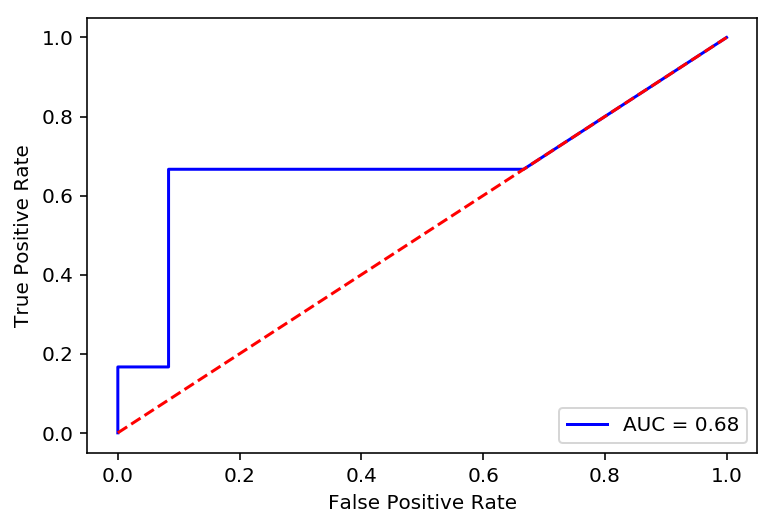

Found optimized model
Sample number 1 AUC of 0.6000000000000001 Threshold of 0.9 Recall score of 0.25
Sample number 2 AUC of 0.462962962962963 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 3 AUC of 0.8153846153846154 Threshold of 0.9 Recall score of 0.6
Sample number 4 AUC of 0.6527777777777777 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.6168831168831169 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 6 AUC of 0.7916666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 7 AUC of 0.6233766233766234 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 8 AUC of 0.7000000000000001 Threshold of 0.9 Recall score of 0.6
Sample number 9 AUC of 0.8055555555555556 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 10 AUC of 0.6233766233766234 Threshold of 0.8 Recall score of 0.42857142857142855
Sample number 11 AUC of 0.9305555555555556 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 1

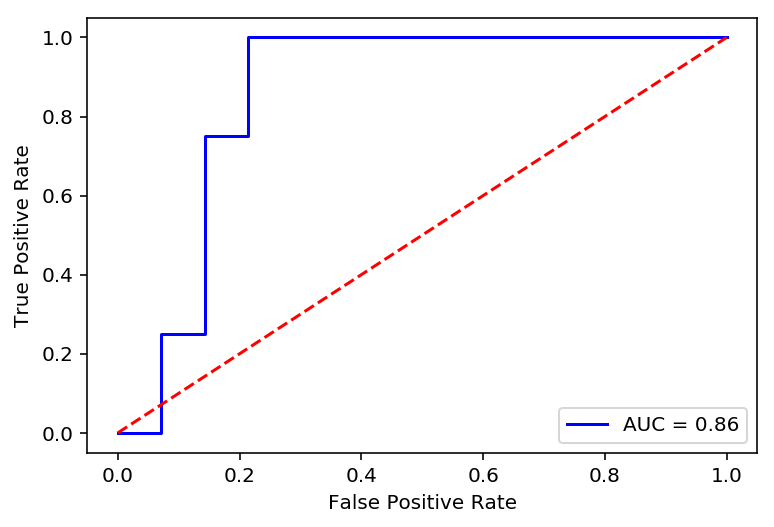

Found optimized model
Sample number 1 AUC of 0.6615384615384616 Threshold of 0.9 Recall score of 0.4
Sample number 2 AUC of 0.676923076923077 Threshold of 0.9 Recall score of 0.2
Sample number 3 AUC of 0.7847222222222222 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 4 AUC of 0.6597222222222222 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 5 AUC of 0.3611111111111111 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.75 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.4444444444444444 Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.5194805194805194 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 9 AUC of 0.8392857142857143 Threshold of 0.9 Recall score of 0.25
Sample number 10 AUC of 0.49350649350649345 Threshold of 0.8 Recall score of 0.14285714285714285
Sample number 11 AUC of 0.33333333333333337 Threshold of 0.8 Recall score of 0.16666666666666666
Sample number 12 AUC of 0.493827160493827

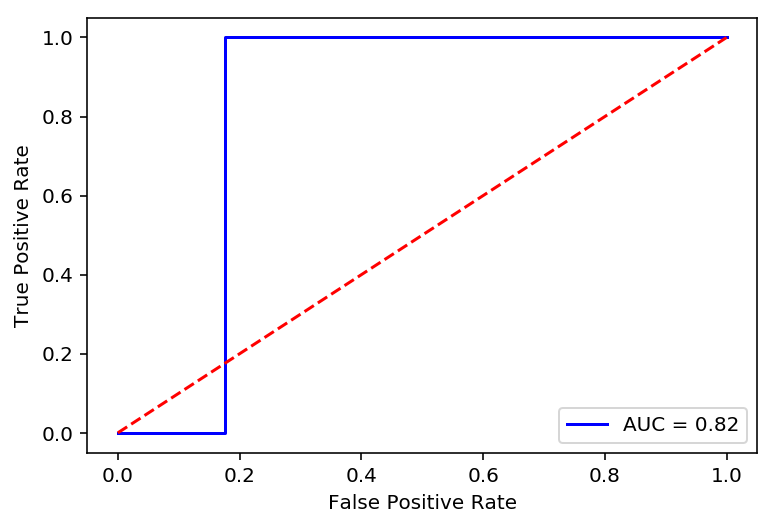

Found optimized model
Sample number 1 AUC of 0.3950617283950617 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.5625 Threshold of 0.9 Recall score of 0.25
Sample number 3 AUC of 0.5 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 4 AUC of 0.5061728395061729 Threshold of 0.9 Recall score of 0.1111111111111111
Sample number 5 AUC of 0.3472222222222222 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.6493506493506493 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 7 AUC of 0.4107142857142857 Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.45679012345679015 Threshold of 0.9 Recall score of 0.1111111111111111
Sample number 9 AUC of 0.40277777777777773 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 10 AUC of 0.4814814814814815 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 11 AUC of 0.7076923076923077 Threshold of 0.8 Recall score of 0.2
Sample number 12 AUC of 0.41558441558441

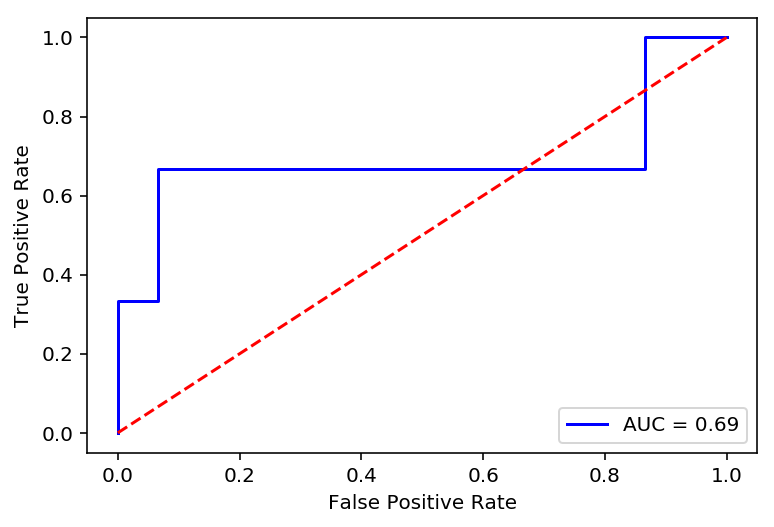

Found optimized model
Sample number 1 AUC of 0.36923076923076925 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.6964285714285714 Threshold of 0.9 Recall score of 0.25
Sample number 3 AUC of 0.26785714285714285 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.26153846153846155 Threshold of 0.9 Recall score of 0.2
Sample number 5 AUC of 0.24615384615384617 Threshold of 0.9 Recall score of 0.2
Sample number 6 AUC of 0.41250000000000003 Threshold of 0.9 Recall score of 0.125
Sample number 7 AUC of 0.41666666666666674 Threshold of 0.9 Recall score of 0.0
Sample number 8 AUC of 0.6607142857142857 Threshold of 0.9 Recall score of 0.5
Sample number 9 AUC of 0.4642857142857143 Threshold of 0.9 Recall score of 0.25
Sample number 10 AUC of 0.36249999999999993 Threshold of 0.8 Recall score of 0.125
Sample number 11 AUC of 0.6428571428571429 Threshold of 0.8 Recall score of 0.5
Sample number 12 AUC of 0.65 Threshold of 0.8 Recall score of 0.25
Sample number 13 AUC of 0.5

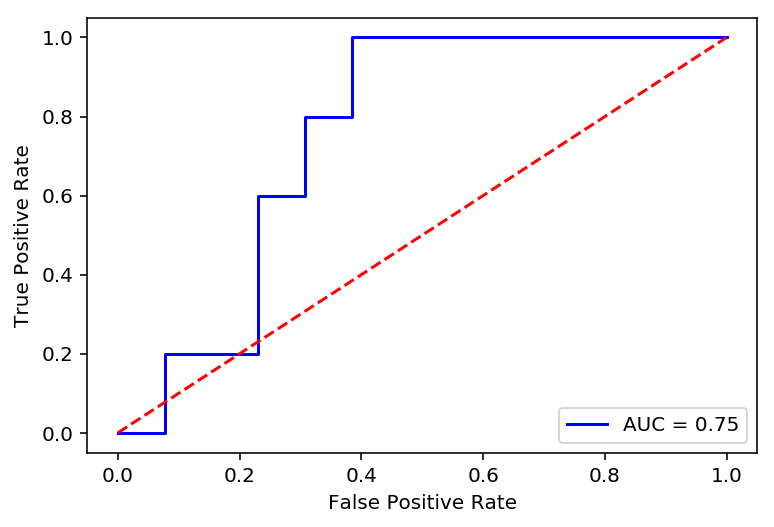

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 36    0.090075
Name: 0, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 0
Similar playlist contains 0 potentially recommendable songs
0 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 36    0.090075
3     0.053116
Name: 0, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 2
Similar playlist contains 2 potentially recommendable songs
2 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 36    0.090075
3     0.053116
49    0.044710
Name: 0, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
3 recommende

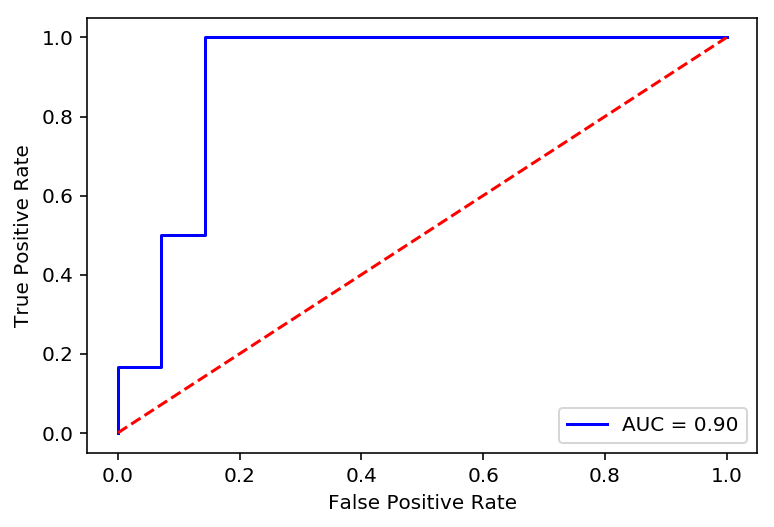

Found optimized model
Sample number 1 AUC of 0.7582417582417582 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 2 AUC of 0.8400000000000001 Threshold of 0.9 Recall score of 0.8
Sample number 3 AUC of 0.78125 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.63 Threshold of 0.9 Recall score of 0.3
Sample number 5 AUC of 0.7604166666666666 Threshold of 0.9 Recall score of 0.75
Sample number 6 AUC of 0.5520833333333333 Threshold of 0.9 Recall score of 0.375
Sample number 7 AUC of 0.6607142857142857 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 8 AUC of 0.8681318681318683 Threshold of 0.9 Recall score of 0.15384615384615385
Sample number 9 AUC of 0.803921568627451 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 10 AUC of 0.8133333333333334 Threshold of 0.8 Recall score of 0.6
Sample number 11 AUC of 0.71875 Threshold of 0.8 Recall score of 0.375
Sample number 12 AUC of 0.797979797979798 Threshold of 0.8 Recall score of 0.3

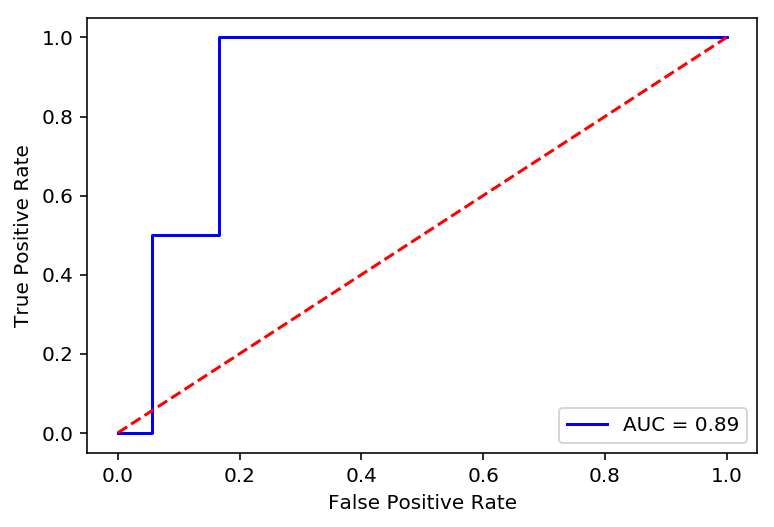

Found optimized model
Sample number 1 AUC of 0.909090909090909 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 2 AUC of 0.7857142857142857 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 3 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.6
Sample number 4 AUC of 0.9450549450549449 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 5 AUC of 0.7916666666666666 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.6799999999999999 Threshold of 0.9 Recall score of 0.2
Sample number 7 AUC of 0.9642857142857144 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 8 AUC of 0.6565656565656566 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 9 AUC of 0.7866666666666666 Threshold of 0.9 Recall score of 0.8
Sample number 10 AUC of 0.75 Threshold of 0.8 Recall score of 0.5
Sample number 11 AUC of 0.8282828282828283 Threshold of 0.8 Recall score of 0.6666666666666666
Sample number 12 AUC of 0.69047

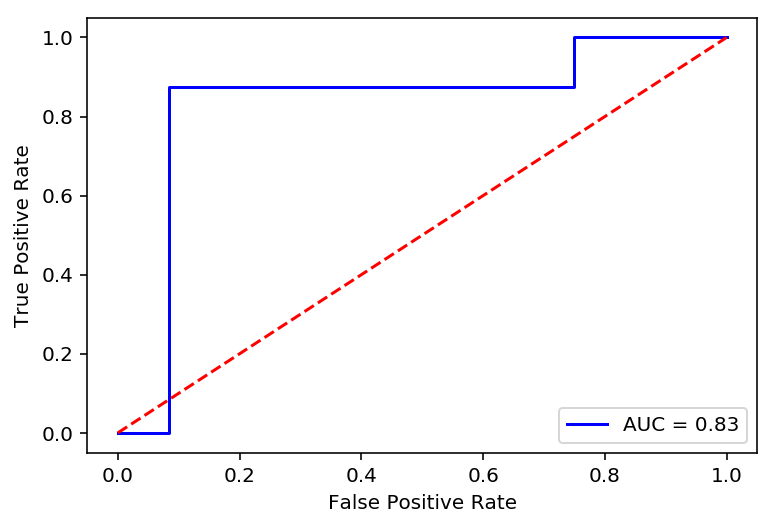

Found optimized model
Sample number 1 AUC of 0.8095238095238096 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 2 AUC of 0.8901098901098901 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 3 AUC of 0.765625 Threshold of 0.9 Recall score of 0.75
Sample number 4 AUC of 0.5384615384615384 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 5 AUC of 0.6666666666666666 Threshold of 0.9 Recall score of 0.6
Sample number 6 AUC of 0.8690476190476191 Threshold of 0.9 Recall score of 1.0


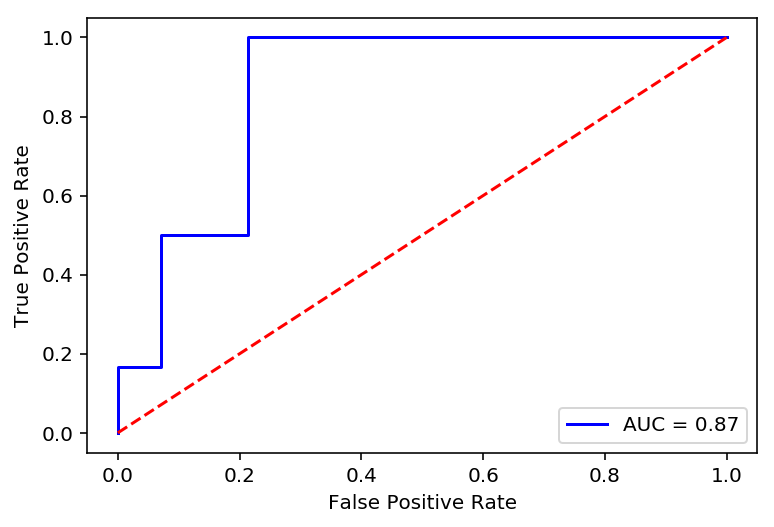

Found optimized model
Sample number 1 AUC of 0.7066666666666667 Threshold of 0.9 Recall score of 0.6
Sample number 2 AUC of 0.8406593406593407 Threshold of 0.9 Recall score of 0.8571428571428571
Sample number 3 AUC of 0.5595238095238095 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.5625 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.7979797979797979 Threshold of 0.9 Recall score of 0.8888888888888888
Sample number 6 AUC of 0.8585858585858586 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.7802197802197803 Threshold of 0.9 Recall score of 0.7142857142857143
Sample number 8 AUC of 0.8095238095238095 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 9 AUC of 0.8133333333333334 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.41 Threshold of 0.8 Recall score of 0.2
Sample number 11 AUC of 0.7333333333333334 Threshold of 0.8 Recall score of 0.6
Sample number 12 AUC of 0.404040404040404 Threshold of 0.8 Recall score o

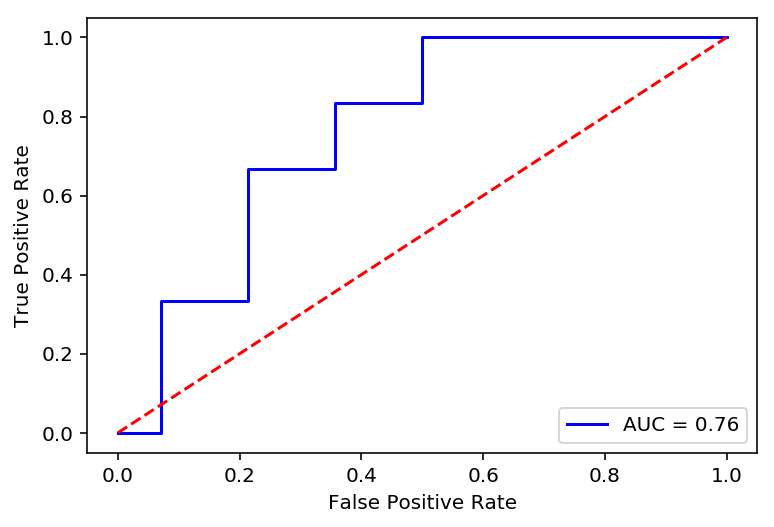

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 3    0.16855
Name: 5, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 35
Similar playlist contains 35 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Ultimate Rave Mix
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 43    0.141397
Name: 11, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.5795454545454545 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 2 AUC of 0.49176954732510286 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 0.6799999999999999 Threshold of 0.9 Recall score of 0.36363636363636365
Sample number 4 AUC of 0.5347222222222222 Thre

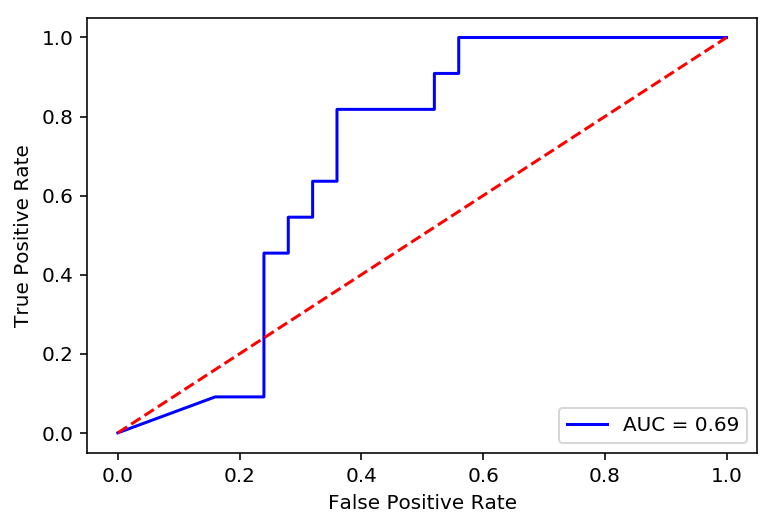

Found optimized model
Sample number 1 AUC of 0.673611111111111 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 2 AUC of 0.4305555555555556 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 3 AUC of 0.47115384615384615 Threshold of 0.9 Recall score of 0.2
Sample number 4 AUC of 0.6181818181818182 Threshold of 0.9 Recall score of 0.5454545454545454
Sample number 5 AUC of 0.4397321428571428 Threshold of 0.9 Recall score of 0.375
Sample number 6 AUC of 0.4923076923076923 Threshold of 0.9 Recall score of 0.4
Sample number 7 AUC of 0.6981818181818182 Threshold of 0.9 Recall score of 0.09090909090909091
Sample number 8 AUC of 0.5545454545454545 Threshold of 0.9 Recall score of 0.5454545454545454
Sample number 9 AUC of 0.40625 Threshold of 0.9 Recall score of 0.08333333333333333
Sample number 10 AUC of 0.44891640866873067 Threshold of 0.8 Recall score of 0.11764705882352941
Sample number 11 AUC of 0.6421404682274248 Threshold of 0.8 Recall score of 0.38461538

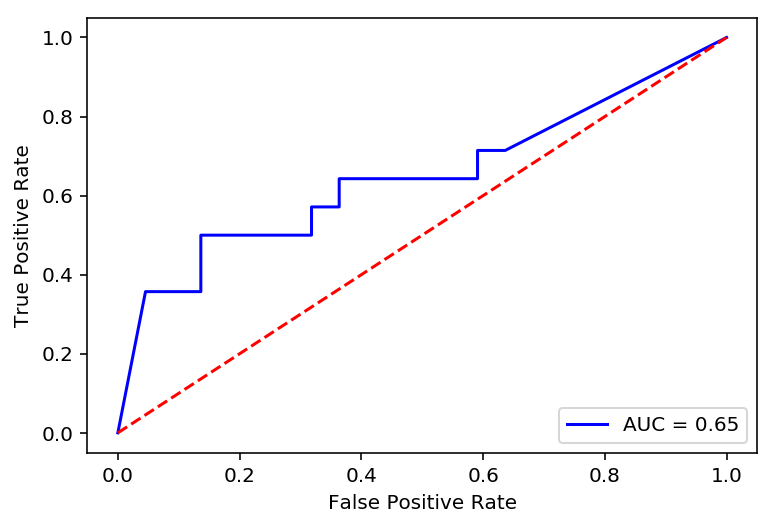

Found optimized model
Sample number 1 AUC of 0.8423076923076924 Threshold of 0.9 Recall score of 0.6
Sample number 2 AUC of 0.7395833333333334 Threshold of 0.9 Recall score of 0.75
Sample number 3 AUC of 0.6290909090909091 Threshold of 0.9 Recall score of 0.36363636363636365
Sample number 4 AUC of 0.5758928571428572 Threshold of 0.9 Recall score of 0.375
Sample number 5 AUC of 0.6473214285714285 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.2727272727272727 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.4897119341563786 Threshold of 0.9 Recall score of 0.1111111111111111
Sample number 8 AUC of 0.5584415584415584 Threshold of 0.9 Recall score of 0.35714285714285715
Sample number 9 AUC of 0.763888888888889 Threshold of 0.9 Recall score of 0.5833333333333334
Sample number 10 AUC of 0.6460317460317461 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 11 AUC of 0.5072727272727273 Threshold of 0.8 Recall score of 0.18181818181818182
Sample numbe

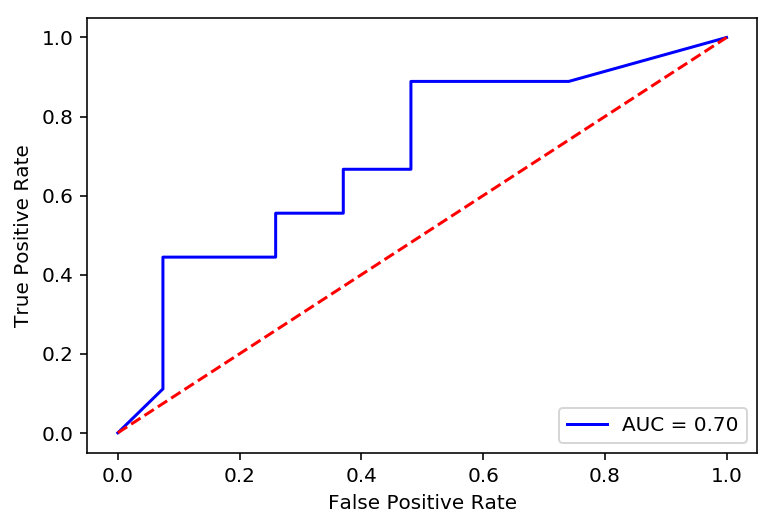

Found optimized model
Sample number 1 AUC of 0.6163194444444444 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 2 AUC of 0.55 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.42380952380952375 Threshold of 0.9 Recall score of 0.13333333333333333
Sample number 4 AUC of 0.5346153846153846 Threshold of 0.9 Recall score of 0.1
Sample number 5 AUC of 0.32098765432098764 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 6 AUC of 0.6654545454545454 Threshold of 0.9 Recall score of 0.09090909090909091
Sample number 7 AUC of 0.61371237458194 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 8 AUC of 0.7508361204013377 Threshold of 0.9 Recall score of 0.3076923076923077
Sample number 9 AUC of 0.4967532467532467 Threshold of 0.9 Recall score of 0.21428571428571427
Sample number 10 AUC of 0.5509090909090908 Threshold of 0.8 Recall score of 0.2727272727272727
Sample number 11 AUC of 0.6436363636363637 Threshold of 0.8 Recall score of 0

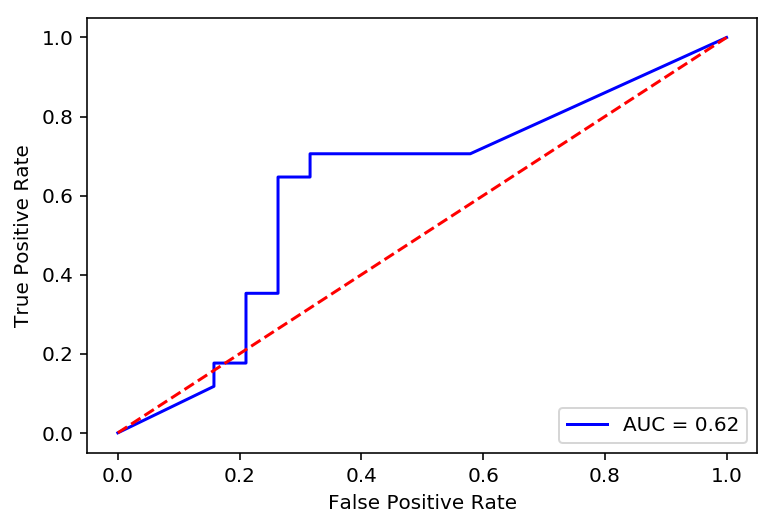

Found optimized model
Sample number 1 AUC of 0.576923076923077 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.5031746031746032 Threshold of 0.9 Recall score of 0.26666666666666666
Sample number 3 AUC of 0.4923076923076923 Threshold of 0.9 Recall score of 0.1
Sample number 4 AUC of 0.6145833333333334 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 5 AUC of 0.5127272727272727 Threshold of 0.9 Recall score of 0.09090909090909091
Sample number 6 AUC of 0.5868055555555556 Threshold of 0.9 Recall score of 0.25
Sample number 7 AUC of 0.41964285714285715 Threshold of 0.9 Recall score of 0.25
Sample number 8 AUC of 0.6458333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.862876254180602 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 10 AUC of 0.6631944444444444 Threshold of 0.8 Recall score of 0.08333333333333333
Sample number 11 AUC of 0.2881944444444444 Threshold of 0.8 Recall score of 0.25
Sample numb

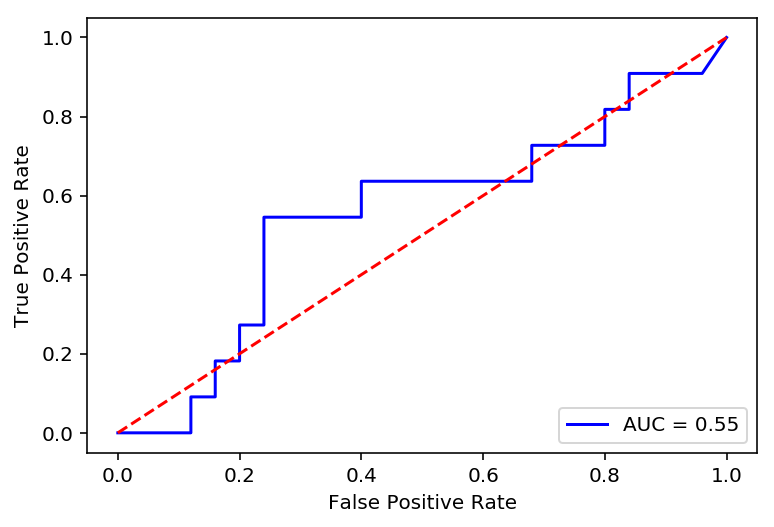

Found optimized model
Classifying on 5 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 43    0.141397
Name: 11, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 22
Similar playlist contains 22 potentially recommendable songs
22 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 43    0.141397
17    0.085913
Name: 11, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 19
Similar playlist contains 19 potentially recommendable songs
---Recommendation complete---
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Melodic
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 22    0.518188
Name: 39, dtype: float64
---Train CBF model---
Training model on seed playlist

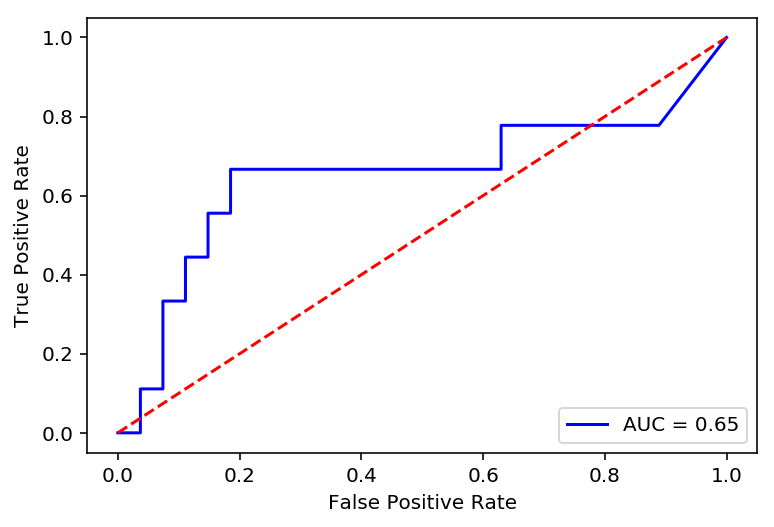

Found optimized model
Sample number 1 AUC of 0.7115384615384616 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.6254180602006689 Threshold of 0.9 Recall score of 0.38461538461538464
Sample number 3 AUC of 0.65625 Threshold of 0.9 Recall score of 0.375
Sample number 4 AUC of 0.6284722222222222 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.6473214285714286 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.7301587301587302 Threshold of 0.9 Recall score of 0.26666666666666666
Sample number 7 AUC of 0.5018181818181817 Threshold of 0.9 Recall score of 0.36363636363636365
Sample number 8 AUC of 0.584375 Threshold of 0.9 Recall score of 0.3125
Sample number 9 AUC of 0.5634615384615385 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.7508361204013378 Threshold of 0.8 Recall score of 0.5384615384615384
Sample number 11 AUC of 0.44727272727272727 Threshold of 0.8 Recall score of 0.5454545454545454
Sample number 12 AUC of 0.5596707818930041 T

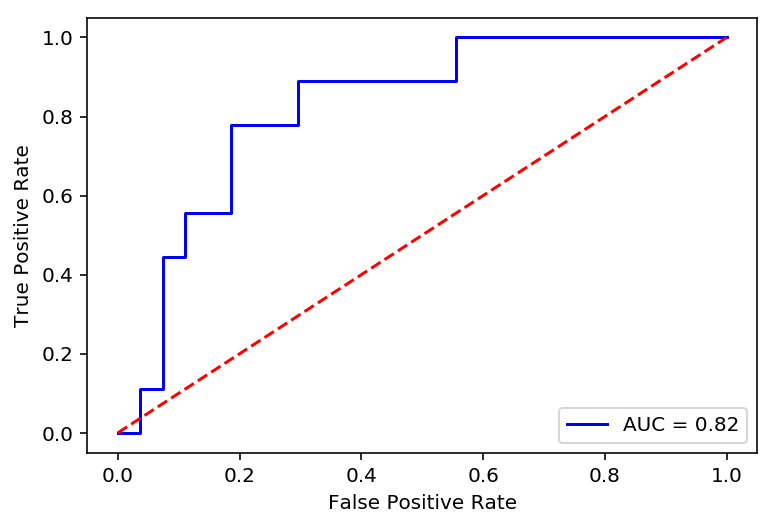

Found optimized model
Sample number 1 AUC of 0.6763636363636363 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 2 AUC of 0.8100649350649352 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 3 AUC of 0.4496527777777778 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 4 AUC of 0.46923076923076923 Threshold of 0.9 Recall score of 0.2
Sample number 5 AUC of 0.5781818181818181 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 6 AUC of 0.7290969899665551 Threshold of 0.9 Recall score of 0.46153846153846156
Sample number 7 AUC of 0.531772575250836 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 8 AUC of 0.5227272727272727 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 9 AUC of 0.6204013377926422 Threshold of 0.9 Recall score of 0.38461538461538464
Sample number 10 AUC of 0.6904761904761905 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 11 AUC of 0.7569444444444444 Thres

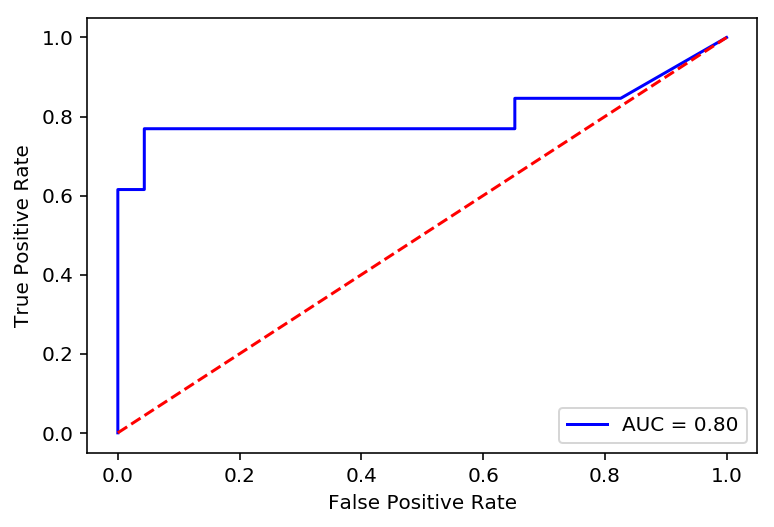

Found optimized model
Sample number 1 AUC of 0.4666666666666667 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.6365384615384615 Threshold of 0.9 Recall score of 0.5
Sample number 3 AUC of 0.6801948051948052 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.6831275720164609 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 5 AUC of 0.6071428571428572 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.705685618729097 Threshold of 0.9 Recall score of 0.5384615384615384
Sample number 7 AUC of 0.475 Threshold of 0.9 Recall score of 0.3
Sample number 8 AUC of 0.628125 Threshold of 0.9 Recall score of 0.1875
Sample number 9 AUC of 0.6454849498327759 Threshold of 0.9 Recall score of 0.3076923076923077
Sample number 10 AUC of 0.6076388888888888 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 11 AUC of 0.6655518394648829 Threshold of 0.8 Recall score of 0.46153846153846156
Sample number 12 AUC of 0.55769230769

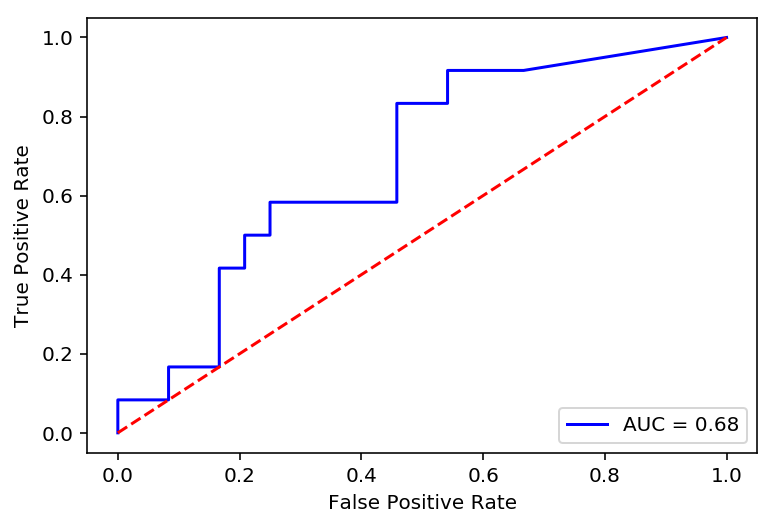

Found optimized model
Sample number 1 AUC of 0.7407407407407407 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 2 AUC of 0.6444444444444445 Threshold of 0.9 Recall score of 0.5333333333333333
Sample number 3 AUC of 0.4916387959866221 Threshold of 0.9 Recall score of 0.3076923076923077
Sample number 4 AUC of 0.4765886287625418 Threshold of 0.9 Recall score of 0.23076923076923078
Sample number 5 AUC of 0.5390946502057613 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 6 AUC of 0.3090277777777778 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 7 AUC of 0.5625 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 8 AUC of 0.6038461538461539 Threshold of 0.9 Recall score of 0.5
Sample number 9 AUC of 0.36383928571428575 Threshold of 0.9 Recall score of 0.125
Sample number 10 AUC of 0.6222222222222222 Threshold of 0.8 Recall score of 0.4
Sample number 11 AUC of 0.6579861111111112 Threshold of 0.8 Recall score of 0.33333333333

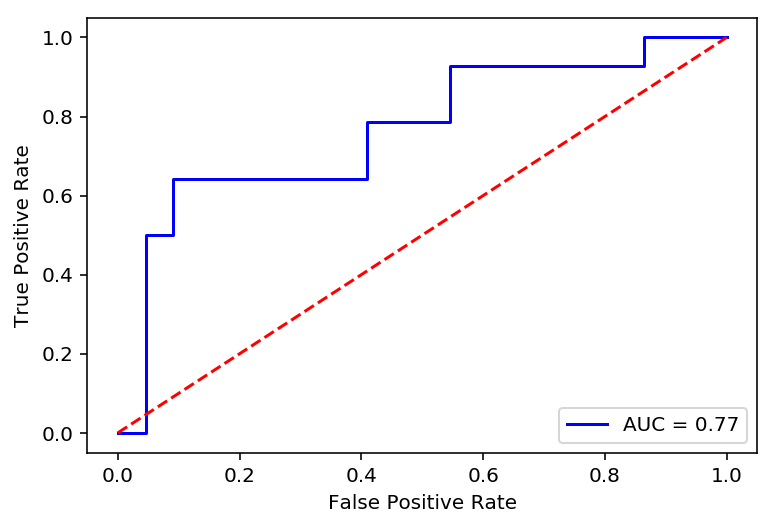

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 22    0.518188
Name: 39, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
1 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 22    0.518188
17    0.154046
Name: 39, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 5
Similar playlist contains 5 potentially recommendable songs
6 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 22    0.518188
17    0.154046
25    0.145741
Name: 39, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 10
Similar playlist contains 10 potentially recommendable songs
16 reco

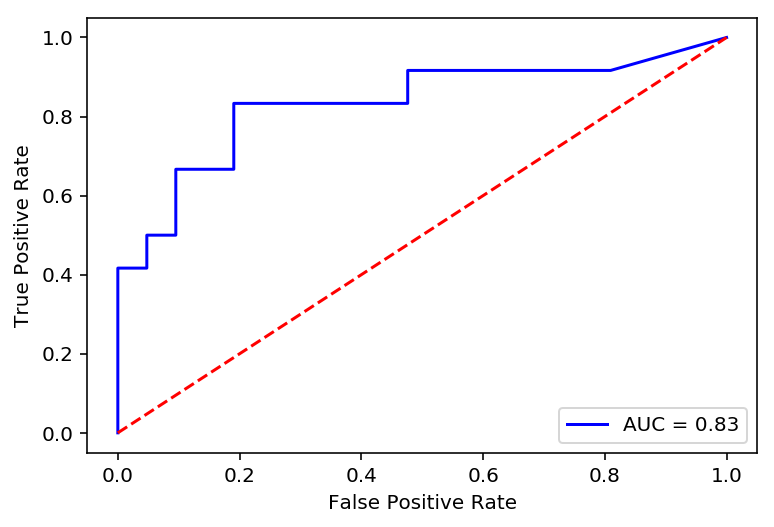

Found optimized model
Sample number 1 AUC of 0.45833333333333326 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 2 AUC of 0.6468253968253969 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 3 AUC of 0.6487603305785123 Threshold of 0.9 Recall score of 0.18181818181818182
Sample number 4 AUC of 0.8565217391304348 Threshold of 0.9 Recall score of 0.6
Sample number 5 AUC of 0.6322314049586777 Threshold of 0.9 Recall score of 0.45454545454545453
Sample number 6 AUC of 0.515 Threshold of 0.9 Recall score of 0.375
Sample number 7 AUC of 0.4956521739130435 Threshold of 0.9 Recall score of 0.3
Sample number 8 AUC of 0.6425619834710744 Threshold of 0.9 Recall score of 0.6363636363636364
Sample number 9 AUC of 0.6616541353383458 Threshold of 0.9 Recall score of 0.21428571428571427
Sample number 10 AUC of 0.665289256198347 Threshold of 0.8 Recall score of 0.18181818181818182
Sample number 11 AUC of 0.42142857142857143 Threshold of 0.8 Recall score of 0.2
Sample 

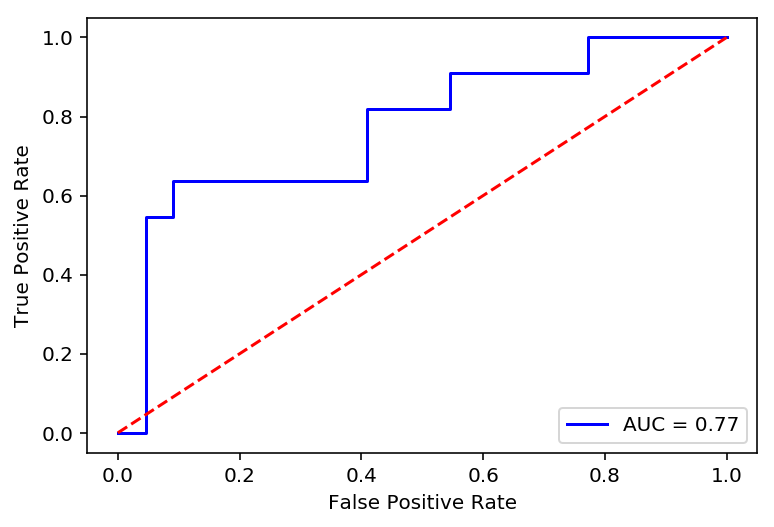

Found optimized model
Sample number 1 AUC of 0.4962962962962963 Threshold of 0.9 Recall score of 0.26666666666666666
Sample number 2 AUC of 0.4305555555555555 Threshold of 0.9 Recall score of 0.2222222222222222
Sample number 3 AUC of 0.46 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.5357142857142857 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 5 AUC of 0.5206611570247934 Threshold of 0.9 Recall score of 0.36363636363636365
Sample number 6 AUC of 0.5695652173913044 Threshold of 0.9 Recall score of 0.4
Sample number 7 AUC of 0.6031746031746033 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 8 AUC of 0.5538461538461539 Threshold of 0.9 Recall score of 0.3076923076923077
Sample number 9 AUC of 0.5130434782608696 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.823076923076923 Threshold of 0.8 Recall score of 0.46153846153846156
Sample number 11 AUC of 0.5833333333333333 Threshold of 0.8 Recall score of 0.5
Sample numbe

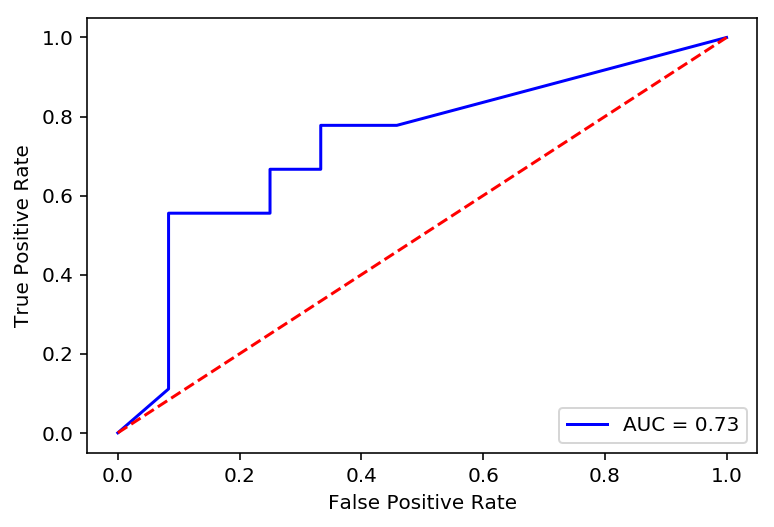

Found optimized model
Sample number 1 AUC of 0.635 Threshold of 0.9 Recall score of 0.5
Sample number 2 AUC of 0.7142857142857143 Threshold of 0.9 Recall score of 0.25
Sample number 3 AUC of 0.6507936507936508 Threshold of 0.9 Recall score of 0.75
Sample number 4 AUC of 0.5972222222222223 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 5 AUC of 0.78099173553719 Threshold of 0.9 Recall score of 0.18181818181818182
Sample number 6 AUC of 0.5111111111111112 Threshold of 0.9 Recall score of 0.13333333333333333
Sample number 7 AUC of 0.5111111111111111 Threshold of 0.9 Recall score of 0.2
Sample number 8 AUC of 0.5439560439560439 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 9 AUC of 0.48351648351648346 Threshold of 0.9 Recall score of 0.14285714285714285
Sample number 10 AUC of 0.4421487603305784 Threshold of 0.8 Recall score of 0.2727272727272727
Sample number 11 AUC of 0.62 Threshold of 0.8 Recall score of 0.25
Sample number 12 AUC of 0.633333333333

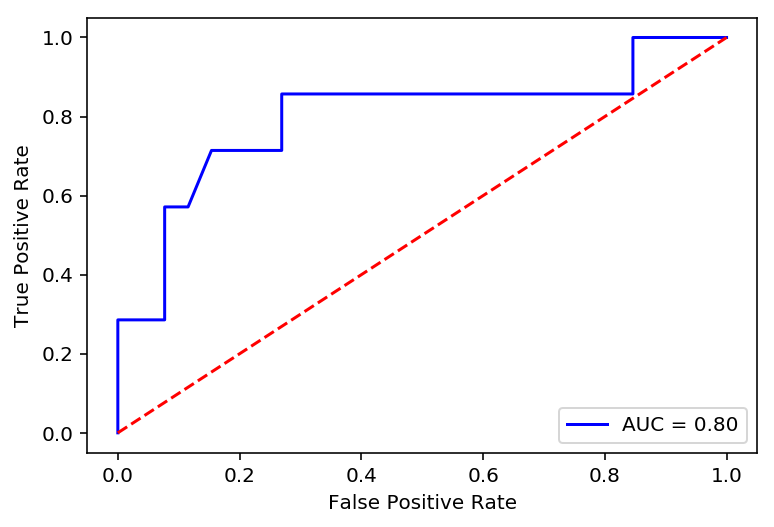

Found optimized model
Sample number 1 AUC of 0.7103174603174603 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.45679012345679015 Threshold of 0.9 Recall score of 0.16666666666666666
Sample number 3 AUC of 0.6225 Threshold of 0.9 Recall score of 0.375
Sample number 4 AUC of 0.5300925925925926 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 5 AUC of 0.39669421487603307 Threshold of 0.9 Recall score of 0.09090909090909091
Sample number 6 AUC of 0.65 Threshold of 0.9 Recall score of 0.375
Sample number 7 AUC of 0.44999999999999996 Threshold of 0.9 Recall score of 0.25
Sample number 8 AUC of 0.3815789473684211 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 9 AUC of 0.6608695652173914 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.4888888888888888 Threshold of 0.8 Recall score of 0.26666666666666666
Sample number 11 AUC of 0.7000000000000001 Threshold of 0.8 Recall score of 0.4
Sample number 12 AUC of 0.6 Thre

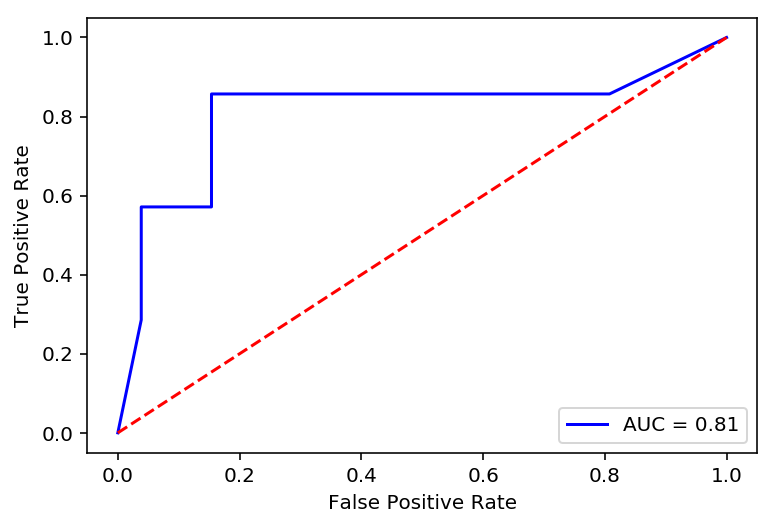

Found optimized model
Classifying on 3 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 39    0.518188
Name: 22, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 4 potentially recommendable songs
4 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 39    0.518188
38    0.113228
Name: 22, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
5 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 39    0.518188
38    0.113228
25    0.109086
Name: 22, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 12
Similar playlist contains 12 potentially recommendable songs
17 reco

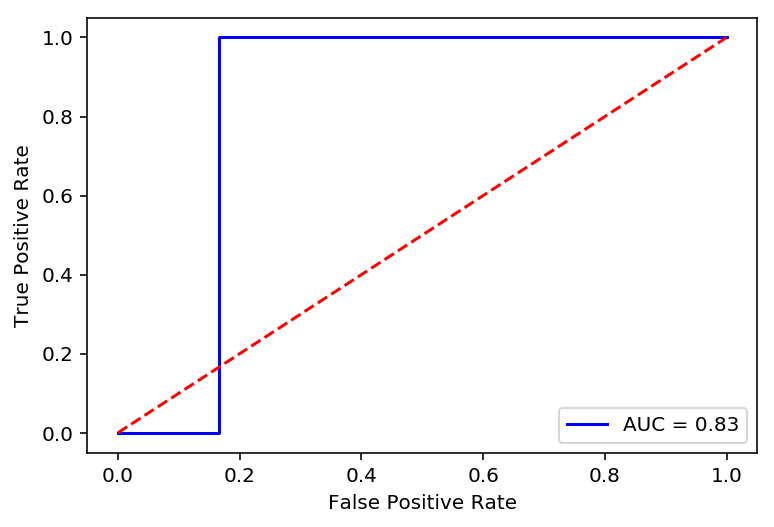

Found optimized model
Sample number 1 AUC of 0.3333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.08333333333333331 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.4666666666666666 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.5999999999999999 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 5 AUC of 0.4166666666666667 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.7500000000000001 Threshold of 0.9 Recall score of 1.0


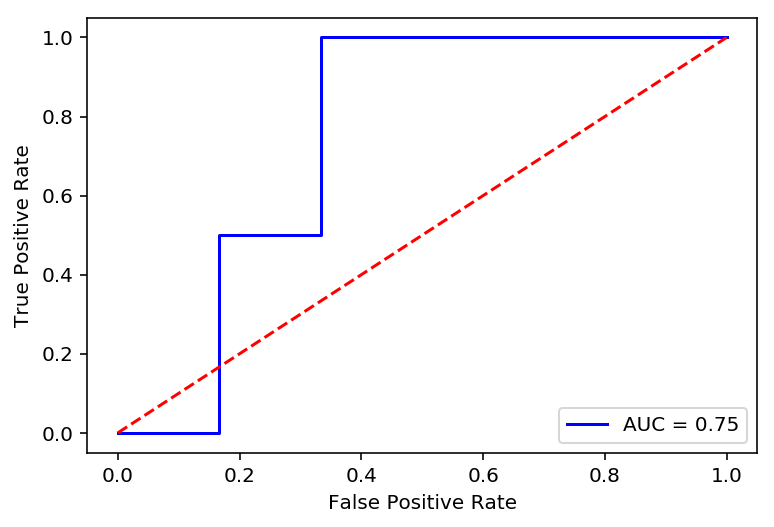

Found optimized model
Sample number 1 AUC of 0.7333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 2 AUC of 0.6 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 3 AUC of 0.3333333333333333 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.4285714285714286 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.0 Threshold of 0.9 Recall score of 0.0
Sample number 6 AUC of 0.26666666666666666 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.39999999999999997 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 8 AUC of nan Threshold of 0.9 Recall score of 0.0
Sample number 9 AUC of 0.65625 Threshold of 0.9 Recall score of 0.25
Sample number 10 AUC of 0.625 Threshold of 0.8 Recall score of 0.25
Sample number 11 AUC of 0.39999999999999997 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 12 AUC of 0.4666666666666667 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number 13

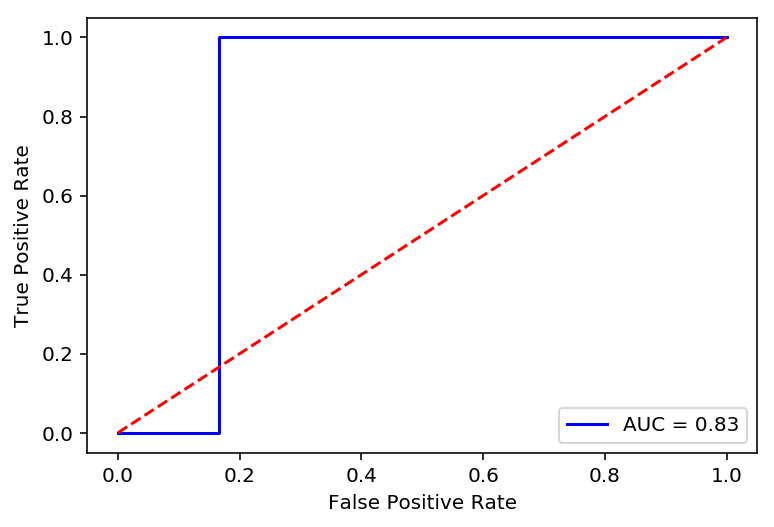

Found optimized model
Sample number 1 AUC of 0.2 Threshold of 0.9 Recall score of 0.2
Sample number 2 AUC of 0.8333333333333334 Threshold of 0.9 Recall score of 0.0
Sample number 3 AUC of 0.4375 Threshold of 0.9 Recall score of 0.25
Sample number 4 AUC of 0.75 Threshold of 0.9 Recall score of 0.5
Sample number 5 AUC of 0.8 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 6 AUC of 0.75 Threshold of 0.9 Recall score of 0.25
Sample number 7 AUC of 0.6875 Threshold of 0.9 Recall score of 0.5
Sample number 8 AUC of 0.3333333333333333 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 9 AUC of 0.875 Threshold of 0.9 Recall score of 0.75
Sample number 10 AUC of 0.5 Threshold of 0.8 Recall score of 0.4
Sample number 11 AUC of 0.625 Threshold of 0.8 Recall score of 0.25
Sample number 12 AUC of 0.4375 Threshold of 0.8 Recall score of 0.25
Sample number 13 AUC of 0.5 Threshold of 0.8 Recall score of 0.5
Sample number 14 AUC of 0.6666666666666667 Threshold of 0.8 Re

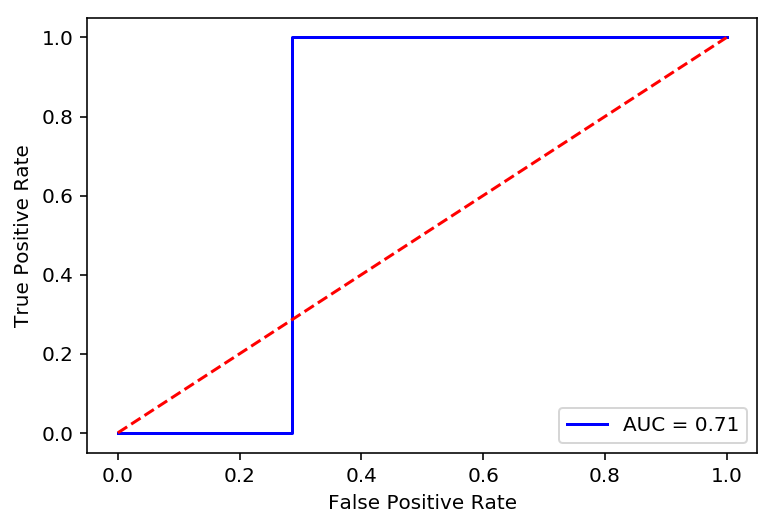

Found optimized model
Sample number 1 AUC of 0.19999999999999998 Threshold of 0.9 Recall score of 0.0
Sample number 2 AUC of 0.8333333333333333 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 3 AUC of 0.375 Threshold of 0.9 Recall score of 0.0
Sample number 4 AUC of 0.06666666666666668 Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.6666666666666667 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of nan Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.5333333333333333 Threshold of 0.9 Recall score of 0.4
Sample number 8 AUC of 0.3 Threshold of 0.9 Recall score of 0.0
Sample number 9 AUC of 0.5714285714285714 Threshold of 0.9 Recall score of 0.0
Sample number 10 AUC of 0.2857142857142857 Threshold of 0.8 Recall score of 0.0
Sample number 11 AUC of 0.14285714285714285 Threshold of 0.8 Recall score of 0.0
Sample number 12 AUC of 0.8571428571428572 Threshold of 0.8 Recall score of 1.0


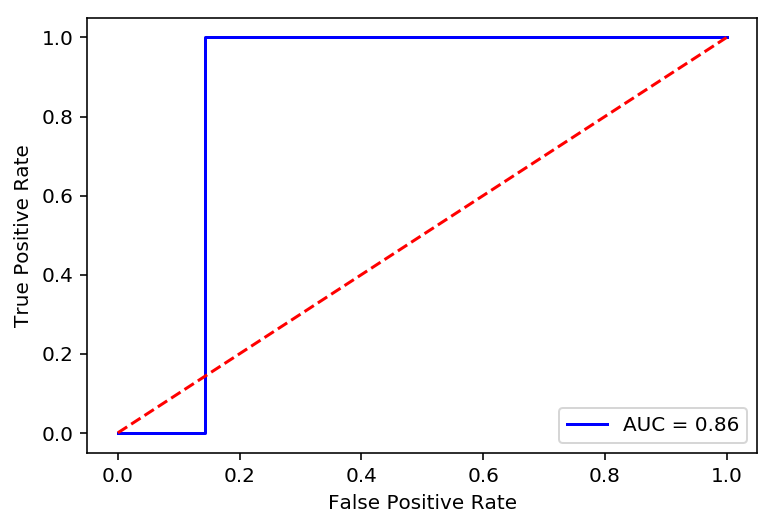

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 25    0.222328
Name: 38, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 17
Similar playlist contains 17 potentially recommendable songs
17 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 25    0.222328
22    0.113228
Name: 38, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 4
Similar playlist contains 4 potentially recommendable songs
21 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 25    0.222328
22    0.113228
39    0.109254
Name: 38, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 3
Similar playlist contains 3 potentially recommendable songs
24 re

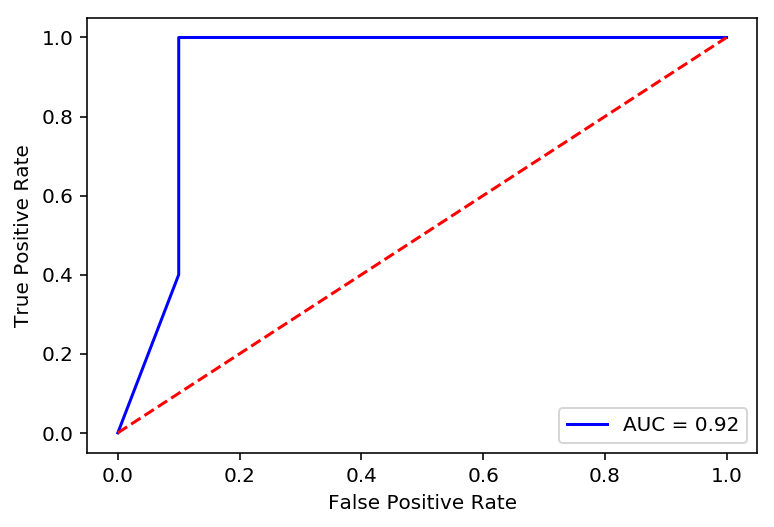

Found optimized model
Sample number 1 AUC of 0.8300000000000001 Threshold of 0.9 Recall score of 0.6
Sample number 2 AUC of 0.8888888888888888 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 3 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


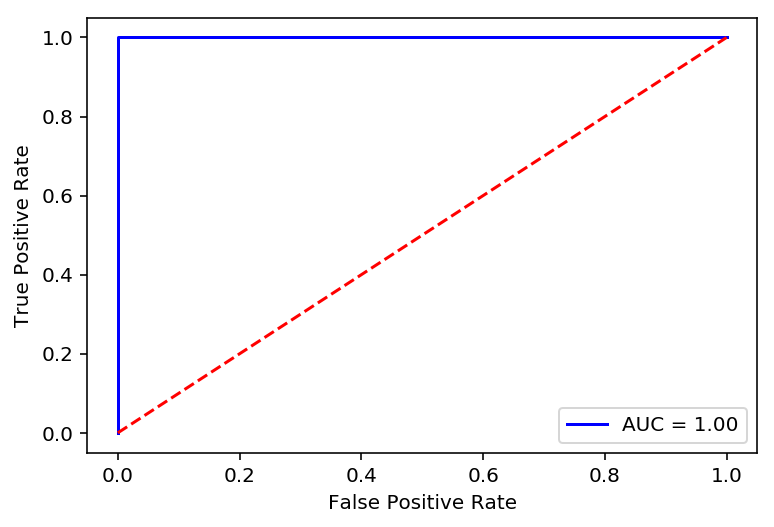

Found optimized model
Sample number 1 AUC of 0.8981481481481481 Threshold of 0.9 Recall score of 0.7777777777777778
Sample number 2 AUC of 0.8863636363636362 Threshold of 0.9 Recall score of 1.0


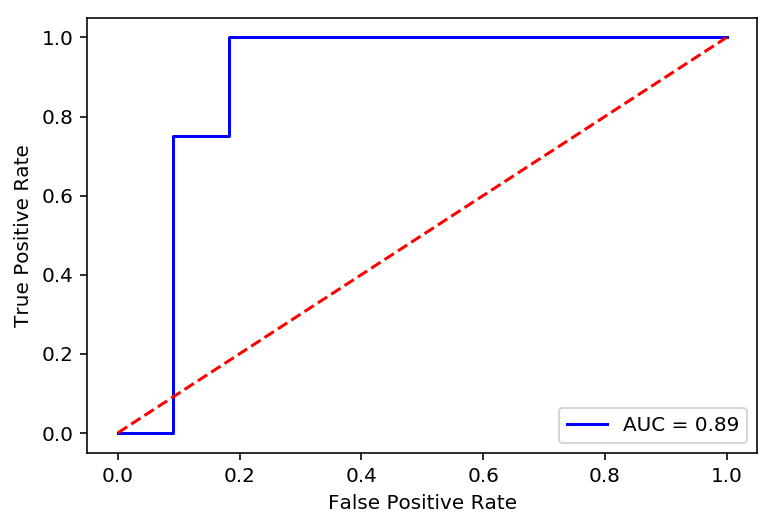

Found optimized model
Sample number 1 AUC of 0.9722222222222222 Threshold of 0.9 Recall score of 1.0


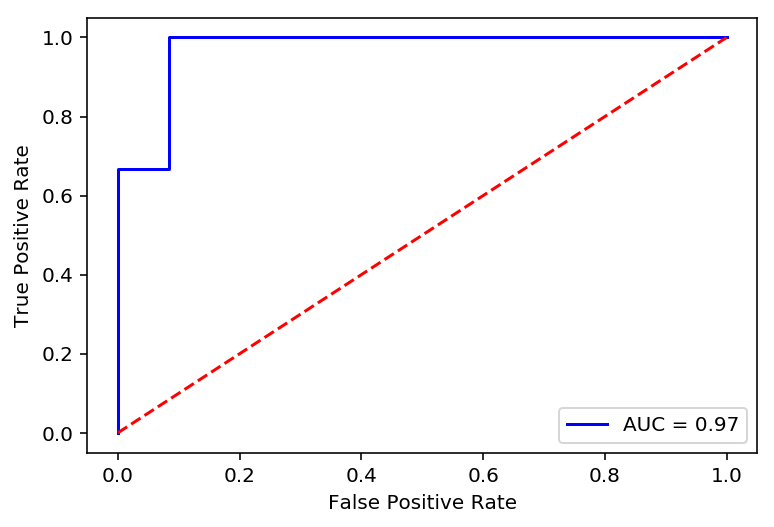

Found optimized model
Sample number 1 AUC of 0.86 Threshold of 0.9 Recall score of 1.0


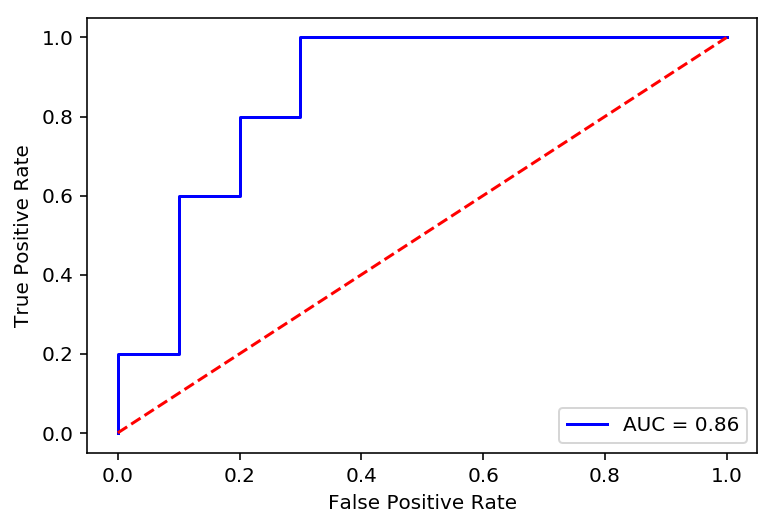

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 25    0.209653
Name: 9, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 25
Similar playlist contains 25 potentially recommendable songs
25 recommended songs
Processing the next most similar playlist
25 recommended songs
----------------------Recommendation complete------------------------
Recommending songs based on playlist Techno Electro - Fourre tout
Creating sparse matrix
Computing cosine similarities between playlists
Most similar playlists: 38    0.222328
Name: 25, dtype: float64
---Train CBF model---
Training model on seed playlist
Sample number 1 AUC of 0.5405555555555556 Threshold of 0.9 Recall score of 0.34
Sample number 2 AUC of 0.6180152394775036 Threshold of 0.9 Recall score of 0.36538461538461536
Sample number 3 AUC of 0.5920835623969214 Threshold of 0.9 Recall score of 0.3137254901960784
Sample number 4

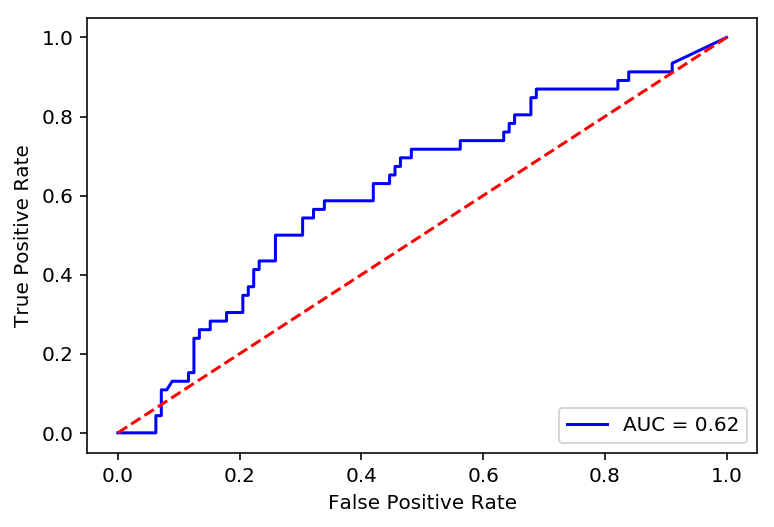

Found optimized model
Sample number 1 AUC of 0.6334316617502459 Threshold of 0.9 Recall score of 0.35555555555555557
Sample number 2 AUC of 0.6137068965517242 Threshold of 0.9 Recall score of 0.43103448275862066
Sample number 3 AUC of 0.6434143686502177 Threshold of 0.9 Recall score of 0.2692307692307692
Sample number 4 AUC of 0.5092197204968943 Threshold of 0.9 Recall score of 0.30434782608695654
Sample number 5 AUC of 0.55623973727422 Threshold of 0.9 Recall score of 0.38095238095238093
Sample number 6 AUC of 0.5405119152691968 Threshold of 0.9 Recall score of 0.4
Sample number 7 AUC of 0.6212037037037038 Threshold of 0.9 Recall score of 0.26
Sample number 8 AUC of 0.47351851851851856 Threshold of 0.9 Recall score of 0.32
Sample number 9 AUC of 0.6292144748455428 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.629567519858782 Threshold of 0.8 Recall score of 0.4
Sample number 11 AUC of 0.5766098484848485 Threshold of 0.8 Recall score of 0.3333333333333333
Sample number

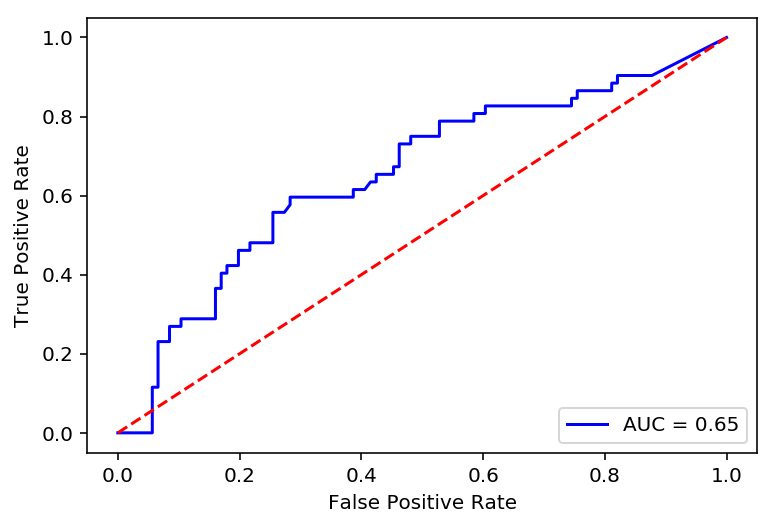

Found optimized model
Sample number 1 AUC of 0.592436974789916 Threshold of 0.9 Recall score of 0.44642857142857145
Sample number 2 AUC of 0.6455555555555557 Threshold of 0.9 Recall score of 0.32
Sample number 3 AUC of 0.6456582633053222 Threshold of 0.9 Recall score of 0.21428571428571427
Sample number 4 AUC of 0.5934322033898306 Threshold of 0.9 Recall score of 0.4
Sample number 5 AUC of 0.5903388878487175 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 6 AUC of 0.7024999999999999 Threshold of 0.9 Recall score of 0.42
Sample number 7 AUC of 0.5246248896734333 Threshold of 0.9 Recall score of 0.34545454545454546
Sample number 8 AUC of 0.6927777777777777 Threshold of 0.9 Recall score of 0.46
Sample number 9 AUC of 0.5832386363636364 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 10 AUC of 0.6641737891737892 Threshold of 0.8 Recall score of 0.42592592592592593
Sample number 11 AUC of 0.5978536420483354 Threshold of 0.8 Recall score of 0.409836065573

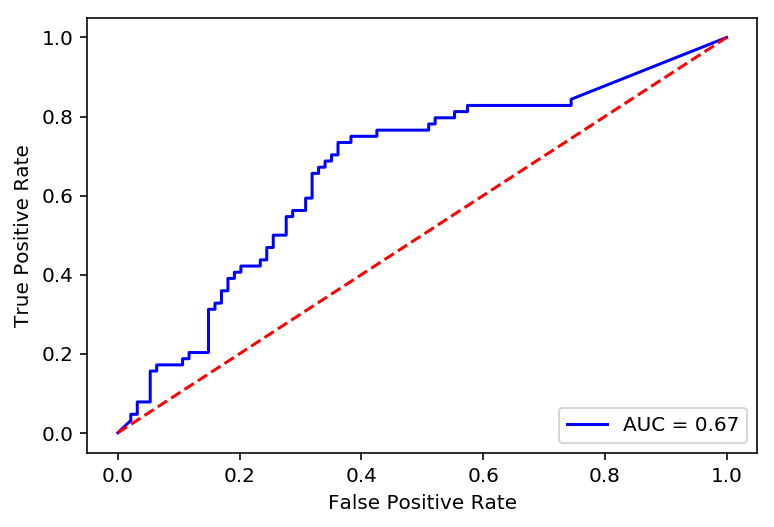

Found optimized model
Sample number 1 AUC of 0.5672222222222222 Threshold of 0.9 Recall score of 0.48
Sample number 2 AUC of 0.6746894409937889 Threshold of 0.9 Recall score of 0.4782608695652174
Sample number 3 AUC of 0.665420739888825 Threshold of 0.9 Recall score of 0.425531914893617
Sample number 4 AUC of 0.6446765622136705 Threshold of 0.9 Recall score of 0.43137254901960786
Sample number 5 AUC of 0.6198979591836735 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 6 AUC of 0.6258971291866028 Threshold of 0.9 Recall score of 0.3409090909090909
Sample number 7 AUC of 0.64280237684493 Threshold of 0.9 Recall score of 0.5319148936170213
Sample number 8 AUC of 0.6730803177405119 Threshold of 0.9 Recall score of 0.41818181818181815
Sample number 9 AUC of 0.6087371895084246 Threshold of 0.9 Recall score of 0.38596491228070173
Sample number 10 AUC of 0.5668137687555164 Threshold of 0.8 Recall score of 0.34545454545454546
Sample number 11 AUC of 0.544467787114846 Threshold

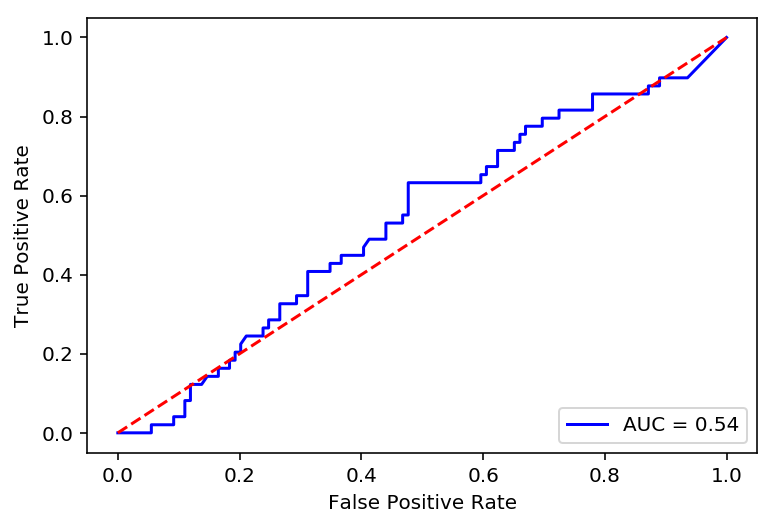

Found optimized model
Sample number 1 AUC of 0.5803703703703703 Threshold of 0.9 Recall score of 0.28
Sample number 2 AUC of 0.5648708081363387 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 0.5836734693877551 Threshold of 0.9 Recall score of 0.4
Sample number 4 AUC of 0.6197471509971509 Threshold of 0.9 Recall score of 0.48148148148148145
Sample number 5 AUC of 0.6177682082007114 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 6 AUC of 0.6573183760683761 Threshold of 0.9 Recall score of 0.4444444444444444
Sample number 7 AUC of 0.6105769230769231 Threshold of 0.9 Recall score of 0.40384615384615385
Sample number 8 AUC of 0.5629829290206649 Threshold of 0.9 Recall score of 0.4716981132075472
Sample number 9 AUC of 0.6671296296296296 Threshold of 0.9 Recall score of 0.4
Sample number 10 AUC of 0.6111205002535068 Threshold of 0.8 Recall score of 0.3114754098360656
Sample number 11 AUC of 0.583843537414966 Threshold of 0.8 Recall score of 0.4

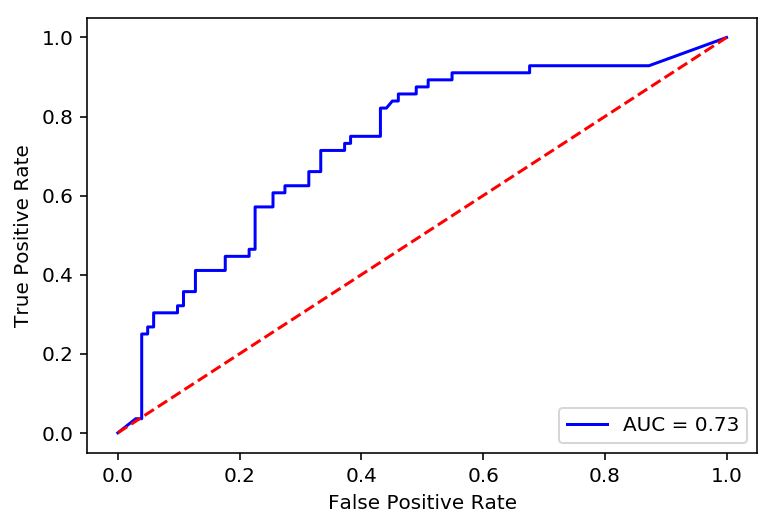

Found optimized model
Classifying on 7 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 38    0.222328
Name: 25, dtype: float64
---Run CBF model---
Classifying new songs
No song recommended
---Run CF model---
Most similar playlist number 2
Most similar playlists: 38    0.222328
9     0.209653
Name: 25, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 1
Similar playlist contains 1 potentially recommendable songs
1 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 38    0.222328
9     0.209653
43    0.200914
Name: 25, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 16
Similar playlist contains 16 potentially recommendable songs
17 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 4
Most similar playlists: 38    0.222328

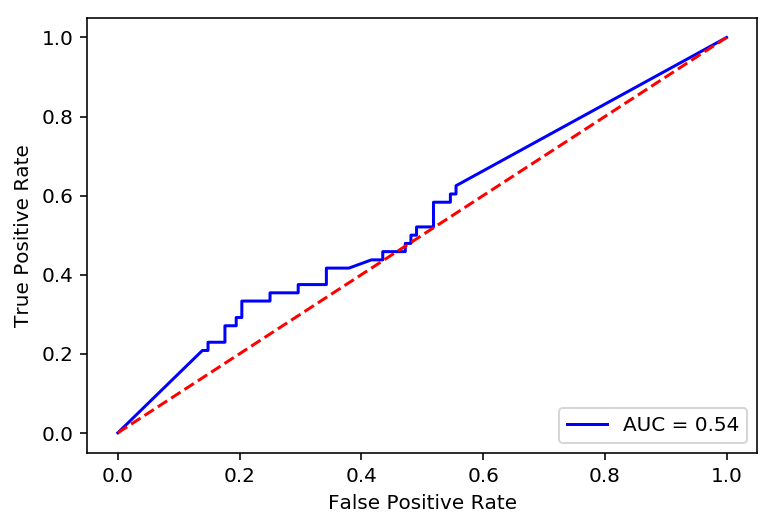

Found optimized model
Sample number 1 AUC of 0.5875 Threshold of 0.9 Recall score of 0.36666666666666664
Sample number 2 AUC of 0.5910377358490566 Threshold of 0.9 Recall score of 0.26
Sample number 3 AUC of 0.6439061605950791 Threshold of 0.9 Recall score of 0.4489795918367347
Sample number 4 AUC of 0.4997341839447102 Threshold of 0.9 Recall score of 0.21052631578947367
Sample number 5 AUC of 0.6391232763943198 Threshold of 0.9 Recall score of 0.3953488372093023
Sample number 6 AUC of 0.5902323892519971 Threshold of 0.9 Recall score of 0.35185185185185186
Sample number 7 AUC of 0.6154154154154153 Threshold of 0.9 Recall score of 0.35555555555555557
Sample number 8 AUC of 0.5570494864612512 Threshold of 0.9 Recall score of 0.3137254901960784
Sample number 9 AUC of 0.5210262345679013 Threshold of 0.9 Recall score of 0.2916666666666667
Sample number 10 AUC of 0.5500620237462343 Threshold of 0.8 Recall score of 0.3508771929824561
Sample number 11 AUC of 0.6044147279721561 Threshold of 0.8

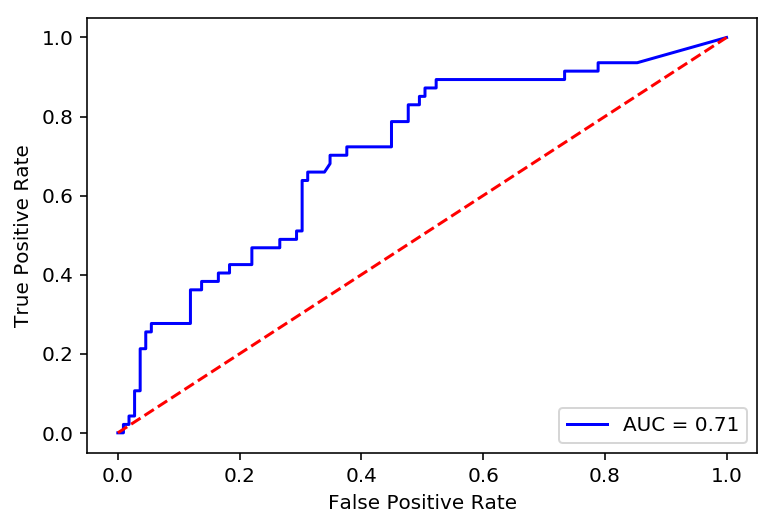

Found optimized model
Sample number 1 AUC of 0.6970443349753694 Threshold of 0.9 Recall score of 0.39655172413793105
Sample number 2 AUC of 0.619212962962963 Threshold of 0.9 Recall score of 0.375
Sample number 3 AUC of 0.5207142857142857 Threshold of 0.9 Recall score of 0.32142857142857145
Sample number 4 AUC of 0.6296296296296295 Threshold of 0.9 Recall score of 0.42105263157894735
Sample number 5 AUC of 0.6789915966386555 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 6 AUC of 0.5197044334975369 Threshold of 0.9 Recall score of 0.2413793103448276
Sample number 7 AUC of 0.6272172420370017 Threshold of 0.9 Recall score of 0.2857142857142857
Sample number 8 AUC of 0.6442901234567903 Threshold of 0.9 Recall score of 0.4166666666666667
Sample number 9 AUC of 0.6261682242990654 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 10 AUC of 0.6172461995456928 Threshold of 0.8 Recall score of 0.3220338983050847
Sample number 11 AUC of 0.624001452432825 Thres

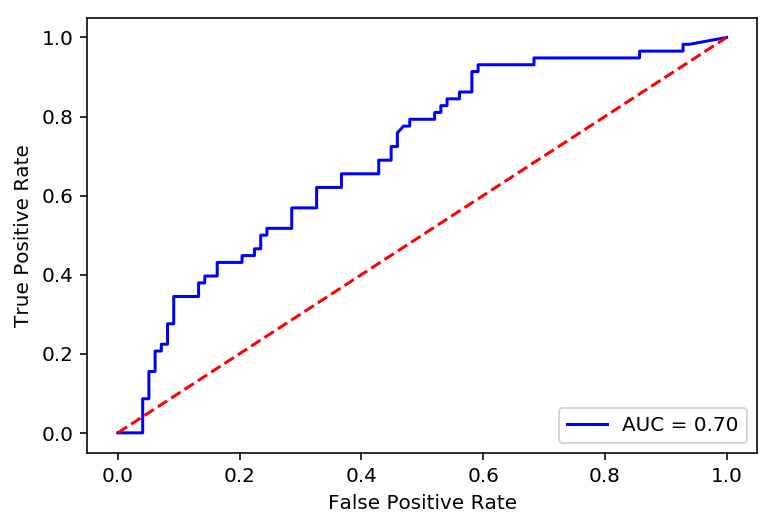

Found optimized model
Sample number 1 AUC of 0.5277229892614508 Threshold of 0.9 Recall score of 0.2564102564102564
Sample number 2 AUC of 0.6205660377358491 Threshold of 0.9 Recall score of 0.42
Sample number 3 AUC of 0.6327632763276327 Threshold of 0.9 Recall score of 0.43636363636363634
Sample number 4 AUC of 0.5814581458145814 Threshold of 0.9 Recall score of 0.34545454545454546
Sample number 5 AUC of 0.6252025202520252 Threshold of 0.9 Recall score of 0.38181818181818183
Sample number 6 AUC of 0.6606603773584906 Threshold of 0.9 Recall score of 0.34
Sample number 7 AUC of 0.6125116713352008 Threshold of 0.9 Recall score of 0.4117647058823529
Sample number 8 AUC of 0.5844936105283235 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 9 AUC of 0.6593792699590084 Threshold of 0.9 Recall score of 0.44680851063829785
Sample number 10 AUC of 0.6544238871588203 Threshold of 0.8 Recall score of 0.3018867924528302
Sample number 11 AUC of 0.6072641509433961 Threshold of 0.8 

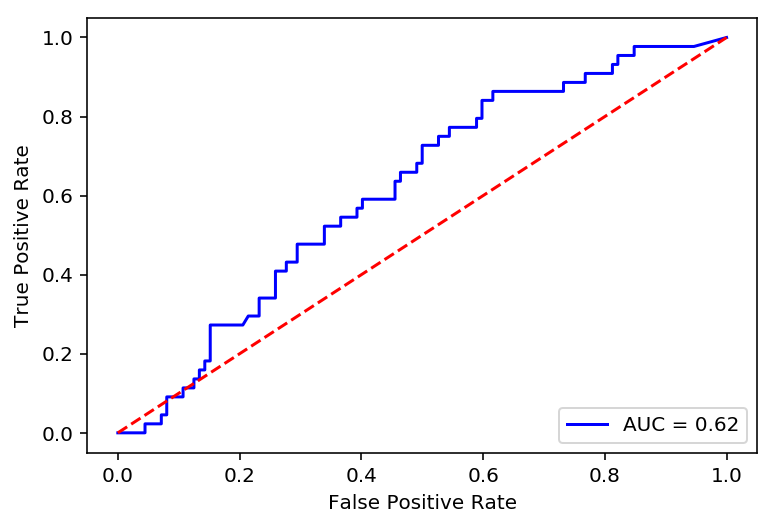

Found optimized model
Sample number 1 AUC of 0.6847087878164231 Threshold of 0.9 Recall score of 0.4186046511627907
Sample number 2 AUC of 0.5822752230610844 Threshold of 0.9 Recall score of 0.3870967741935484
Sample number 3 AUC of 0.5196174116728479 Threshold of 0.9 Recall score of 0.23404255319148937
Sample number 4 AUC of 0.6024872912127813 Threshold of 0.9 Recall score of 0.3148148148148148
Sample number 5 AUC of 0.5220170454545455 Threshold of 0.9 Recall score of 0.2727272727272727
Sample number 6 AUC of 0.6043478260869566 Threshold of 0.9 Recall score of 0.2826086956521739
Sample number 7 AUC of 0.5710377358490566 Threshold of 0.9 Recall score of 0.28
Sample number 8 AUC of 0.59375 Threshold of 0.9 Recall score of 0.375
Sample number 9 AUC of 0.5941071428571428 Threshold of 0.9 Recall score of 0.375
Sample number 10 AUC of 0.5705641225844231 Threshold of 0.8 Recall score of 0.23404255319148937
Sample number 11 AUC of 0.5520754716981132 Threshold of 0.8 Recall score of 0.26
Sampl

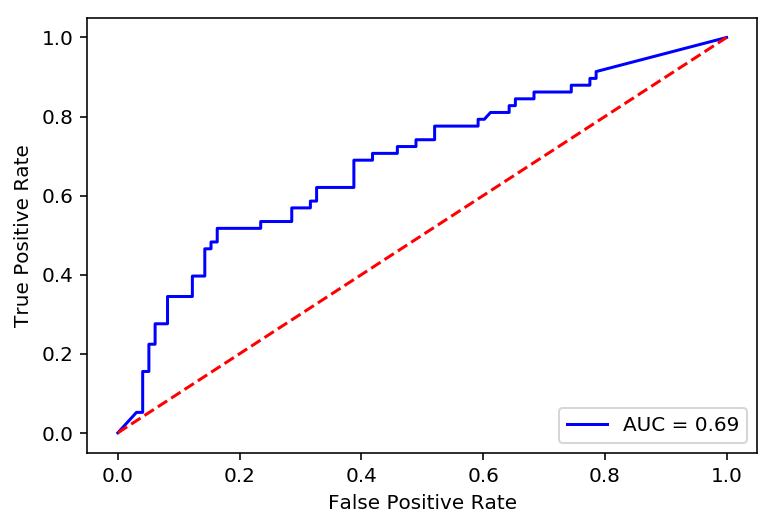

Found optimized model
Classifying on 4 features
---Run CF model---
Most similar playlist number 1
Most similar playlists: 3    0.159962
Name: 4, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 6
Similar playlist contains 6 potentially recommendable songs
6 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 2
Most similar playlists: 3     0.159962
14    0.075945
Name: 4, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 5
Similar playlist contains 5 potentially recommendable songs
11 recommended songs
Processing the next most similar playlist
---Run CF model---
Most similar playlist number 3
Most similar playlists: 3     0.159962
14    0.075945
16    0.075321
Name: 4, dtype: float64
---Run CBF model---
Classifying new songs
Number of potentially recommended songs 6
Similar playlist contains 6 potentially recommendable songs
15 recommend

In [224]:
recall_recommendation_dict = create_recommendation_lists(user_playlist_dict, 'recall')

In [225]:
recall_recommendation_dict

{'user': [{'name': 'Rayane Nt',
   'playlist': '❤️',
   'recommendations': {'recommended_songs': ['DIMI - Time Travel',
     'Tim Tama - Suspicion Is The Enemy',
     'Kenneth Bager - Drums Of Steel',
     'Roel Salemink - Eskes - Carl Cox Pure Remix',
     'T78 - Spikor',
     'Kurt Leon - Treibjagd - T78 Remix',
     'Cutoff:Sky - Celebration of Death',
     'Pleasurekraft - G.O.D. (Gospel of Doubt) Part 2 ft. Casey Gerald - Original Mix',
     'Schwefelgelb - Fokus',
     'Gaga - Low-Down - SUDO Remix',
     'OVERWERK - Reign',
     'Tame Impala - Lost In Yesterday',
     'Boys Noize - Digitvl',
     'Asquith - Time & Space',
     'Dynarec - All Automatic',
     'MCR-T - Anal OG',
     'Kill The Noise - I Do Coke',
     'Underworld - Born Slippy (Nuxx)',
     "DJ Godfather - Let's Jit",
     'New Paradise - I Love Video - Gilbert Cohen & Vidal Benjamin Edit',
     'Boris Brejcha - Purple Noise',
     'Club Tularosa - Kenji'],
    'AUC': 0.6815132751665259,
    'recall_score': 0.4509

## Comparing recall and AUC performance

Tools

In [7]:
def metrics_list(recommendation_dict,metric):
    return [user['recommendations'][metric] for user in recommendation_dict['user']]

In [8]:
def recommendations_nb_list(recommendation_dict):
    return [len(user['recommendations']['recommended_songs']) for user in recommendation_dict['user']]

In [9]:
def nb_tracks(user_playlist_dict):
    l = []
    for user in user_playlist_dict['user']:
        l += [playlist_nb_tracks(playlist_id) for playlist_id in user['playlist_index']]
    
    return l

In [10]:
def create_results_df(user_playlist_dict,recommendation_dict):
    d = {'playlist':[user['playlist'] for user in recommendation_dict['user']],
        'nb_recommendations':recommendations_nb_list(recommendation_dict),
        'nb_tracks':nb_tracks(user_playlist_dict),
        'auc':metrics_list(recommendation_dict,'AUC'),
        'recall_score':metrics_list(recommendation_dict,'recall_score'),
        'average_precision':metrics_list(recommendation_dict,'average_precision'),
        'k_neighbors':metrics_list(recommendation_dict,'k_neighbors'),
        'n_features':metrics_list(recommendation_dict,'n_features'),}
    return pd.DataFrame(data=d)

In [11]:
playlist_names_list = [user['playlist'][:4] for user in auc_recommendation_dict['user']]

### When maximizing AUC

#### Average auc and plot

In [12]:
auc_list = metrics_list(auc_recommendation_dict,'AUC')

In [13]:
auc_list

[0.6399646330680813,
 1.0,
 0.8686274509803922,
 0.9904306220095693,
 1.0,
 0.9119843527738265,
 0.9666666666666668,
 0.8630221130221132,
 0.9444444444444444,
 0.8345424107142857,
 1.0,
 1.0,
 0.8368055555555556,
 0.875,
 0.967032967032967,
 0.7901234567901234,
 0.869969040247678,
 0.8826086956521739,
 0.9285714285714286,
 1.0,
 0.720557947949822,
 0.715931593159316]

Average

In [14]:
sum(auc_list)/len(auc_list)

0.89119469902902

Plot

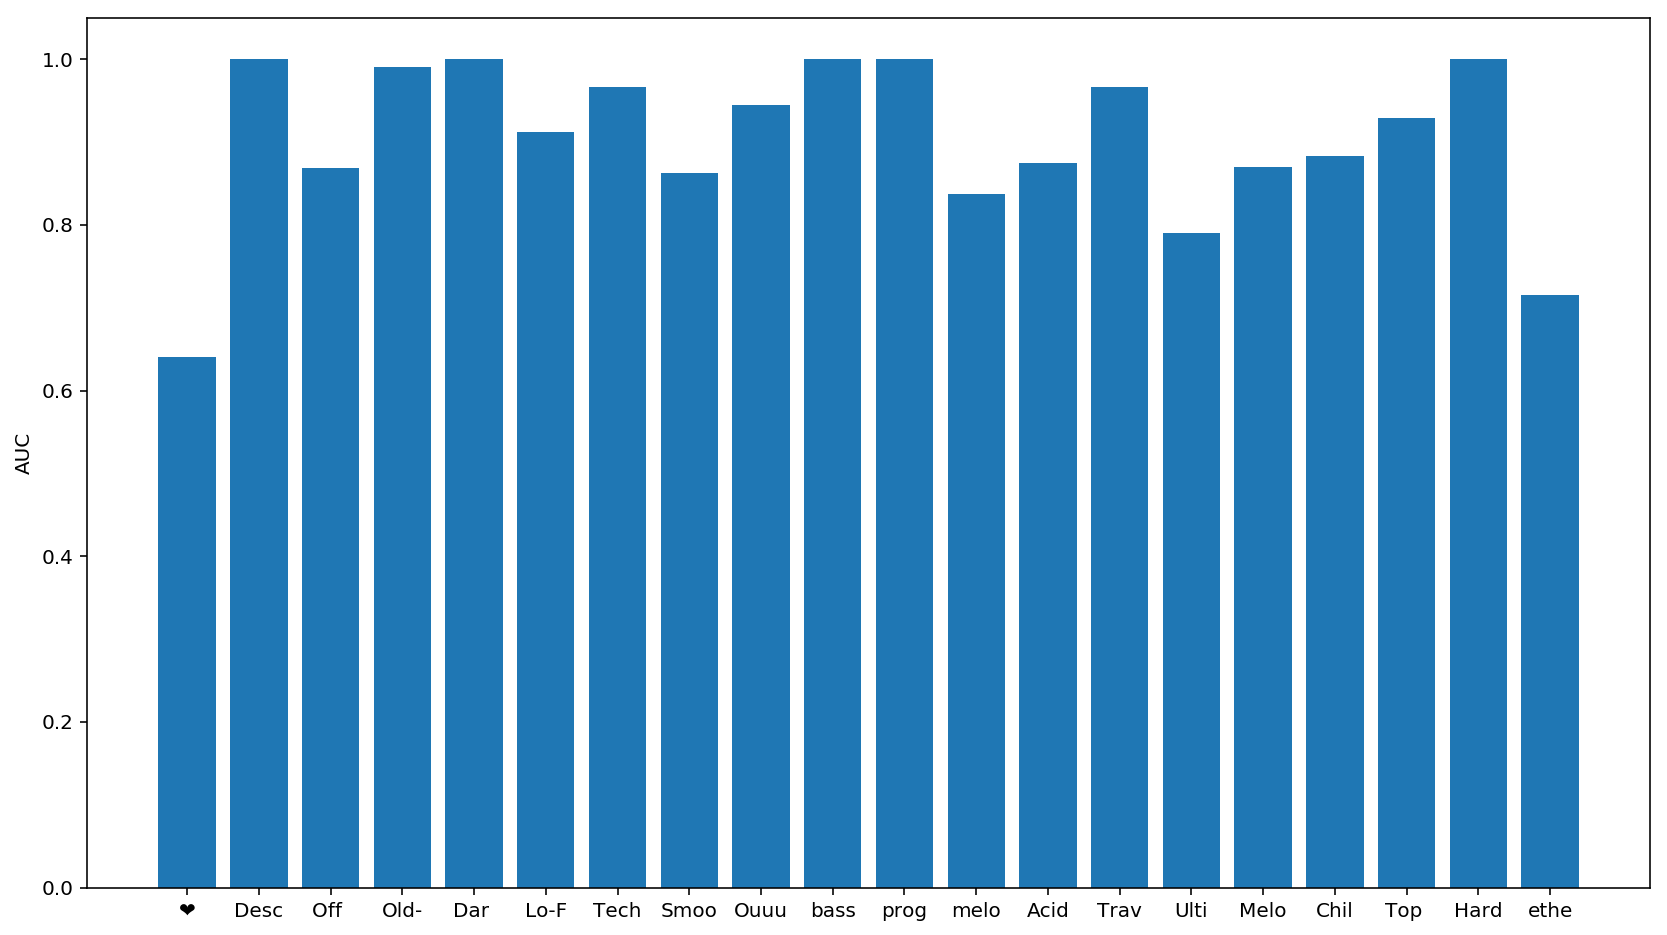

In [25]:
plt.figure(figsize=(14,8))
plt.bar(playlist_names_list, auc_list)
plt.ylabel('AUC')
plt.show()

#### Average recall and plot

In [26]:
recall_list = metrics_list(auc_recommendation_dict,'recall_score')

In [27]:
recall_list

[0.31896551724137934,
 0.3333333333333333,
 0.4666666666666667,
 1.0,
 1.0,
 0.8378378378378378,
 1.0,
 0.5909090909090909,
 0.6666666666666666,
 0.5,
 0.75,
 1.0,
 0.8333333333333334,
 0.375,
 0.7142857142857143,
 0.4444444444444444,
 0.47058823529411764,
 0.4,
 1.0,
 1.0,
 0.5306122448979592,
 0.41818181818181815]

Average

In [28]:
sum(recall_list)/len(recall_list)

0.6659465865041982

Plot

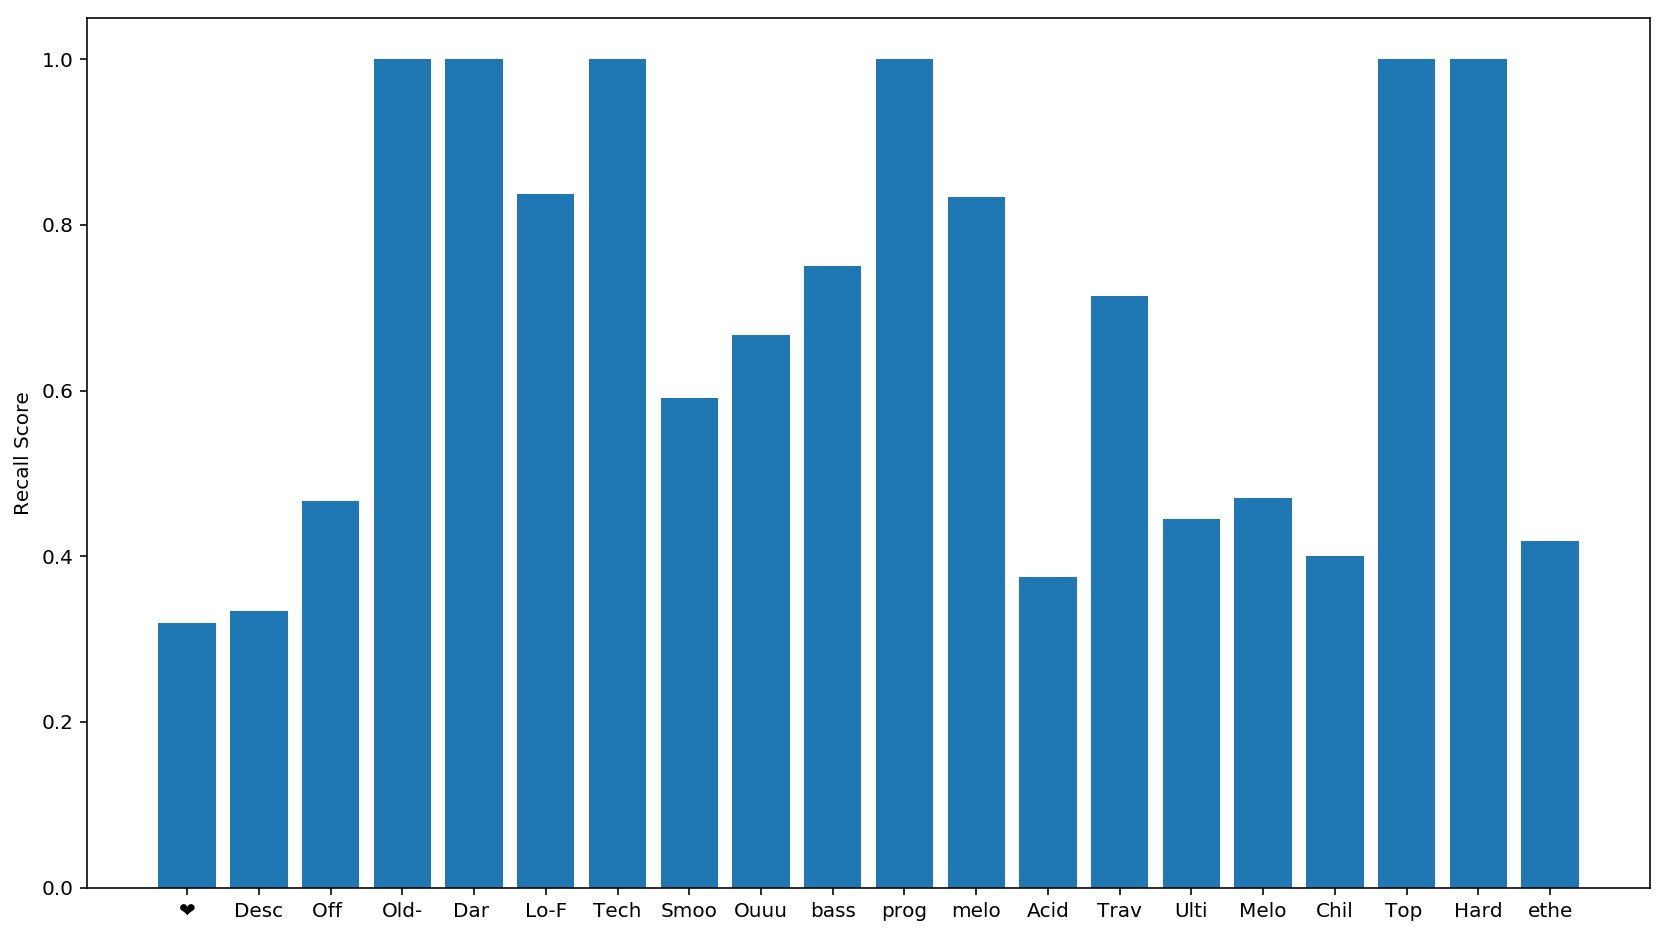

In [29]:
plt.figure(figsize=(14,8))
plt.bar(playlist_names_list, recall_list)
plt.ylabel('Recall Score')
plt.show()

#### Average precision and plot

In [30]:
precision_list = metrics_list(auc_recommendation_dict,'average_precision')

In [31]:
precision_list

[0.4589522877502745,
 1.0,
 0.7835469173642549,
 0.986013986013986,
 1.0,
 0.9057187082980651,
 0.9444444444444444,
 0.8214317792442508,
 0.7861111111111111,
 0.7465625315972898,
 1.0,
 1.0,
 0.5598311041588353,
 0.8571428571428572,
 0.947845804988662,
 0.6012586179252846,
 0.8751564707879587,
 0.8027191762485879,
 0.5,
 1.0,
 0.4671461312739701,
 0.5463770697355711]

In [32]:
sum(precision_list)/len(precision_list)

0.7995572271857001

Plot

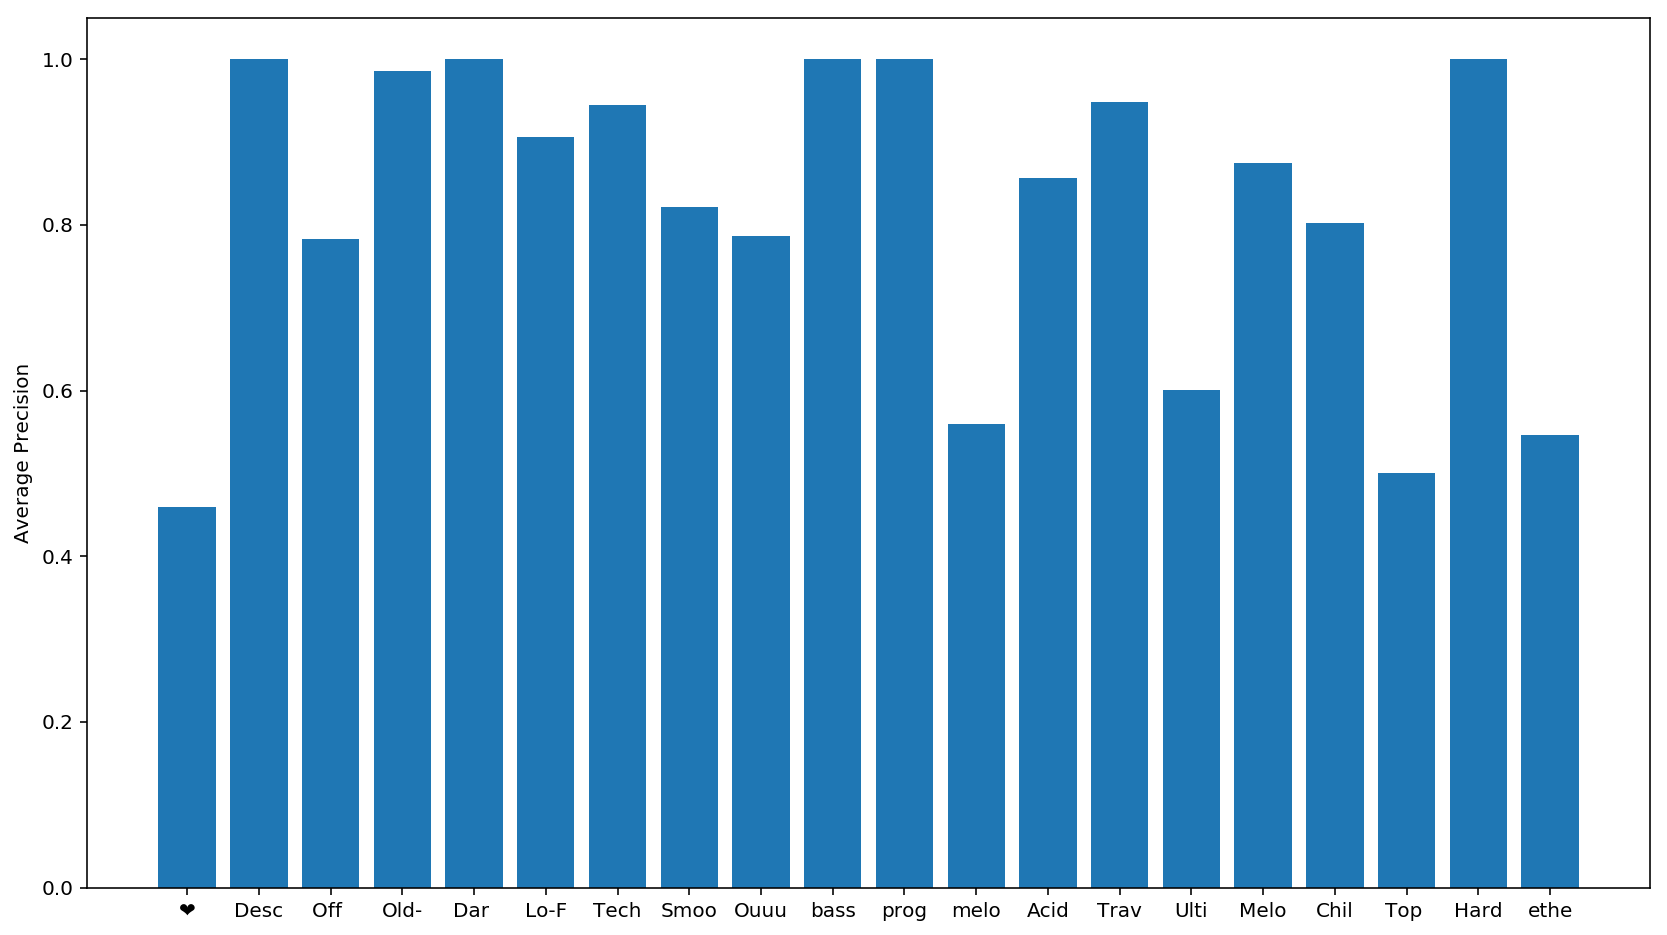

In [33]:
plt.figure(figsize=(14,8))
plt.bar(playlist_names_list, precision_list)
plt.ylabel('Average Precision')
plt.show()

#### Number of total recommended songs

In [34]:
nb_reclist = recommendations_nb_list(auc_recommendation_dict)

In [35]:
nb_reclist

[25,
 25,
 25,
 25,
 25,
 25,
 25,
 17,
 25,
 25,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 16,
 9]

Average

In [39]:
sum(nb_reclist)/len(nb_reclist)

23.454545454545453

### When maximizing recall

#### Average AUC and plot

In [40]:
auc_list2 = metrics_list(recall_recommendation_dict,'AUC')

In [41]:
auc_list2

[0.6815132751665259,
 1.0,
 0.8938775510204082,
 1.0,
 0.9058823529411765,
 0.9277736411020104,
 0.975,
 0.8346883468834688,
 0.9841269841269842,
 0.8123563218390806,
 1.0,
 1.0,
 0.7608465608465608,
 0.8571428571428571,
 0.9047619047619049,
 0.6975308641975309,
 0.823045267489712,
 0.8333333333333333,
 0.8571428571428572,
 1.0,
 0.7311799719887956,
 0.7078860042943587]

Average AUC

In [42]:
sum(auc_list2)/len(auc_list2)

0.8721858224671621

Plot

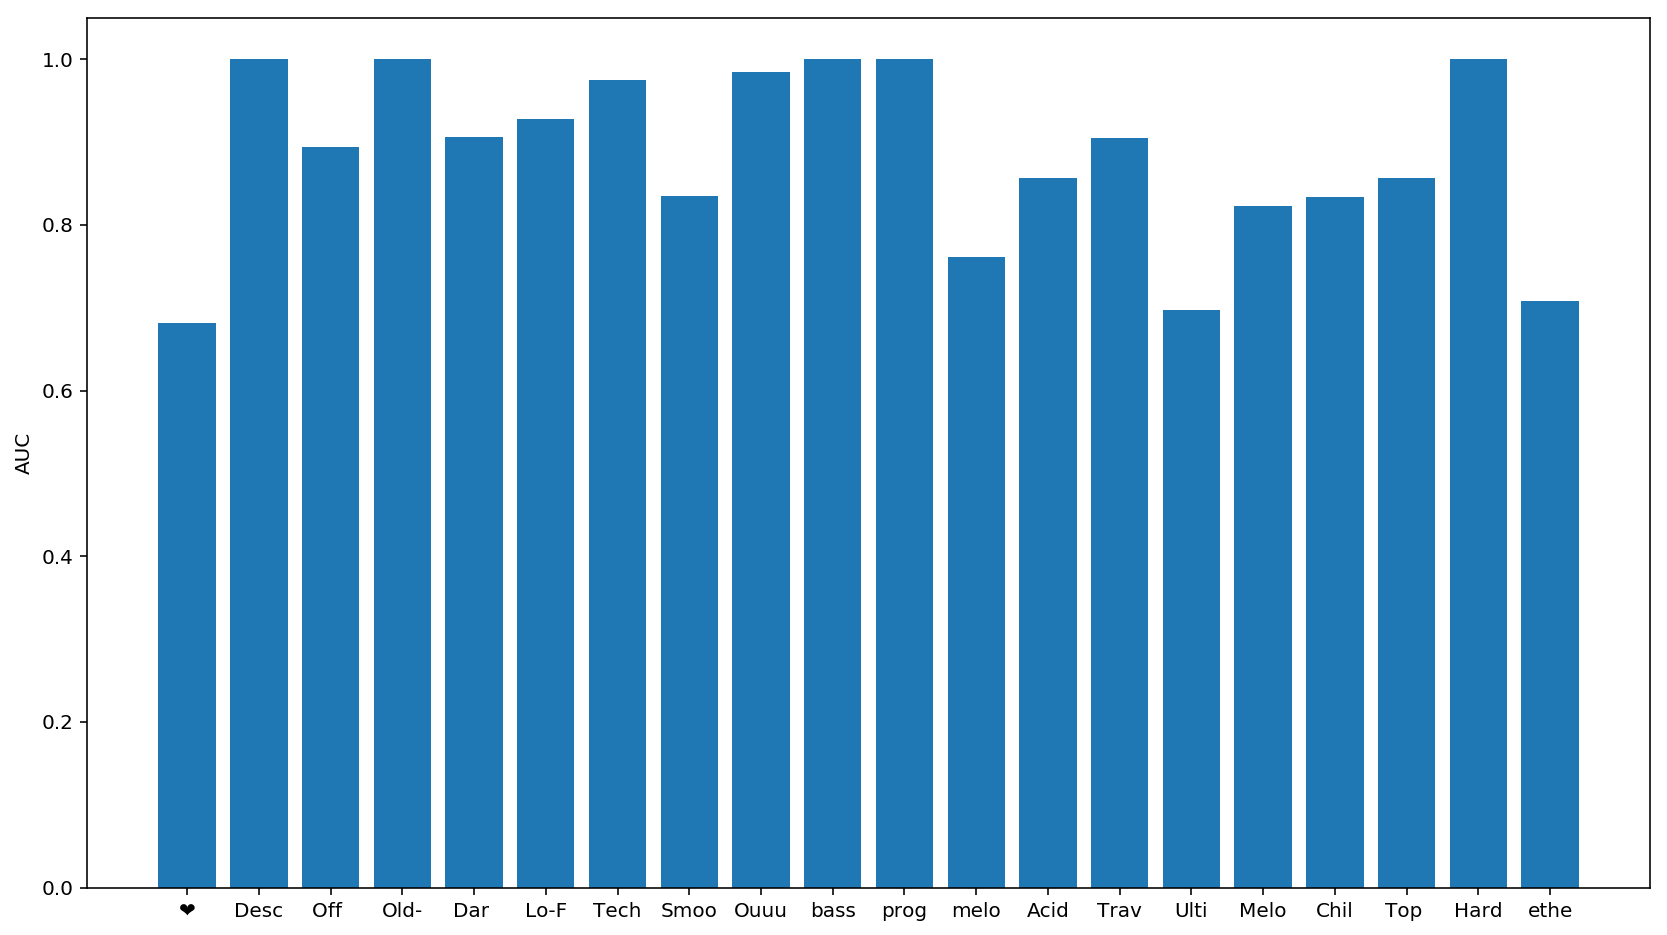

In [43]:
plt.figure(figsize=(14,8))
plt.bar(playlist_names_list, auc_list2)
plt.ylabel('AUC')
plt.show()

#### Average recall and plot

In [44]:
recall_list2 = metrics_list(recall_recommendation_dict,'recall_score')

In [45]:
recall_list2

[0.45098039215686275,
 1.0,
 0.7142857142857143,
 1.0,
 0.8,
 0.7352941176470589,
 1.0,
 0.8333333333333334,
 1.0,
 0.7333333333333333,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.8333333333333334,
 0.5555555555555556,
 0.7777777777777778,
 0.75,
 1.0,
 1.0,
 0.5535714285714286,
 0.425531914893617]

Average

In [46]:
sum(recall_list2)/len(recall_list2)

0.8104392530706672

Plot

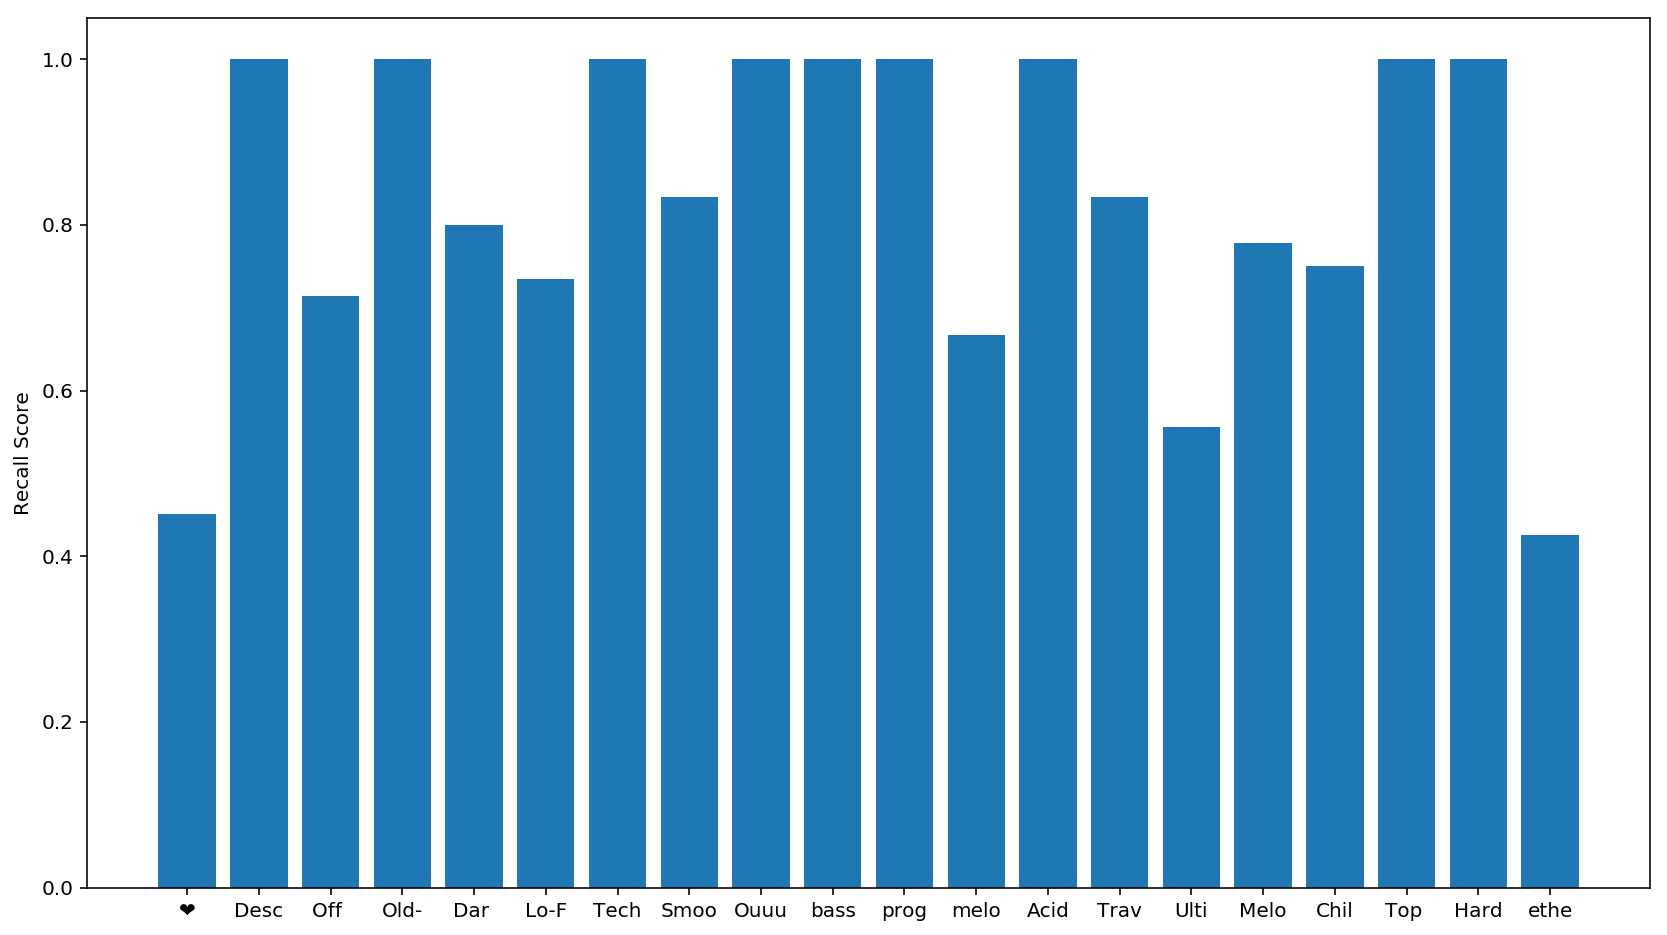

In [47]:
plt.figure(figsize=(14,8))
plt.bar(playlist_names_list, recall_list2)
plt.ylabel('Recall Score')
plt.show()

#### Average precision and plot

In [48]:
precision_list2 = metrics_list(recall_recommendation_dict,'average_precision')

In [49]:
precision_list2

[0.5049751051878903,
 1.0,
 0.8024515225670688,
 1.0,
 0.6961904761904762,
 0.8316013263665667,
 0.9428571428571428,
 0.5875986951765245,
 0.9583333333333334,
 0.6821104064241327,
 1.0,
 1.0,
 0.542179208969918,
 0.5428571428571428,
 0.7579365079365079,
 0.4302910052910052,
 0.543939393939394,
 0.8107466607466608,
 0.5,
 1.0,
 0.5611374514606751,
 0.4935717848311983]

Average

In [50]:
sum(precision_list2)/len(precision_list2)

0.7358535074607108

Plot

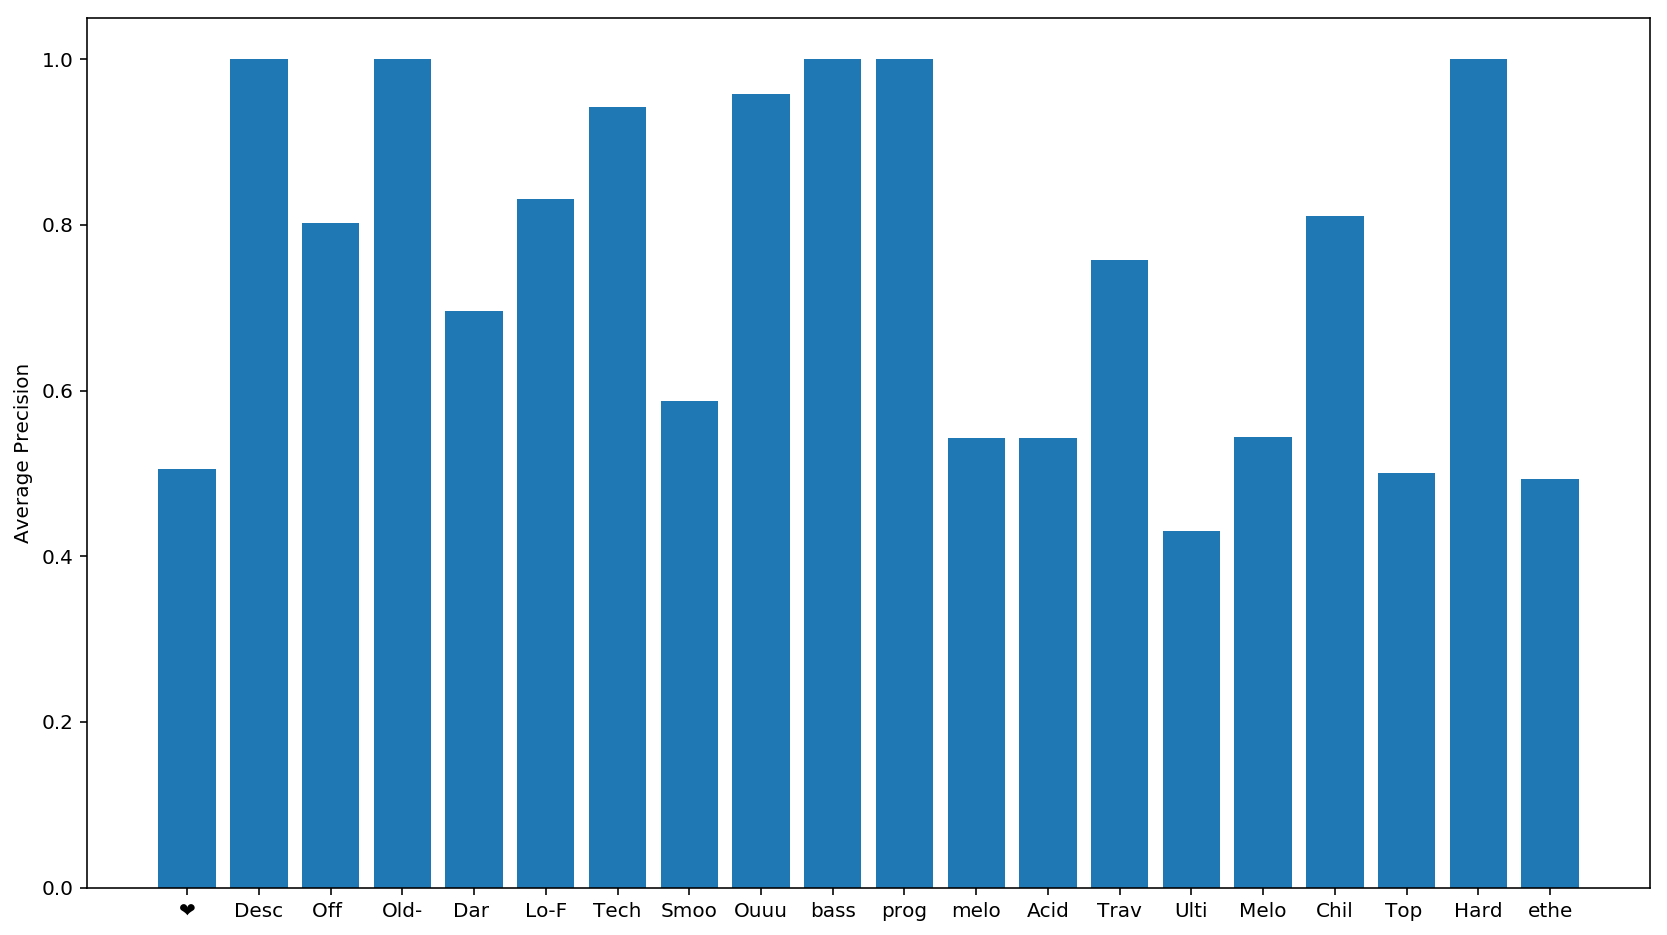

In [51]:
plt.figure(figsize=(14,8))
plt.bar(playlist_names_list, precision_list2)
plt.ylabel('Average Precision')
plt.show()

#### Number of total recommended songs

In [52]:
nb_reclist2 = recommendations_nb_list(recall_recommendation_dict)

In [53]:
nb_reclist2

[22,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 20,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25]

Average

In [54]:
sum(nb_reclist2)/len(nb_reclist2)

24.636363636363637

# Exploring the results

### We chose the recall maximization model

Better overall results, more recommended songs without losing too much on the precision and AUC side

Confirms our earlier hypotheses

### Performance per number of tracks of playlists

We observe that the more tracks a playlist contains the less performing the model is (especially on AUC and Recall)

In [74]:
playlist_n_tracks = nb_tracks(user_playlist_dict)

In [75]:
playlist_n_tracks

[518,
 12,
 81,
 49,
 36,
 188,
 35,
 98,
 44,
 146,
 23,
 20,
 110,
 29,
 32,
 59,
 59,
 54,
 13,
 25,
 263,
 259]

#### AUC per number of tracks

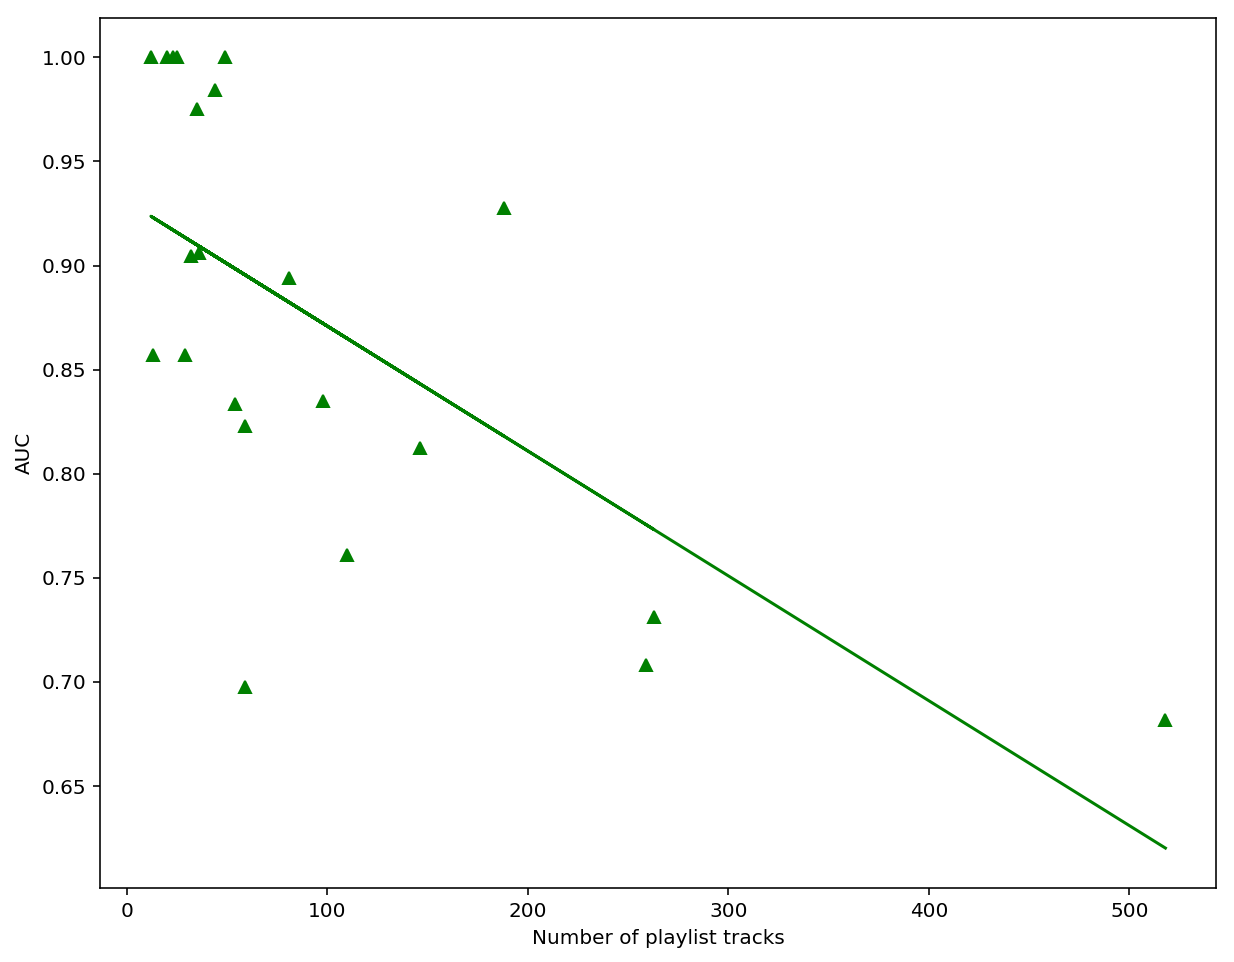

In [76]:
plt.figure(figsize=(10,8))
plt.plot(playlist_n_tracks, auc_list2, 'g^')
plt.ylabel('AUC')
plt.xlabel('Number of playlist tracks')
m, b = np.polyfit(playlist_n_tracks, auc_list2, 1)
y = [(m*x + b) for x in playlist_n_tracks]
plt.plot(playlist_n_tracks, y,'g')
plt.show()

#### Recall per number of tracks

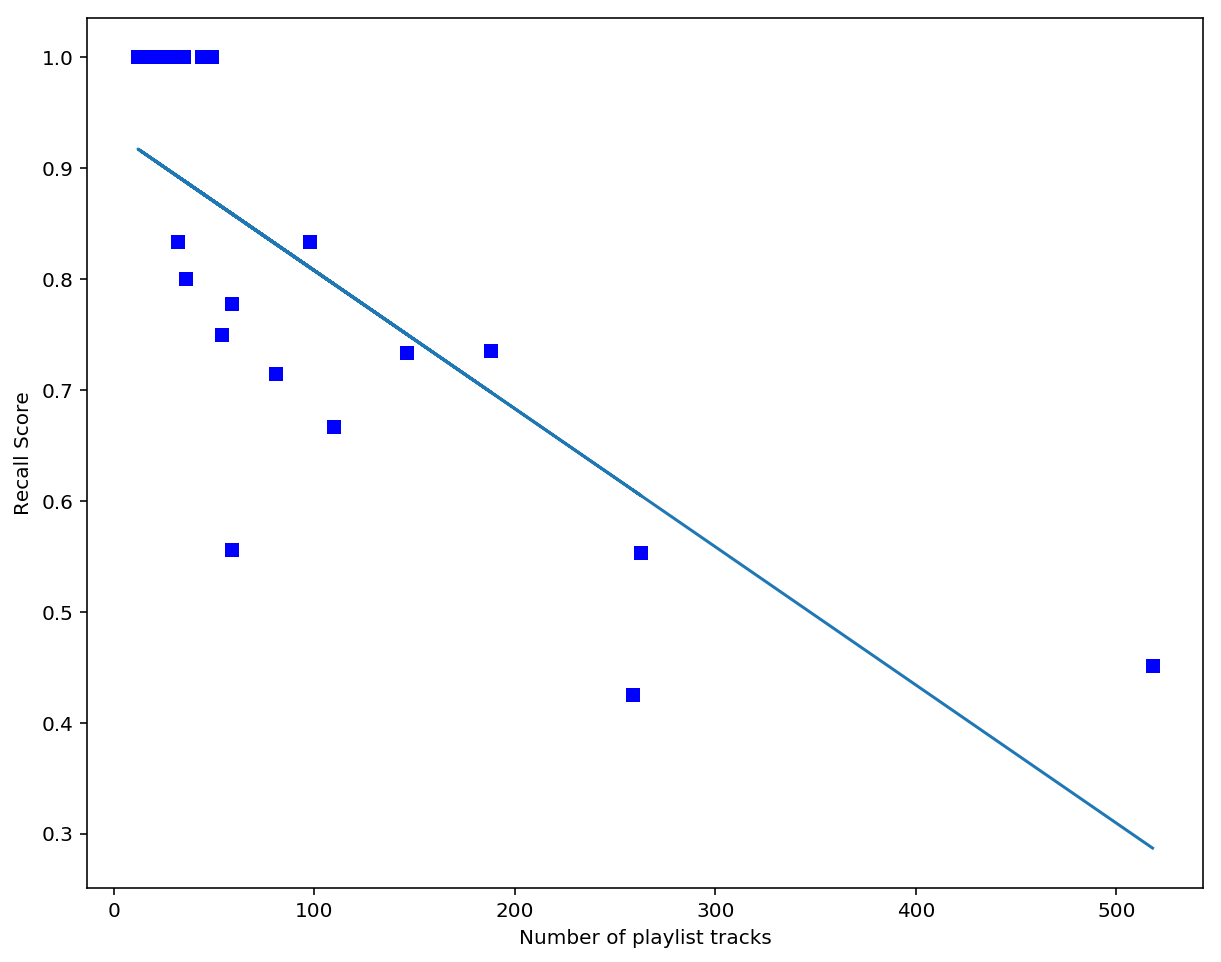

In [77]:
plt.figure(figsize=(10,8))
plt.plot(playlist_n_tracks, recall_list2, 'bs')
plt.ylabel('Recall Score')
plt.xlabel('Number of playlist tracks')
m, b = np.polyfit(playlist_n_tracks, recall_list2, 1)
y = [(m*x + b) for x in playlist_n_tracks]
plt.plot(playlist_n_tracks, y)
plt.show()

#### Precision per number of tracks

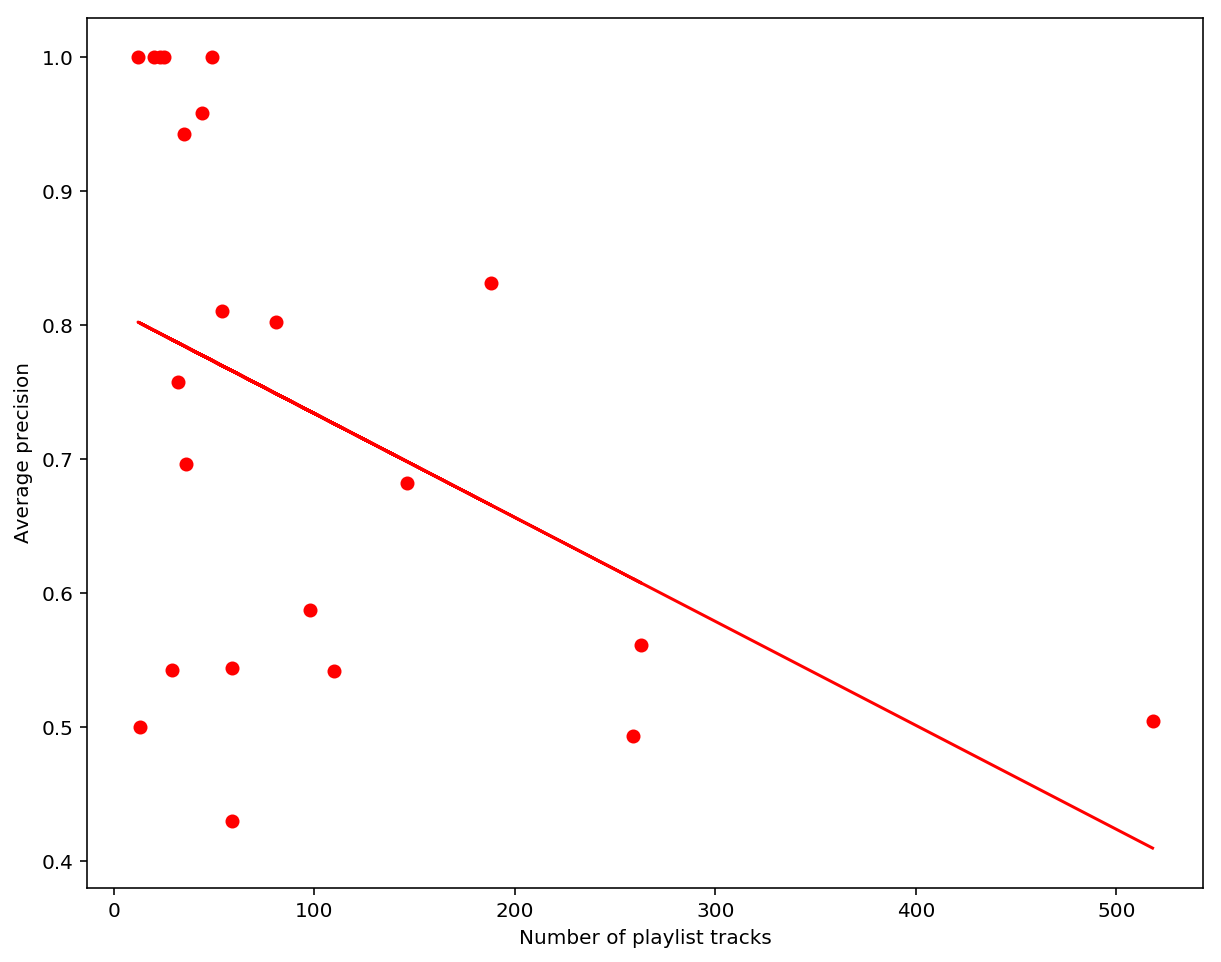

In [78]:
plt.figure(figsize=(10,8))
plt.plot(playlist_n_tracks, precision_list2, 'ro')
plt.ylabel('Average precision')
plt.xlabel('Number of playlist tracks')
m, b = np.polyfit(playlist_n_tracks, precision_list2, 1)
y = [(m*x + b) for x in playlist_n_tracks]
plt.plot(playlist_n_tracks, y,'r')
plt.show()

DataFrame with all the metrics per playlist

In [334]:
max_recall_results = create_results_df(user_playlist_dict,recall_recommendation_dict)
max_recall_results

playlist  nb_recommendations  nb_tracks       auc  \
0                             ❤️                  22        518  0.681513   
1                       Descente                  25         12  1.000000   
2                  Off After All                  25         81  0.893878   
3                     Old-school                  25         49  1.000000   
4                         Dar 🏚️                  25         36  0.905882   
5                          Lo-Fi                  25        188  0.927774   
6                         Techno                  25         35  0.975000   
7                  Smooth techno                  25         98  0.834688   
8                        Ouuuuuh                  25         44  0.984127   
9                        TechMix                  25        146  0.812356   
10          bass dans la tronche                  25         23  1.000000   
11                          prog                  25         20  1.000000   
12                melodic techno                  25        110  0.760847   
13                  Acid & funky                  20         29  0.857143   
14                       Travel                   25         32  0.904762   
15             Ultimate Rave Mix                  25         59  0.697531   
16                       Melodic                  25         59  0.823045   
17                         Chill                  25         54  0.833333   
18          Top Techno - Electro                  25         13  0.857143   
19                   Hard Techno                  25         25  1.000000   
20  Techno Electro - Fourre tout                  25        263  0.731180   
21                         ether                  25        259  0.707886   

    recall_score  average_precision  k_neighbors  n_features  
0       0.450980           0.504975           12           3  
1       1.000000           1.000000            2           6  
2       0.714286           0.802452           14           7  
3       1.000000           1.000000            2           4  
4       0.800000           0.696190            5           5  
5       0.735294           0.831601           12           7  
6       1.000000           0.942857            9           7  
7       0.833333           0.587599            7           6  
8       1.000000           0.958333            8           5  
9       0.733333           0.682110            7           5  
10      1.000000           1.000000            2           4  
11      1.000000           1.000000            6           4  
12      0.666667           0.542179            6           5  
13      1.000000           0.542857           13           4  
14      0.833333           0.757937           13           3  
15      0.555556           0.430291            3           5  
16      0.777778           0.543939           13           4  
17      0.750000           0.810747            8           3  
18      1.000000           0.500000           14           7  
19      1.000000           1.000000            3           4  
20      0.553571           0.561137            8           7  
21      0.425532           0.493572           10           4

In [336]:
max_recall_results.describe()

nb_recommendations   nb_tracks        auc  recall_score  \
count           22.000000   22.000000  22.000000     22.000000   
mean            24.636364   97.863636   0.872186      0.810439   
std              1.216766  119.376673   0.108241      0.192613   
min             20.000000   12.000000   0.681513      0.425532   
25%             25.000000   29.750000   0.815029      0.719048   
50%             25.000000   51.500000   0.875510      0.816667   
75%             25.000000  107.000000   0.981845      1.000000   
max             25.000000  518.000000   1.000000      1.000000   

       average_precision  k_neighbors  n_features  
count          22.000000    22.000000   22.000000  
mean            0.735854     8.045455    4.954545  
std             0.205921     4.145879    1.396502  
min             0.430291     2.000000    3.000000  
25%             0.543128     5.250000    4.000000  
50%             0.727063     8.000000    5.000000  
75%             0.954464    12.000000    6.000000  
max             1.000000    14.000000    7.000000

In [335]:
max_auc_results = create_results_df(user_playlist_dict,auc_recommendation_dict)
max_auc_results

playlist  nb_recommendations  nb_tracks       auc  \
0                             ❤️                  25        518  0.639965   
1                       Descente                  25         12  1.000000   
2                  Off After All                  25         81  0.868627   
3                     Old-school                  25         49  0.990431   
4                         Dar 🏚️                  25         36  1.000000   
5                          Lo-Fi                  25        188  0.911984   
6                         Techno                  25         35  0.966667   
7                  Smooth techno                  17         98  0.863022   
8                        Ouuuuuh                  25         44  0.944444   
9                        TechMix                  25        146  0.834542   
10          bass dans la tronche                  24         23  1.000000   
11                          prog                  25         20  1.000000   
12                melodic techno                  25        110  0.836806   
13                  Acid & funky                  25         29  0.875000   
14                       Travel                   25         32  0.967033   
15             Ultimate Rave Mix                  25         59  0.790123   
16                       Melodic                  25         59  0.869969   
17                         Chill                  25         54  0.882609   
18          Top Techno - Electro                  25         13  0.928571   
19                   Hard Techno                  25         25  1.000000   
20  Techno Electro - Fourre tout                  16        263  0.720558   
21                         ether                   9        259  0.715932   

    recall_score  average_precision  k_neighbors  n_features  
0       0.318966           0.458952           12           3  
1       0.333333           1.000000            3           6  
2       0.466667           0.783547           13           7  
3       1.000000           0.986014            6           7  
4       1.000000           1.000000            3           6  
5       0.837838           0.905719           14           6  
6       1.000000           0.944444            8           7  
7       0.590909           0.821432           11           7  
8       0.666667           0.786111            7           5  
9       0.500000           0.746563           14           6  
10      0.750000           1.000000            4           6  
11      1.000000           1.000000            3           4  
12      0.833333           0.559831           10           3  
13      0.375000           0.857143            9           3  
14      0.714286           0.947846           12           6  
15      0.444444           0.601259           12           3  
16      0.470588           0.875156            3           3  
17      0.400000           0.802719            7           3  
18      1.000000           0.500000            2           6  
19      1.000000           1.000000            3           4  
20      0.530612           0.467146           14           4  
21      0.418182           0.546377           13           7

In [337]:
max_auc_results.describe()

nb_recommendations   nb_tracks        auc  recall_score  \
count           22.000000   22.000000  22.000000     22.000000   
mean            23.454545   97.863636   0.891195      0.665947   
std              4.079301  119.376673   0.103872      0.254739   
min              9.000000   12.000000   0.639965      0.318966   
25%             25.000000   29.750000   0.843360      0.450000   
50%             25.000000   51.500000   0.897297      0.628788   
75%             25.000000  107.000000   0.984581      0.959459   
max             25.000000  518.000000   1.000000      1.000000   

       average_precision  k_neighbors  n_features  
count          22.000000    22.000000   22.000000  
mean            0.799557     8.318182    5.090909  
std             0.192701     4.368571    1.600866  
min             0.458952     2.000000    3.000000  
25%             0.637585     3.250000    3.250000  
50%             0.839287     8.500000    6.000000  
75%             0.976472    12.000000    6.000000  
max             1.000000    14.000000    7.000000

Average number of features

In [331]:
results['n_features'].mean()

4.954545454545454

# Example

In this section we will run our algorithm step-by-step on the "Hard Techno" playlist

In [142]:
seed_playlist = '1mLWfRZ6iAgh5lbeqzsmhG'

In [143]:
cf_matrix = create_sparse_matrix(input_df)
cosine_similarities_df = cosine(cf_matrix)
index_dict = create_index(input_df)
playlist_nb = index_dict['playlist'].index(seed_playlist)

10 most similar playlists

In [144]:
kmost_similar_playlists(playlist_nb, 10, 'cosine')

Most similar playlists: 25    0.209653
43    0.102220
11    0.078113
26    0.073030
28    0.057735
38    0.055470
30    0.017575
21    0.014434
0     0.000000
1     0.000000
Name: 9, dtype: float64


[25, 43, 11, 26, 28, 38, 30, 21, 0, 1]

Training the kNN classifier

Sample number 1 AUC of 0.94 Threshold of 0.9 Recall score of 0.6
Sample number 2 AUC of 0.9107142857142857 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 3 AUC of 0.8399999999999999 Threshold of 0.9 Recall score of 0.8
Sample number 4 AUC of nan Threshold of 0.9 Recall score of 0.0
Sample number 5 AUC of 0.8035714285714285 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 6 AUC of 0.9814814814814815 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 7 AUC of 0.9444444444444444 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 8 AUC of 0.74 Threshold of 0.9 Recall score of 0.8
Sample number 9 AUC of 0.9444444444444444 Threshold of 0.9 Recall score of 1.0


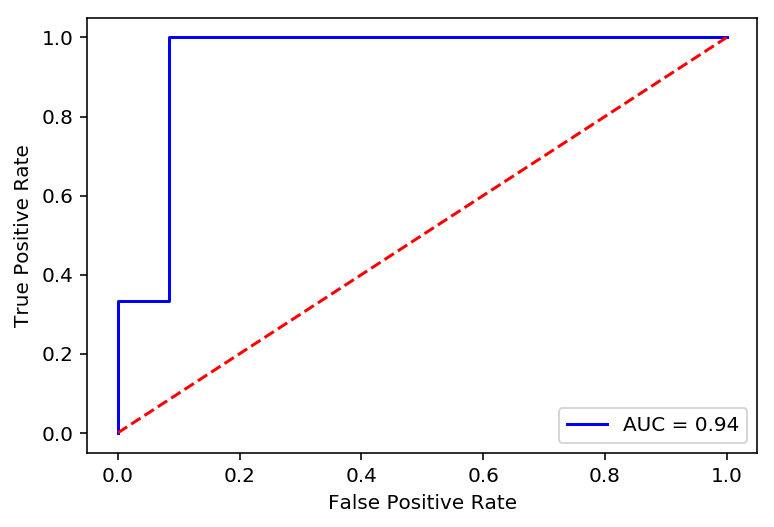

Found optimized model
Sample number 1 AUC of 0.9285714285714285 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 2 AUC of 0.9444444444444444 Threshold of 0.9 Recall score of 1.0


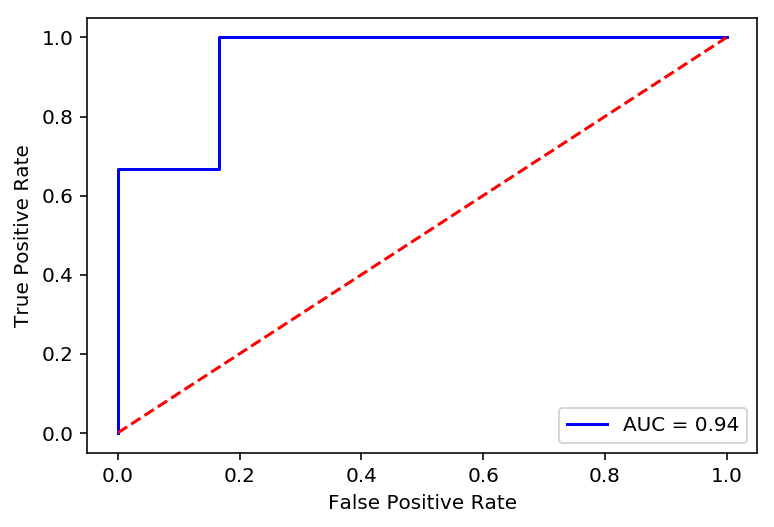

Found optimized model
Sample number 1 AUC of 0.9545454545454546 Threshold of 0.9 Recall score of 1.0


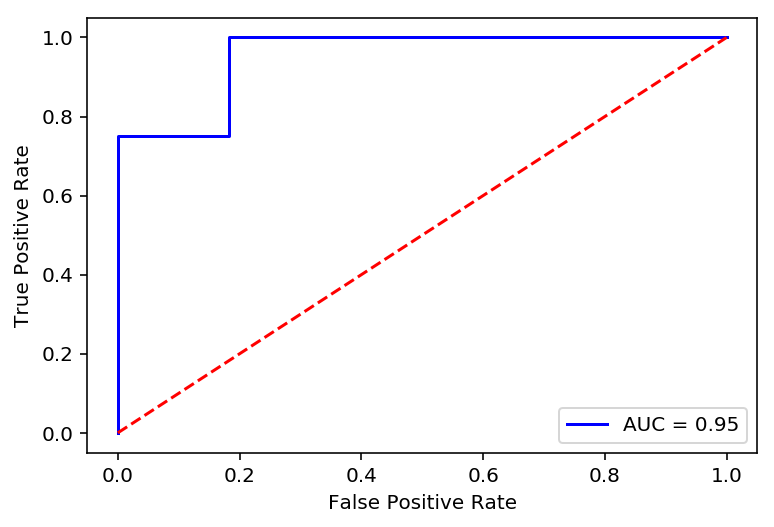

Found optimized model
Sample number 1 AUC of 0.6875 Threshold of 0.9 Recall score of 0.375
Sample number 2 AUC of 0.6666666666666666 Threshold of 0.9 Recall score of 0.3333333333333333
Sample number 3 AUC of 0.40740740740740744 Threshold of 0.9 Recall score of 0.5
Sample number 4 AUC of 0.9166666666666666 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 5 AUC of 0.8409090909090909 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.6 Threshold of 0.9 Recall score of 0.4
Sample number 7 AUC of 1.0 Threshold of 0.9 Recall score of 1.0


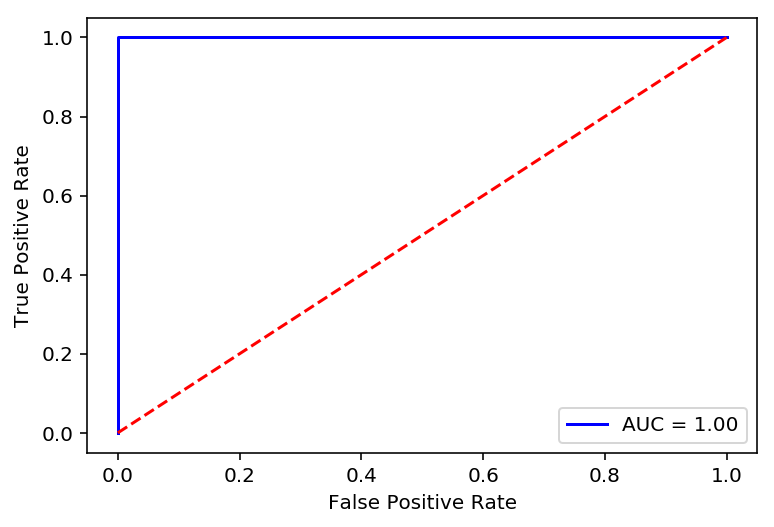

Found optimized model
Sample number 1 AUC of 0.7222222222222222 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 2 AUC of 0.625 Threshold of 0.9 Recall score of 0.5714285714285714
Sample number 3 AUC of 0.875 Threshold of 0.9 Recall score of 0.42857142857142855
Sample number 4 AUC of 0.638888888888889 Threshold of 0.9 Recall score of 0.6666666666666666
Sample number 5 AUC of 0.7222222222222222 Threshold of 0.9 Recall score of 0.5
Sample number 6 AUC of 0.3571428571428571 Threshold of 0.9 Recall score of 0.0
Sample number 7 AUC of 0.8035714285714286 Threshold of 0.9 Recall score of 0.375
Sample number 8 AUC of 0.9814814814814815 Threshold of 0.9 Recall score of 0.8333333333333334
Sample number 9 AUC of 0.6363636363636364 Threshold of 0.9 Recall score of 0.5
Sample number 10 AUC of 0.611111111111111 Threshold of 0.8 Recall score of 0.16666666666666666
Sample number 11 AUC of 0.6666666666666666 Threshold of 0.8 Recall score of 0.16666666666666666
Sample number 12 AUC of 0

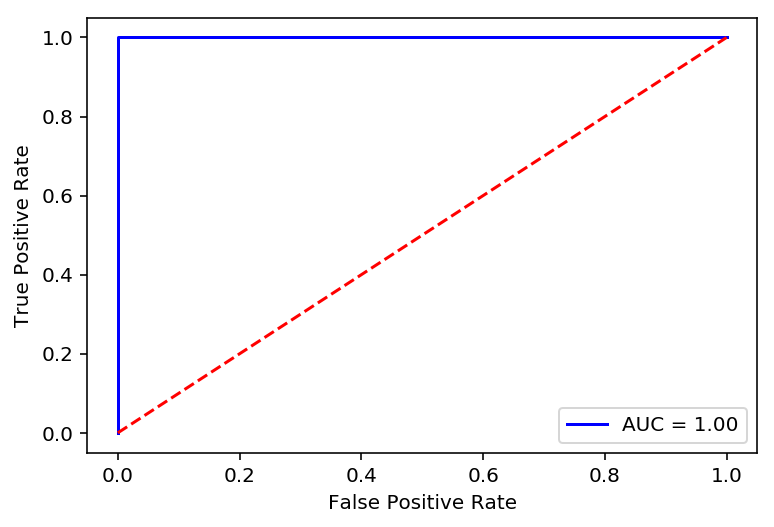

Found optimized model


In [147]:
best_selected_model = best_model(seed_playlist,'recall')

In [148]:
best_selected_model

{'model_dict': {'working_dataframe':                                                                         release_date  \
  track_id               track_name                                                      
  2rw3jItDYMTM2lIcSrnIVp Effondrement Intemporel                              0.985915   
  7ynMPqoIUMRdebXtCmQTKc Sparkling System                                     0.985915   
  0N0qmV5OnKWZbVkaMDYi2s Polar Aura                                           0.985915   
  0lG0rrV2WcmxBDQn4Fm5PA Millenium Pain                                       0.985915   
  3qTrYRrHYOuUGbIDQr3d1y Exarchia Squatter - Original Mix                     1.000000   
  0fLXbPsjjg3RnR4h5BJmZU Quand La Haine Ne Suffit Plus - Original Mix         1.000000   
  0ChvWY0uRIGvXfhqvv8jC1 Atlantyda                                            0.985915   
  1Ytytd2YDhlzSXnACP2d05 Talking 2 B Mad                                      0.985915   
  7h54B074v0dLSAHKn5vjqU Wake Up Call                            

In [151]:
features = best_selected_model['model_dict']['features']

In [153]:
cbf_model = best_selected_model['model_dict']['model']

Playlist number 25 is the most similar one

In [157]:
pid1 = index_dict['playlist'][43]

In [158]:
playlist_name(pid1)

'JGS - Techno'

In [159]:
recommendation_df = create_recommendation_df(seed_playlist, pid1, input_df)

In [160]:
recommendation_prob_df = predict_cbf(recommendation_df, cbf_model,features)

Number of potentially recommended songs 37


In [161]:
recommendation_prob_df.head()

prob0  prob1
track_id               track_name                     
2PFbwUBrElT0U41hKX5PHm Opera                0.0    1.0
3An74jdp9DAIq3YIHJIXNp Automatic Control    0.0    1.0
1UQY2Un5zh3blCEP7mlAI6 Turbine              0.0    1.0
1A3BnGkbTQTGlSeu984gNy Tension              0.0    1.0
60QGoofb0eJmyvESpJqpr5 Douleurs & Désirs    0.0    1.0